In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
pd.set_option('display.max_rows', 50)
plt.rc('font',family='Microsoft YaHei')
chain_data_line_1 = pd.read_csv('Data/chain_data_line_1.csv',parse_dates=['上车时间', '下车时间'], date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S'))
chain_data_line_1.sort_values(by='上车时间')

C:\Users\16872\AppData\Local\Temp\ipykernel_8140\1583710055.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  chain_data_line_1 = pd.read_csv('Data/chain_data_line_1.csv',parse_dates=['上车时间', '下车时间'], date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S'))


日期编号  订单编号  上车站序 上车站点名称                上车时间  下车站序 下车站点名称  \
622      1   623     1     AB 2019-10-02 05:59:01    14     AO   
911      1   912     1     AB 2019-10-02 06:00:01    33     BH   
889      1   890     2     AC 2019-10-02 06:00:01    33     BH   
620      1   621     2     AC 2019-10-02 06:03:01    20     AU   
1665     1  1666     2     AC 2019-10-02 06:03:01    32     BG   
...    ...   ...   ...    ...                 ...   ...    ...   
8826     3  8827    12     AM 2019-10-19 21:15:01    20     AU   
6974     3  6975    12     AM 2019-10-19 21:15:01    20     AU   
7674     3  7675    44     BS 2019-10-19 21:21:01    47     BV   
8857     3  8858    36     BK 2019-10-19 21:21:01    43     BR   
8775     3  8776    30     BE 2019-10-19 21:40:01    31     BF   

                    下车时间  
622  2019-10-02 06:28:24  
911  2019-10-02 06:57:57  
889  2019-10-02 06:57:49  
620  2019-10-02 06:34:06  
1665 2019-10-02 06:55:24  
...                  ...  
8826 2019-10-19 21:27:43  
6974 2019-10-19 21:27:31  
7674 2019-10-19 21:26:47  
8857 2019-10-19 21:35:36  
8775 2019-10-19 21:40:52  

[9673 rows x 8 columns]

In [2]:
temp = chain_data_line_1[(chain_data_line_1['上车站序']== 1) & (chain_data_line_1['日期编号']==1)].sort_values(by='上车时间')
temp['上车时间'] = temp['上车时间'].dt.time
temp['下车时间'] = temp['下车时间'].dt.time
base_time = pd.to_datetime('5:55:00').time()
temp['上车时间'] = (temp['上车时间'].apply(lambda x: pd.to_timedelta(str(x))) - pd.to_timedelta(str(base_time))).dt.total_seconds().astype(int)
temp['下车时间'] = (temp['下车时间'].apply(lambda x: pd.to_timedelta(str(x))) - pd.to_timedelta(str(base_time))).dt.total_seconds().astype(int)
temp.to_csv('Data/passenger_info.csv', index=False)
temp


日期编号  订单编号  上车站序 上车站点名称   上车时间  下车站序 下车站点名称   下车时间
622      1   623     1     AB    241    14     AO   2004
911      1   912     1     AB    301    33     BH   3777
1454     1  1455     1     AB   1201    45     BT   5738
198      1   199     1     AB   1201    36     BK   4457
425      1   426     1     AB   2941    39     BN   7304
...    ...   ...   ...    ...    ...   ...    ...    ...
728      1   729     1     AB  50281    34     BI  53801
1841     1  1842     1     AB  51841    46     BU  56461
1195     1  1196     1     AB  51841    15     AP  53513
369      1   370     1     AB  52621    34     BI  56236
1335     1  1336     1     AB  53341    26     BA  56041

[211 rows x 8 columns]

C:\WorkSpace\24_Spll\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\16872\AppData\Local\Temp\ipykernel_8140\3232610121.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['上车时间差分'] = df['上车时间'].diff().fillna(0)
C:\Users\16872\AppData\Local\Temp\ipykernel_8140\3232610121.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future

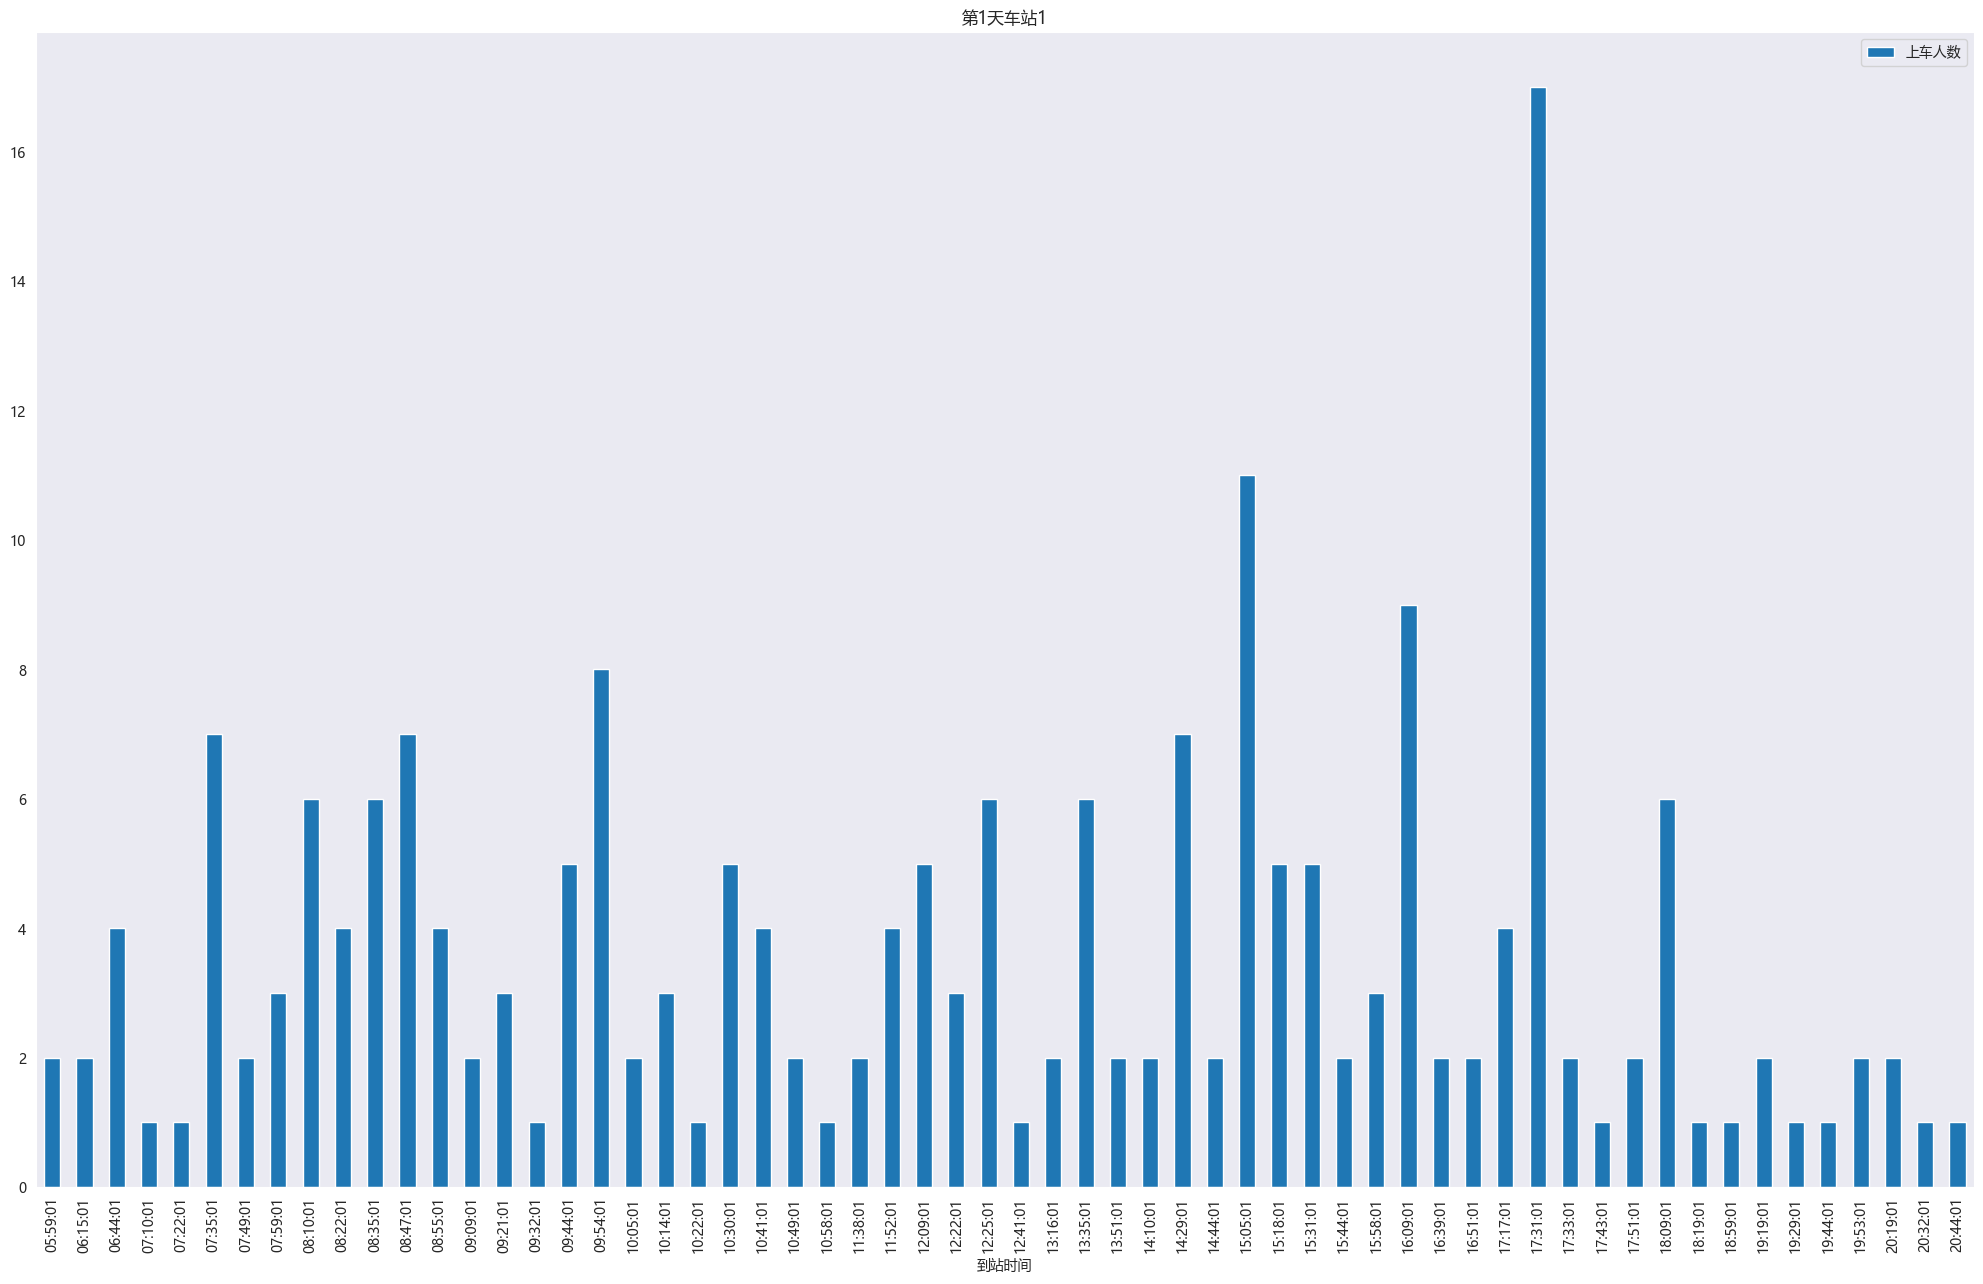

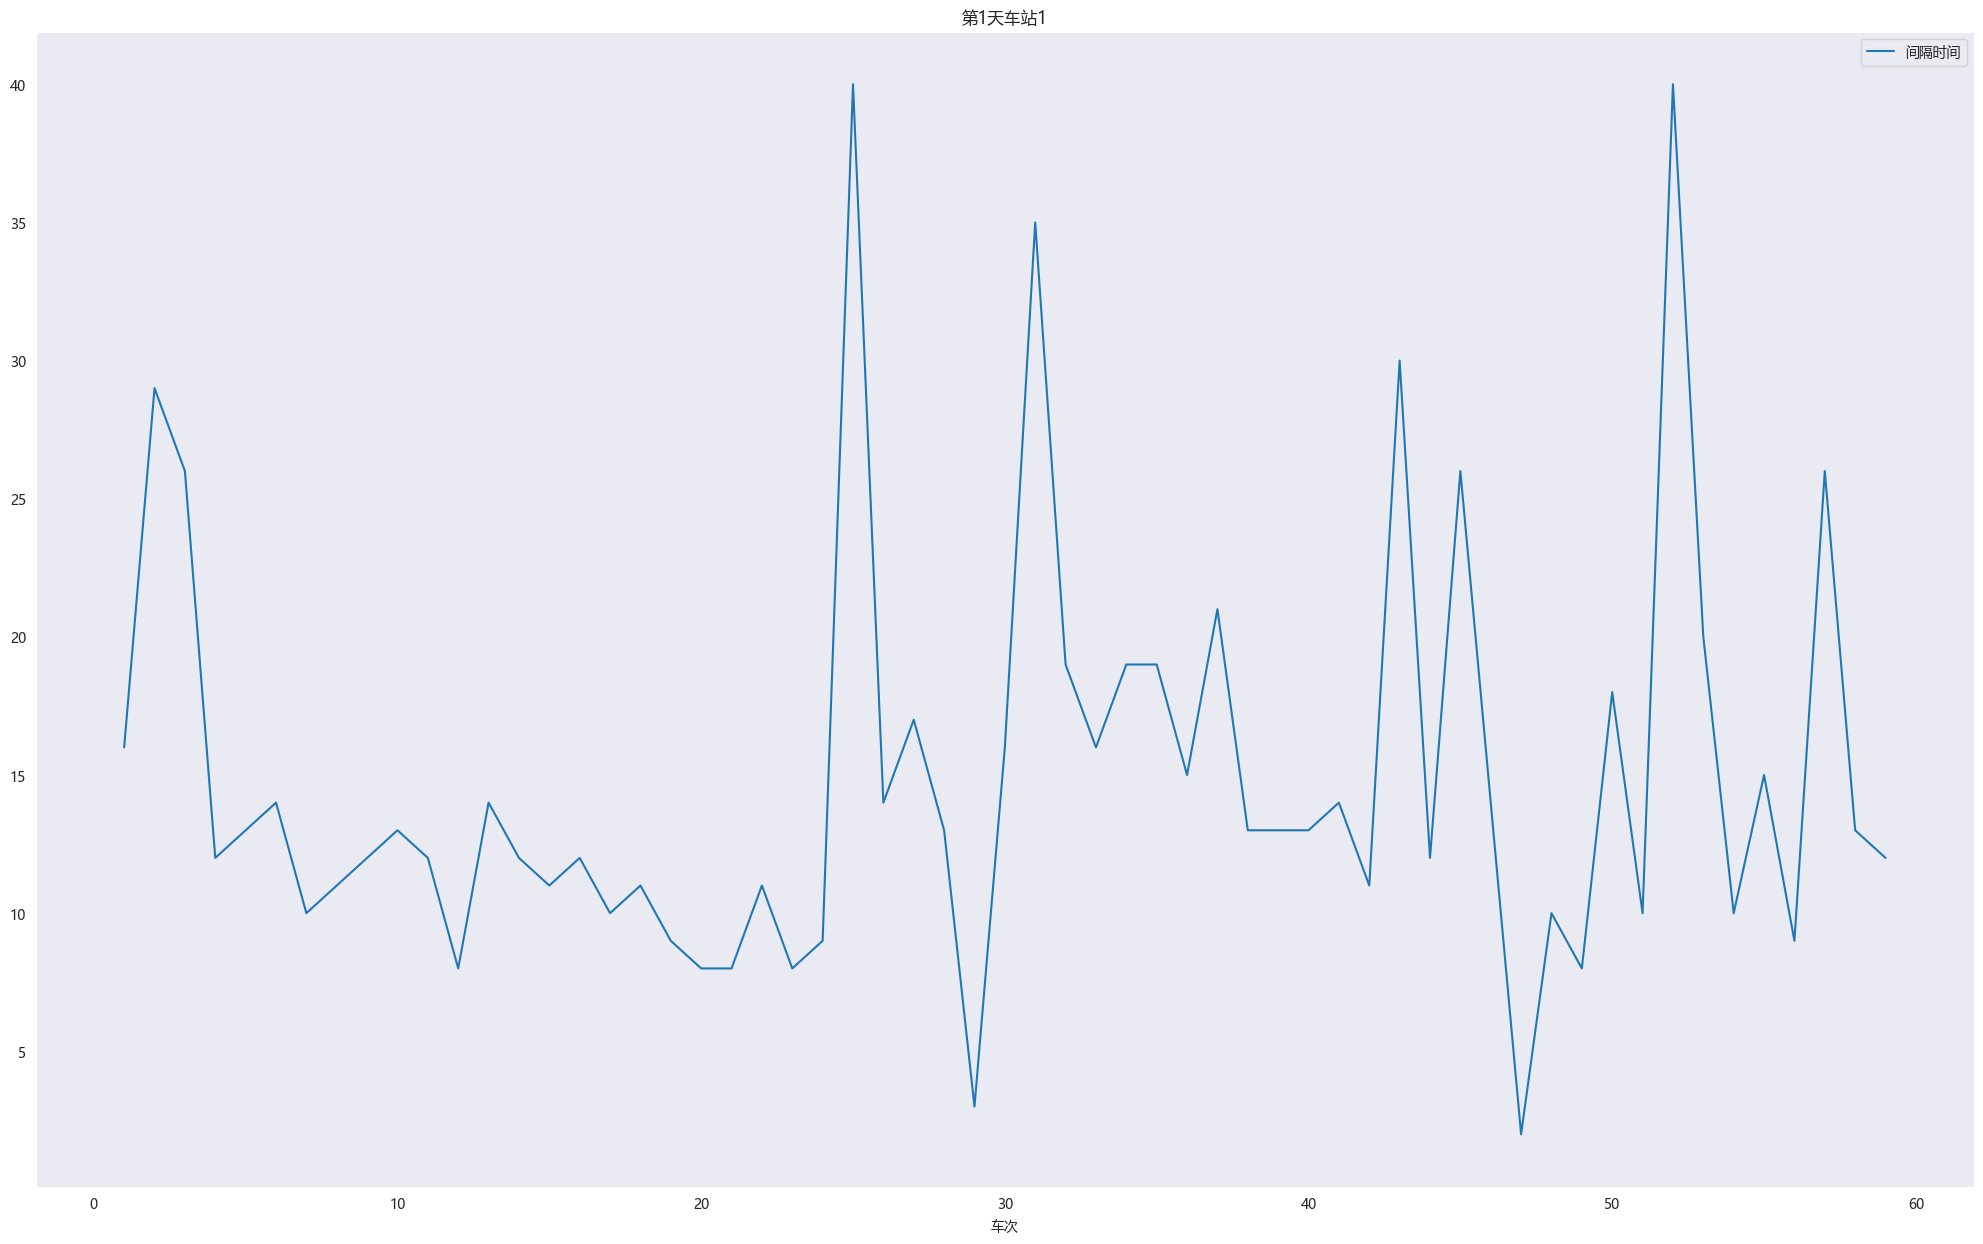

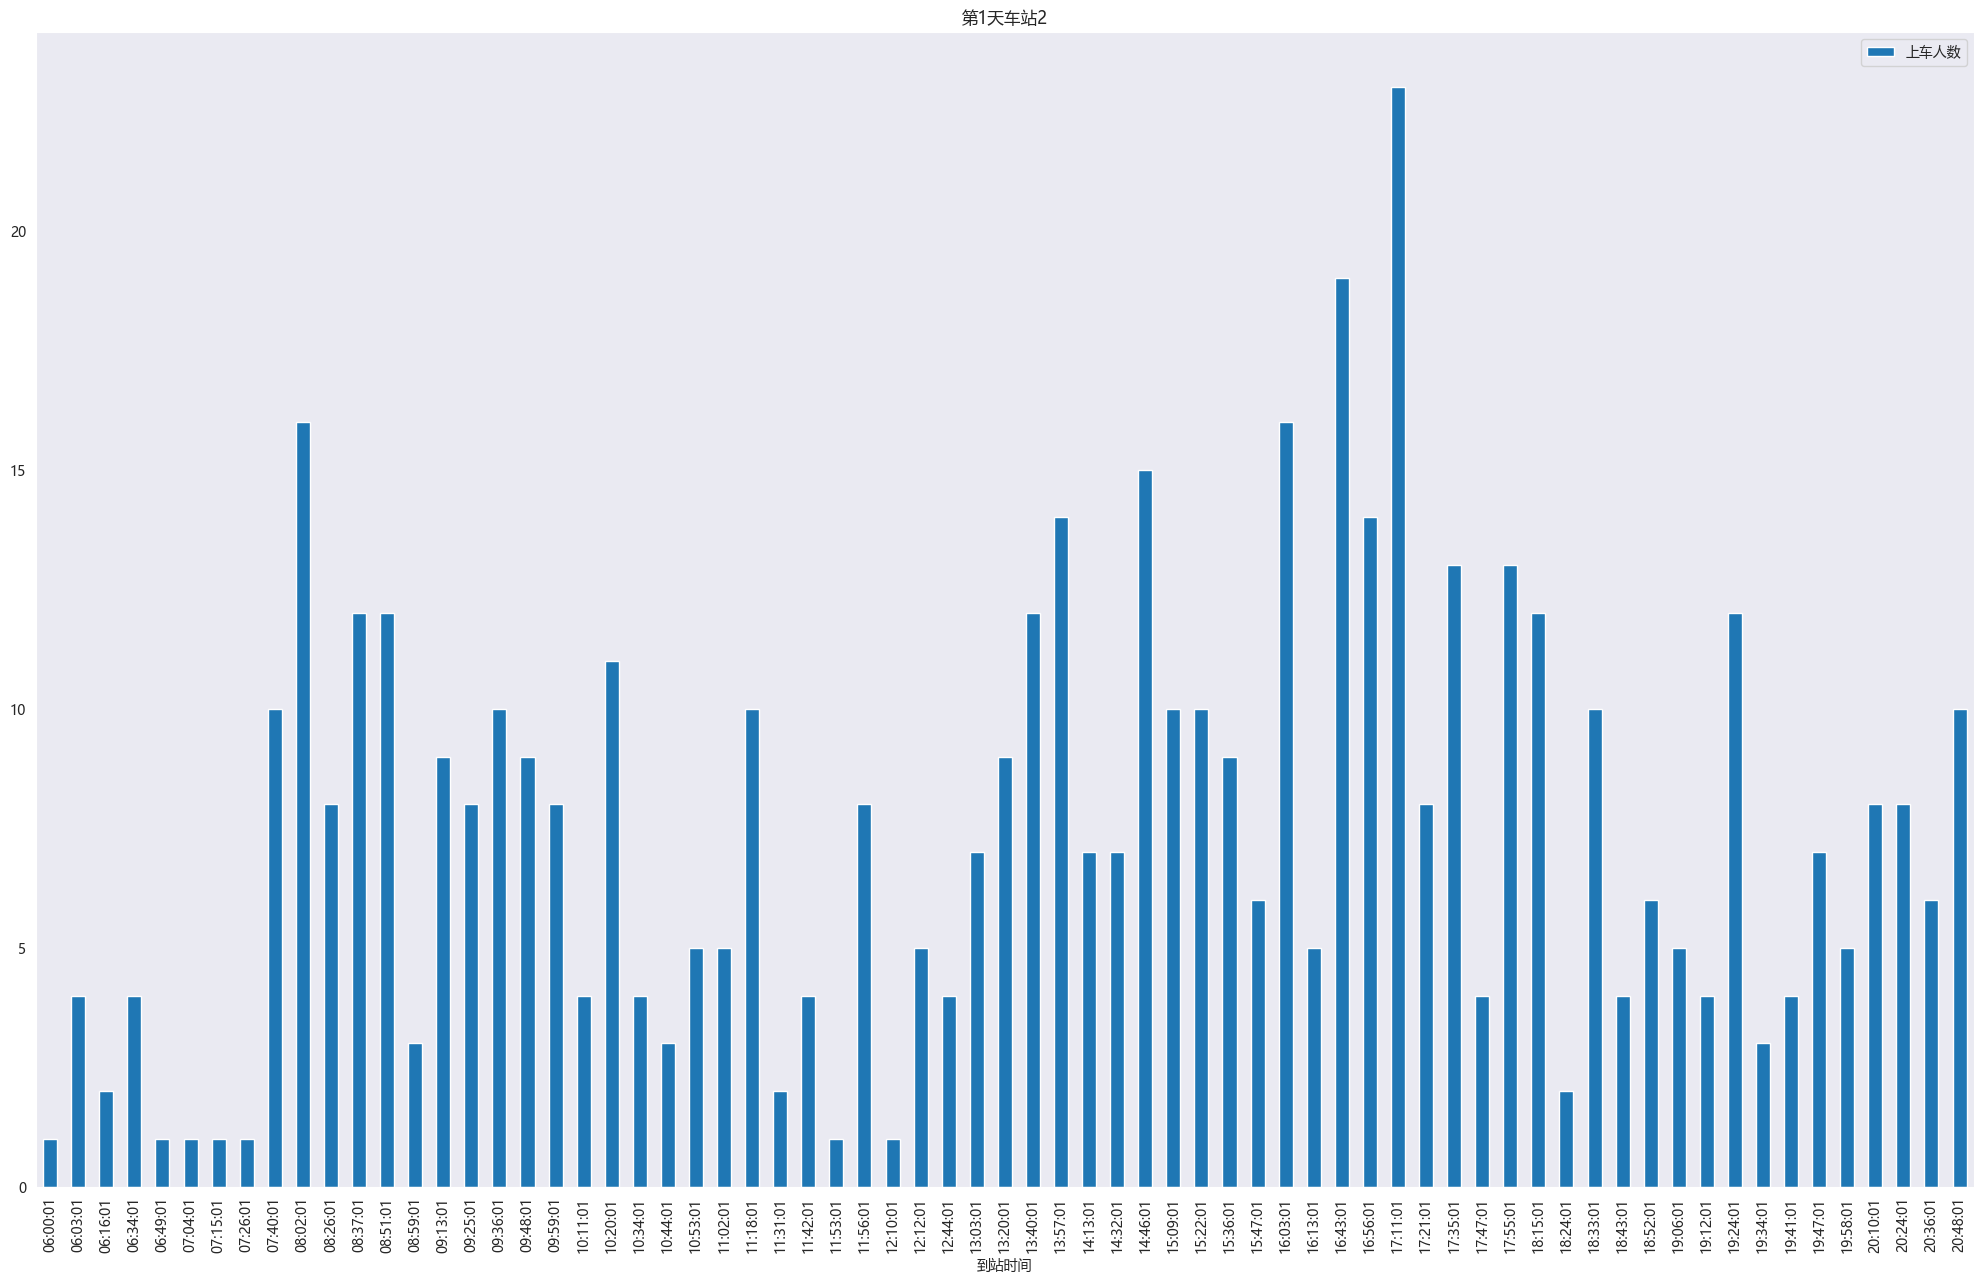

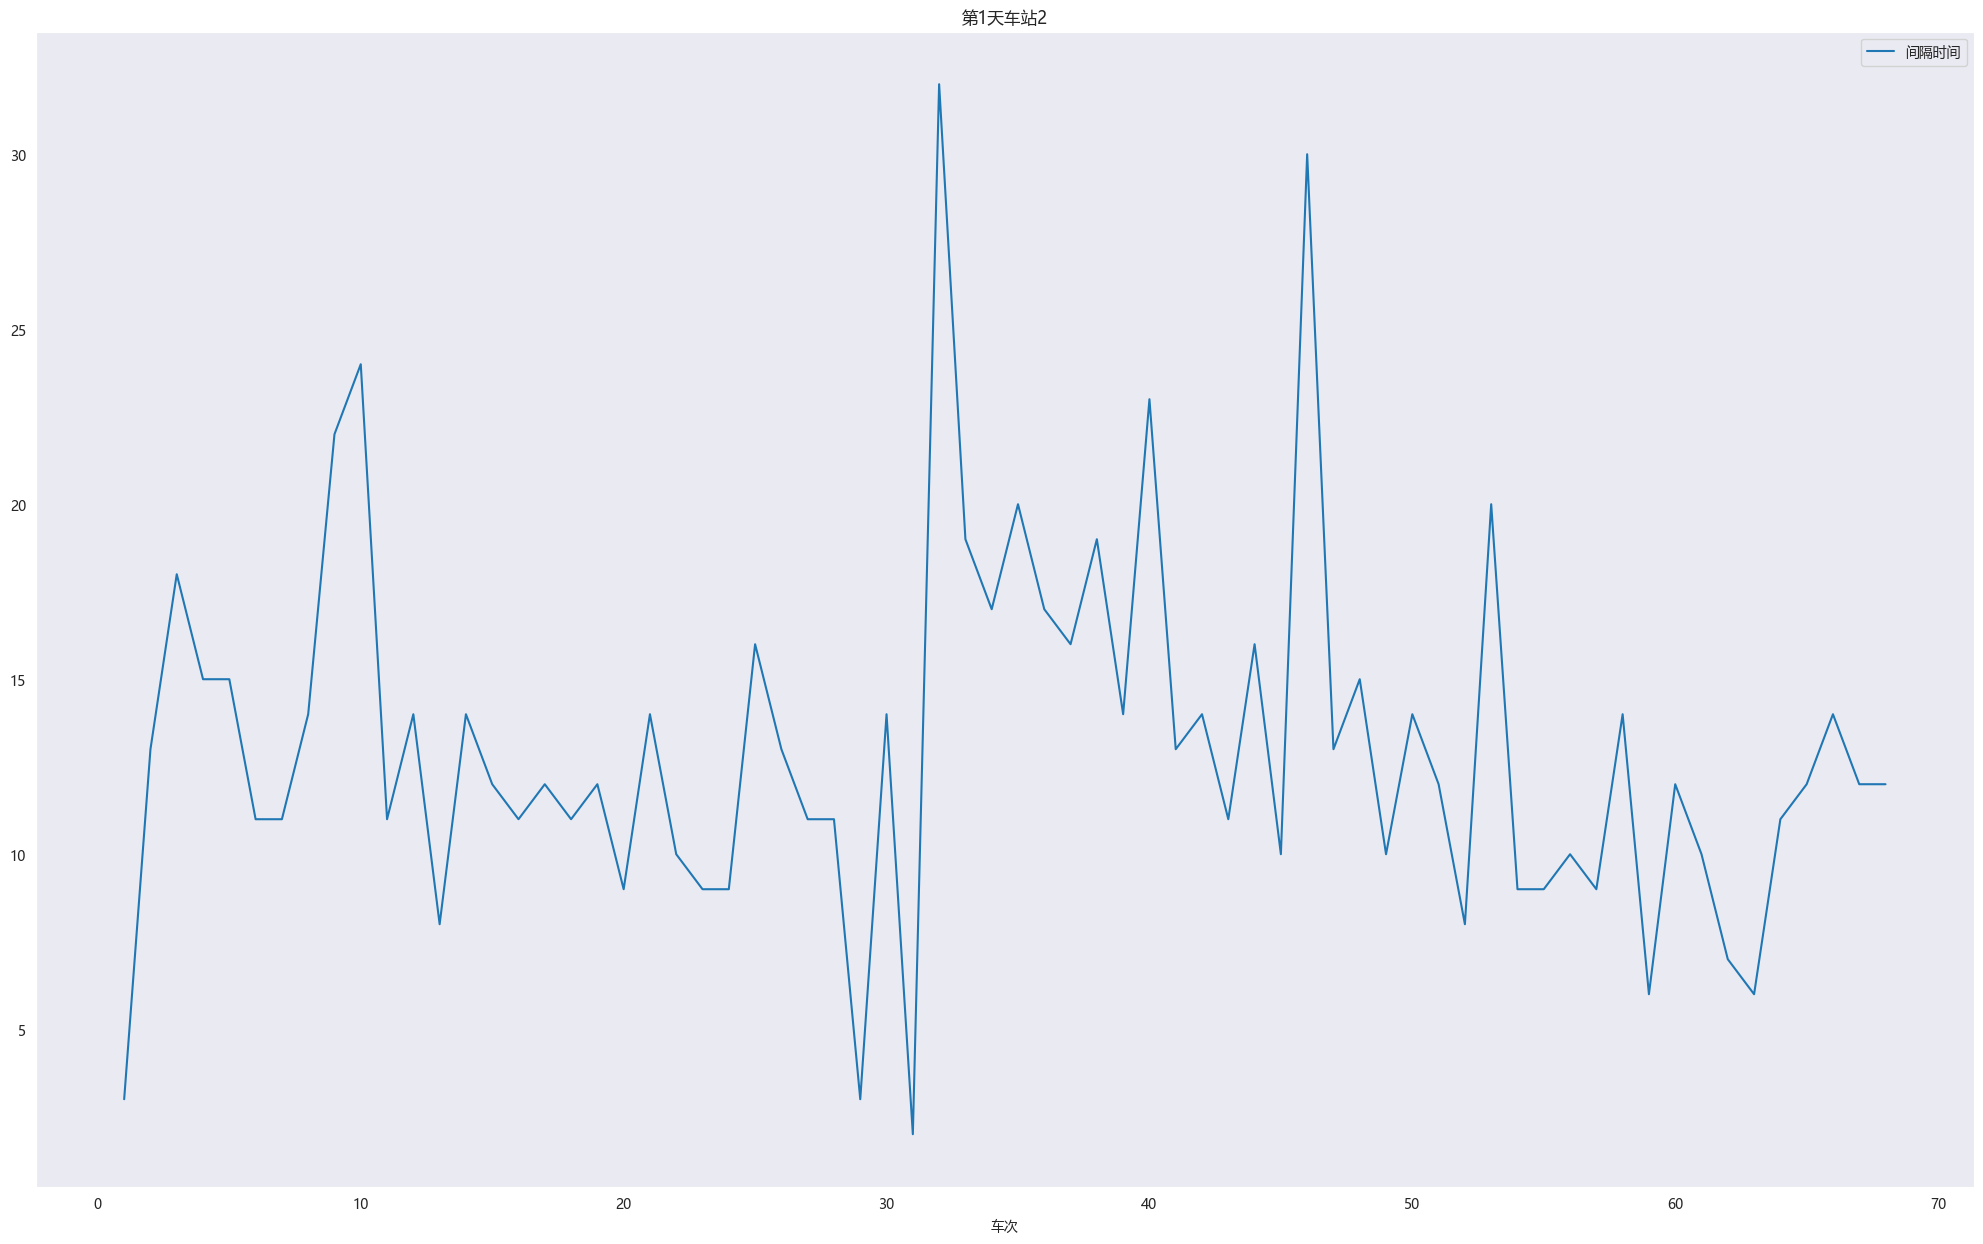

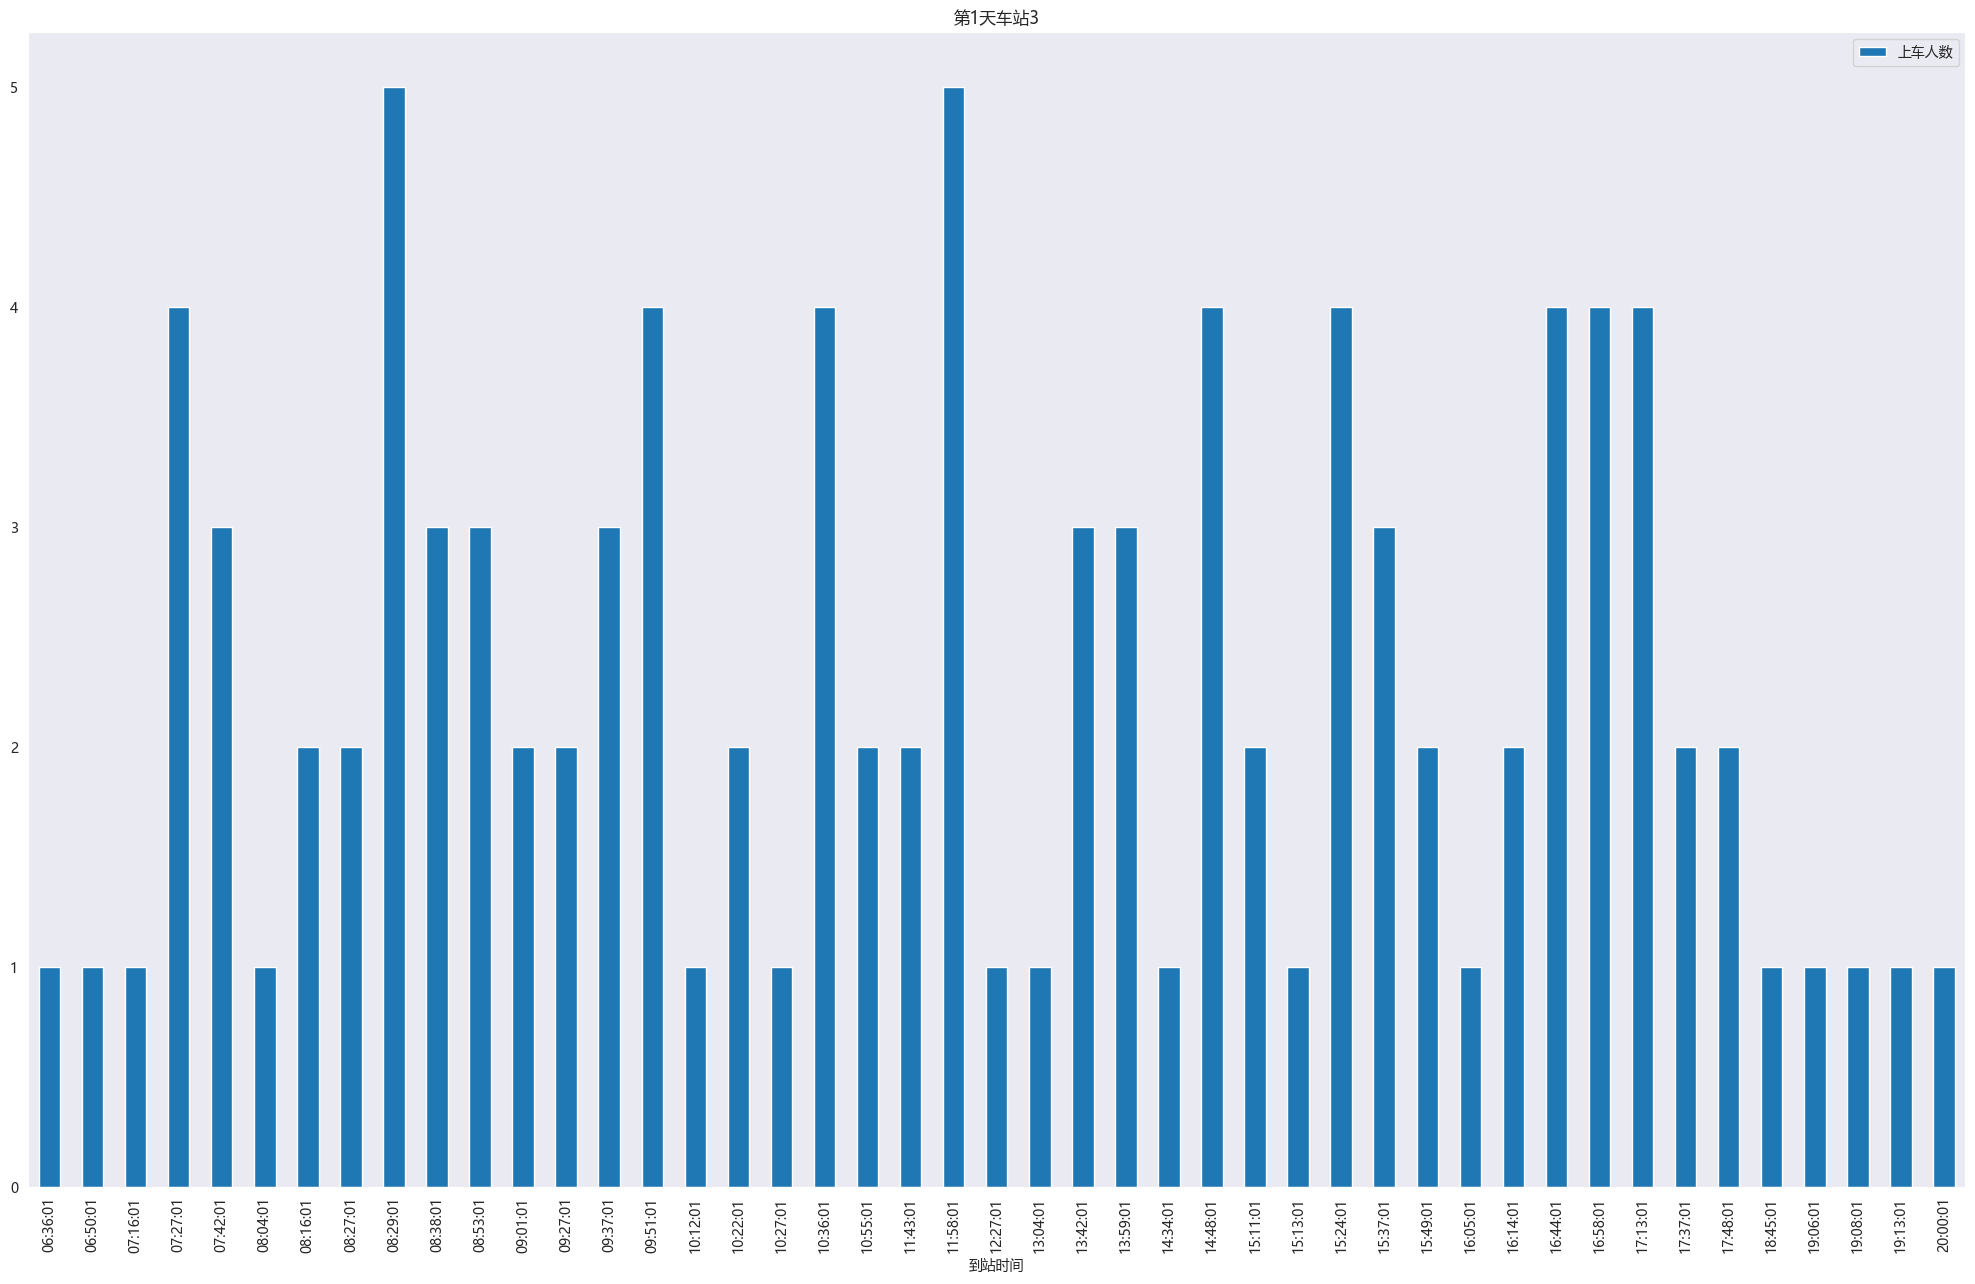

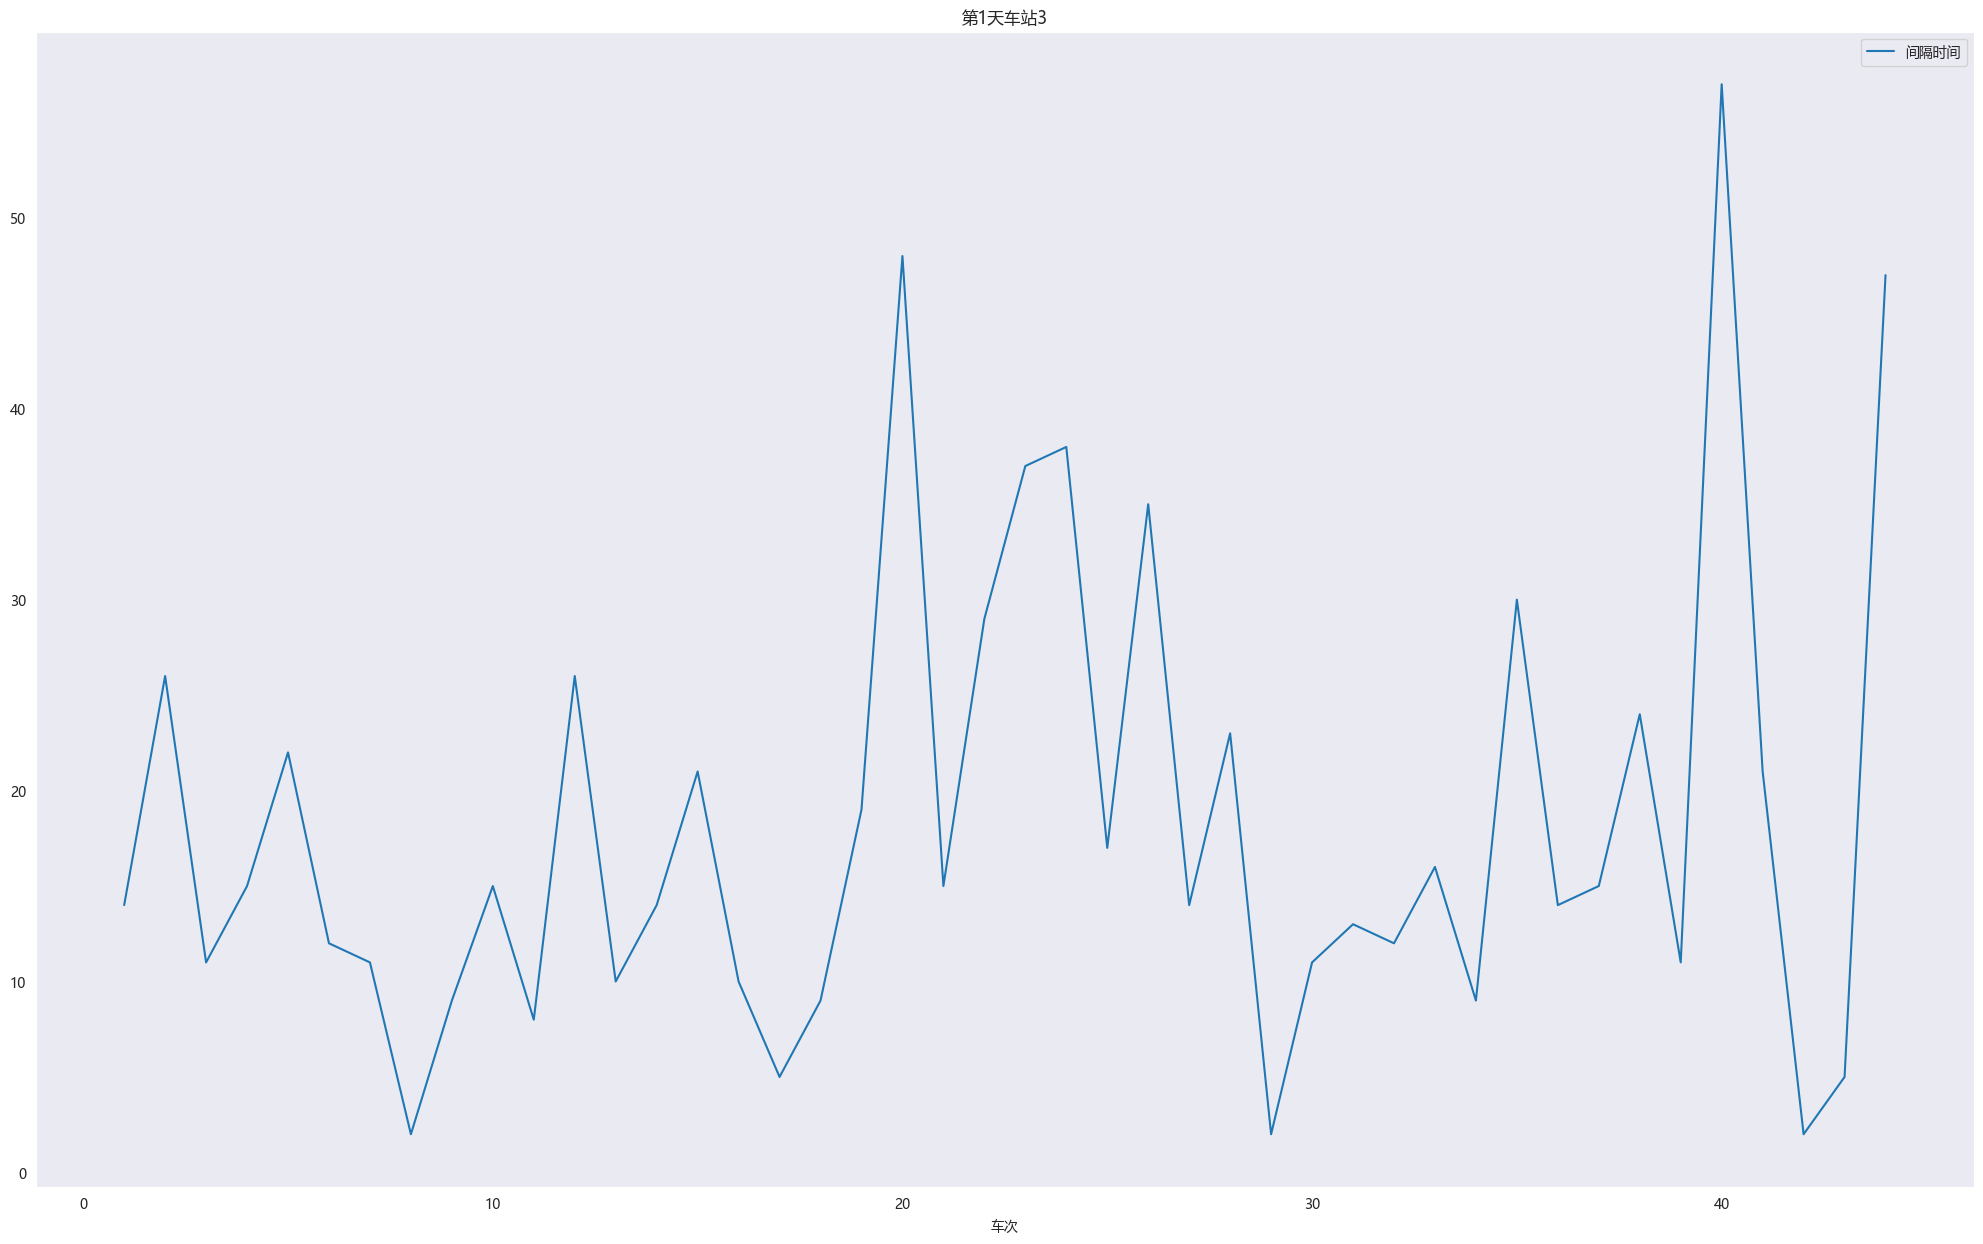

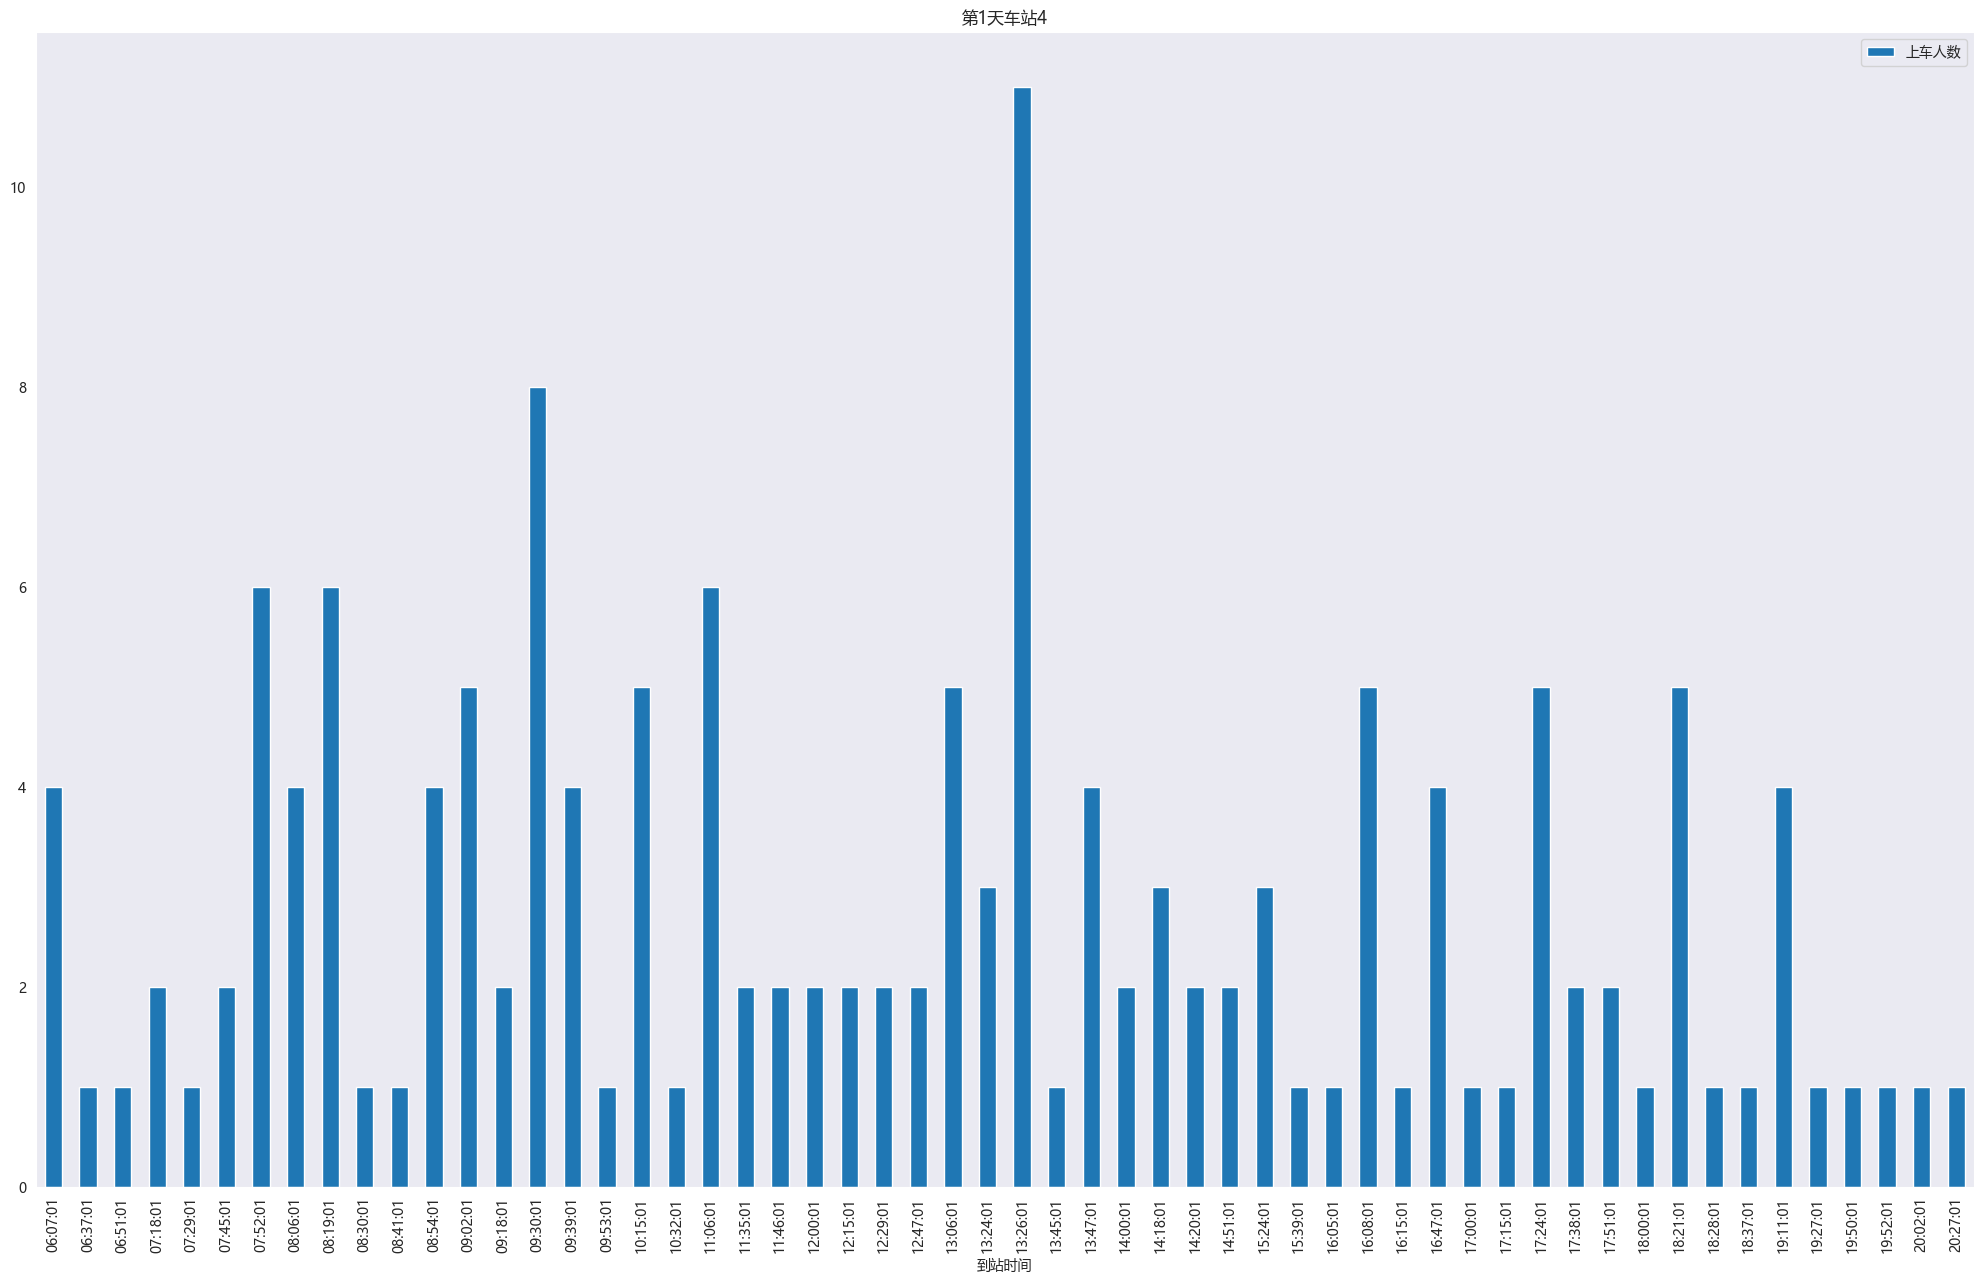

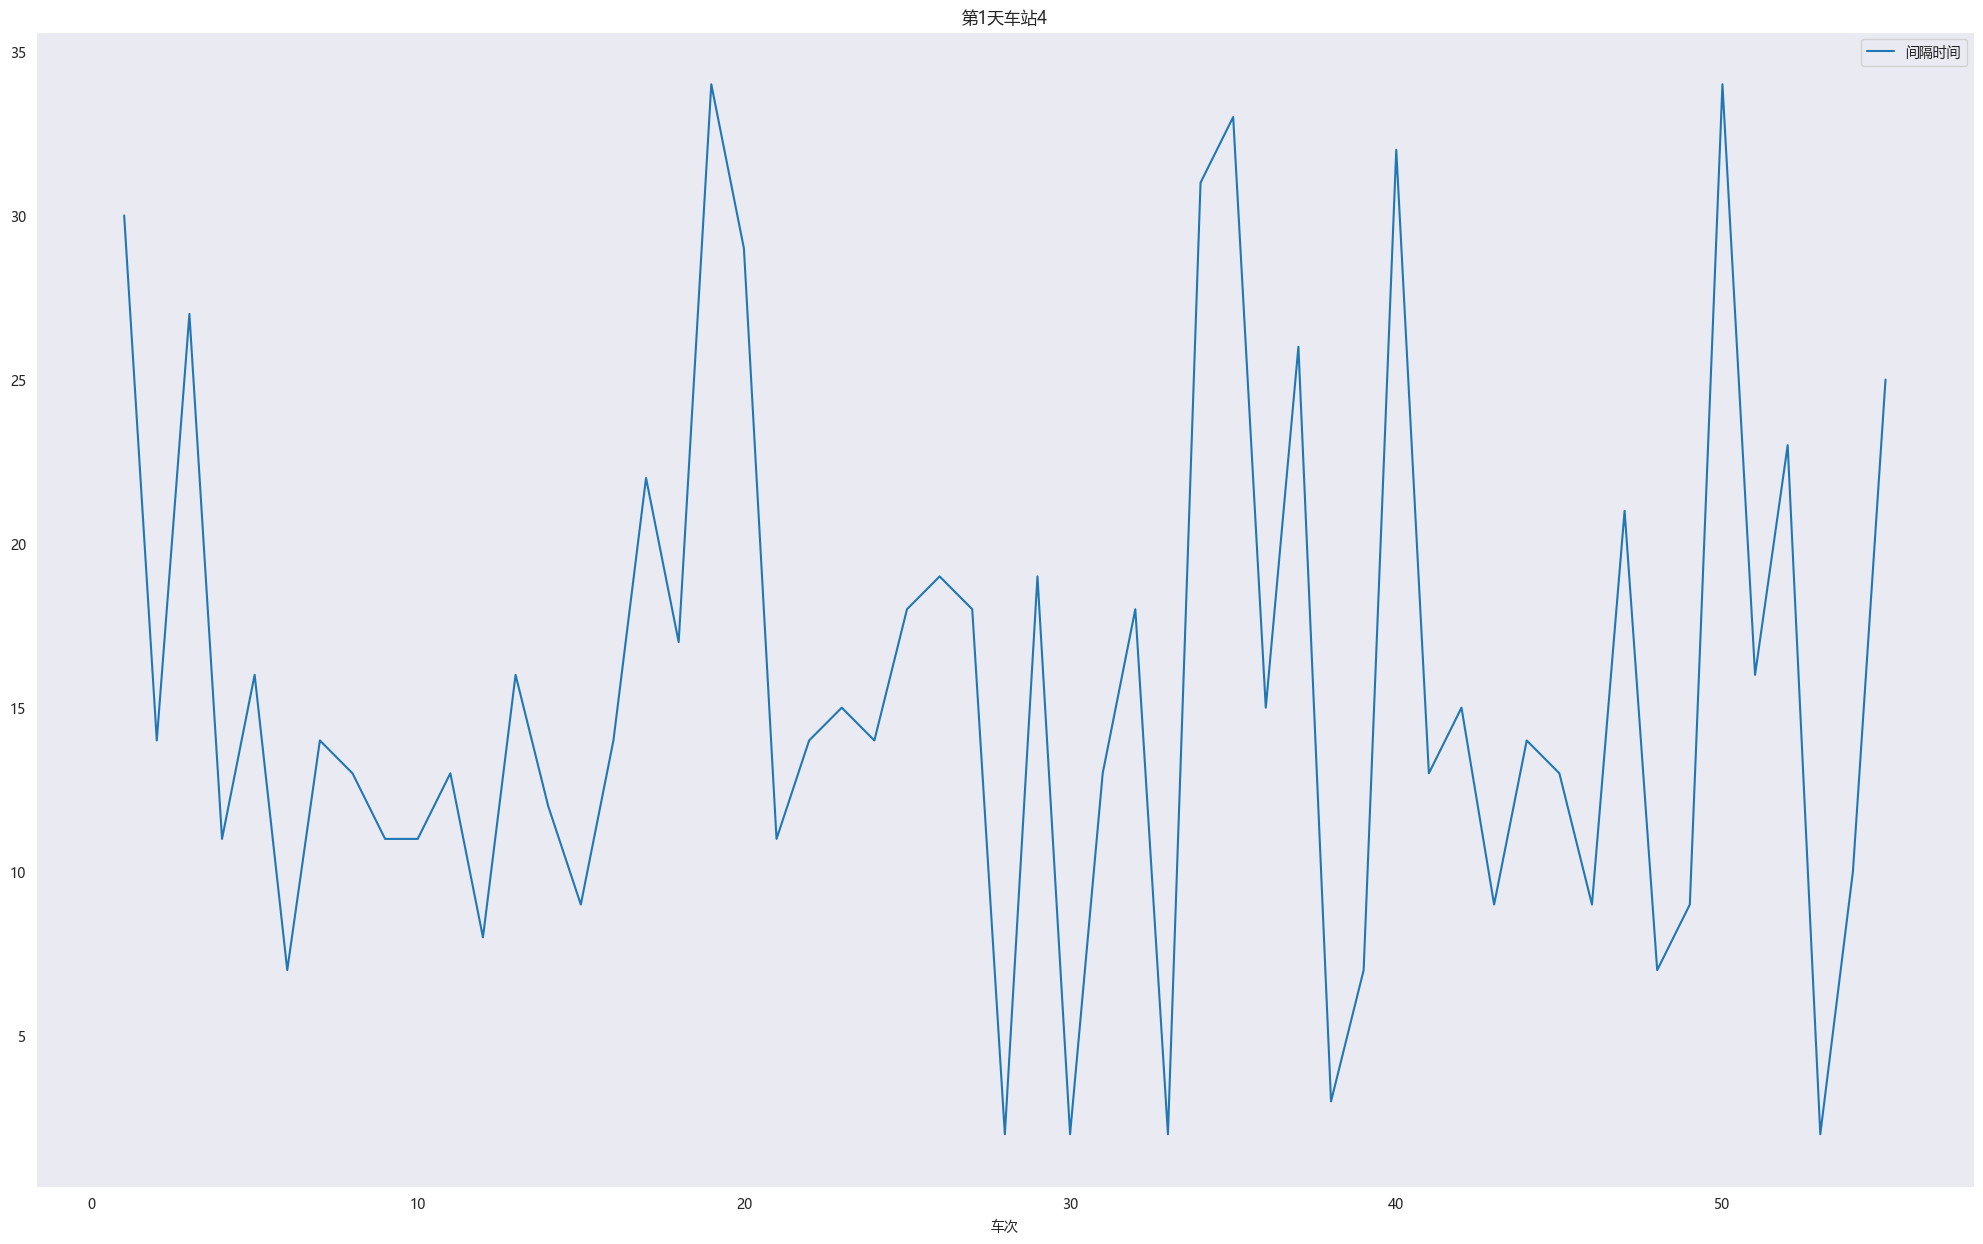

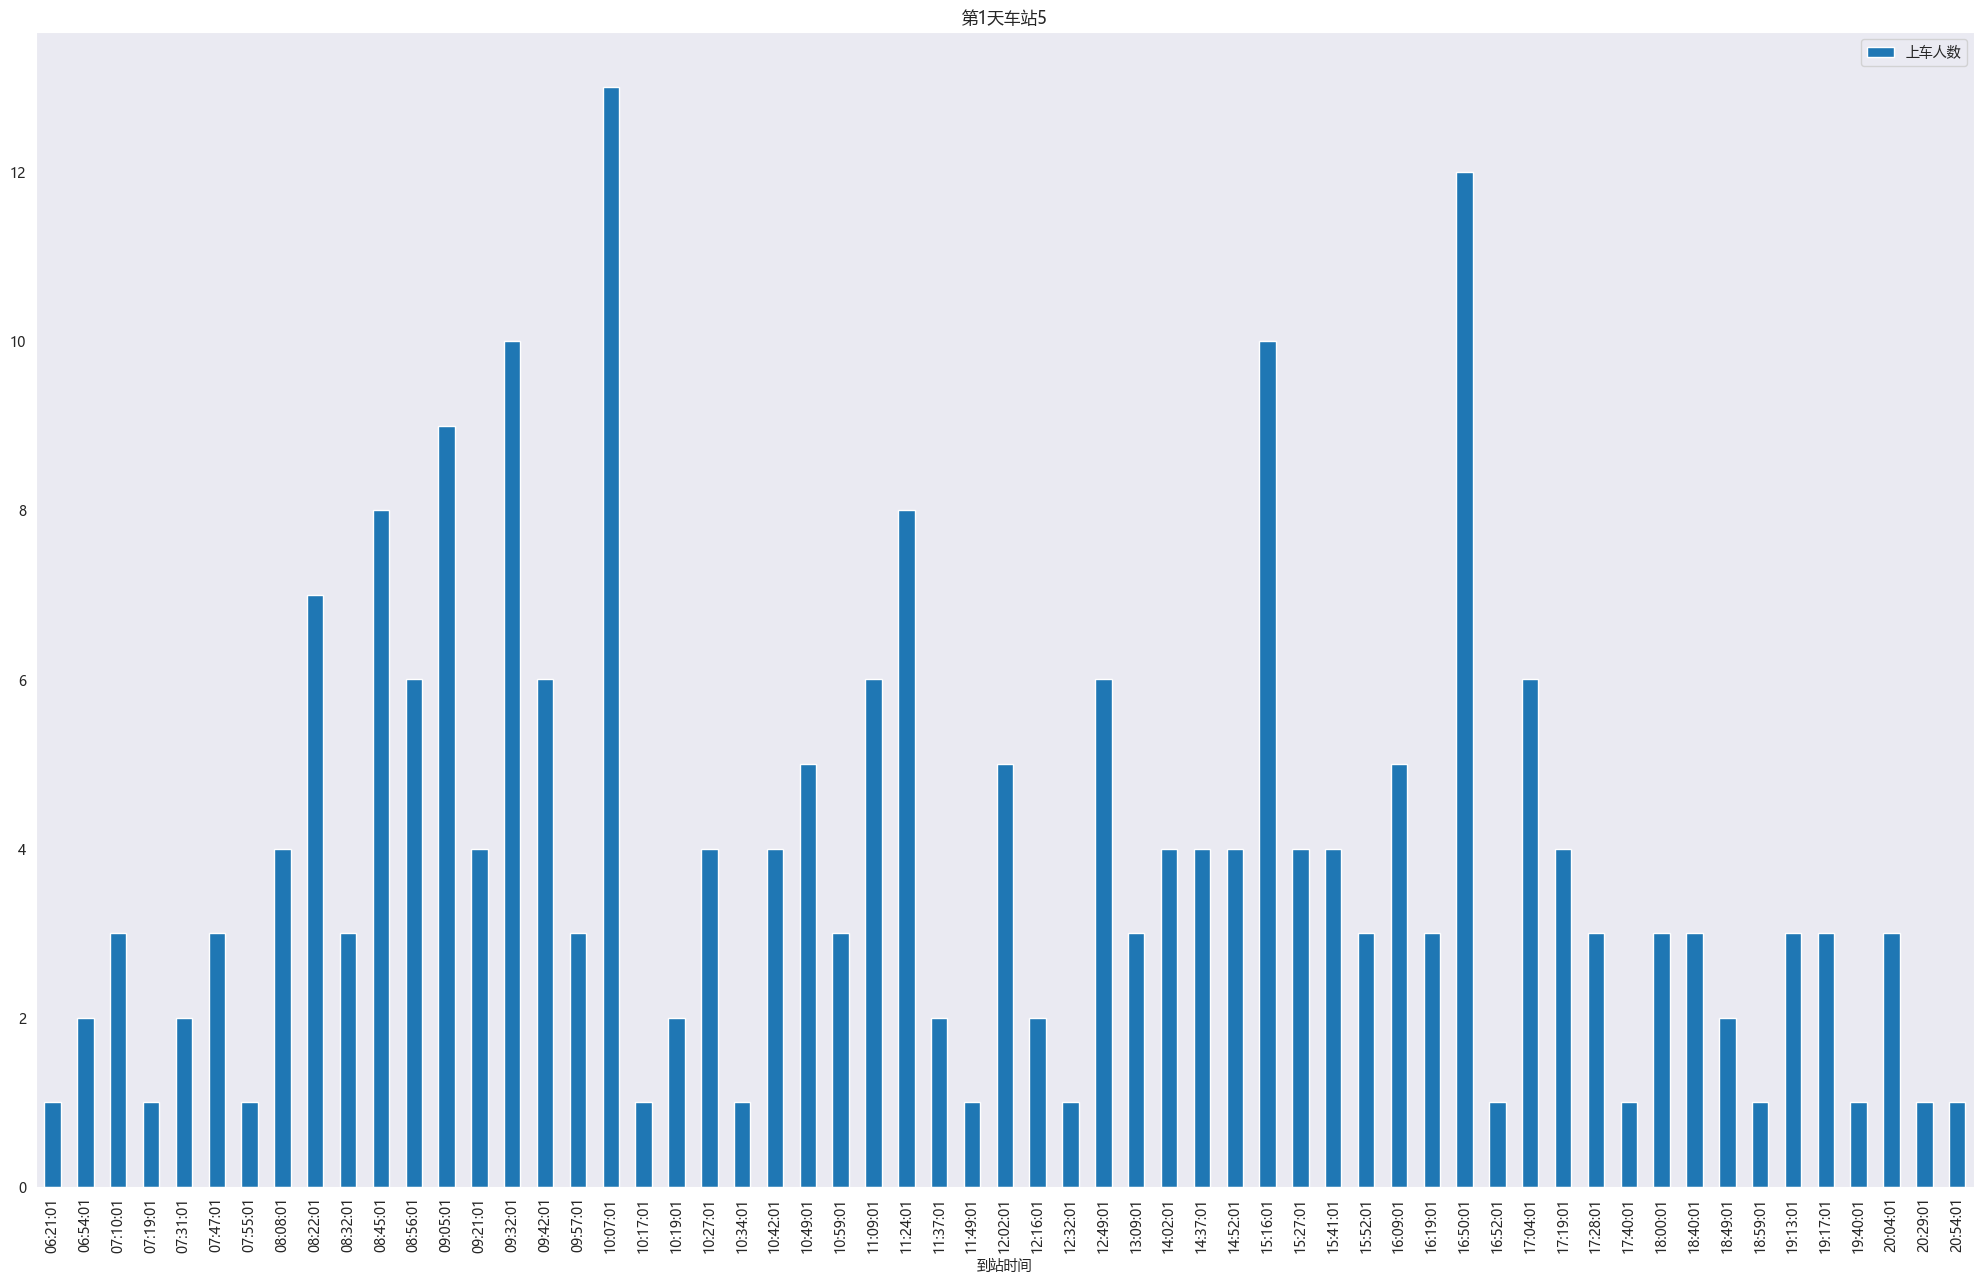

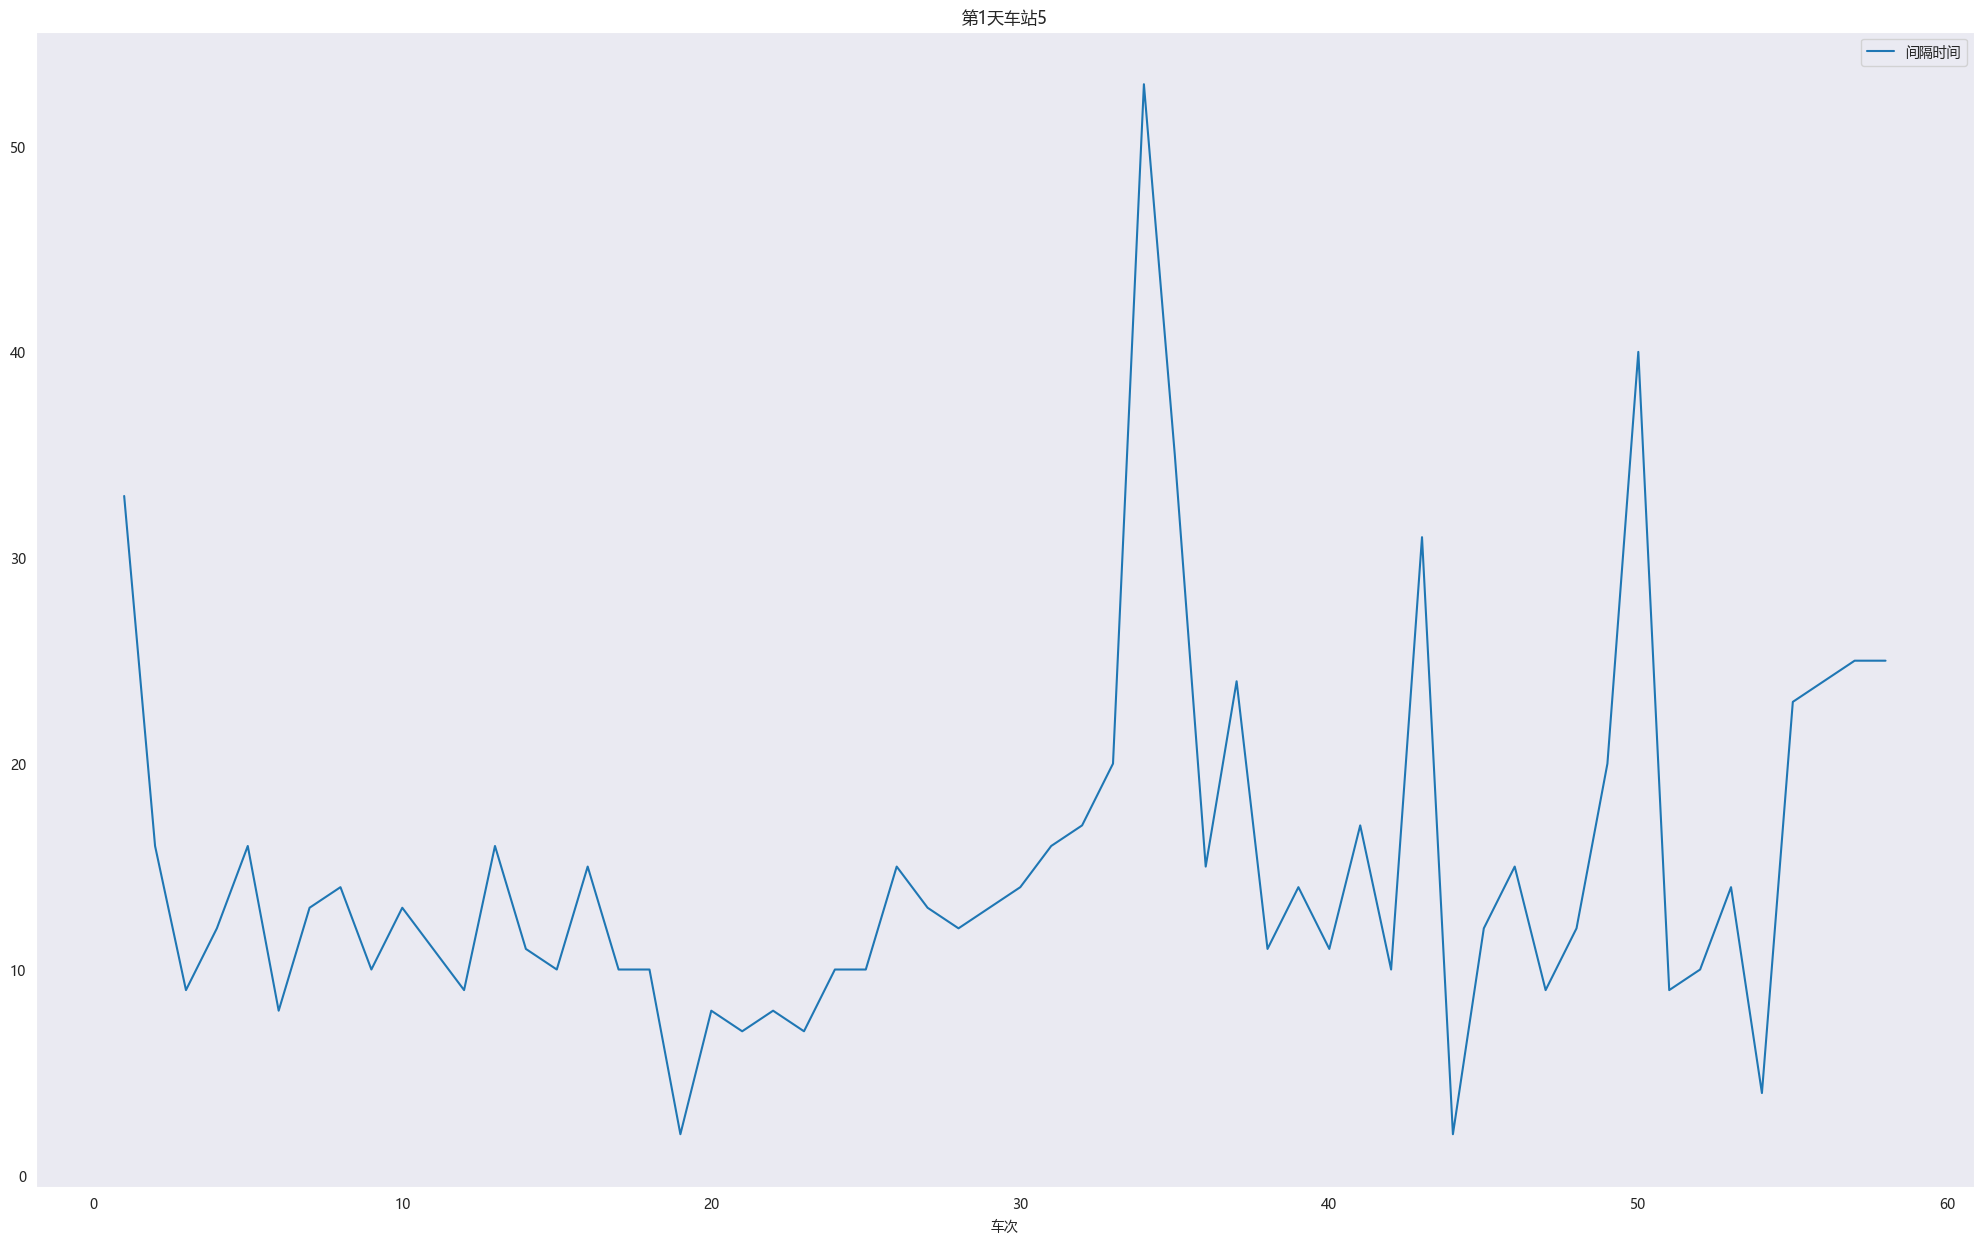

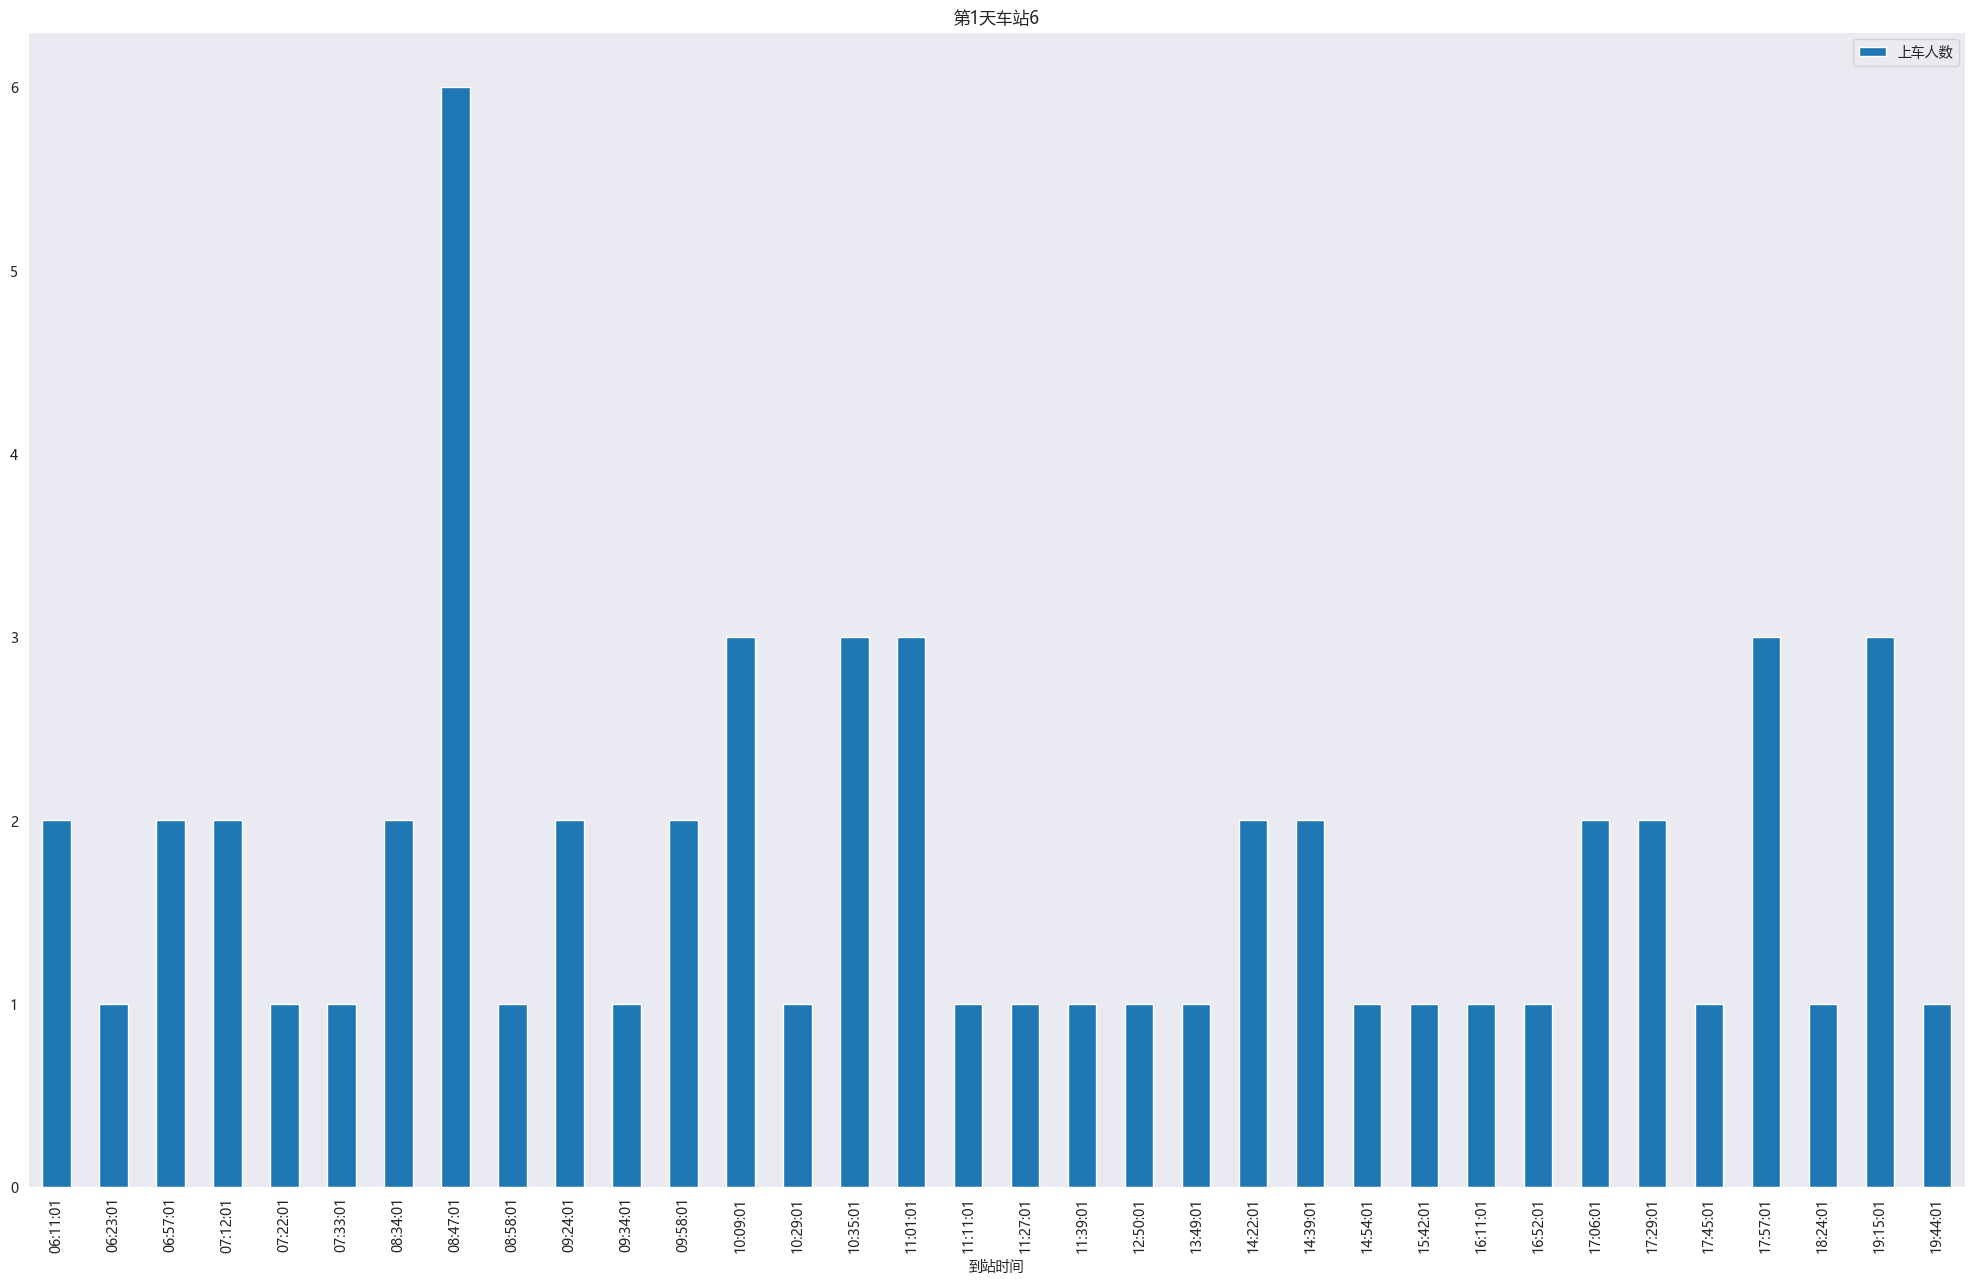

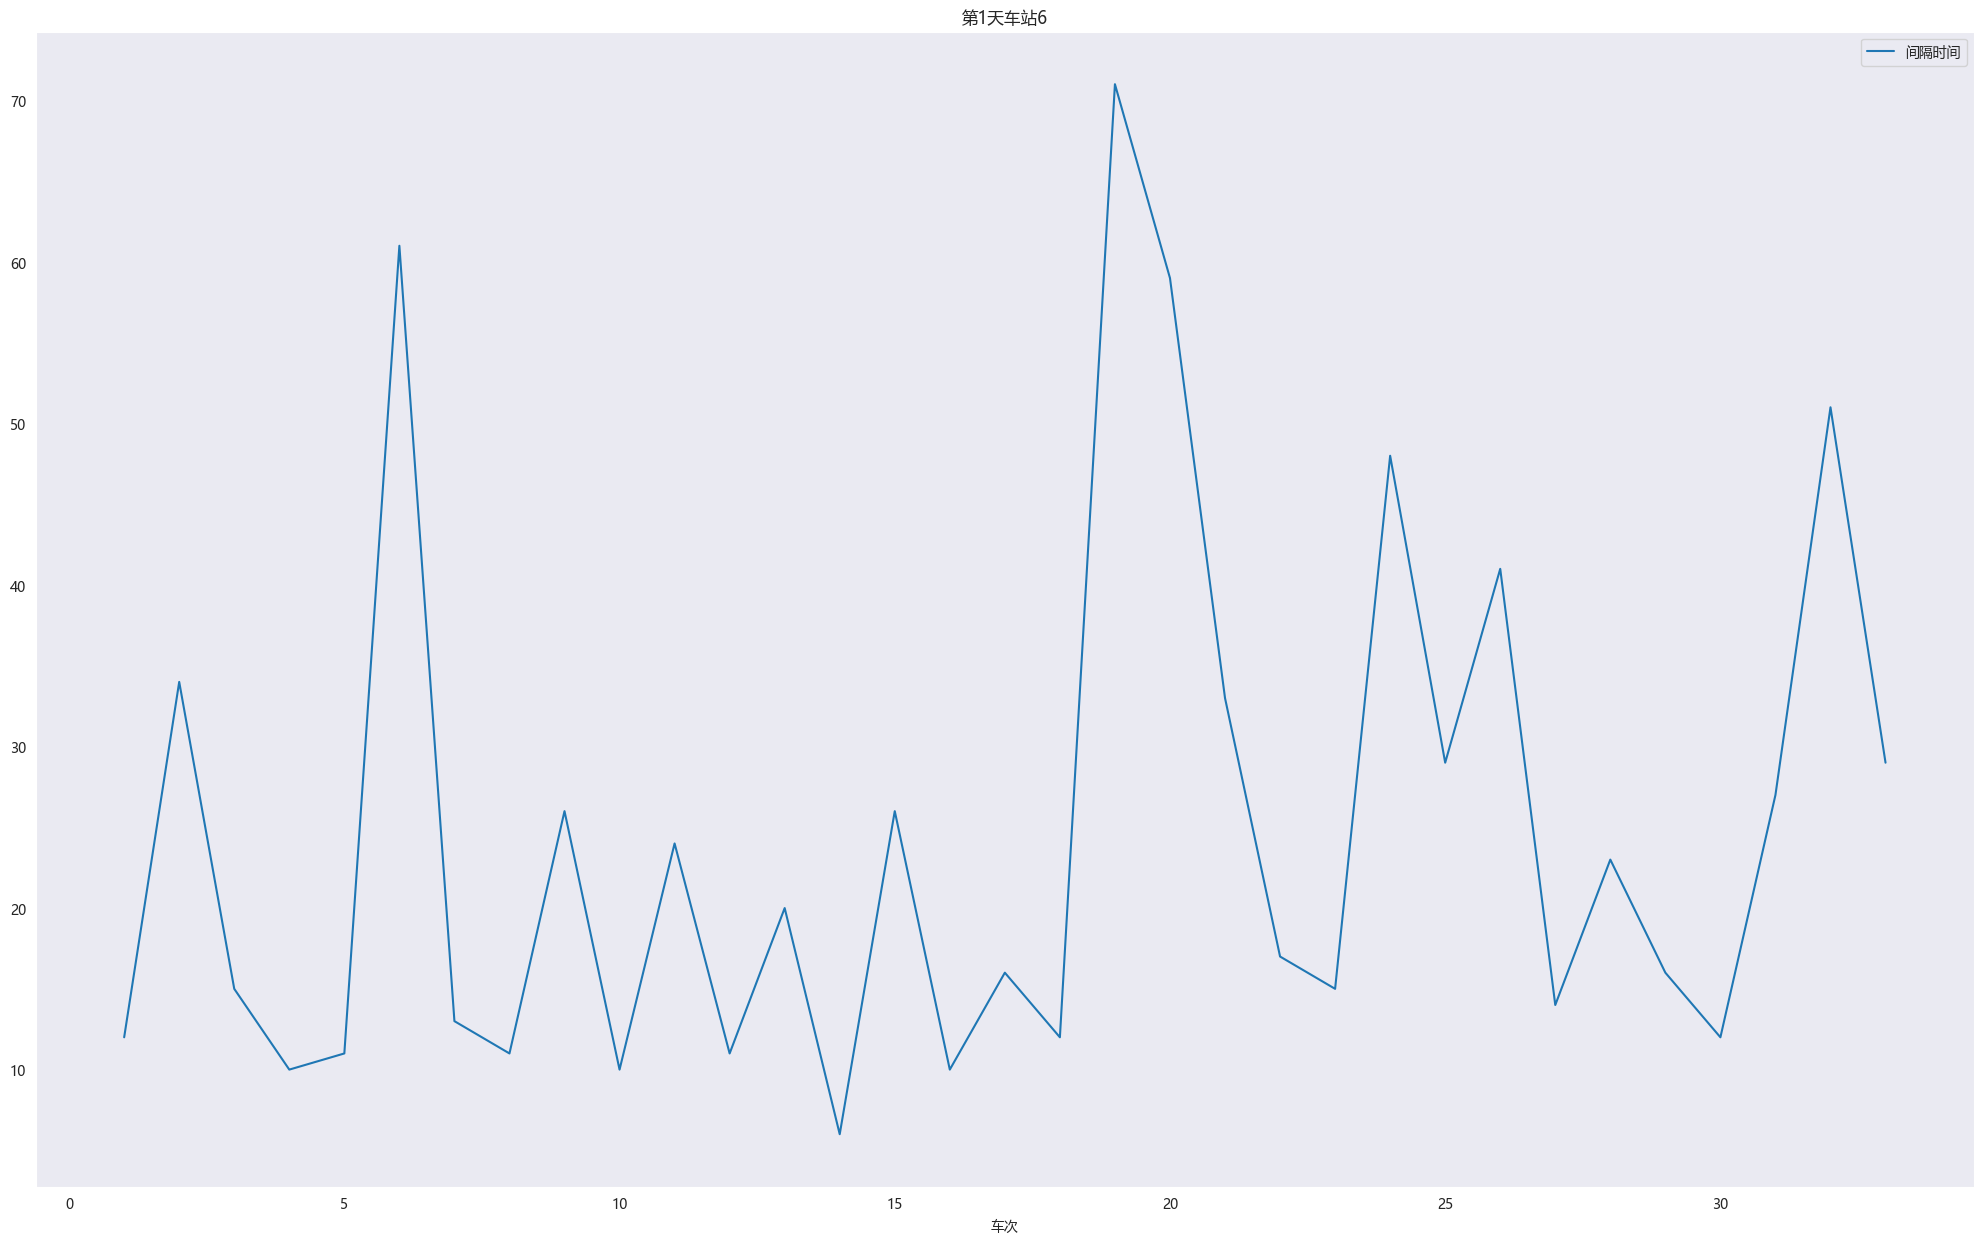

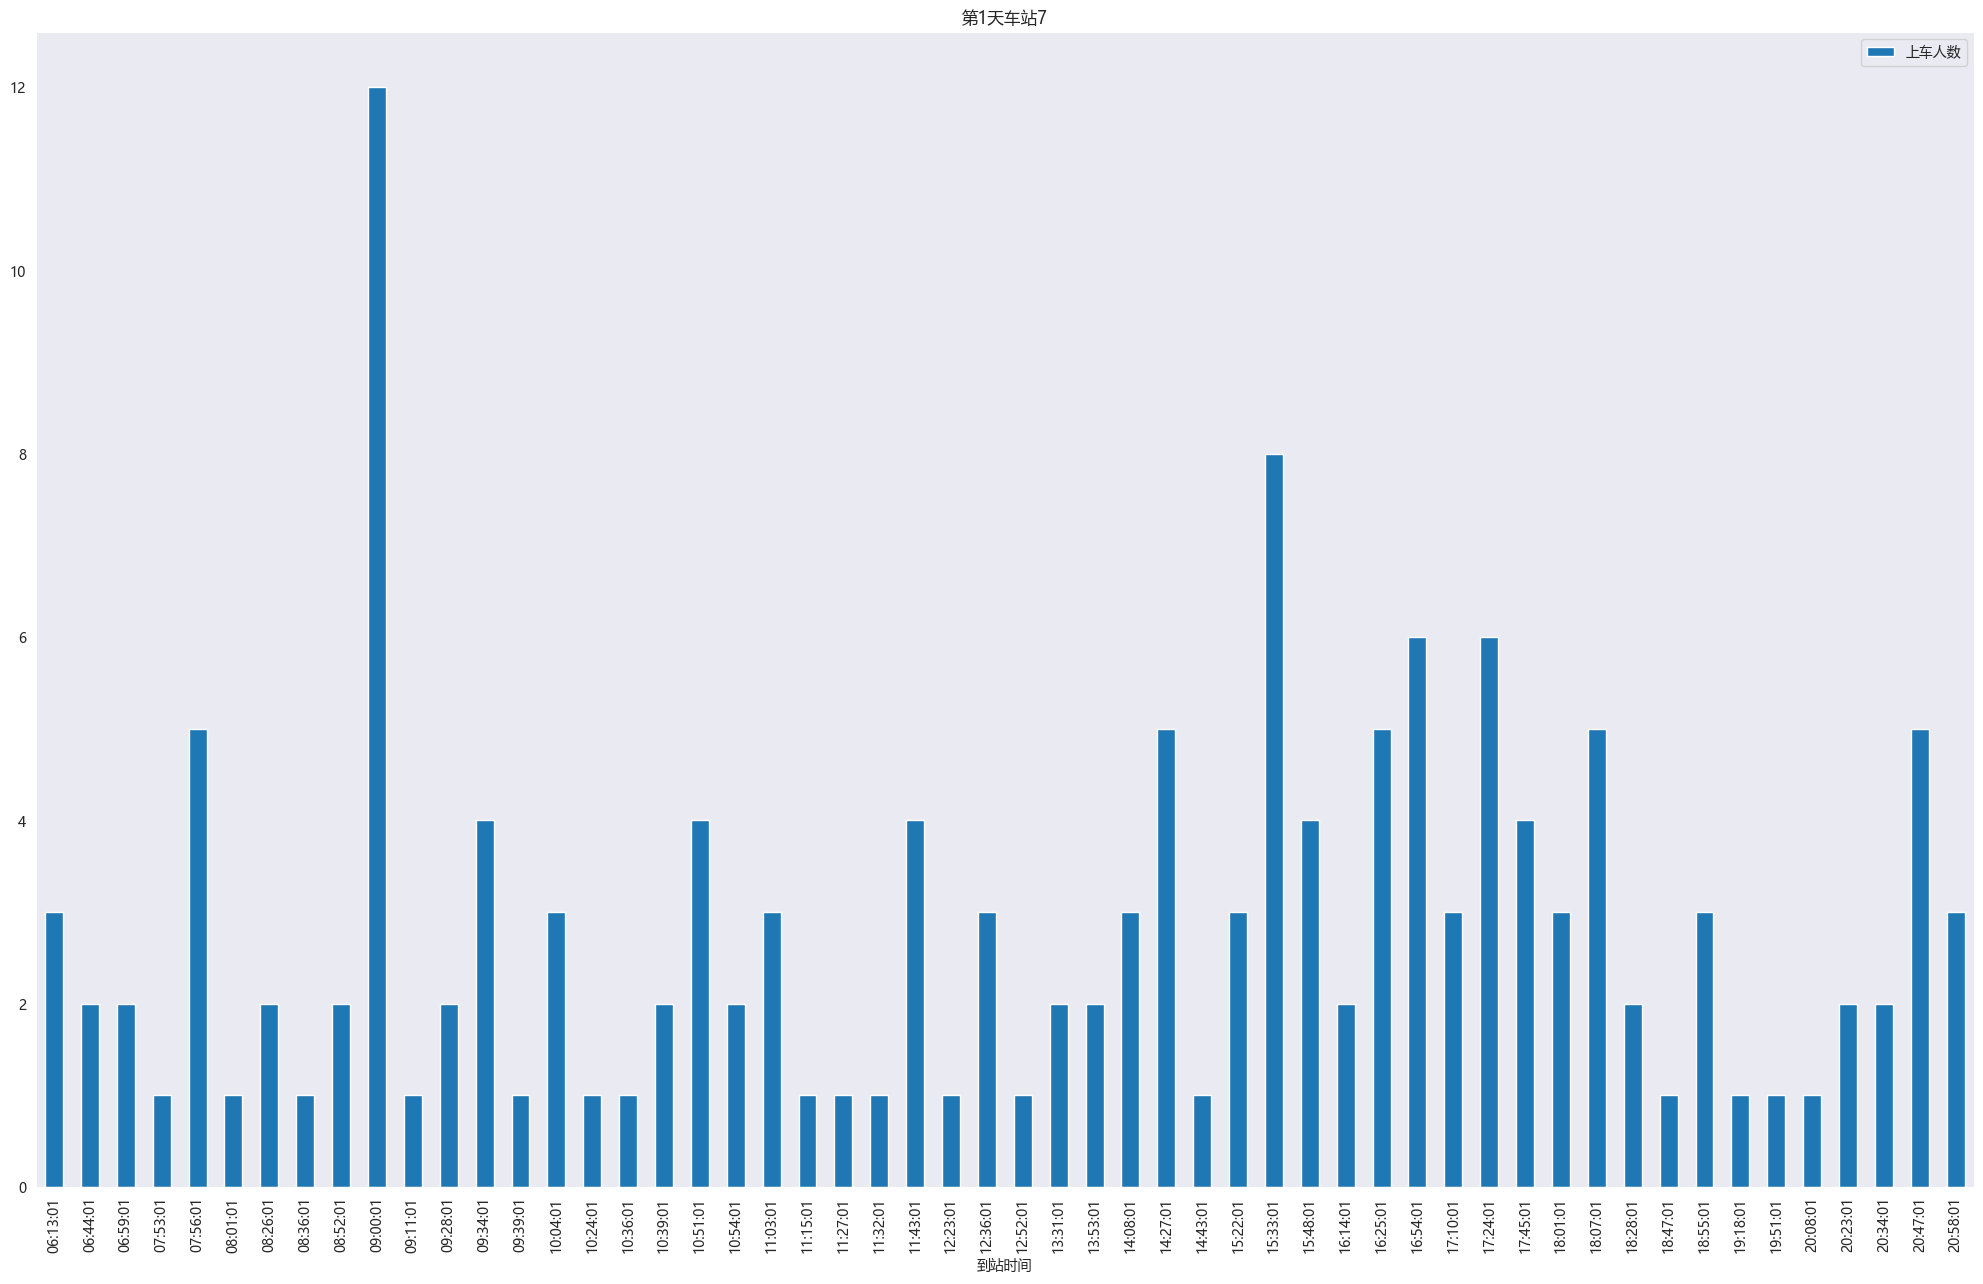

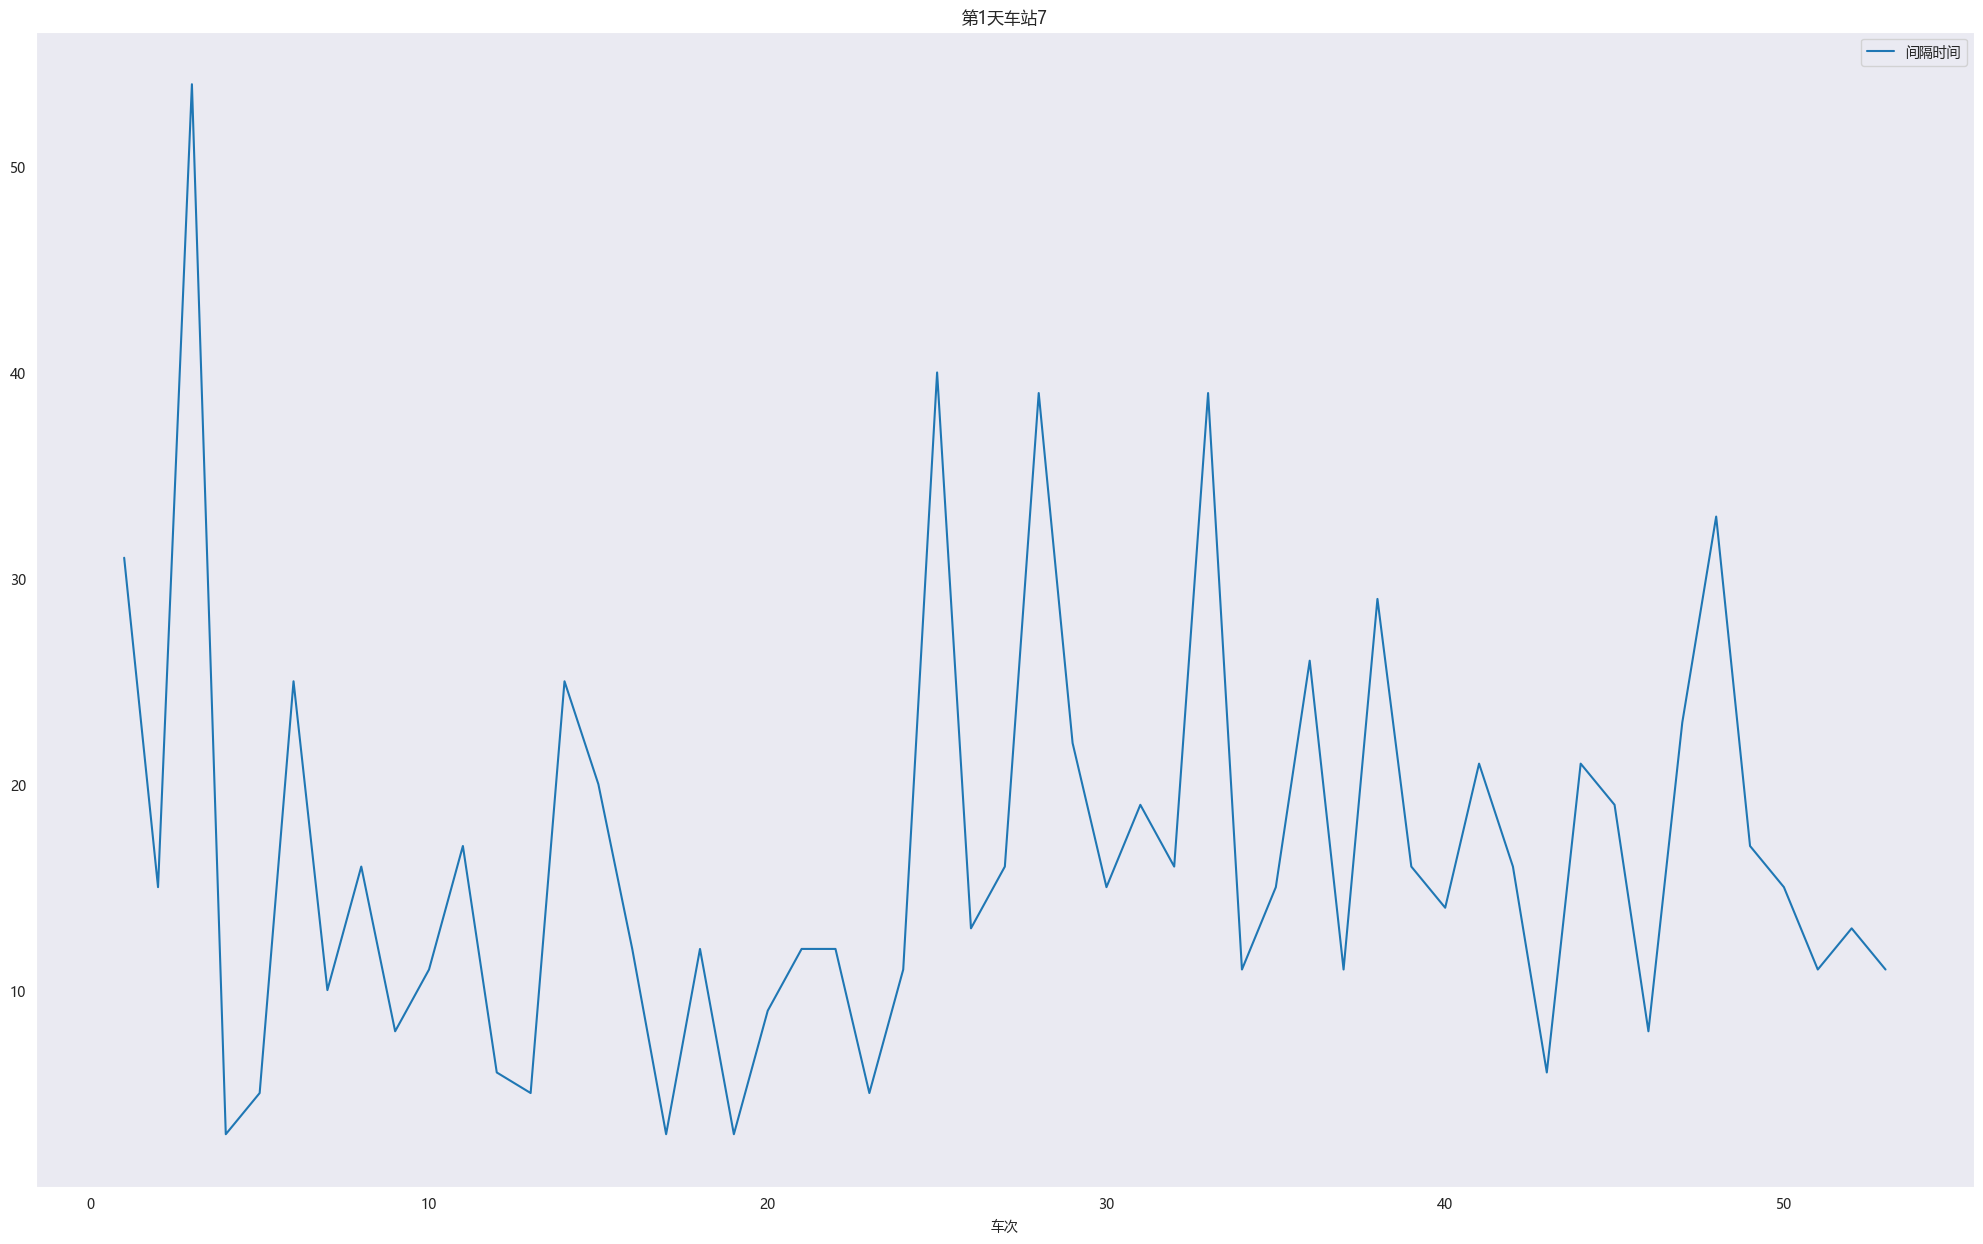

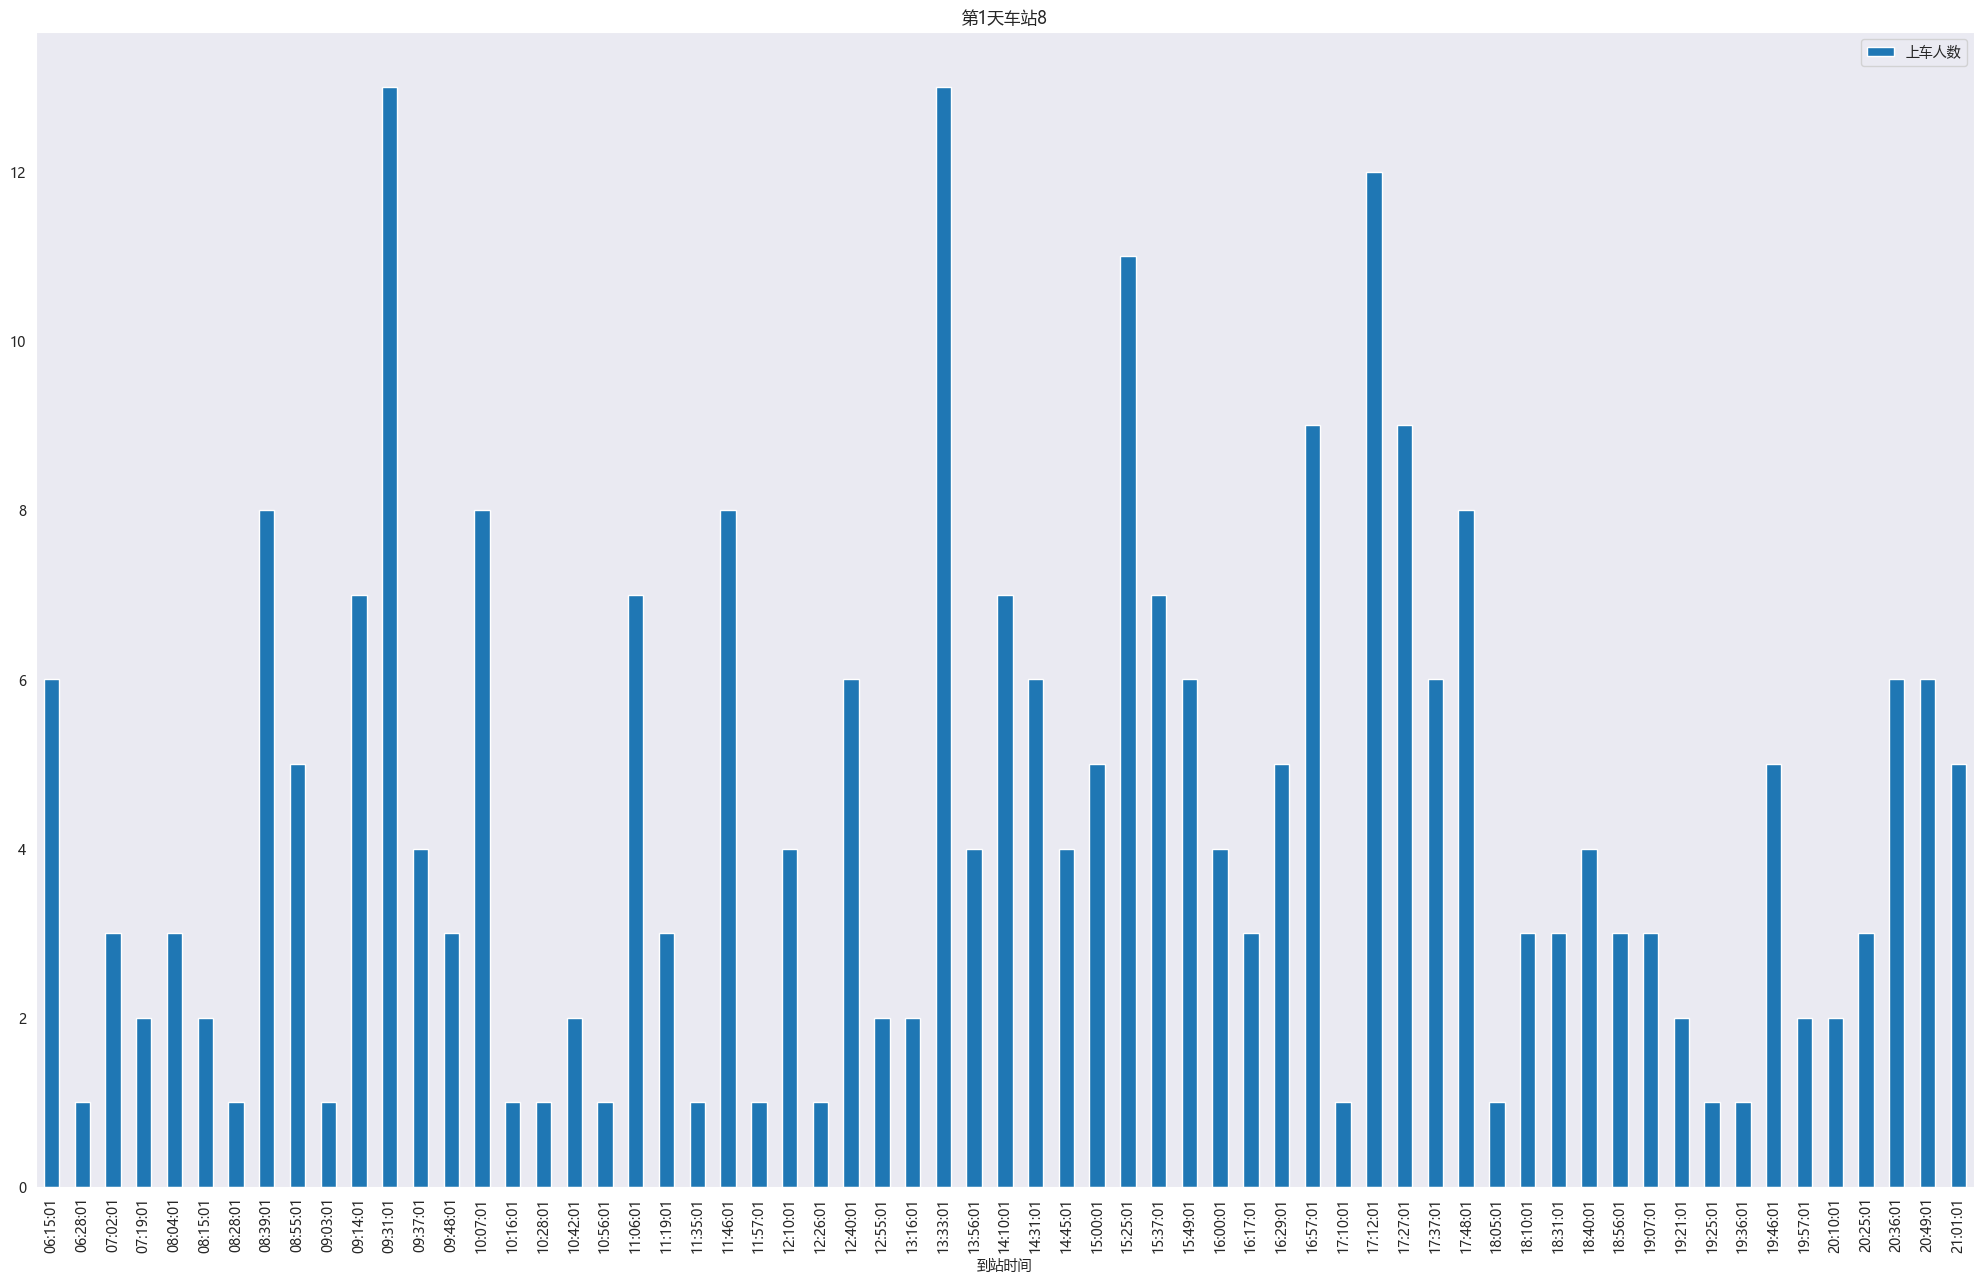

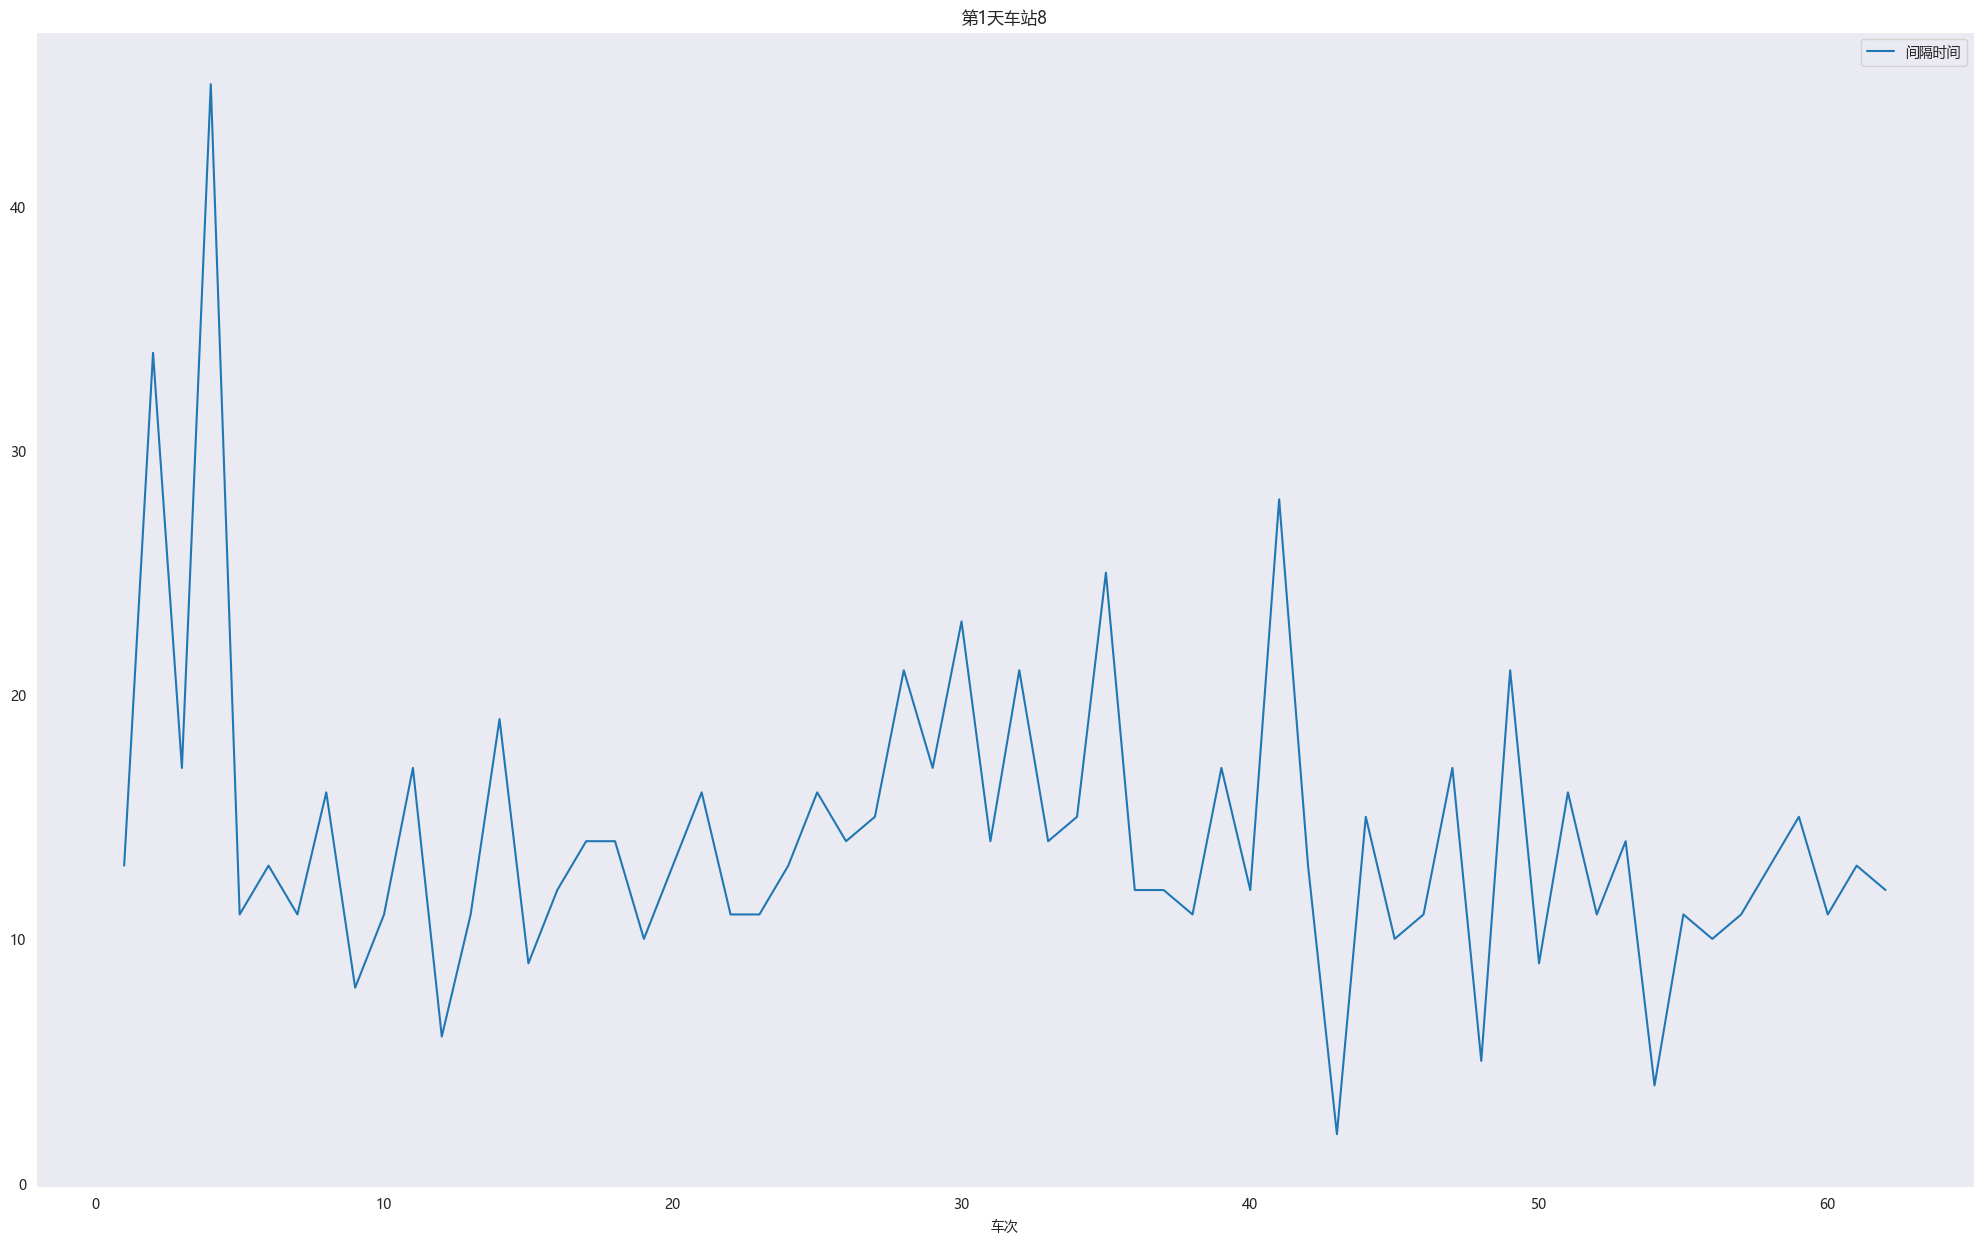

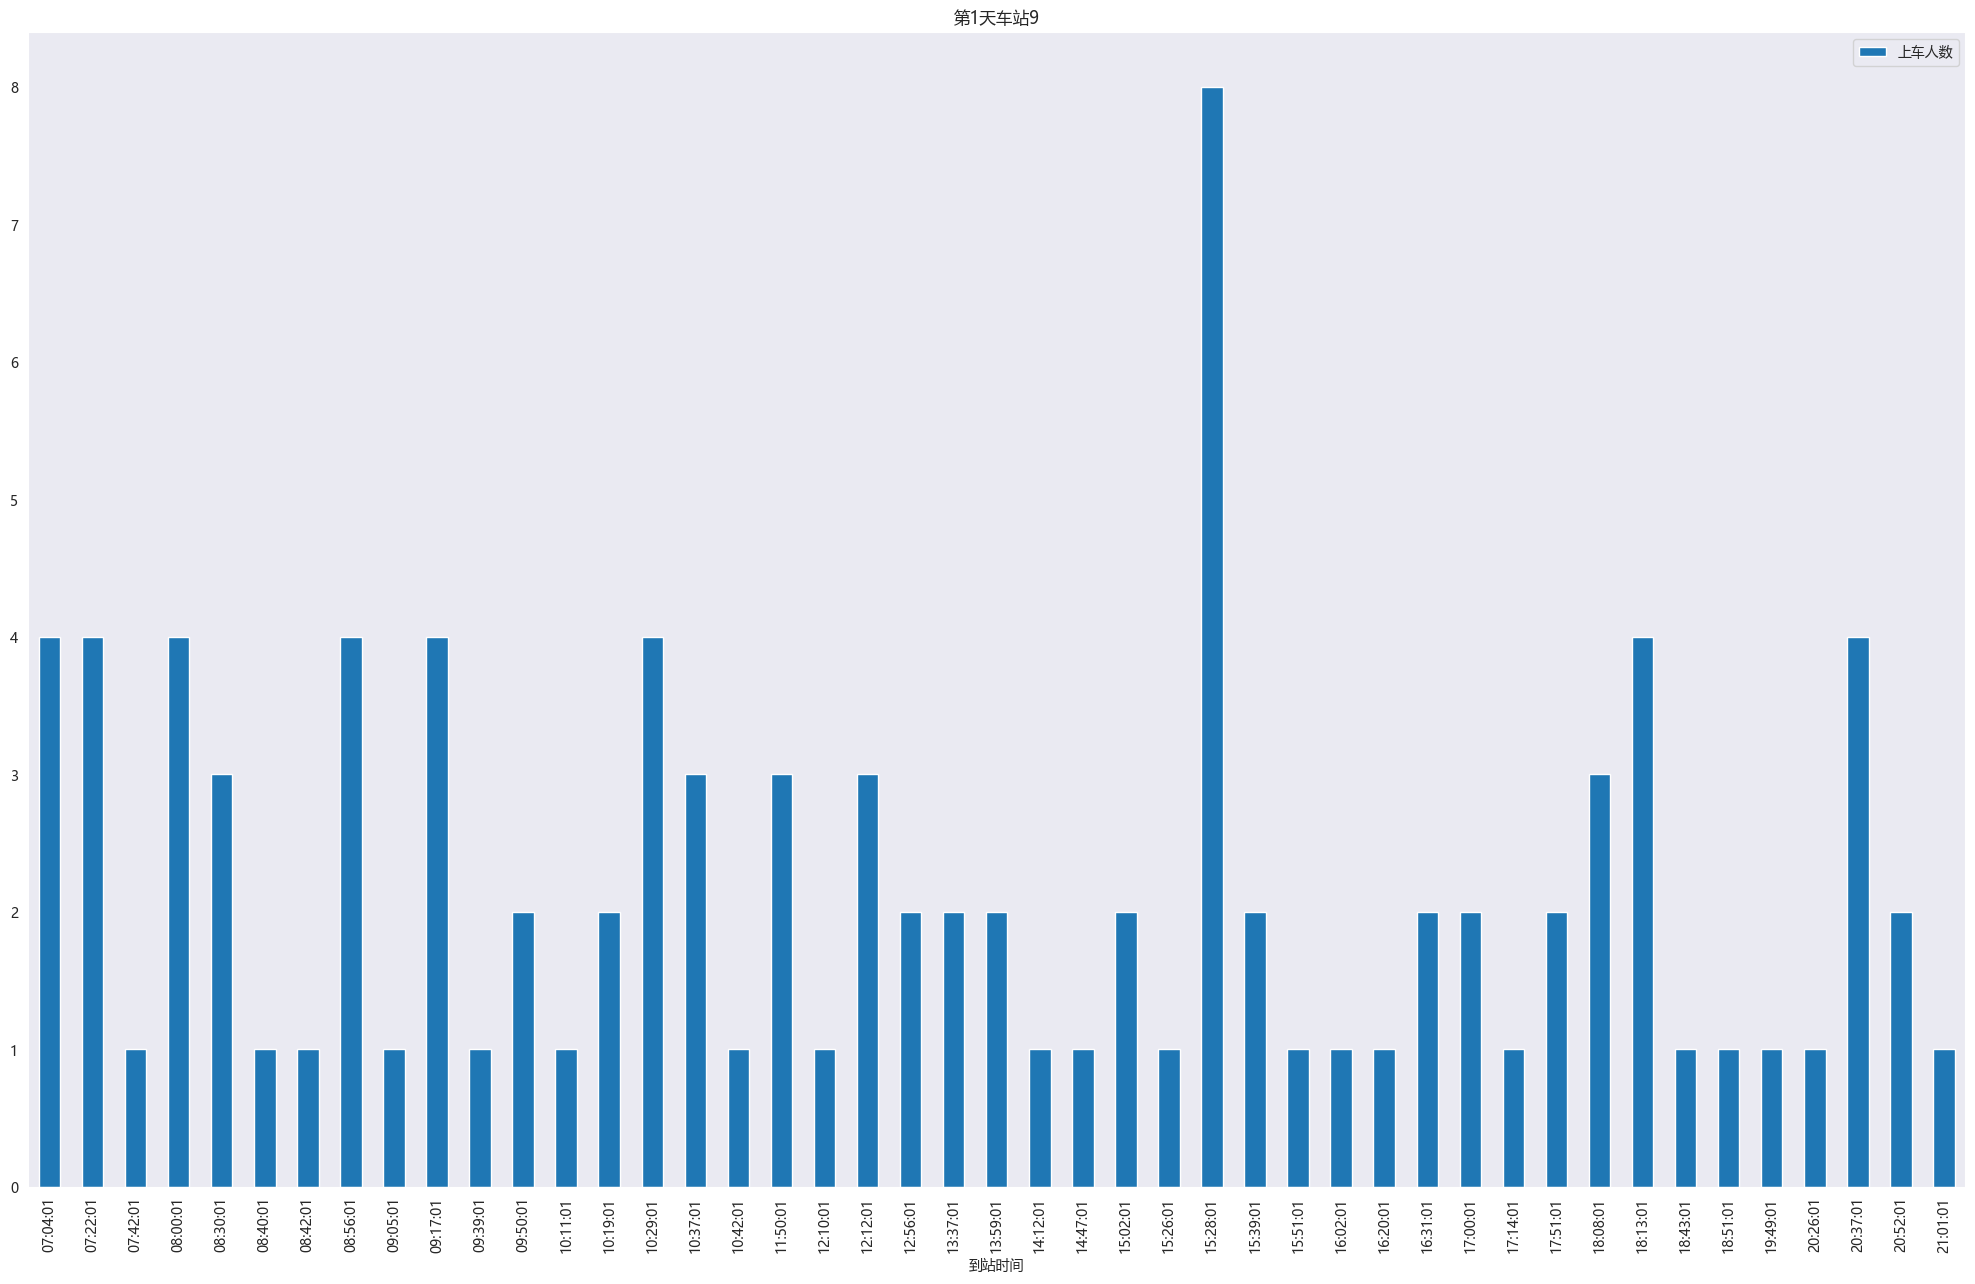

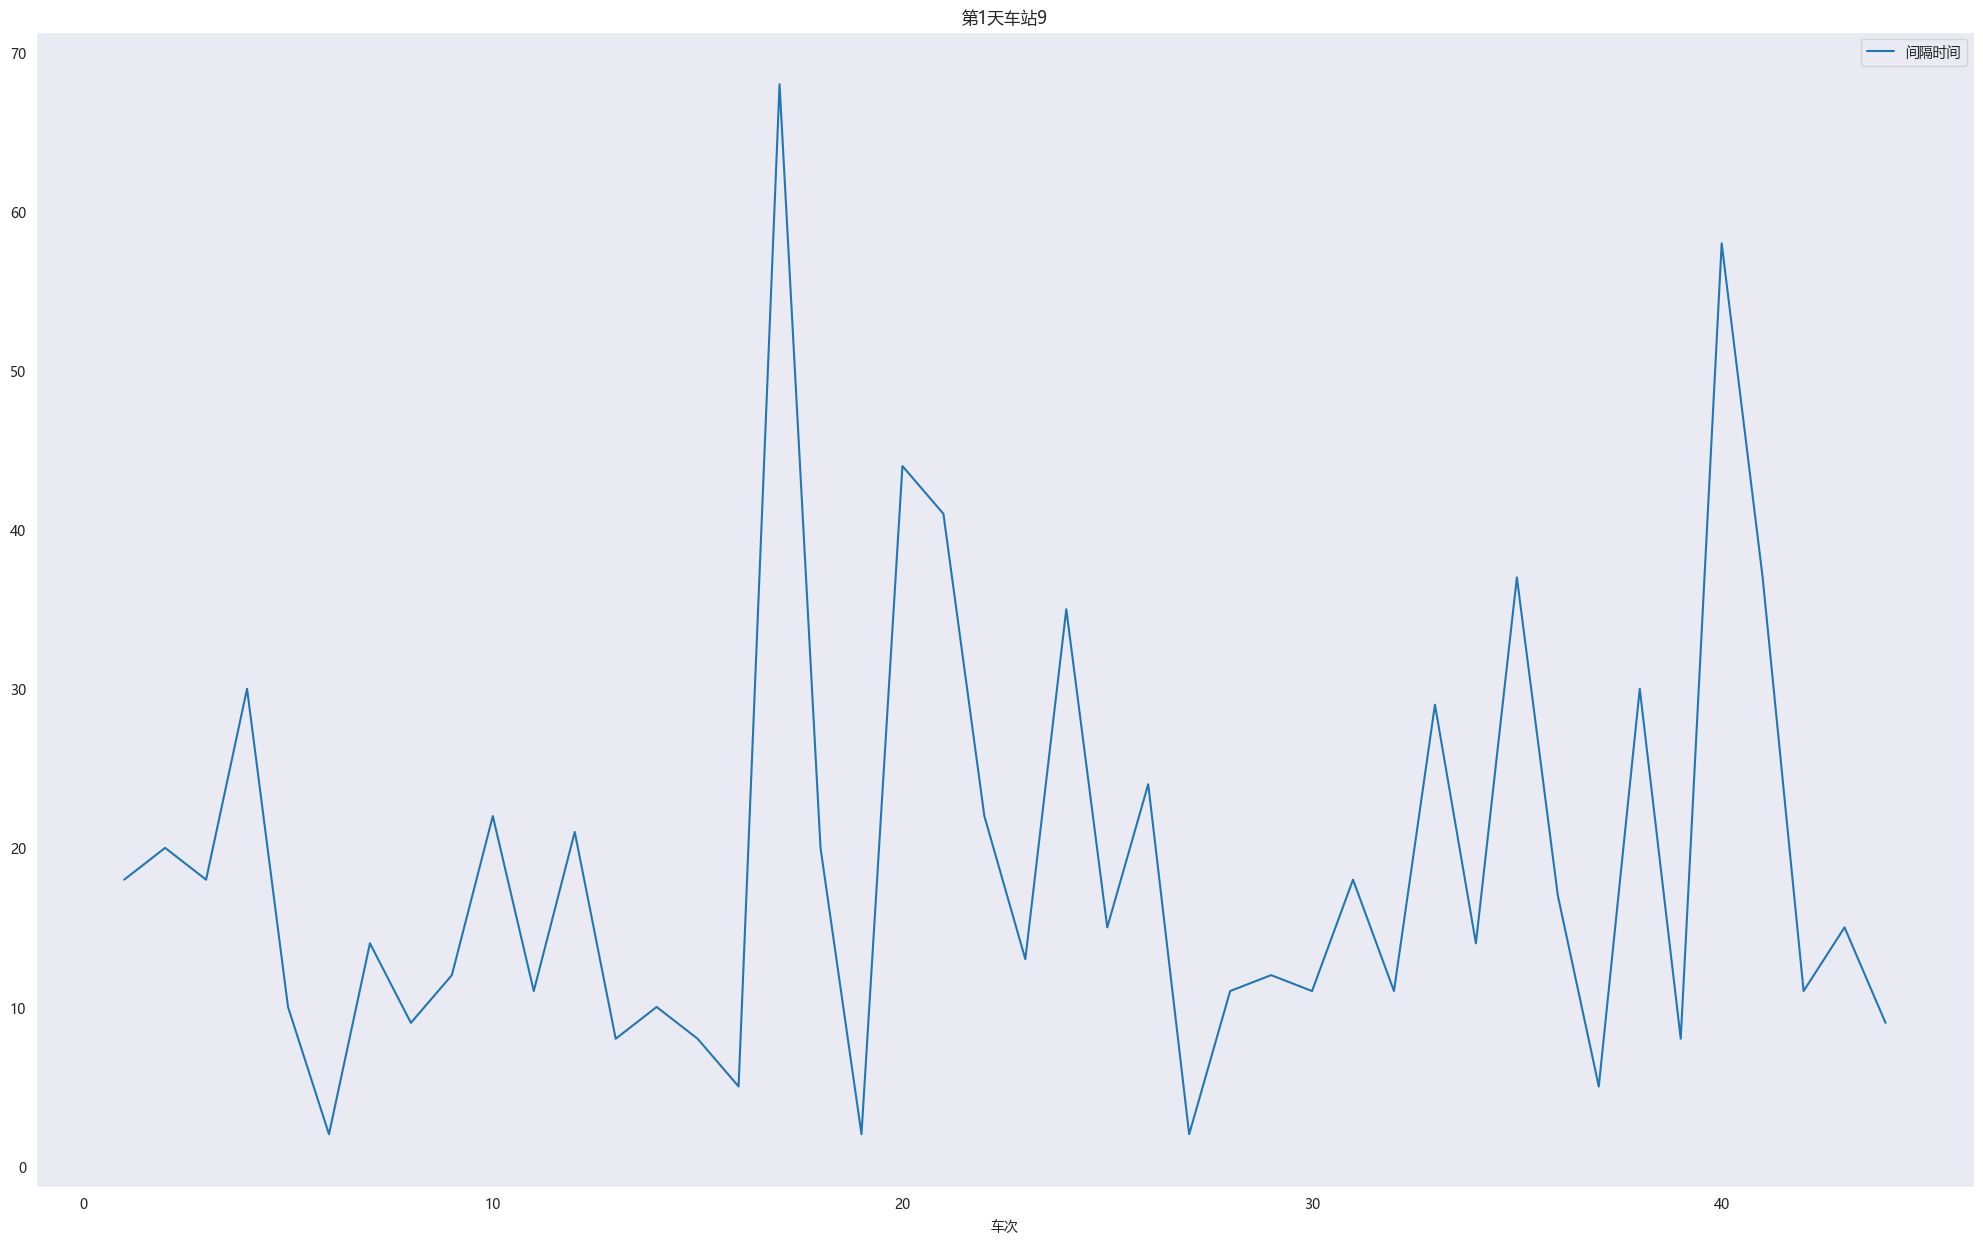

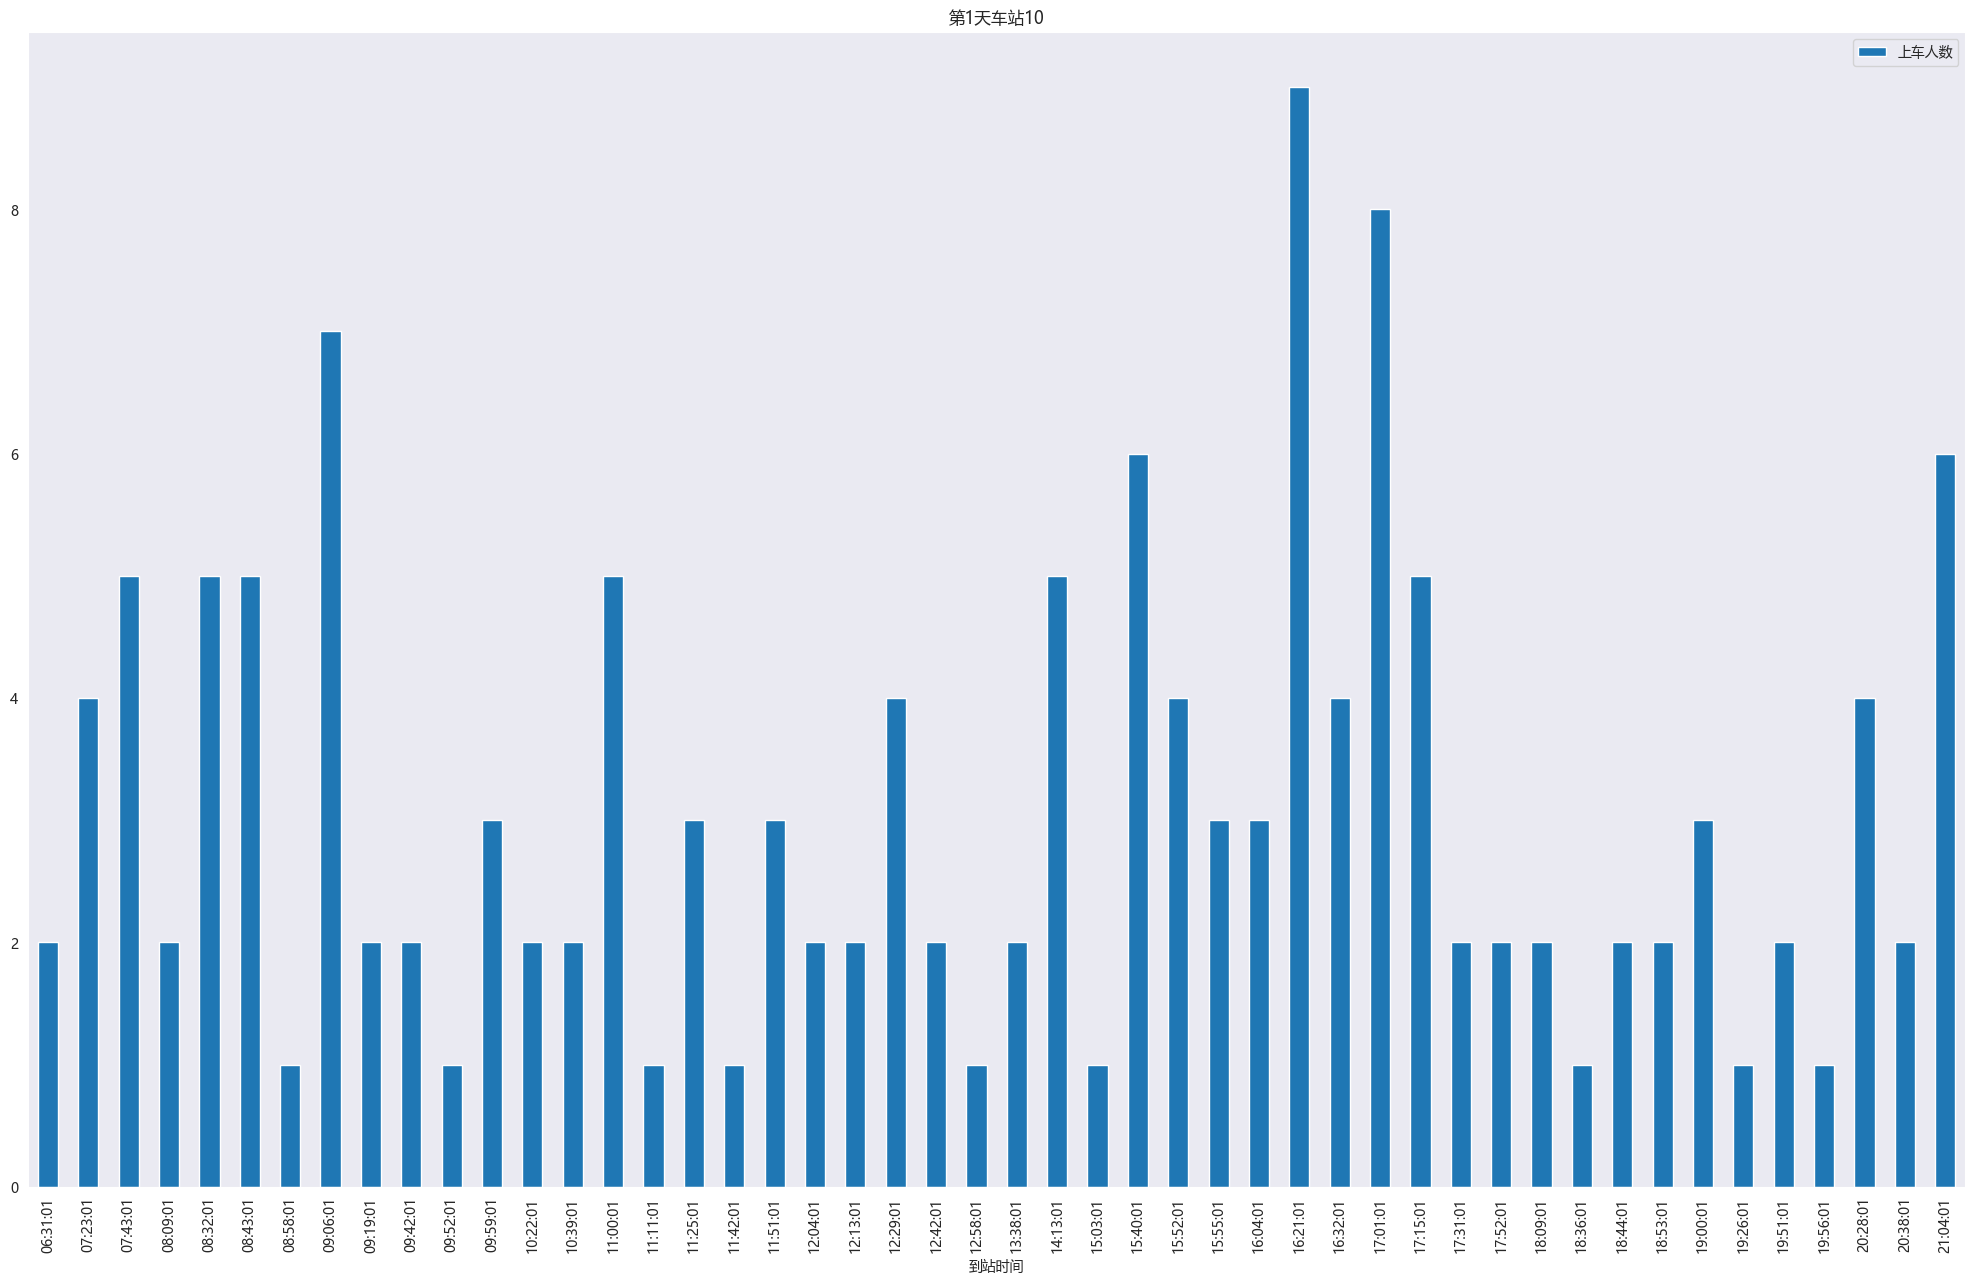

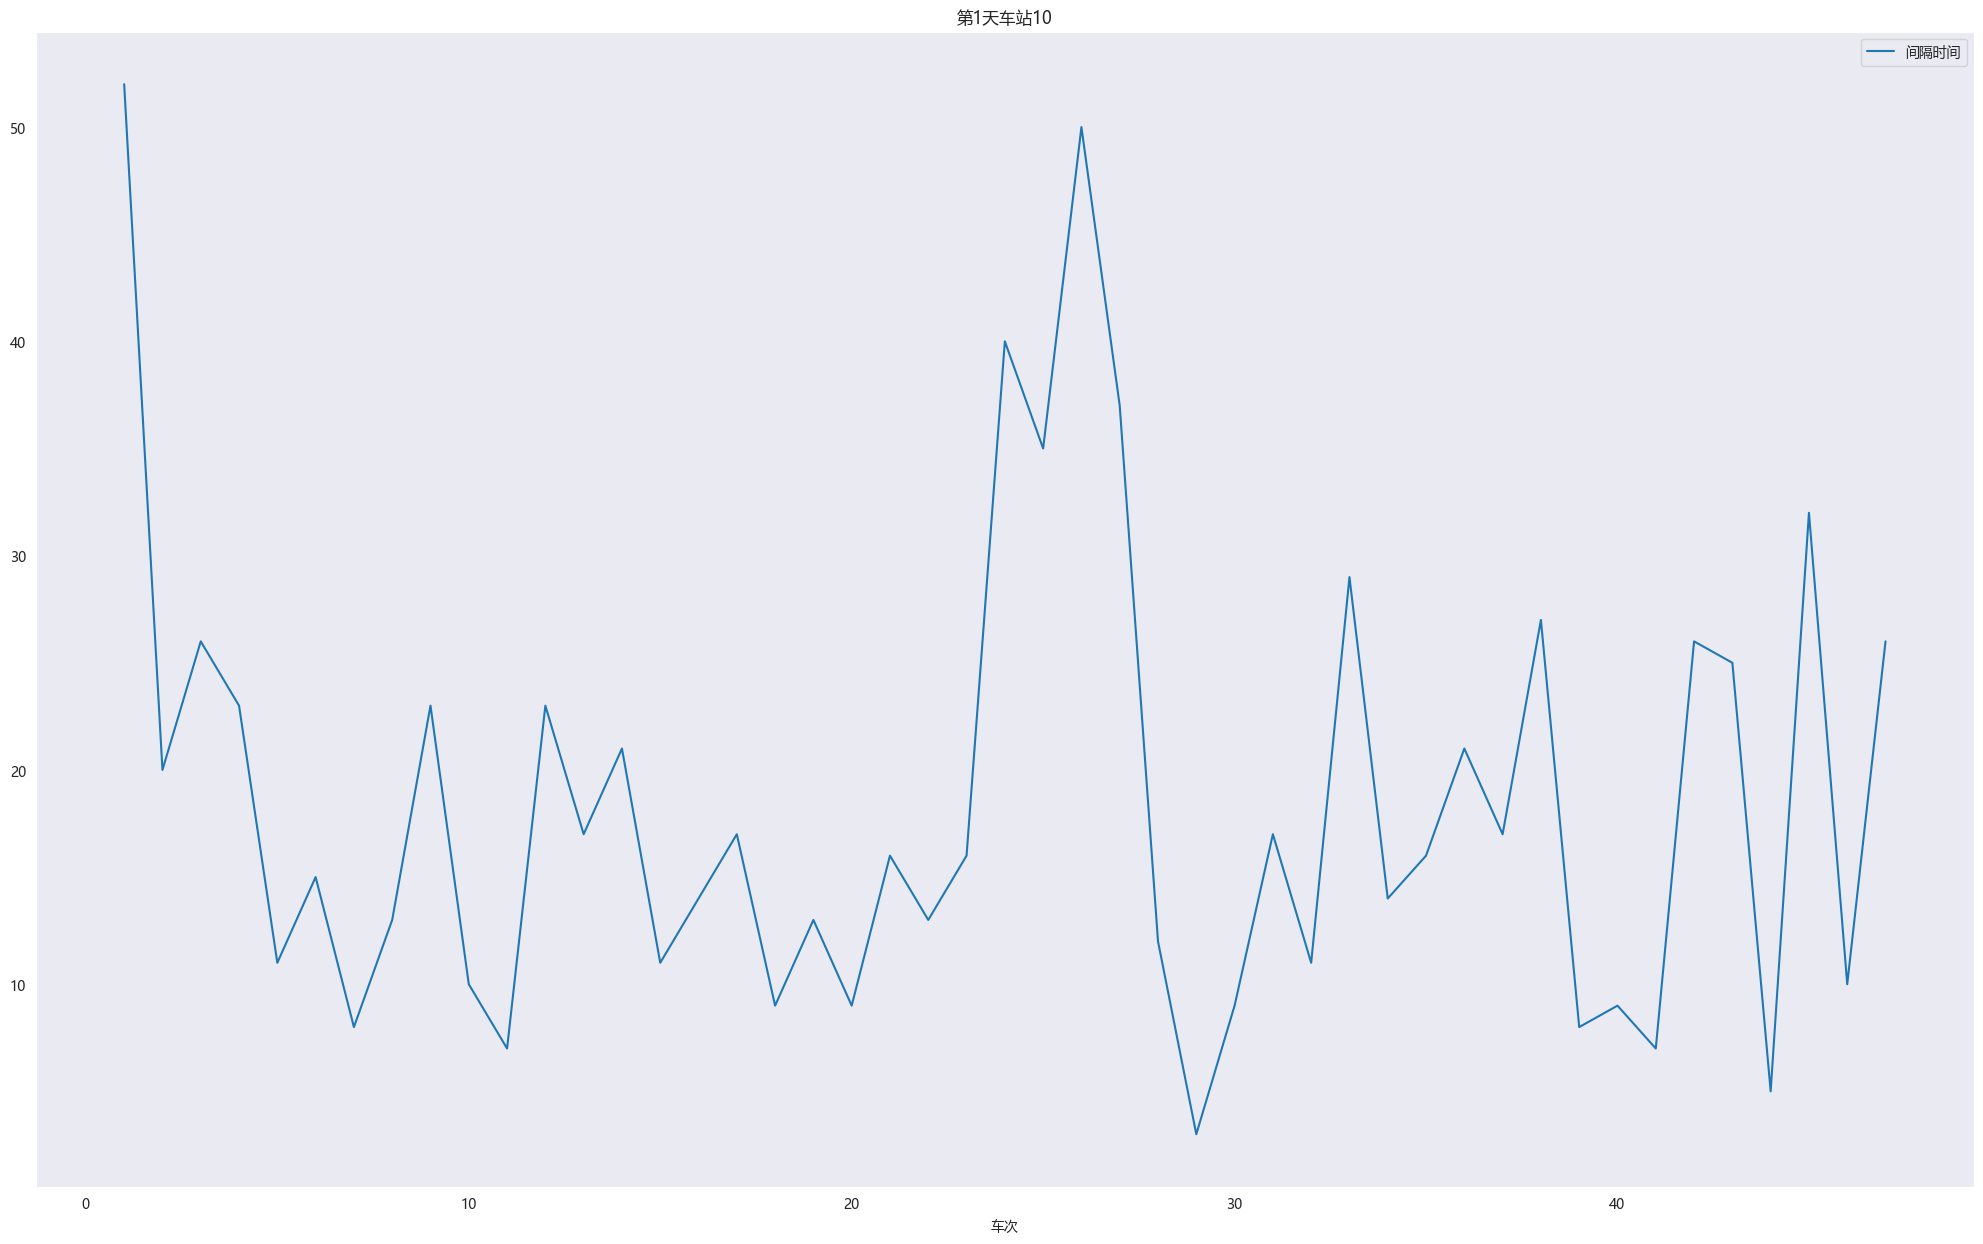

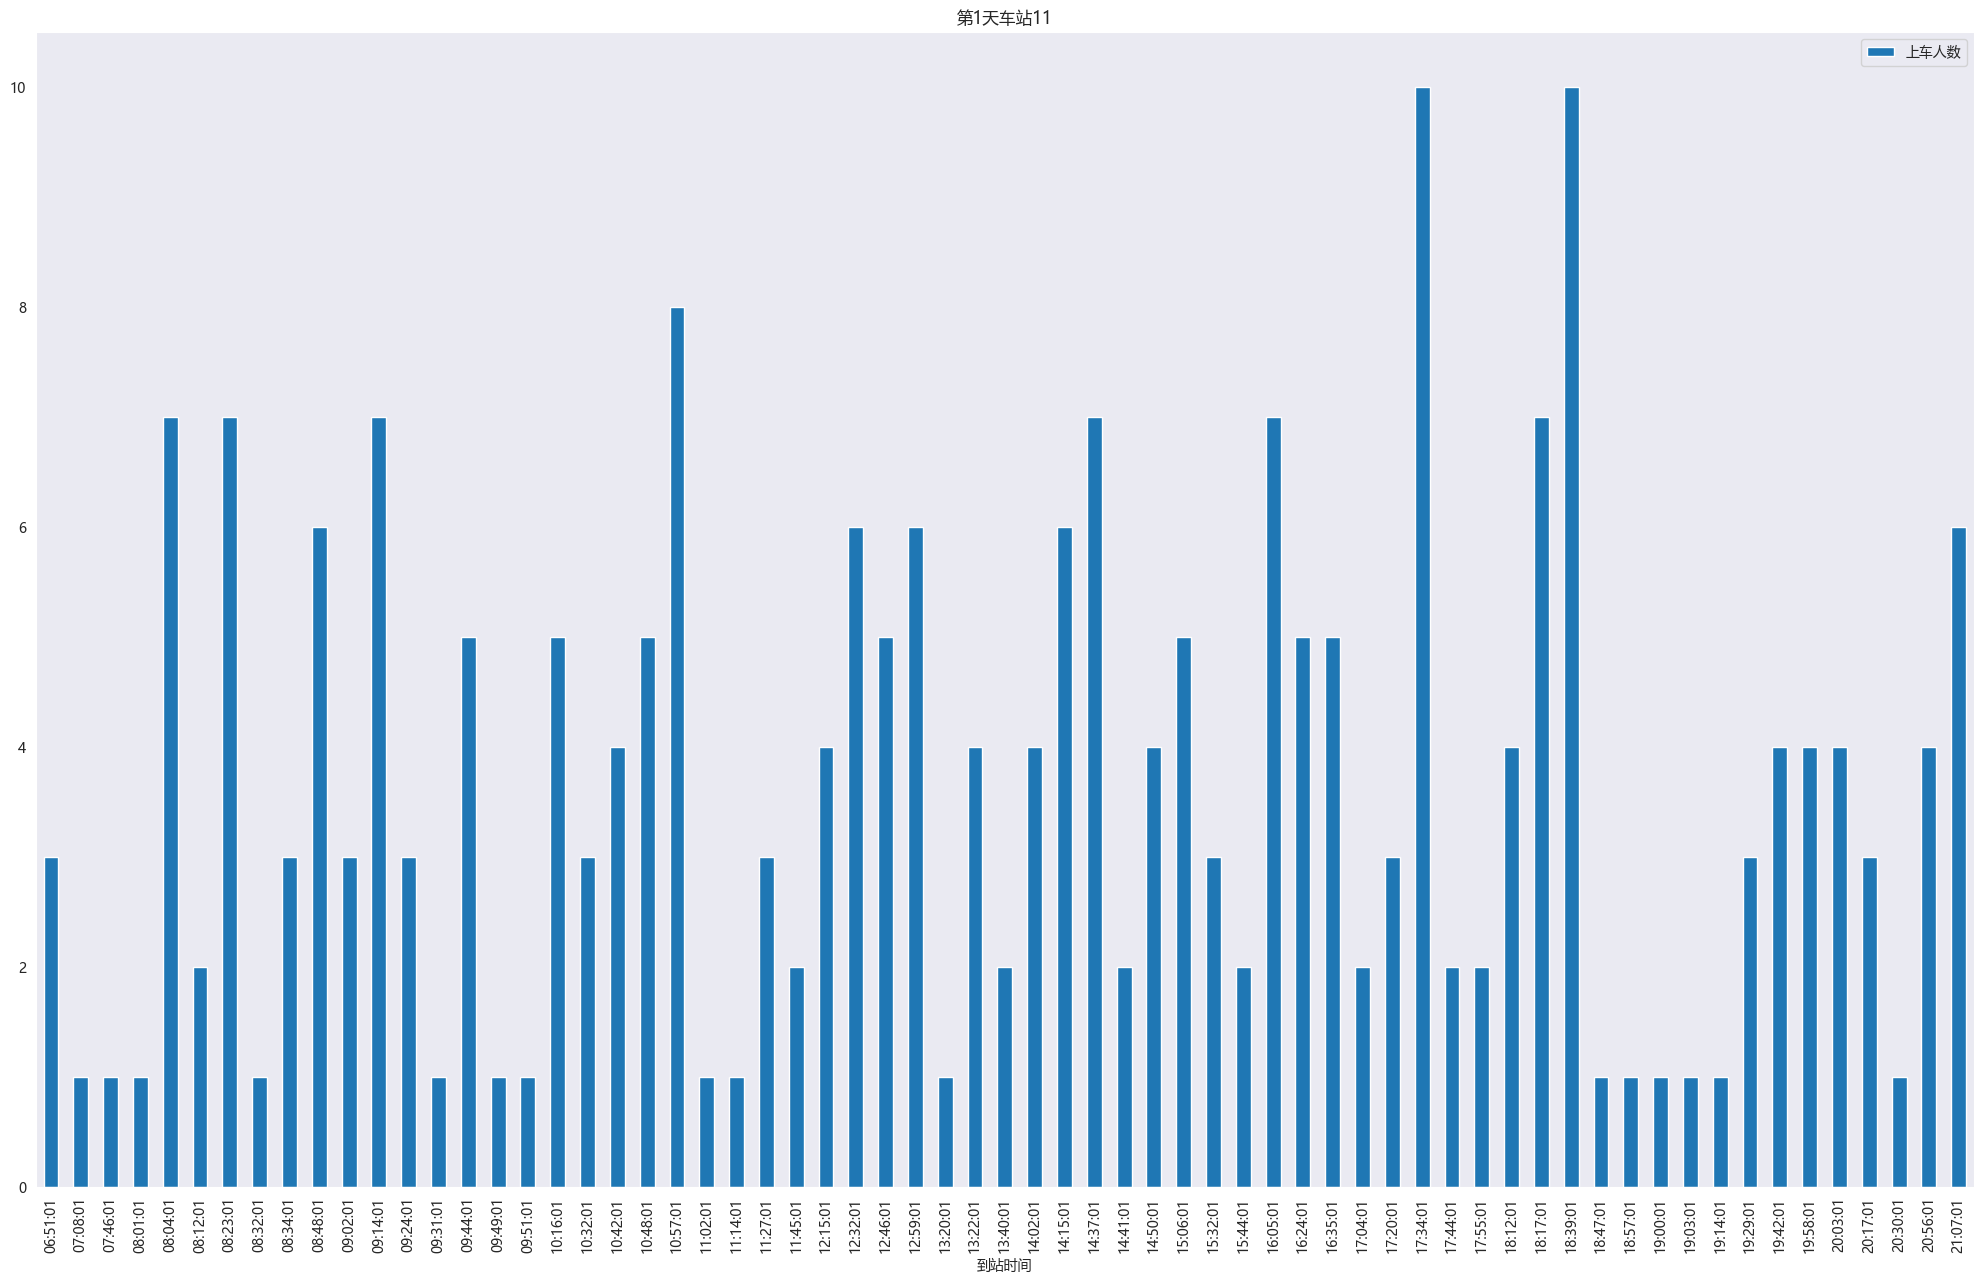

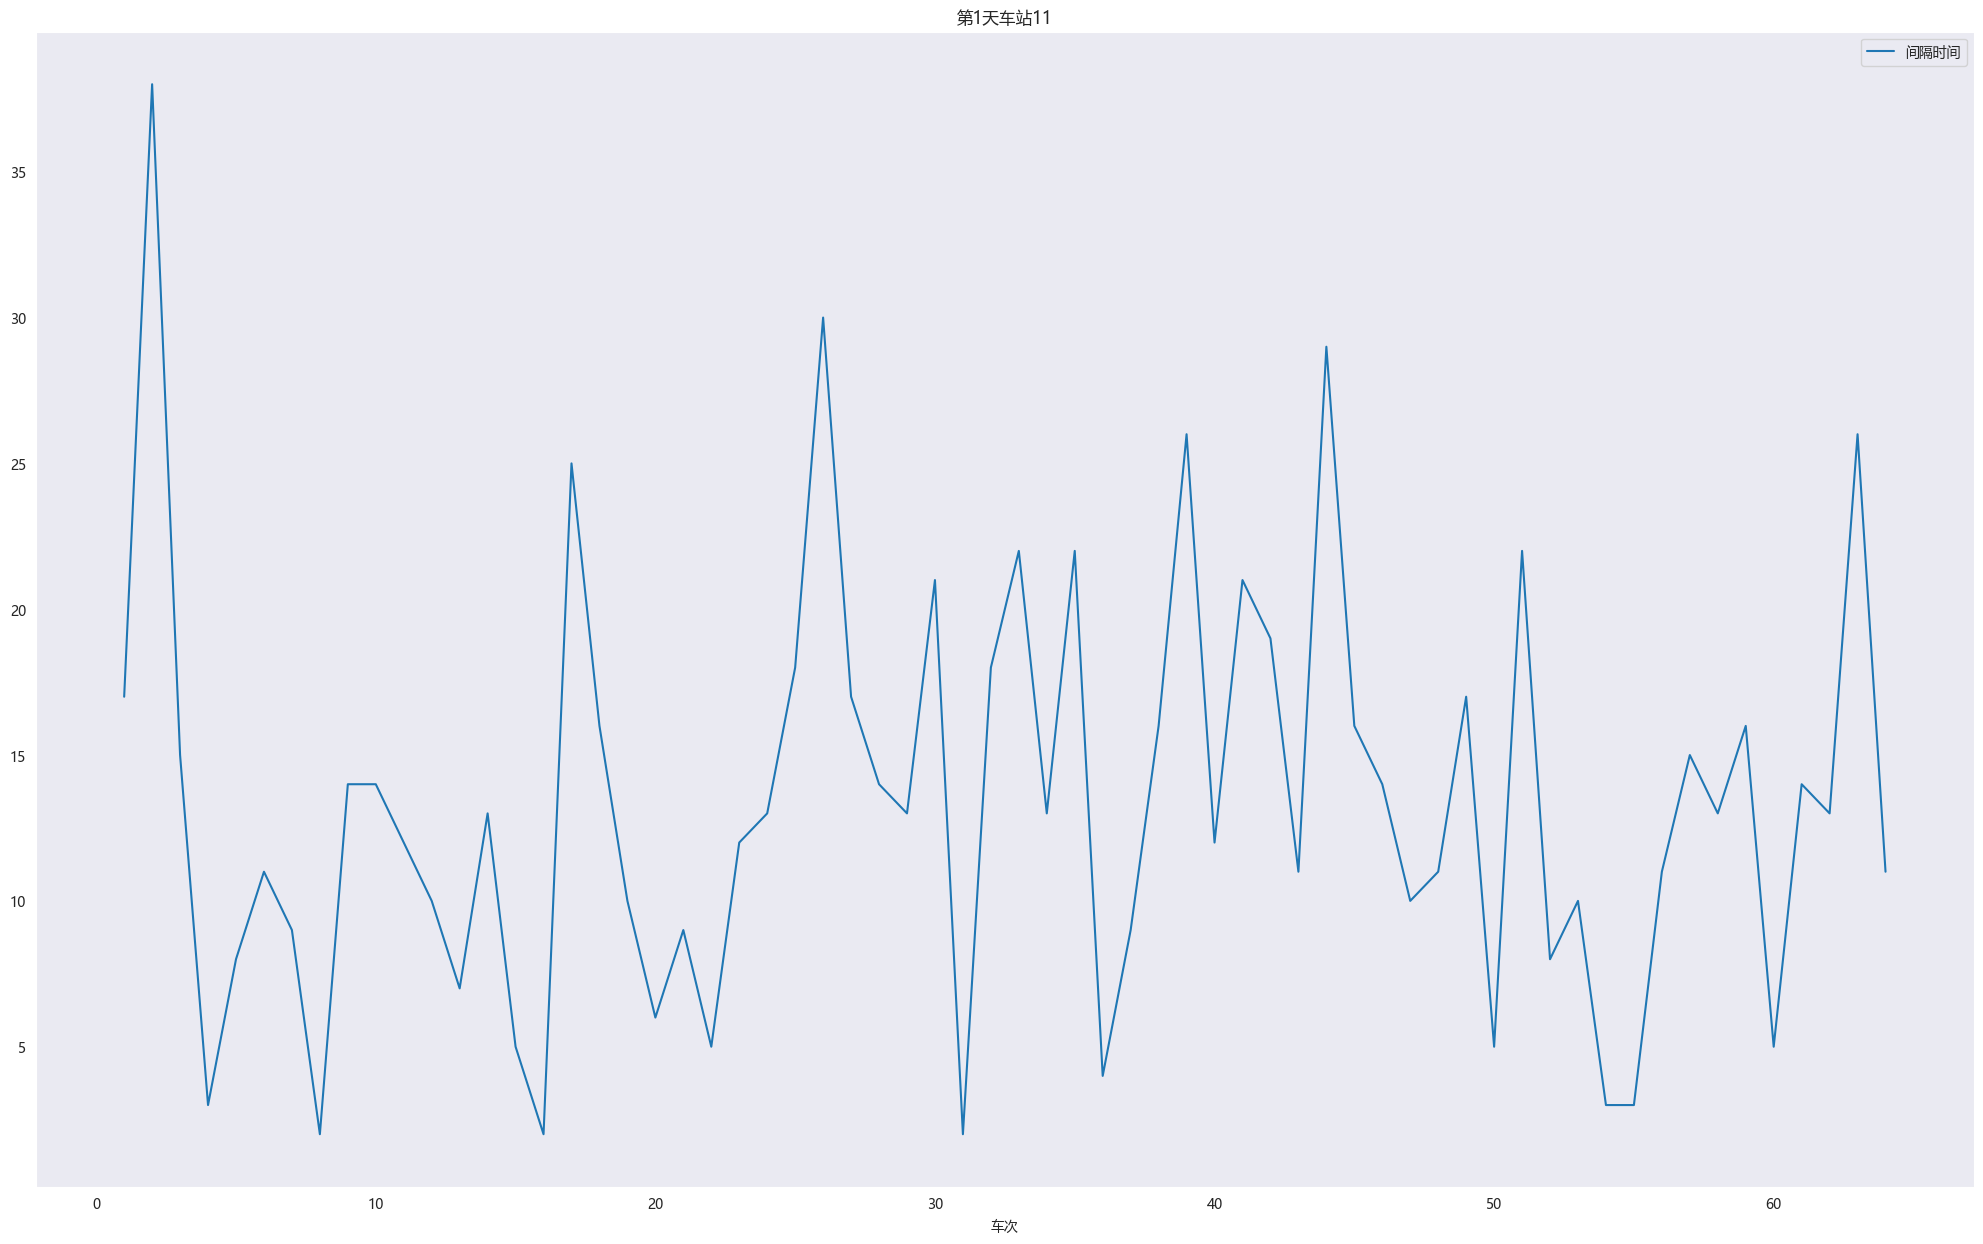

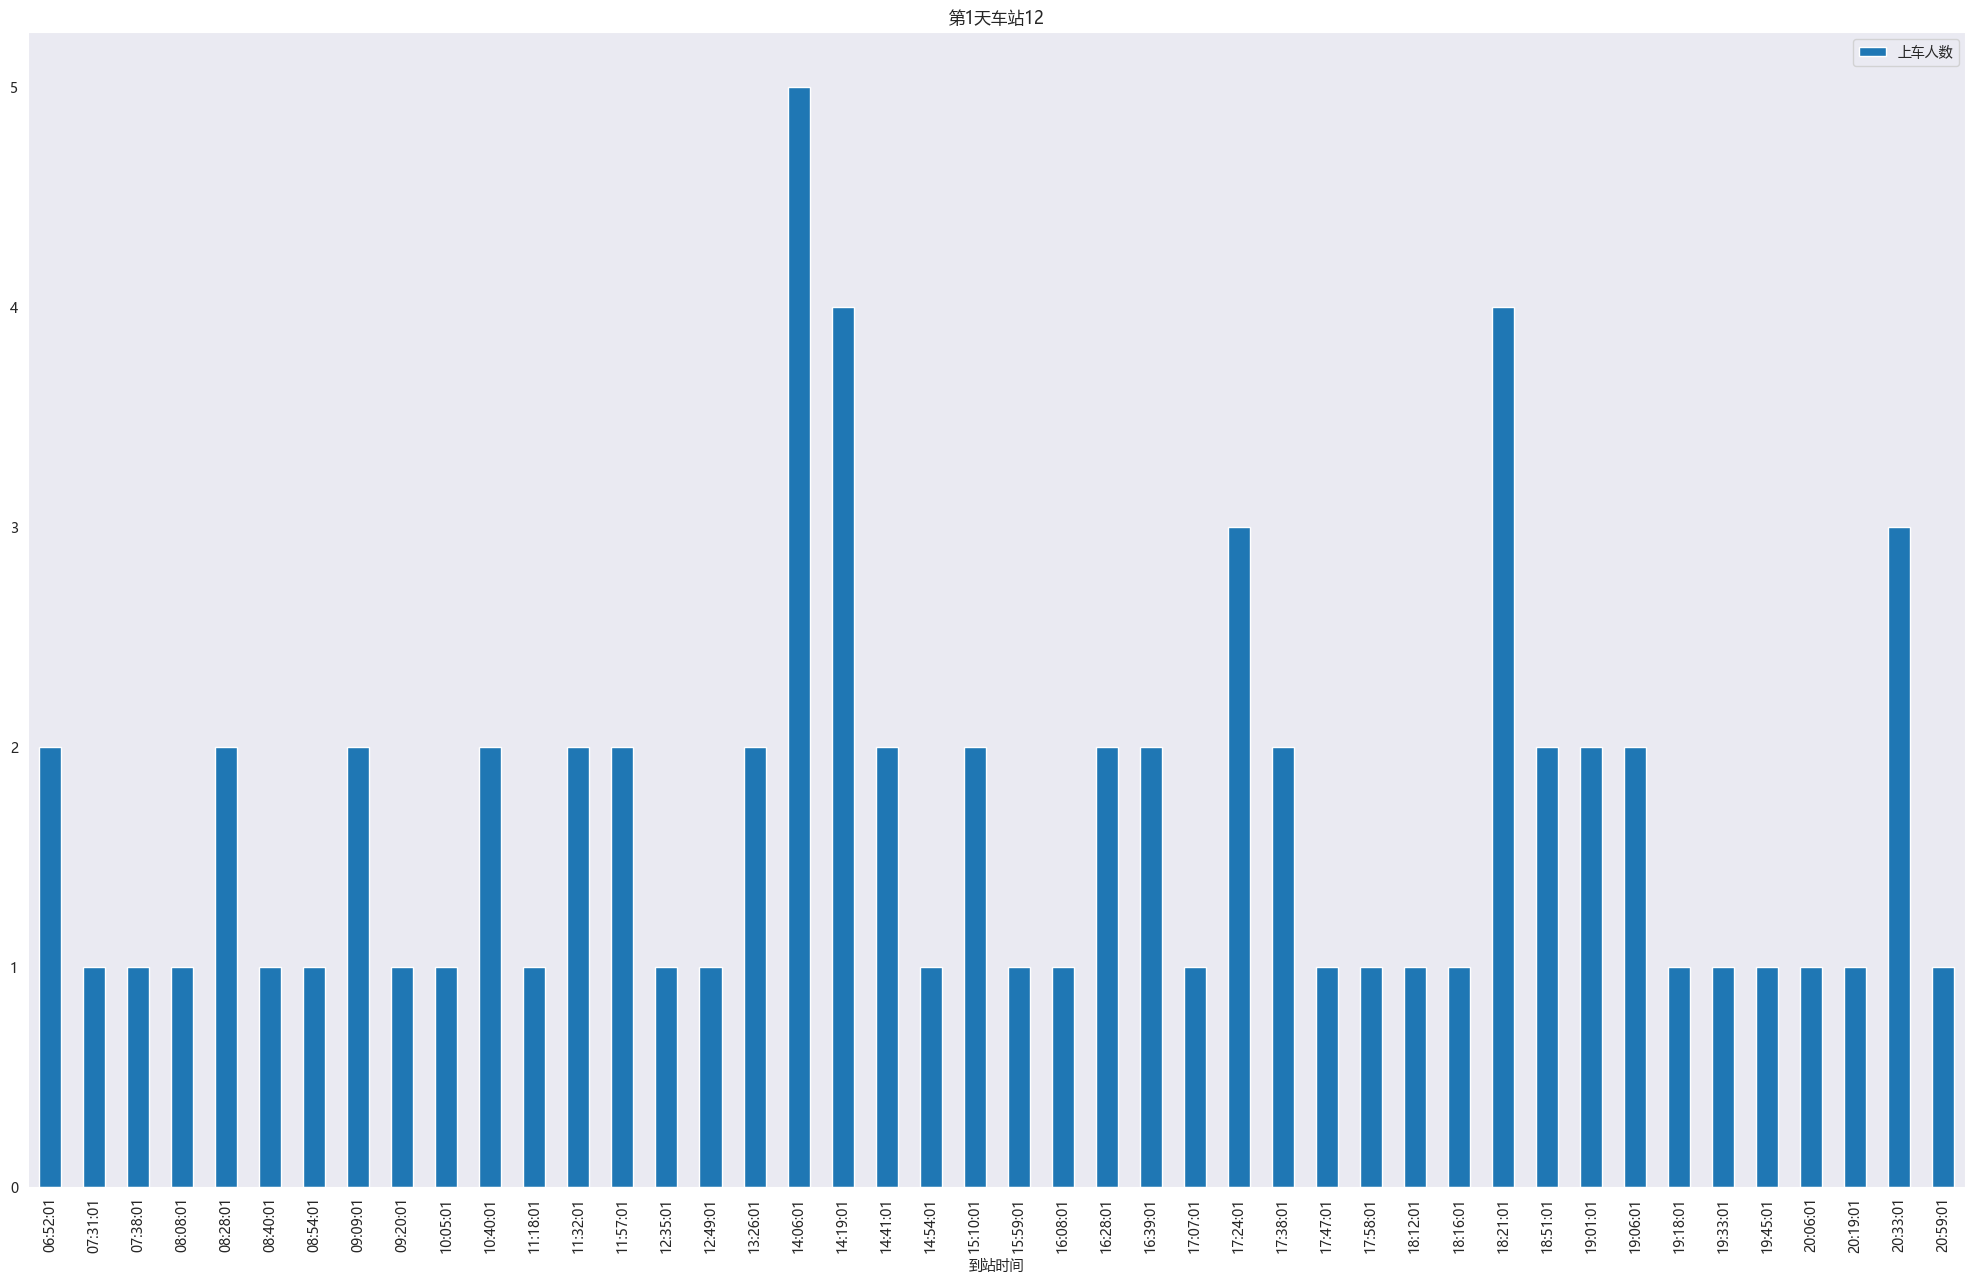

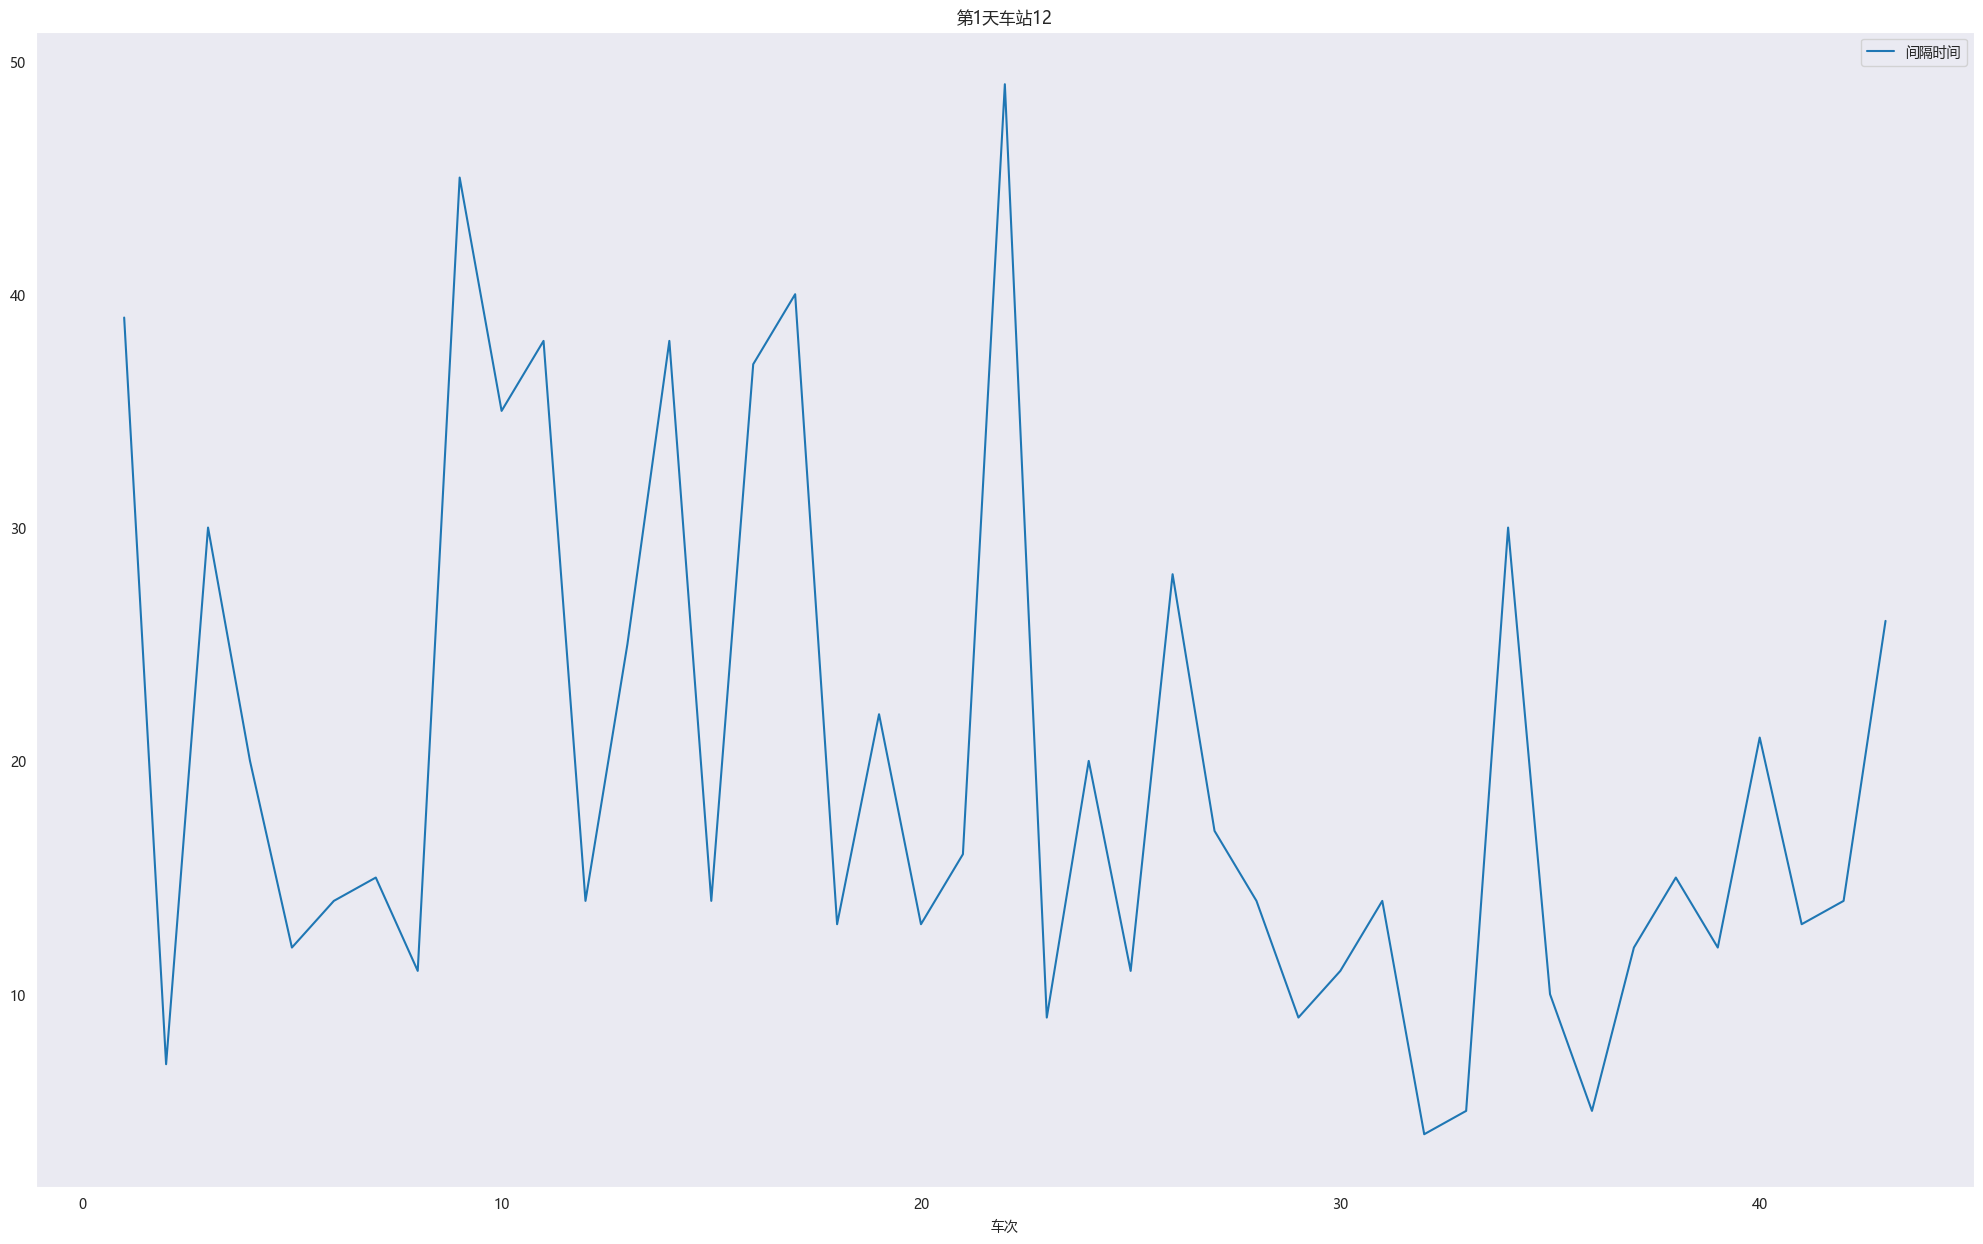

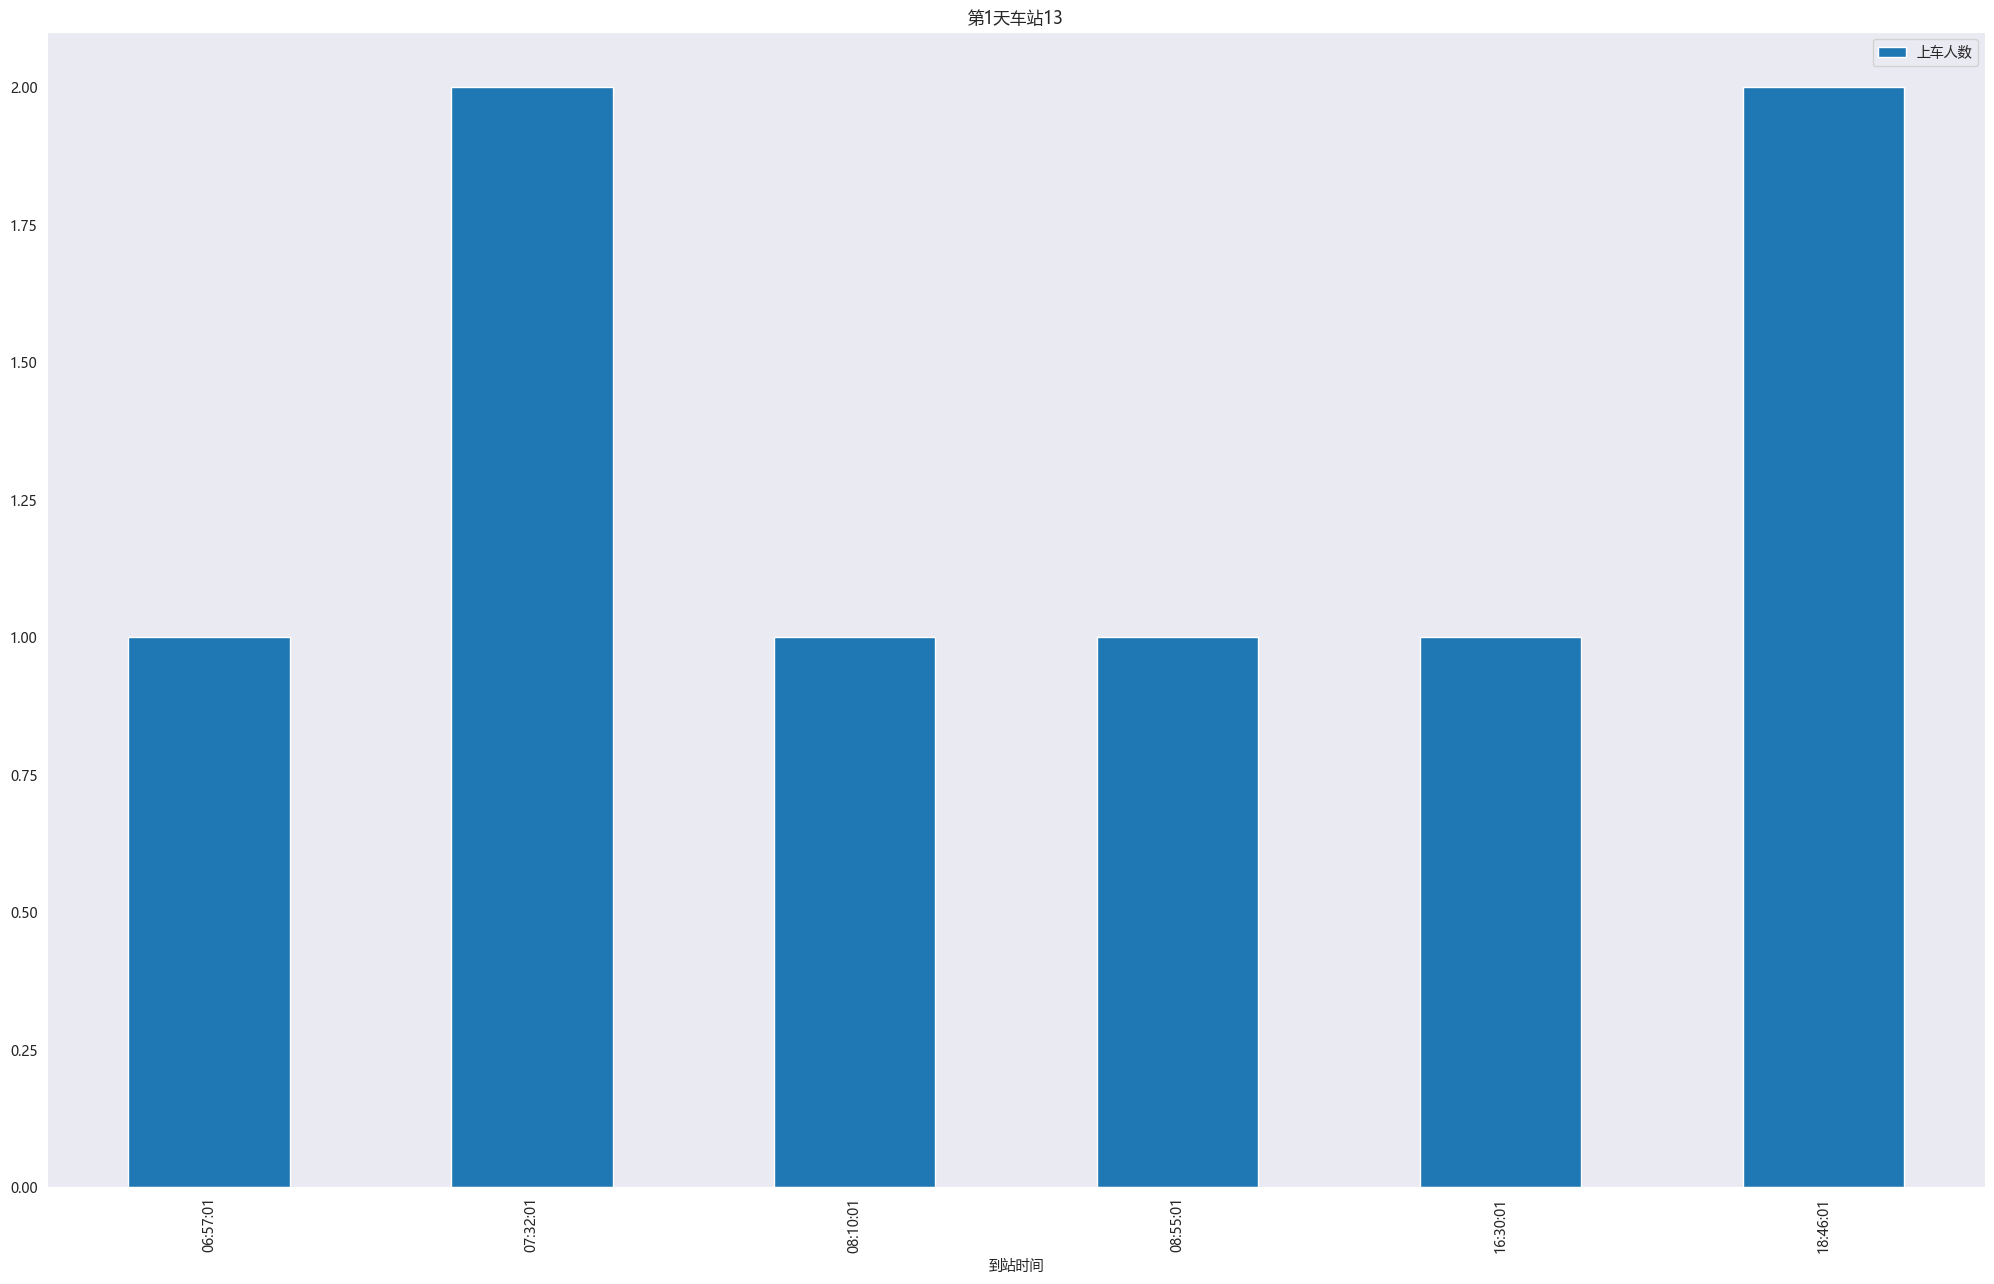

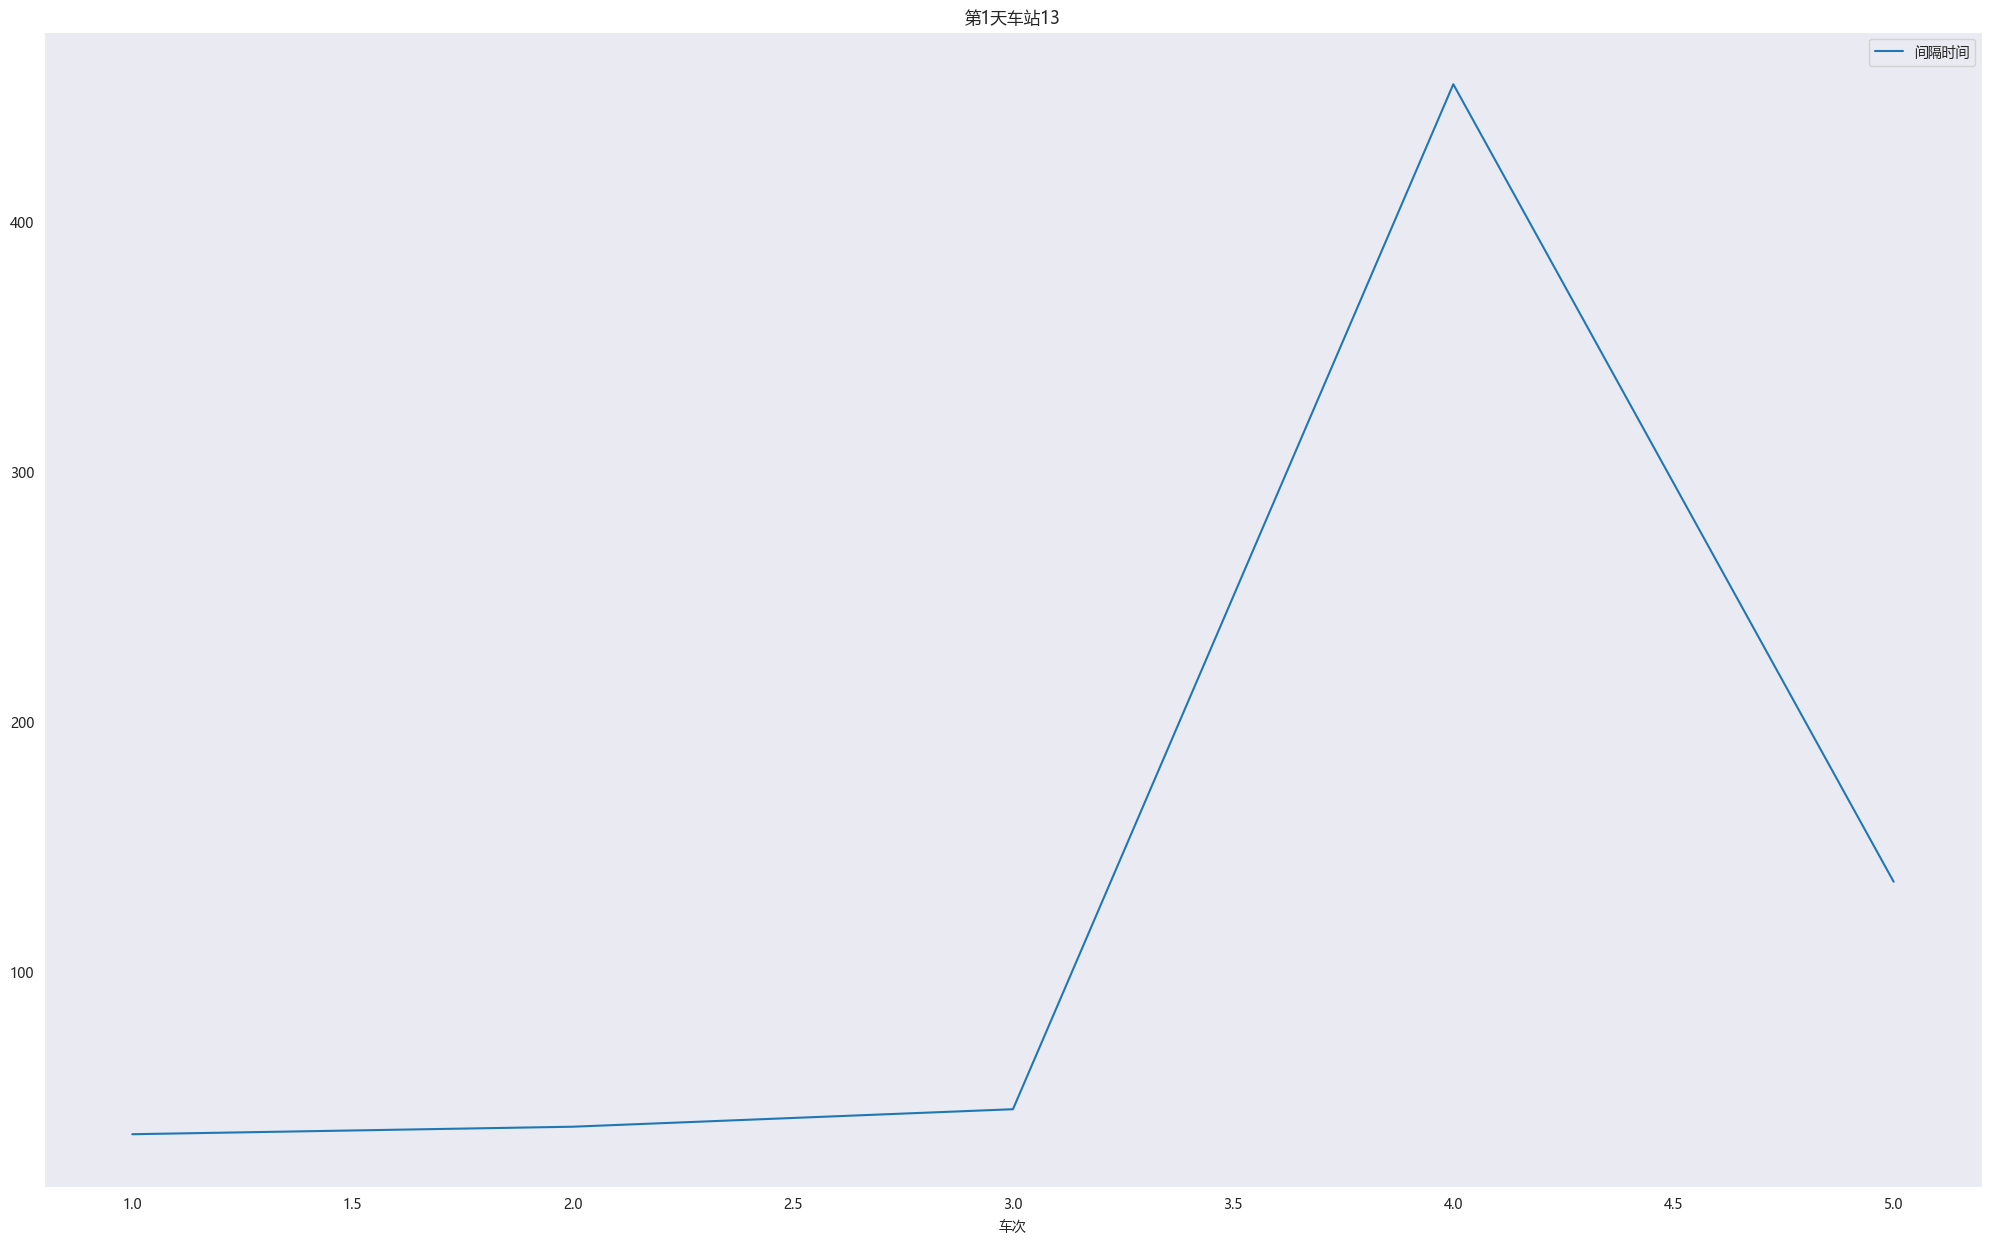

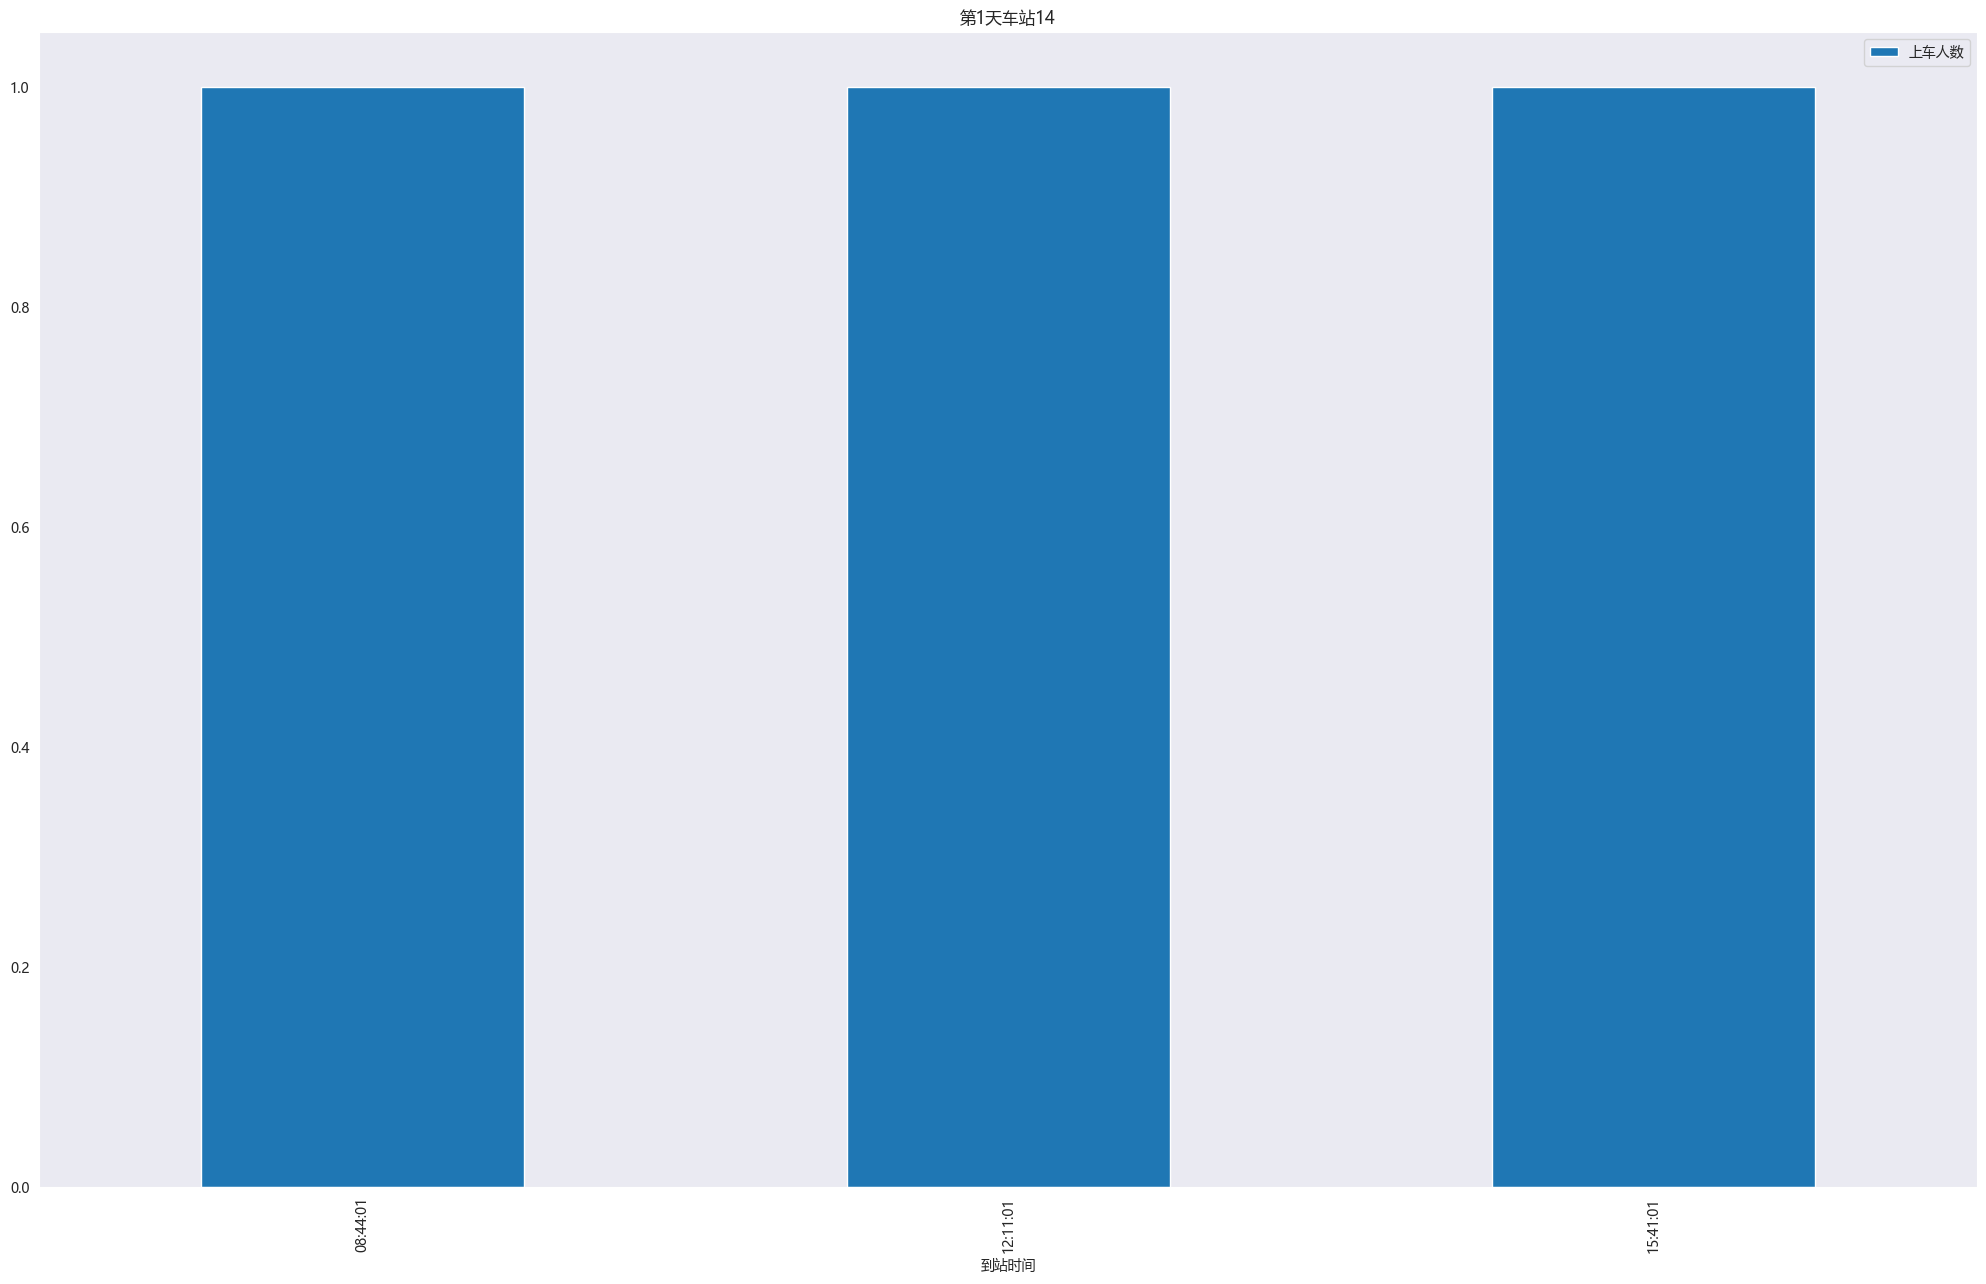

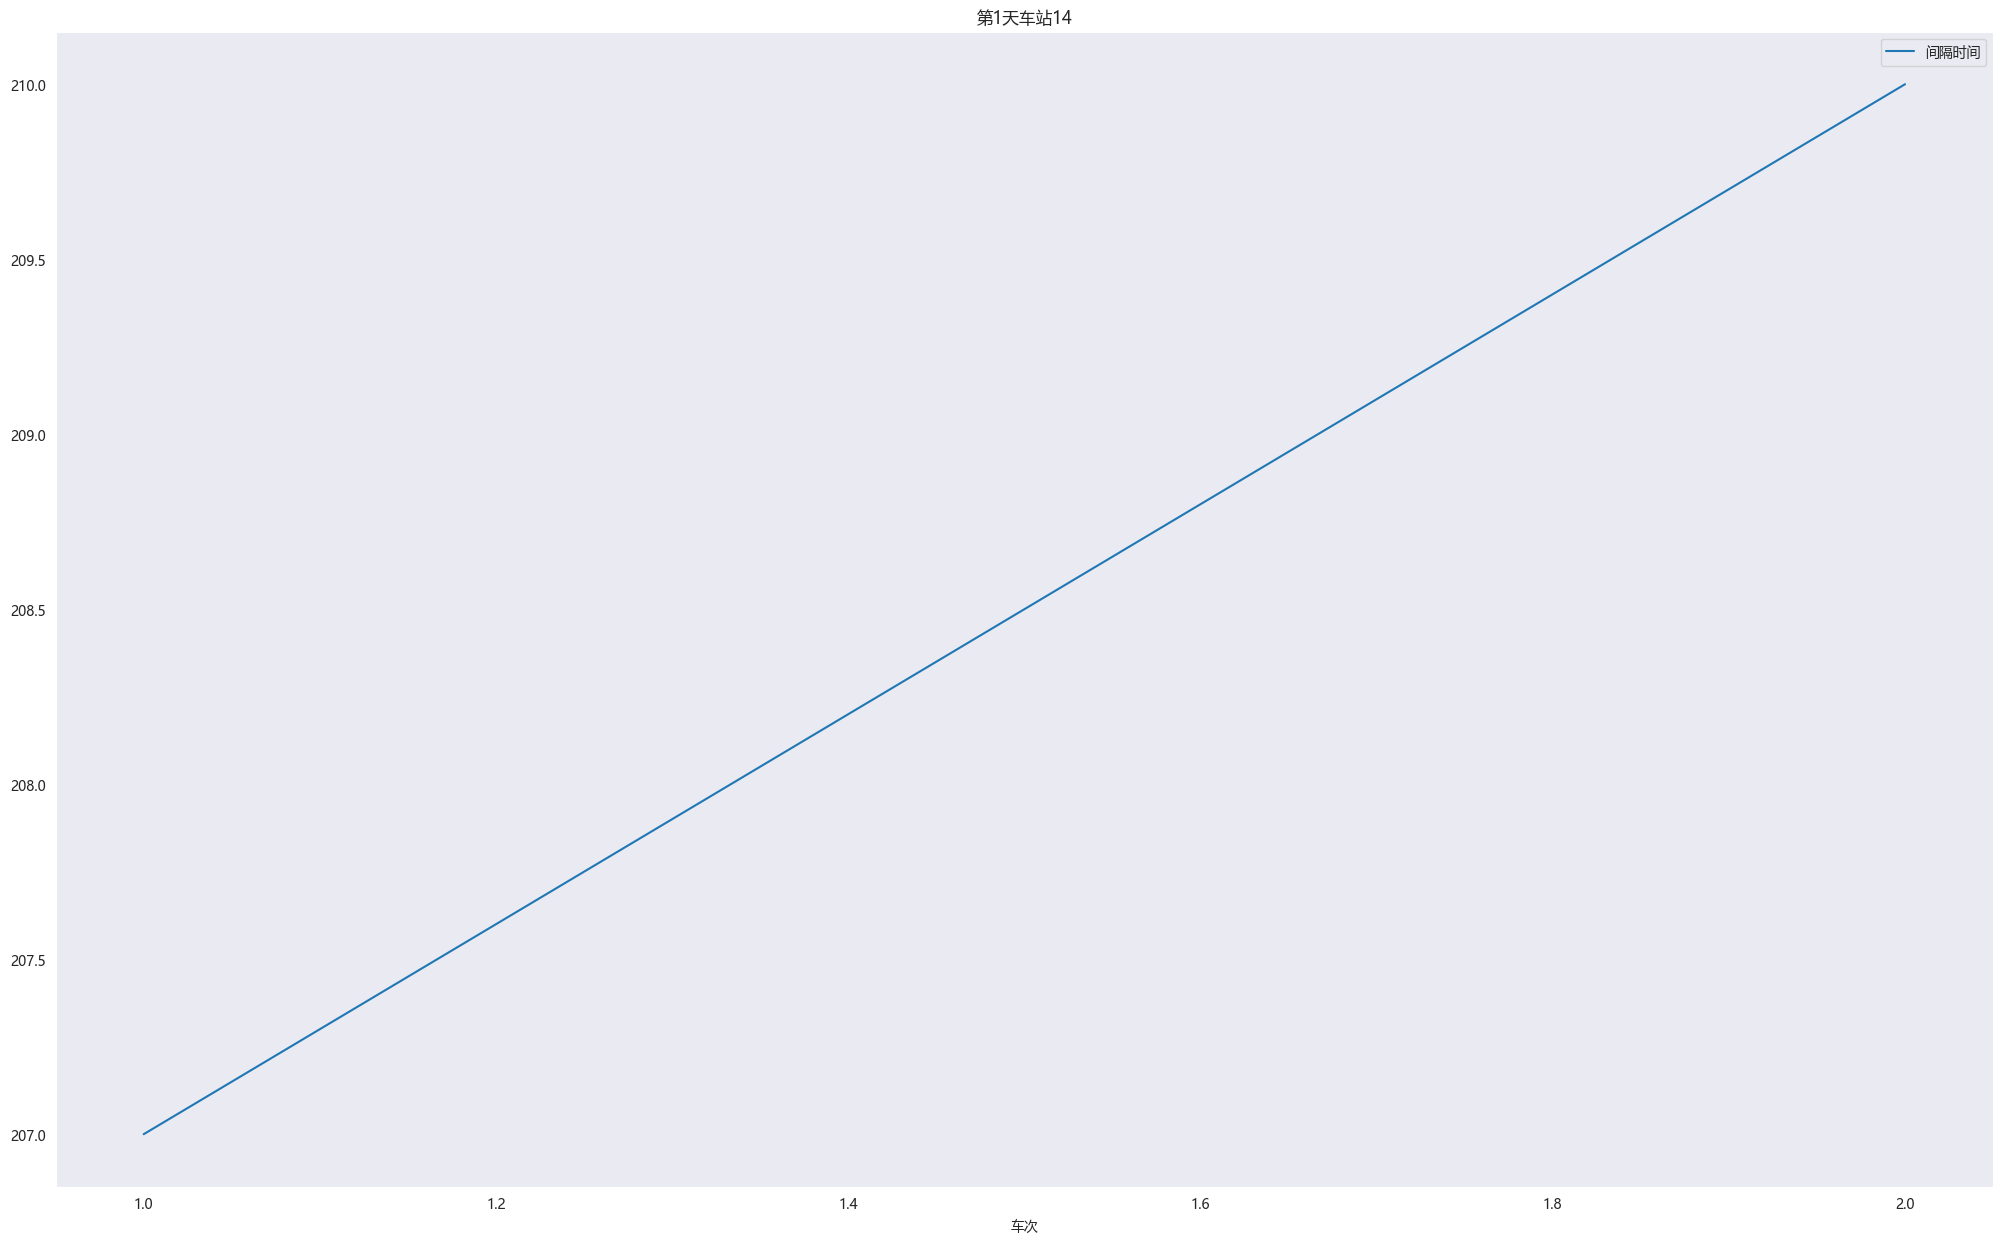

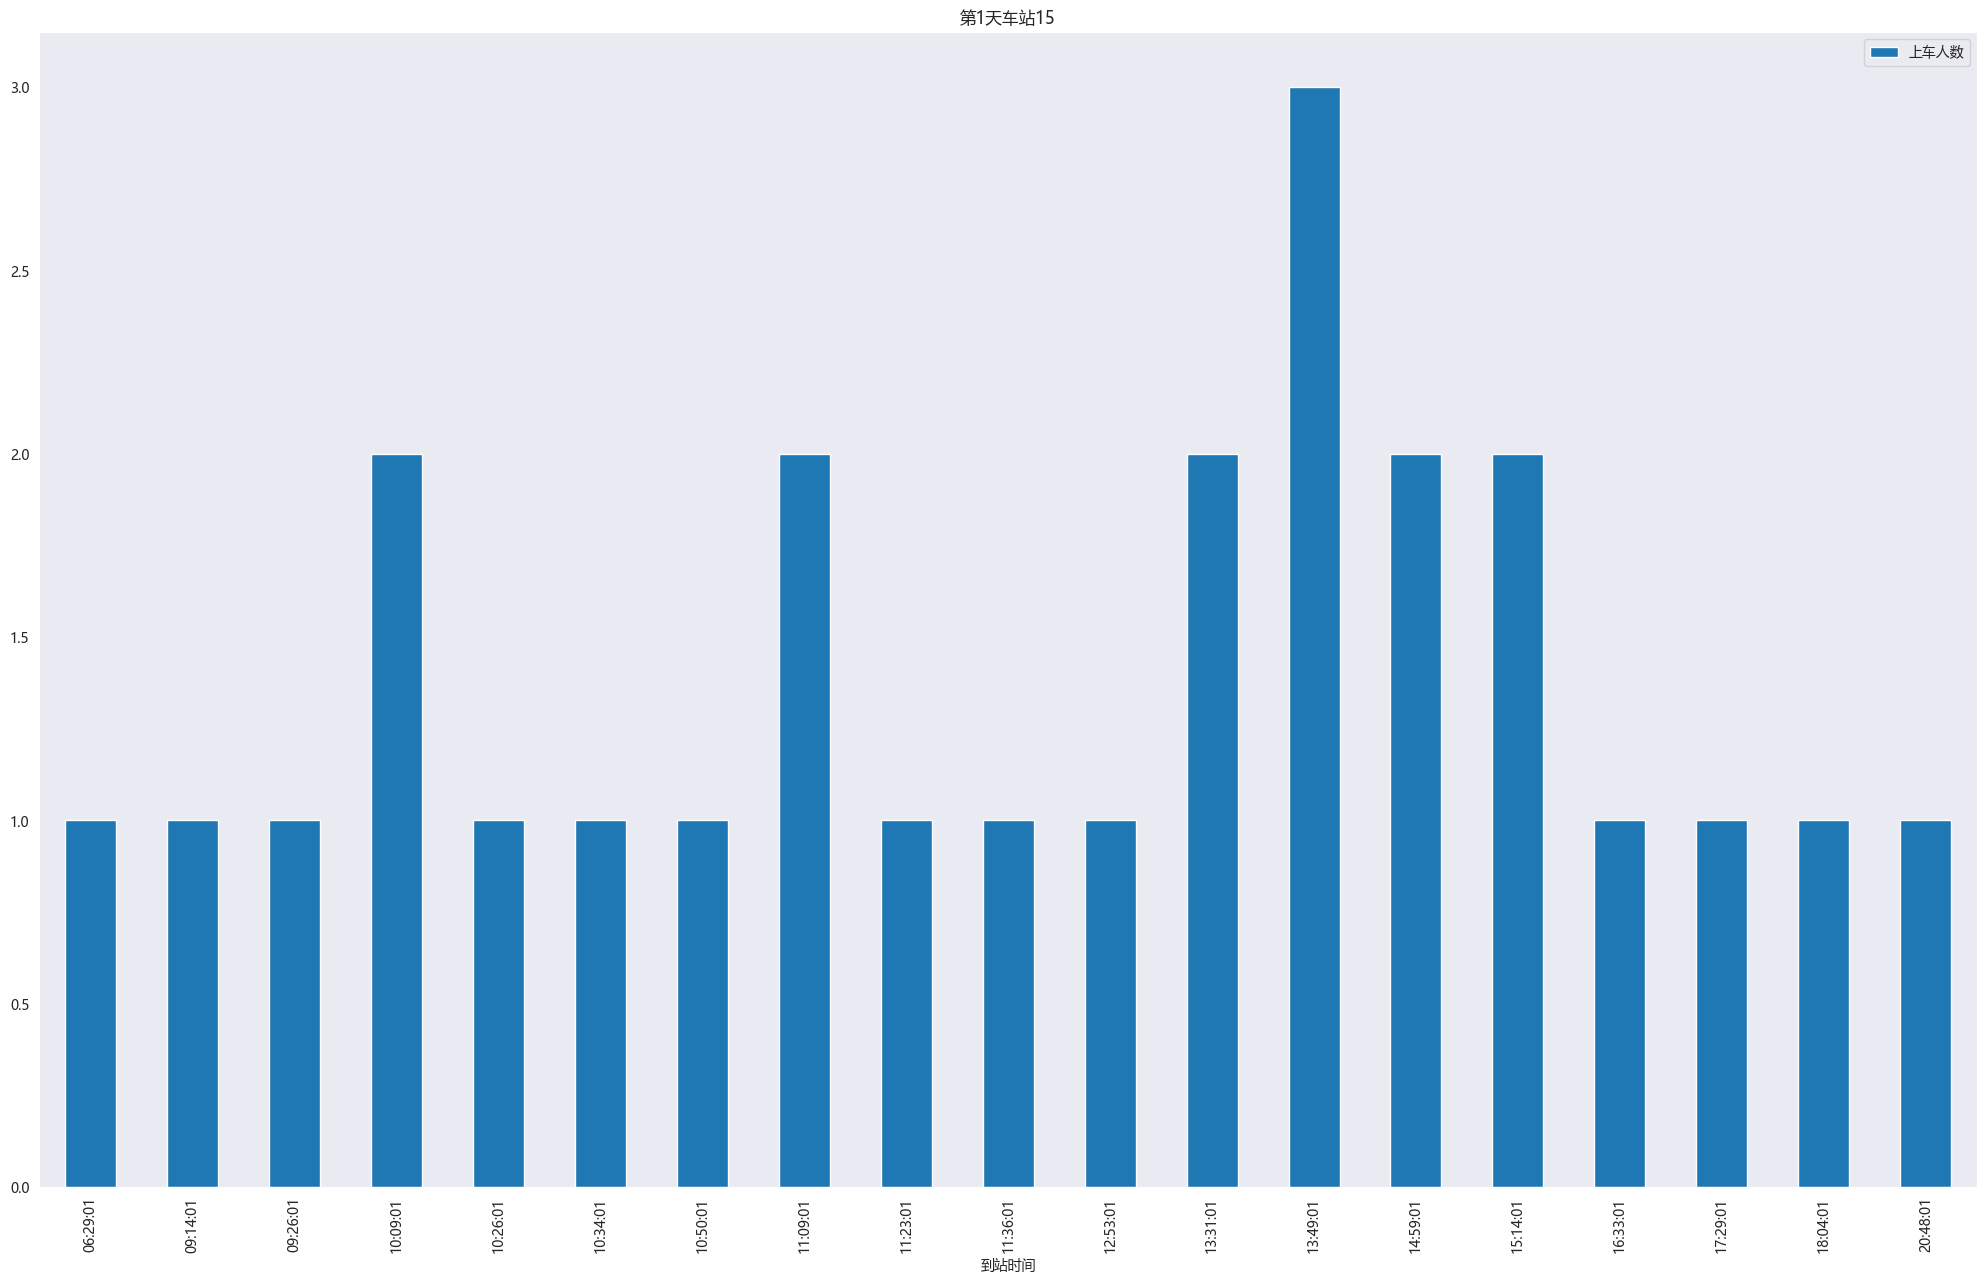

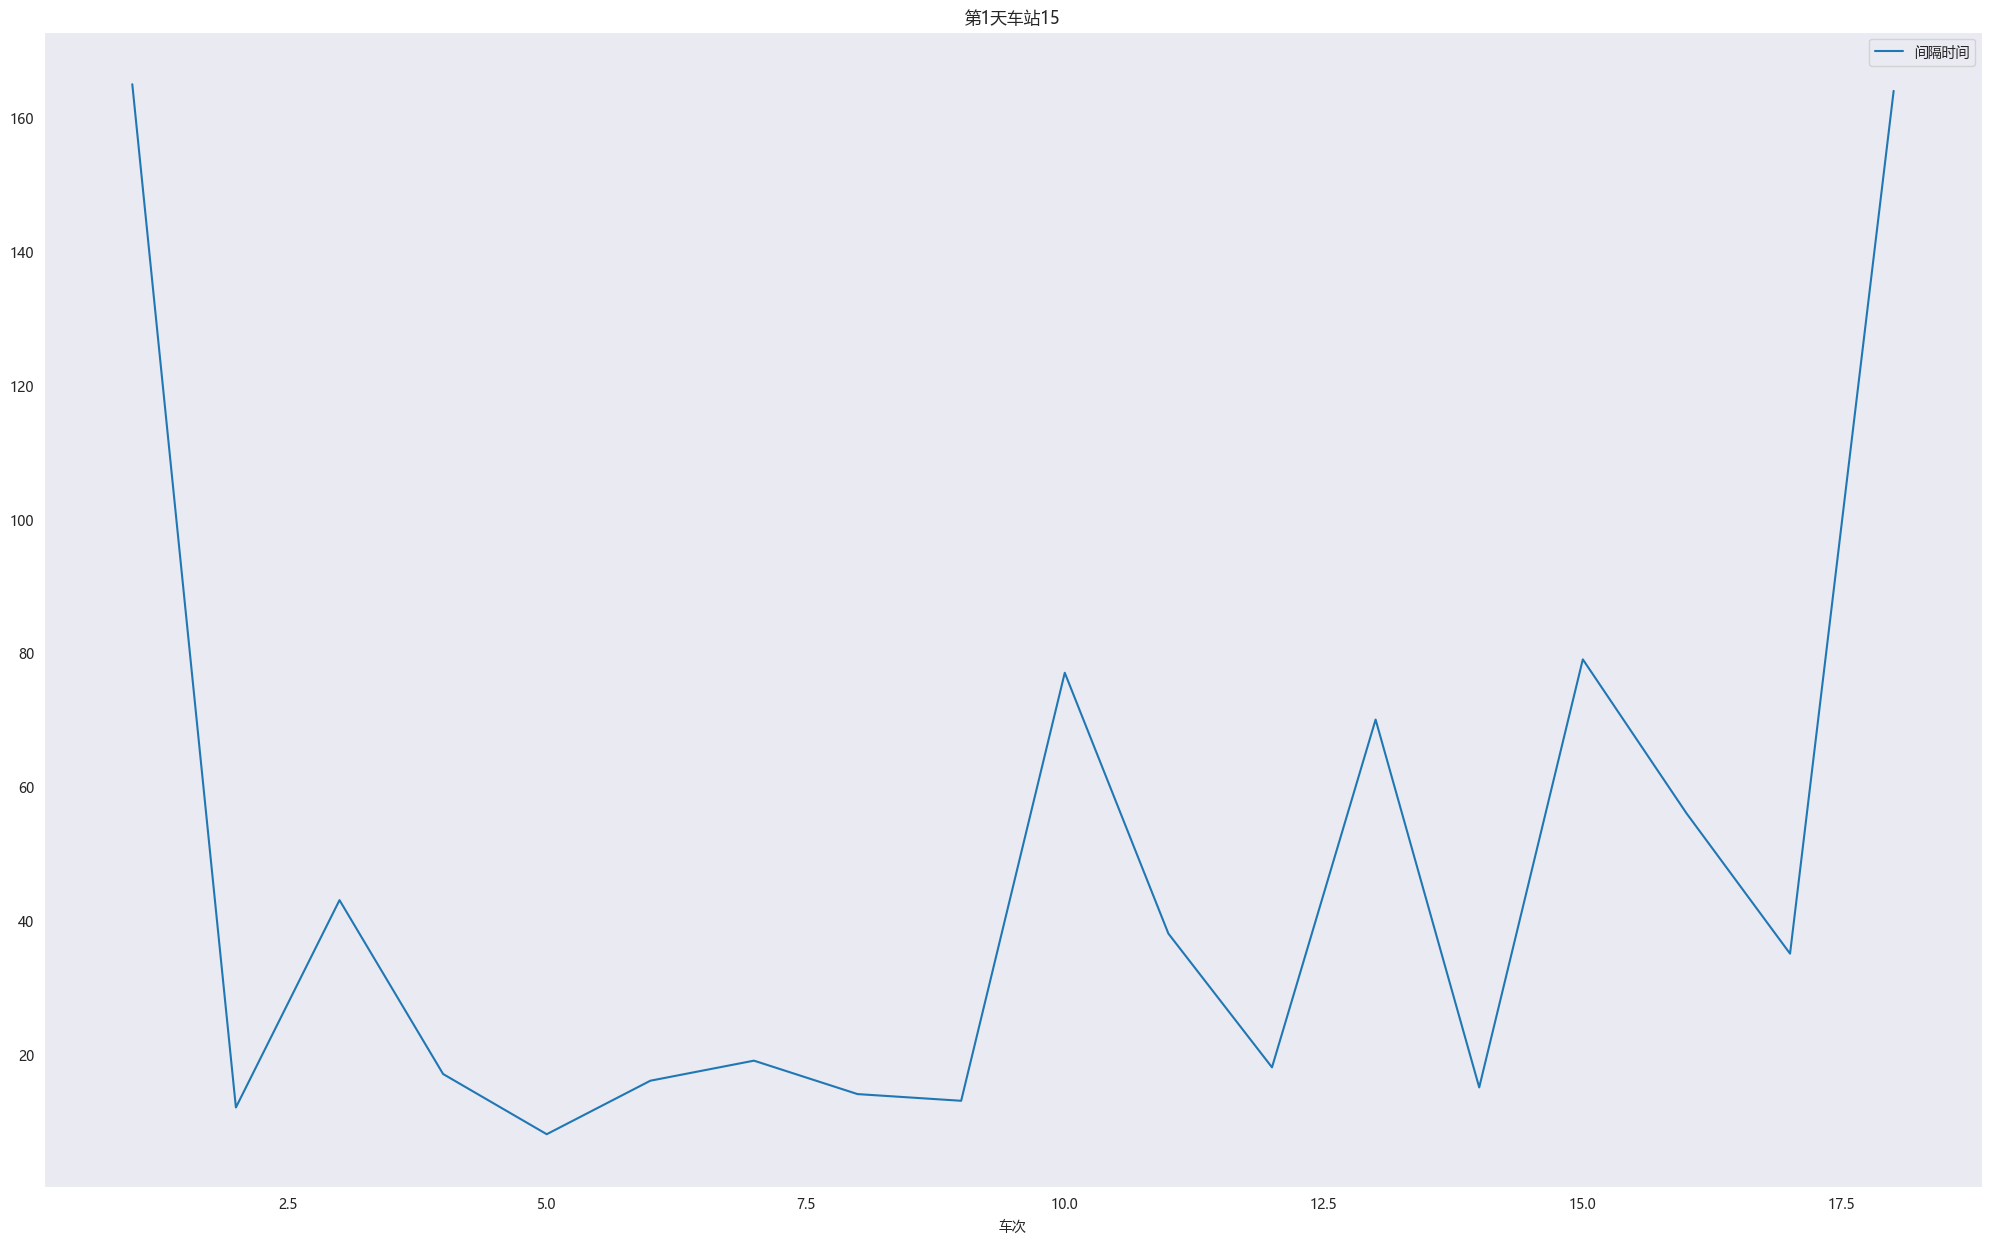

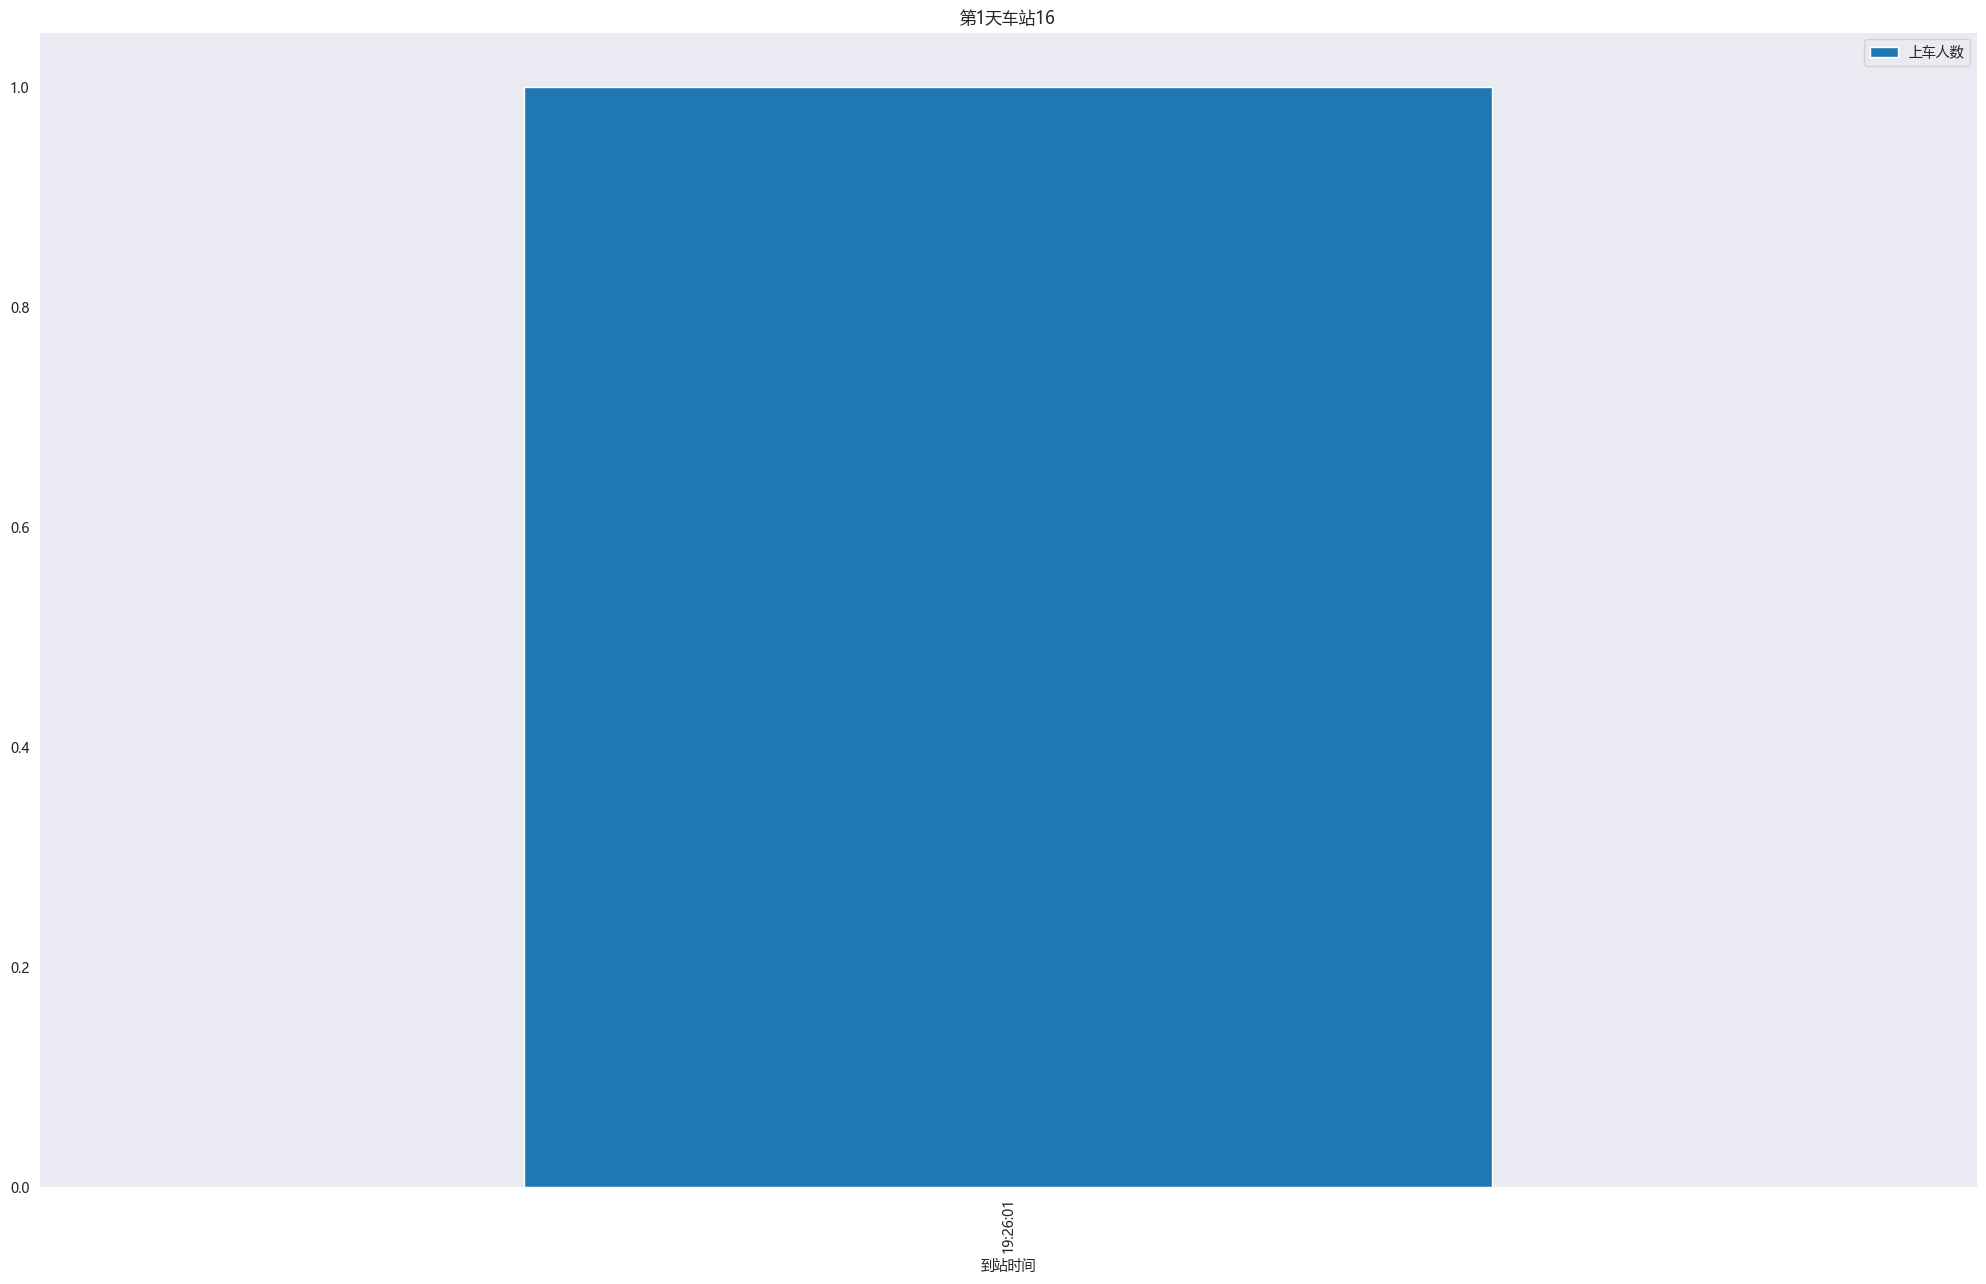

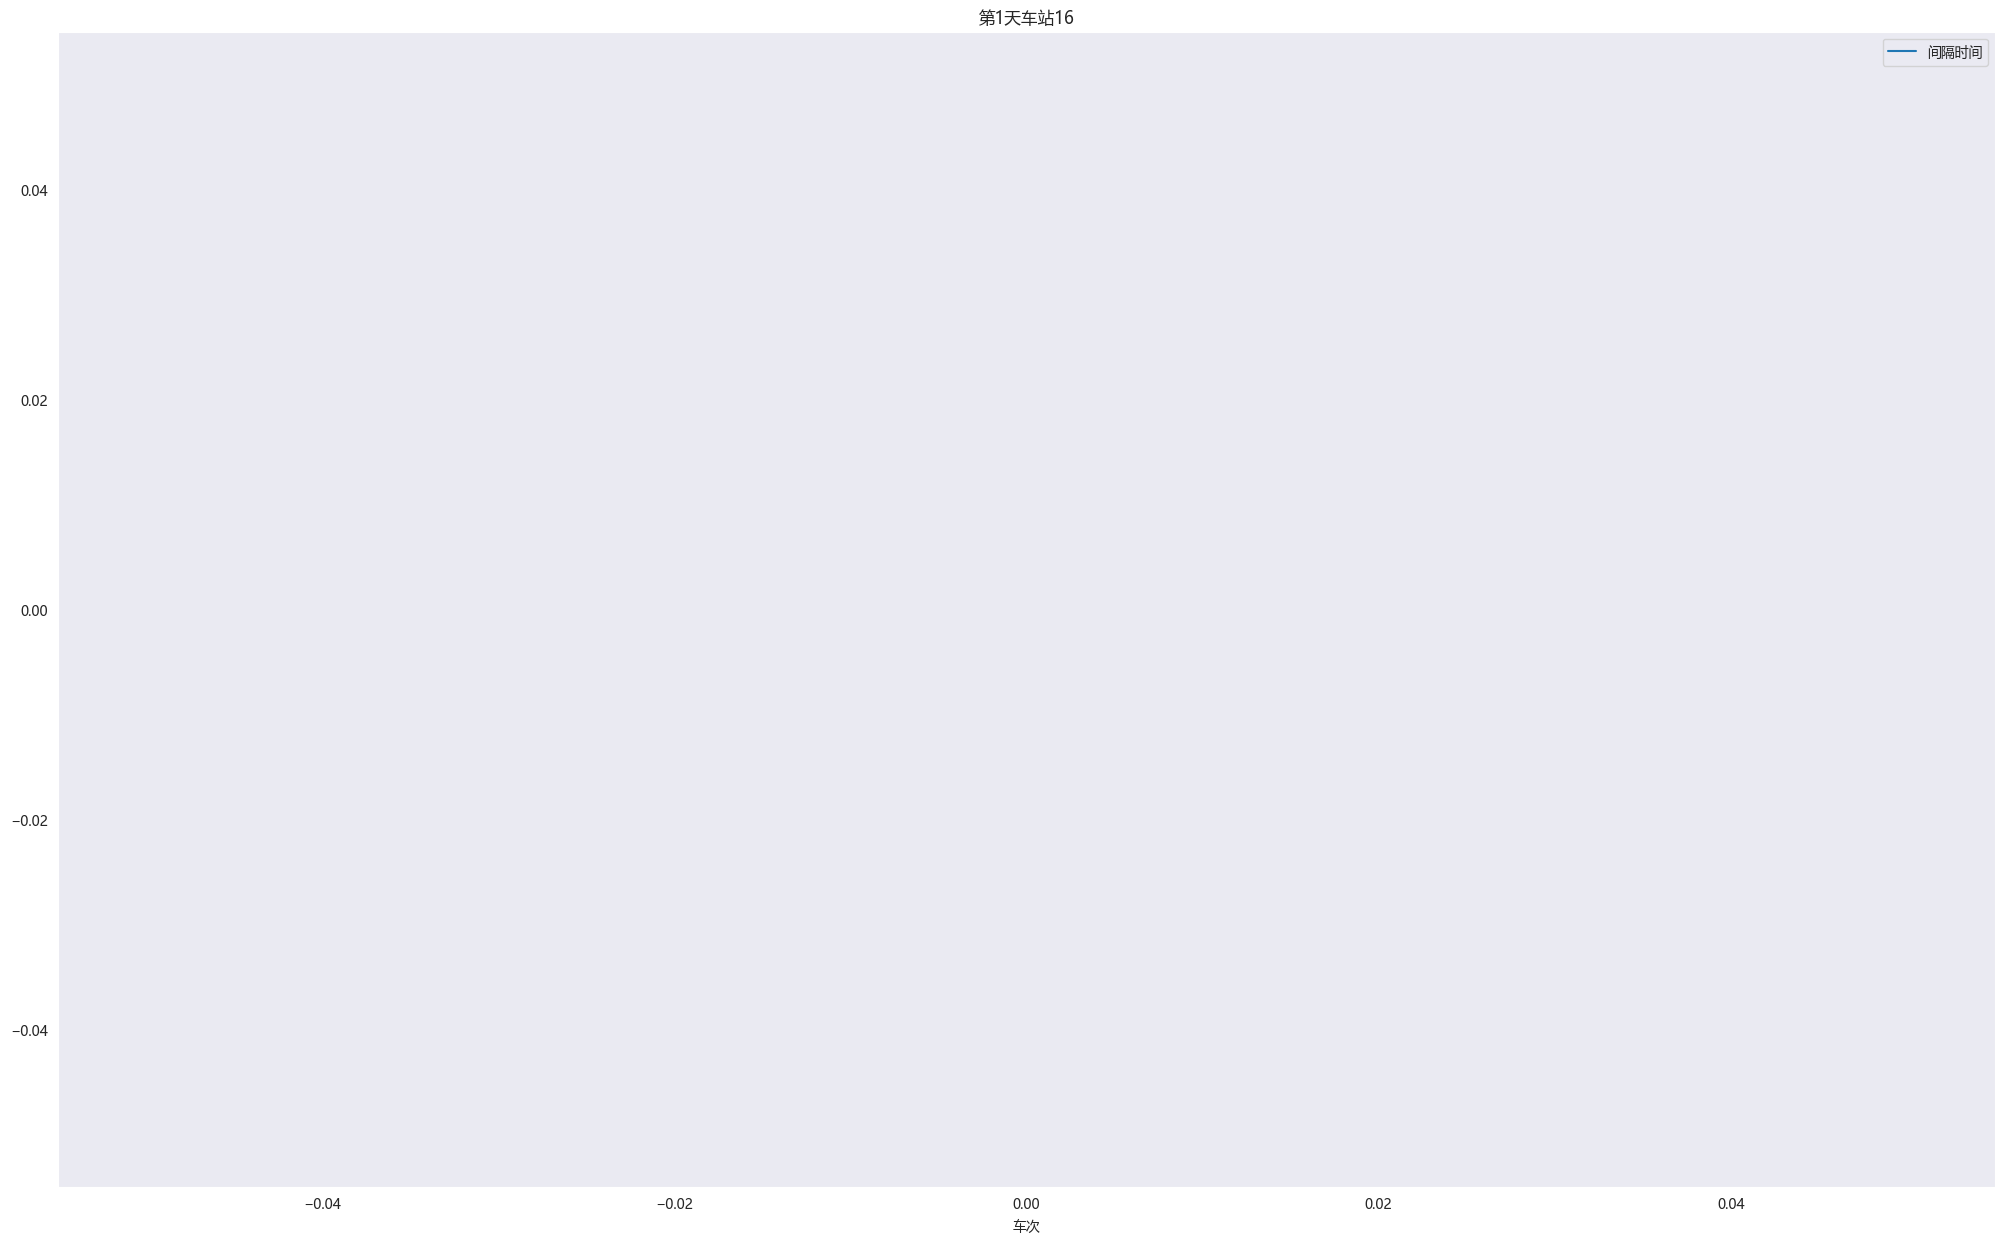

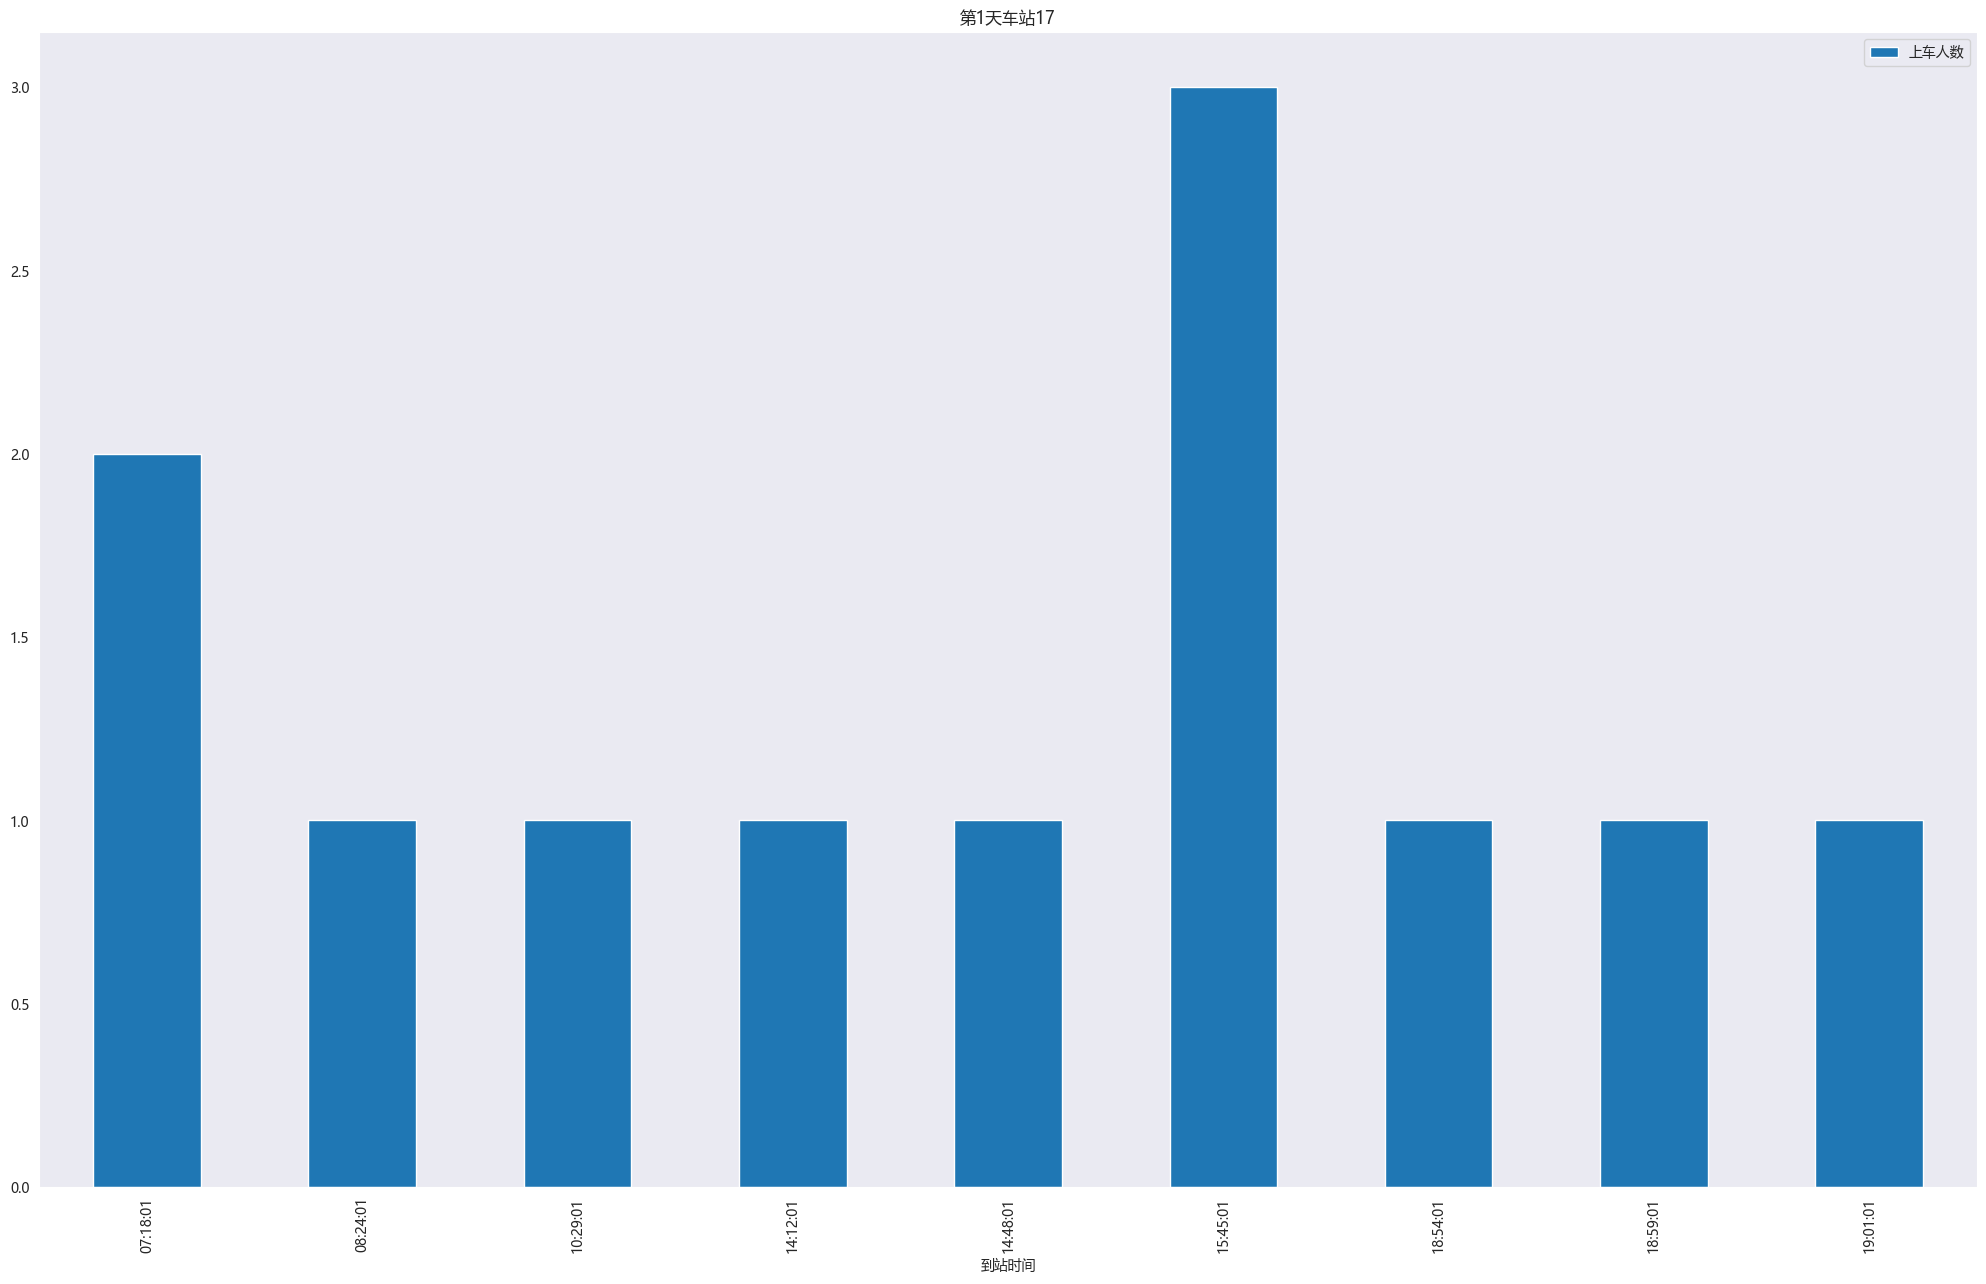

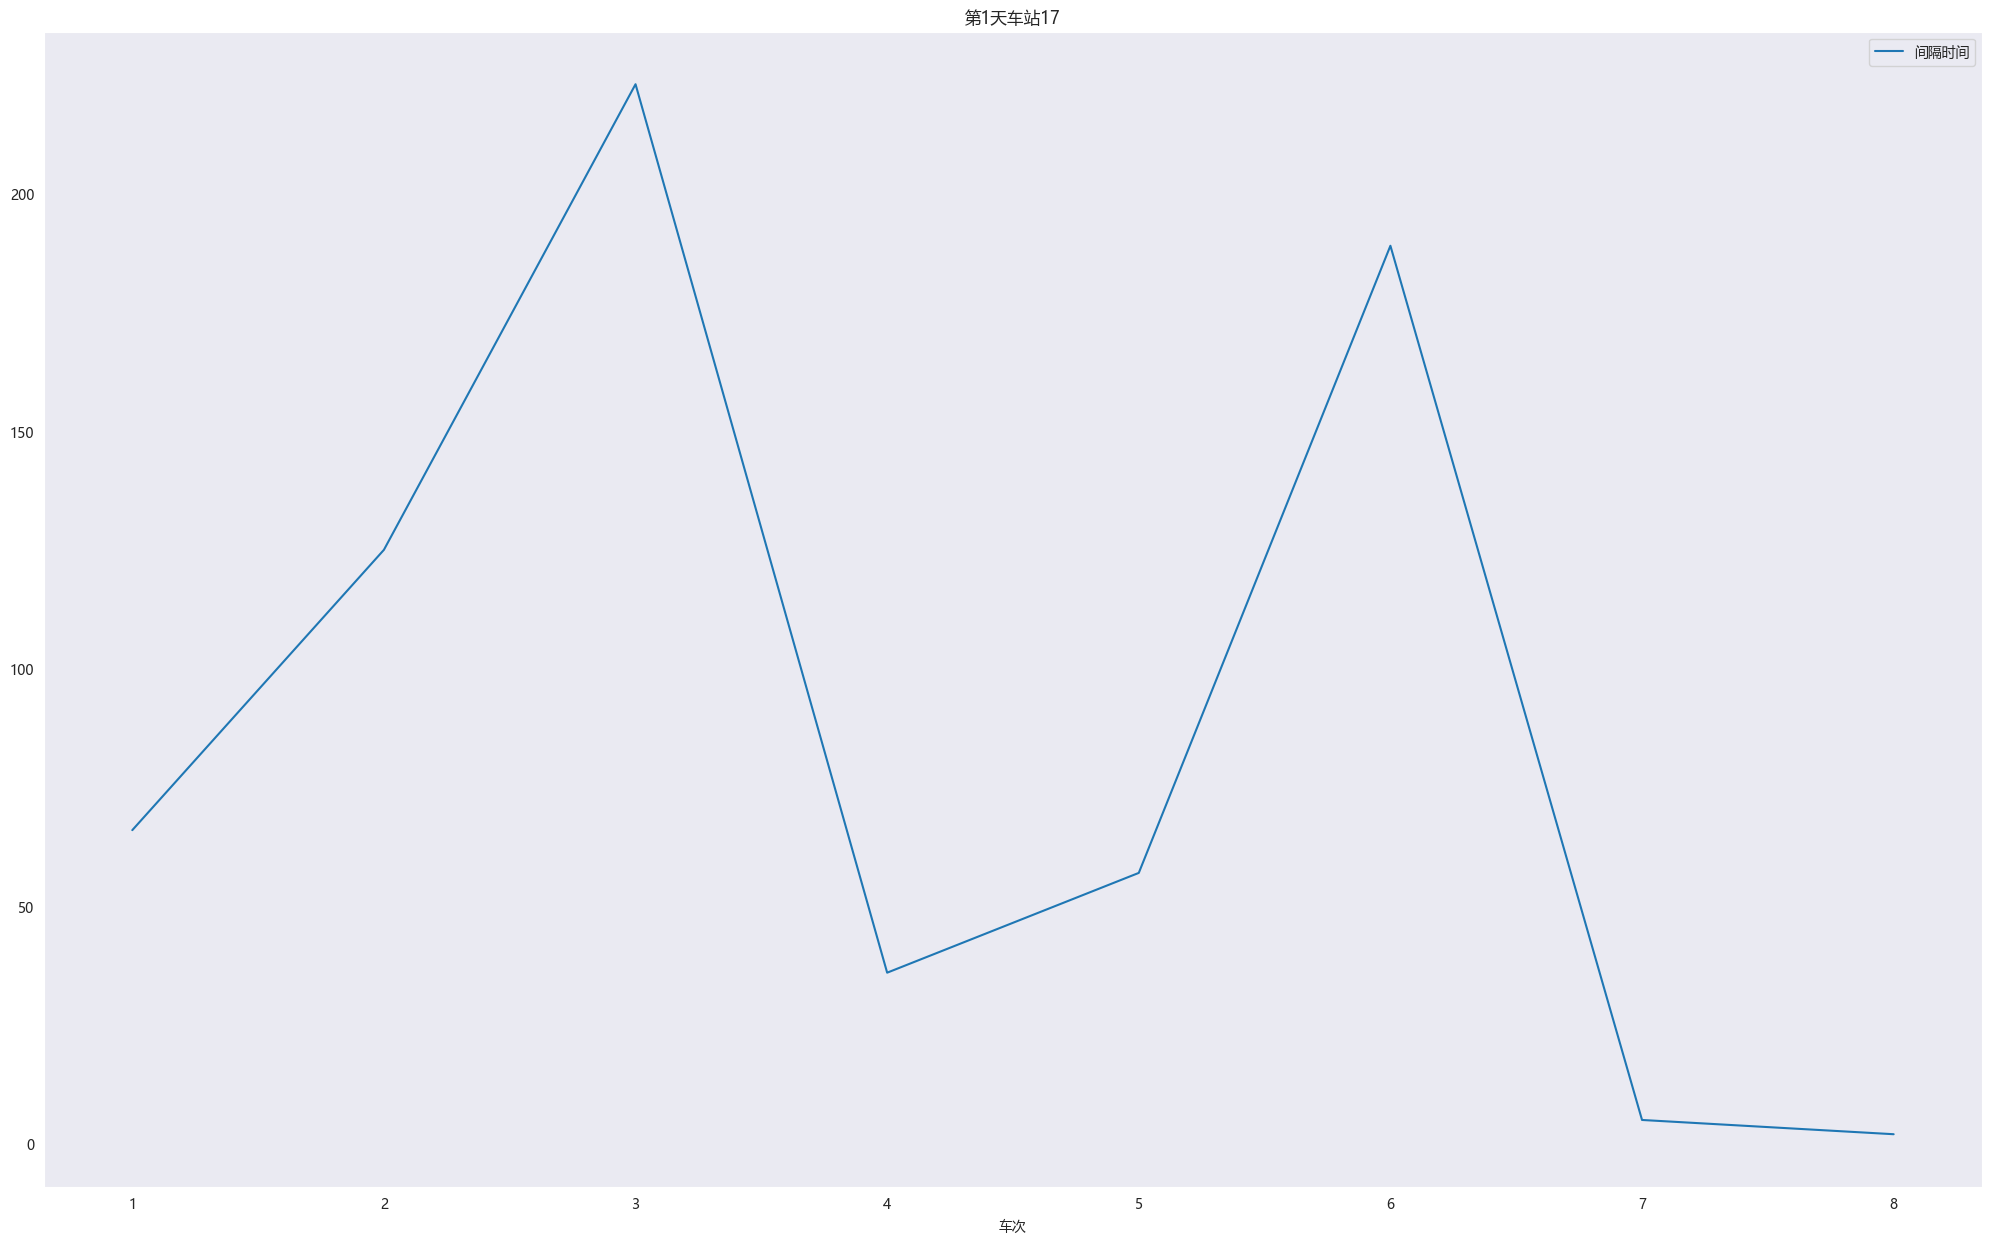

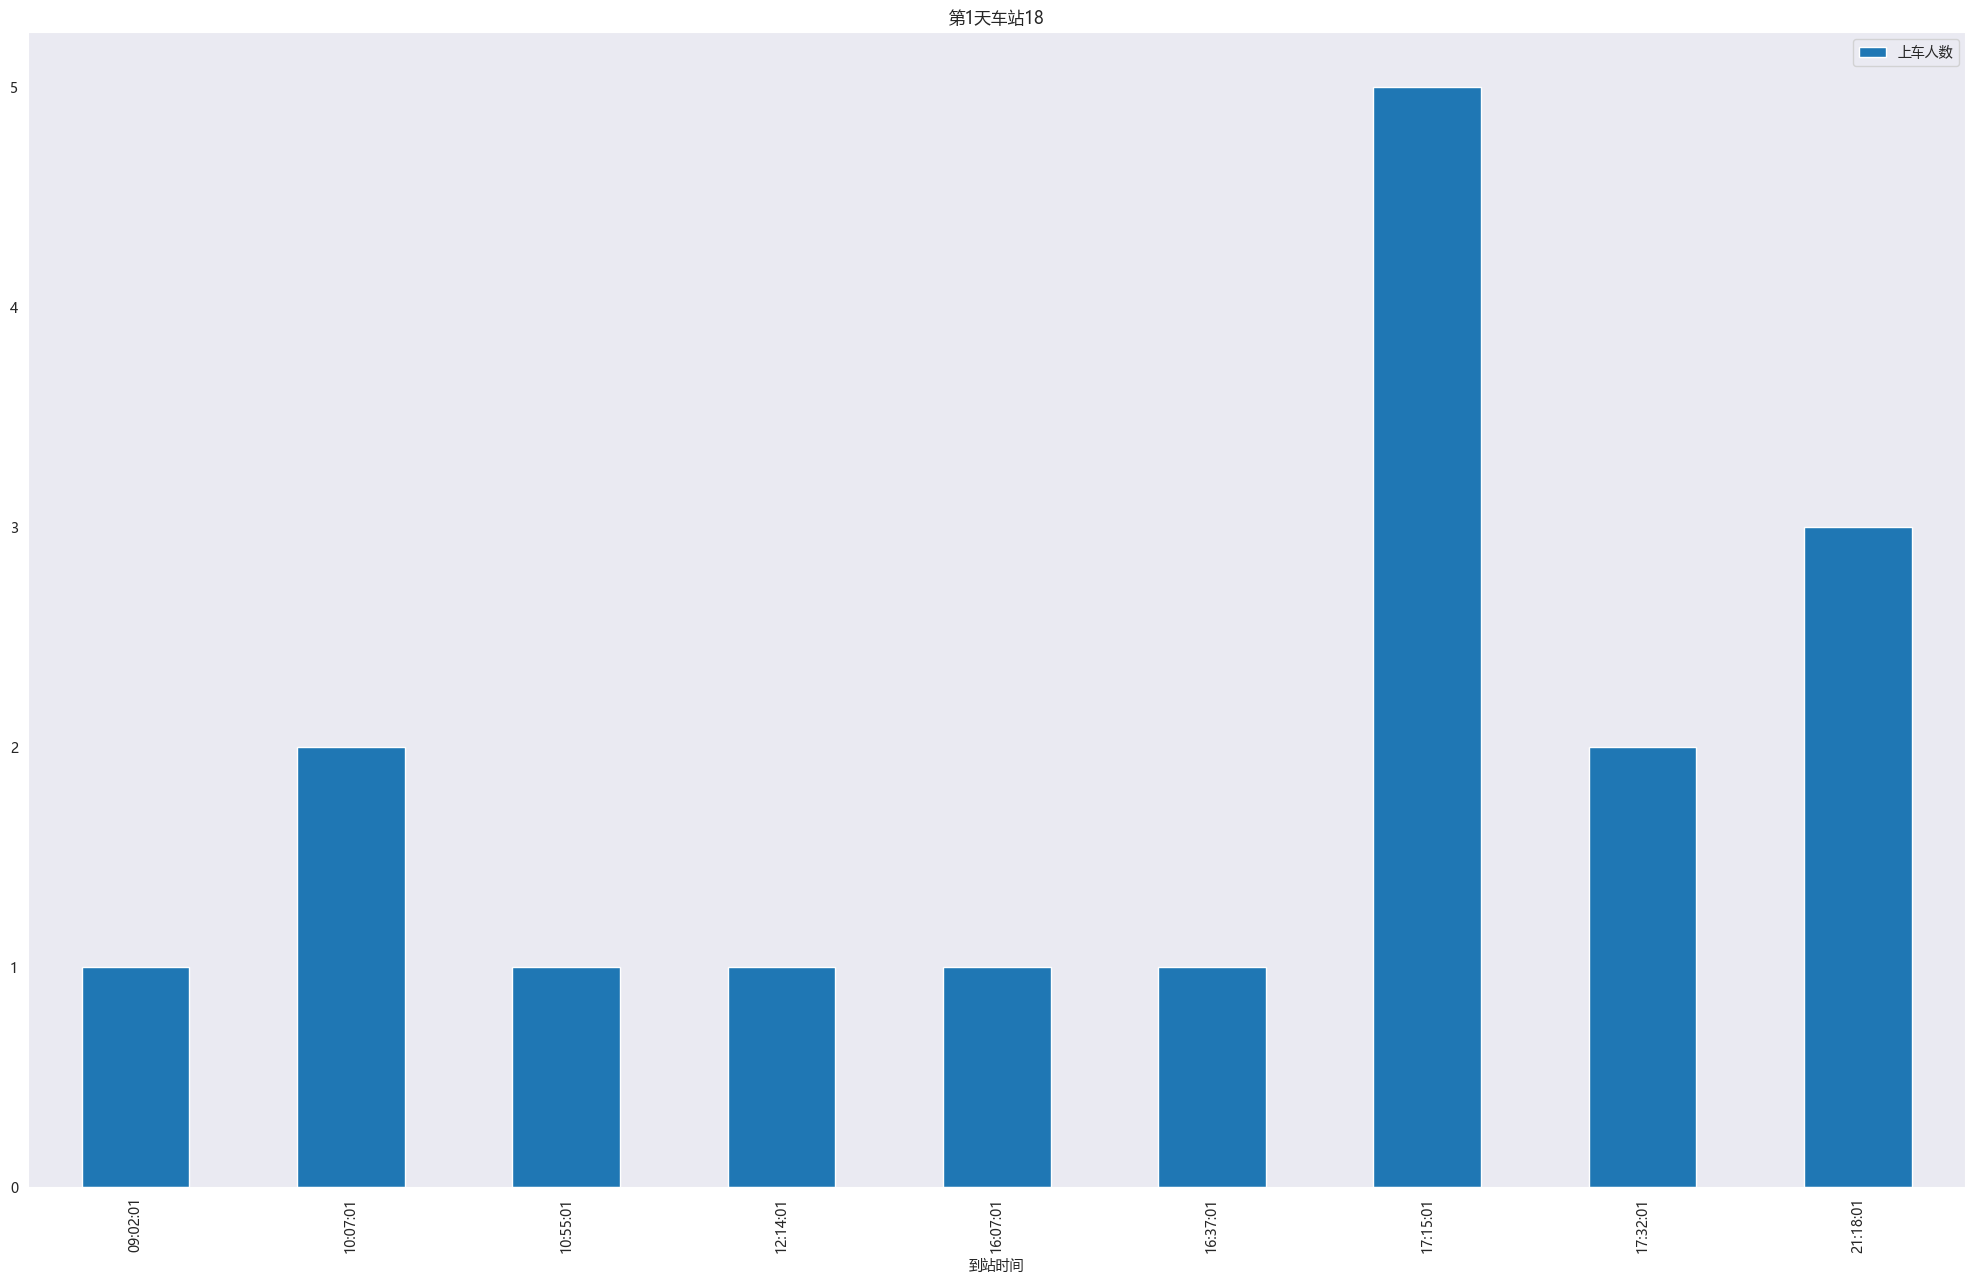

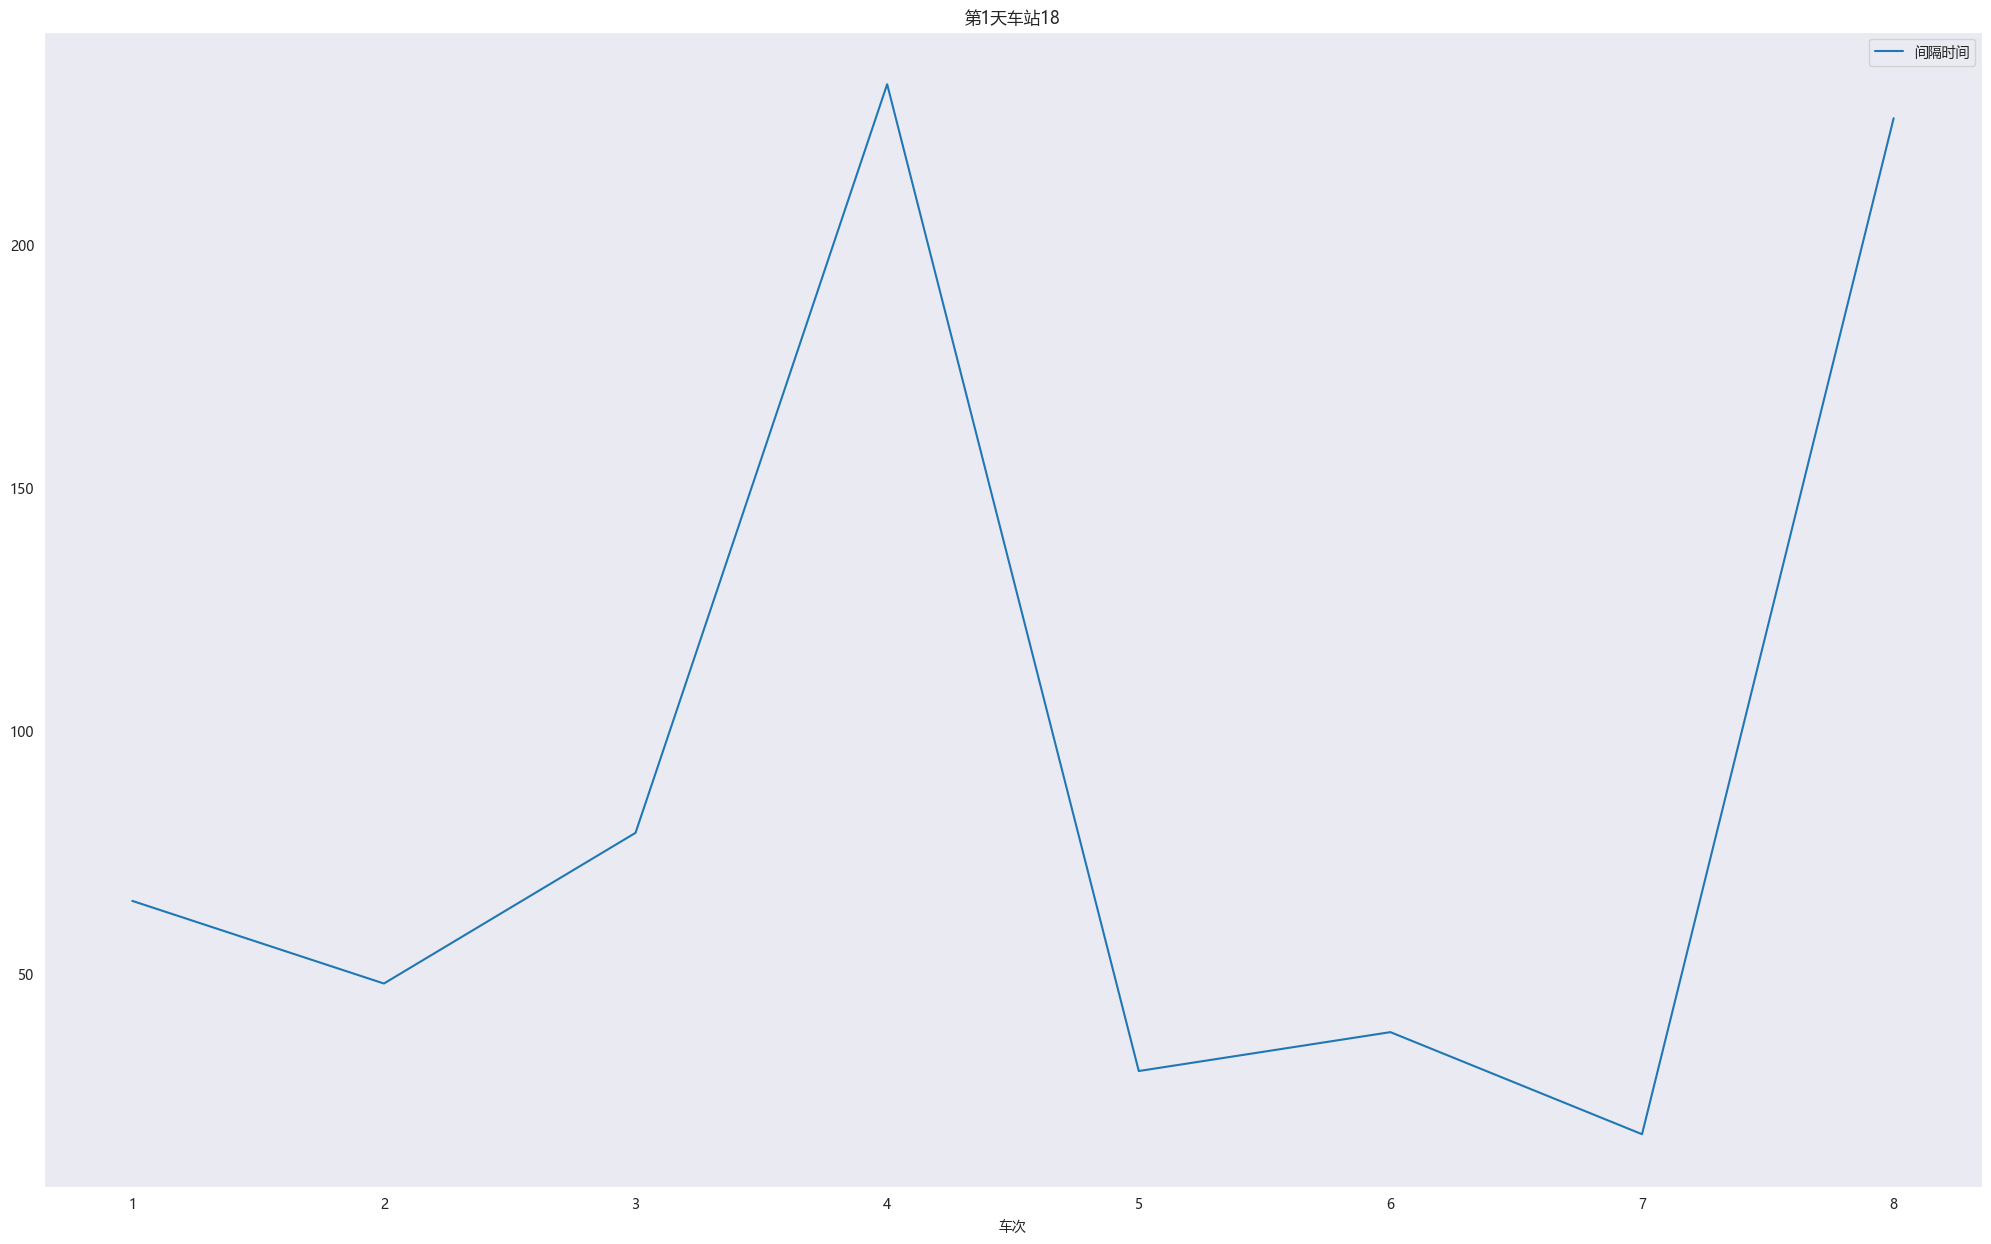

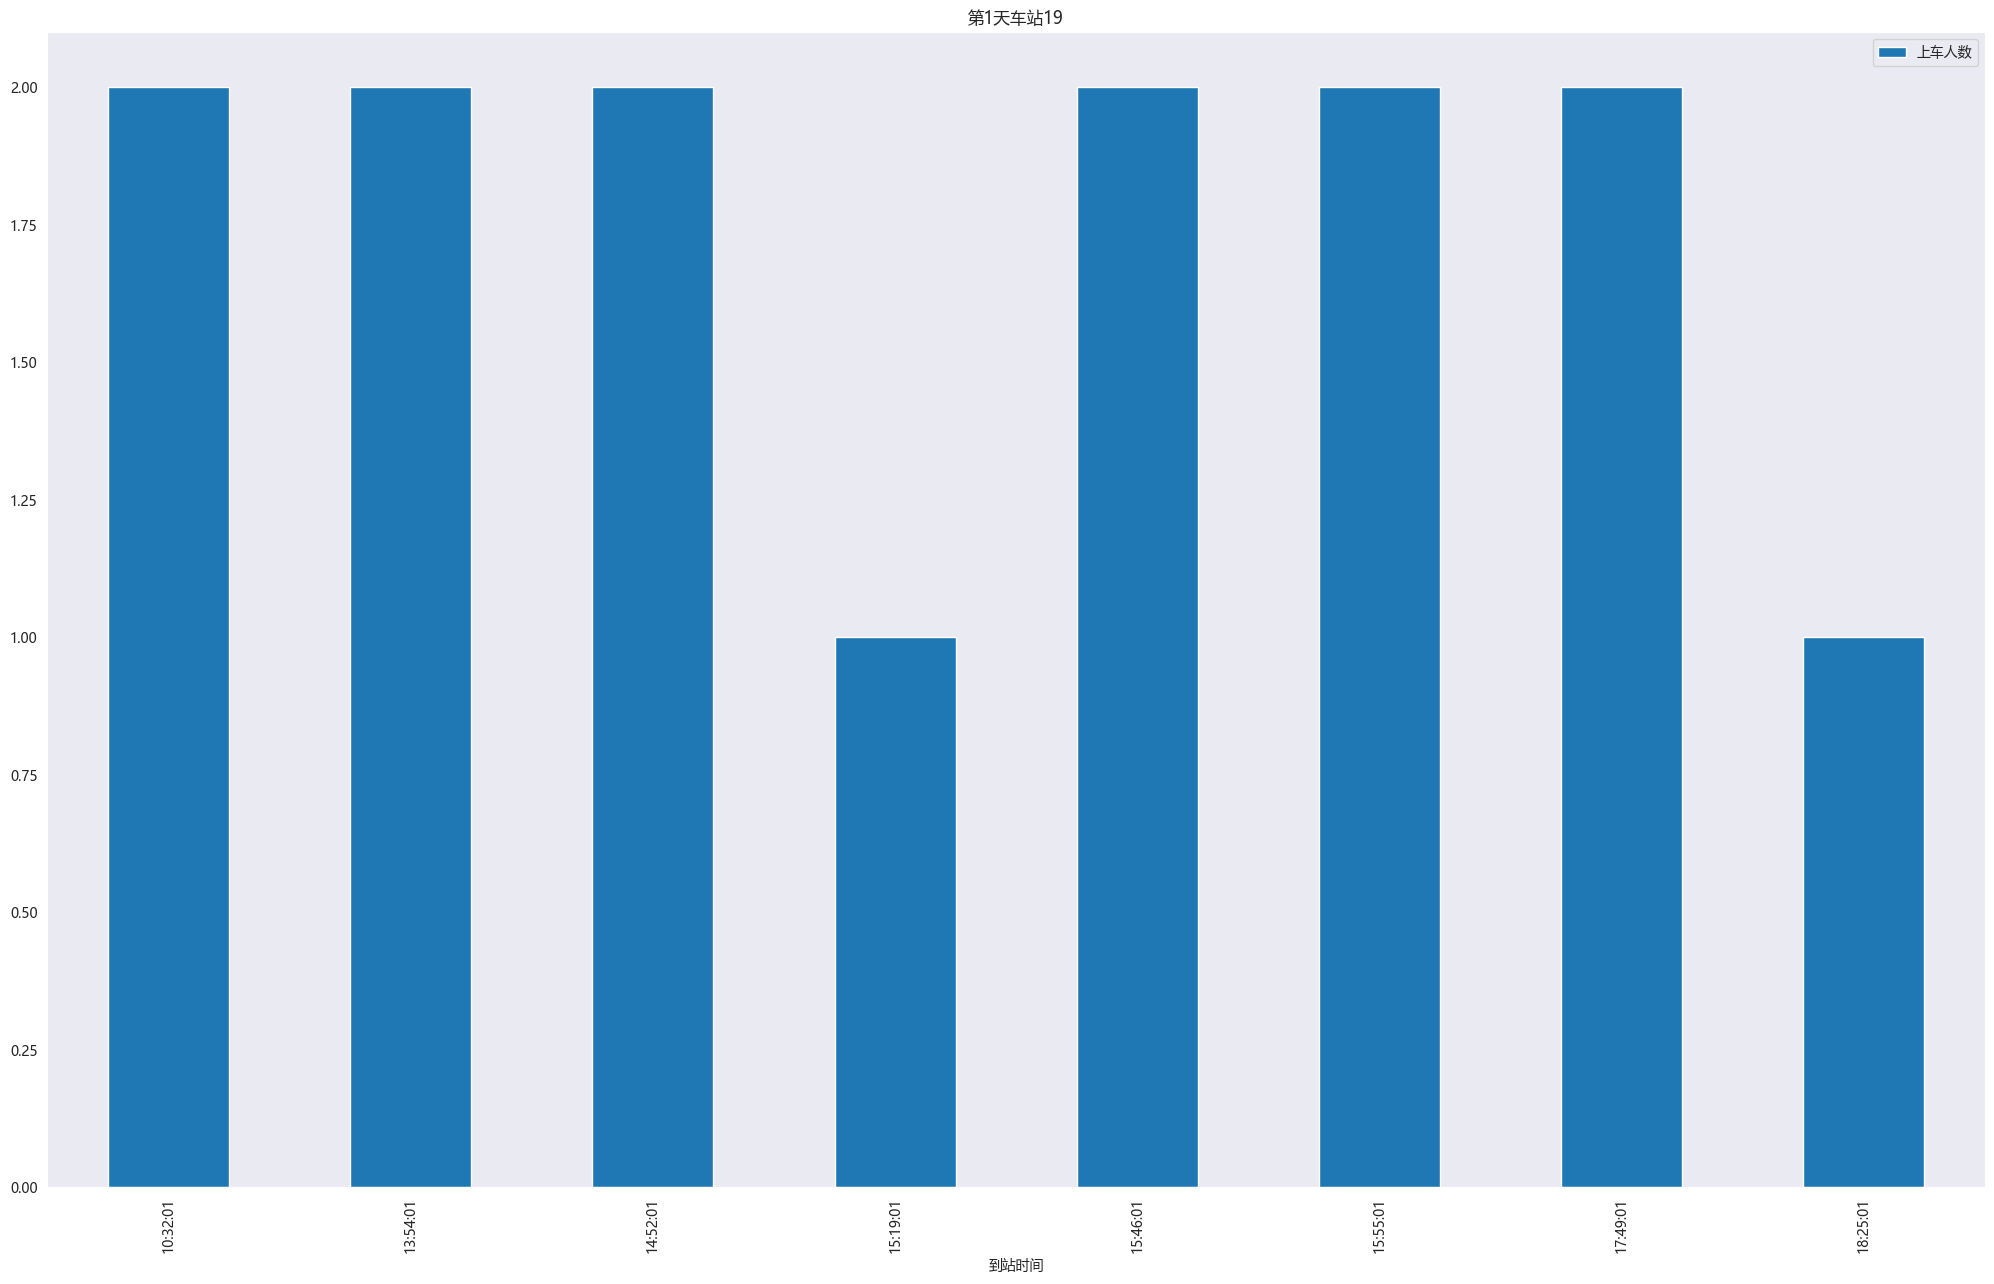

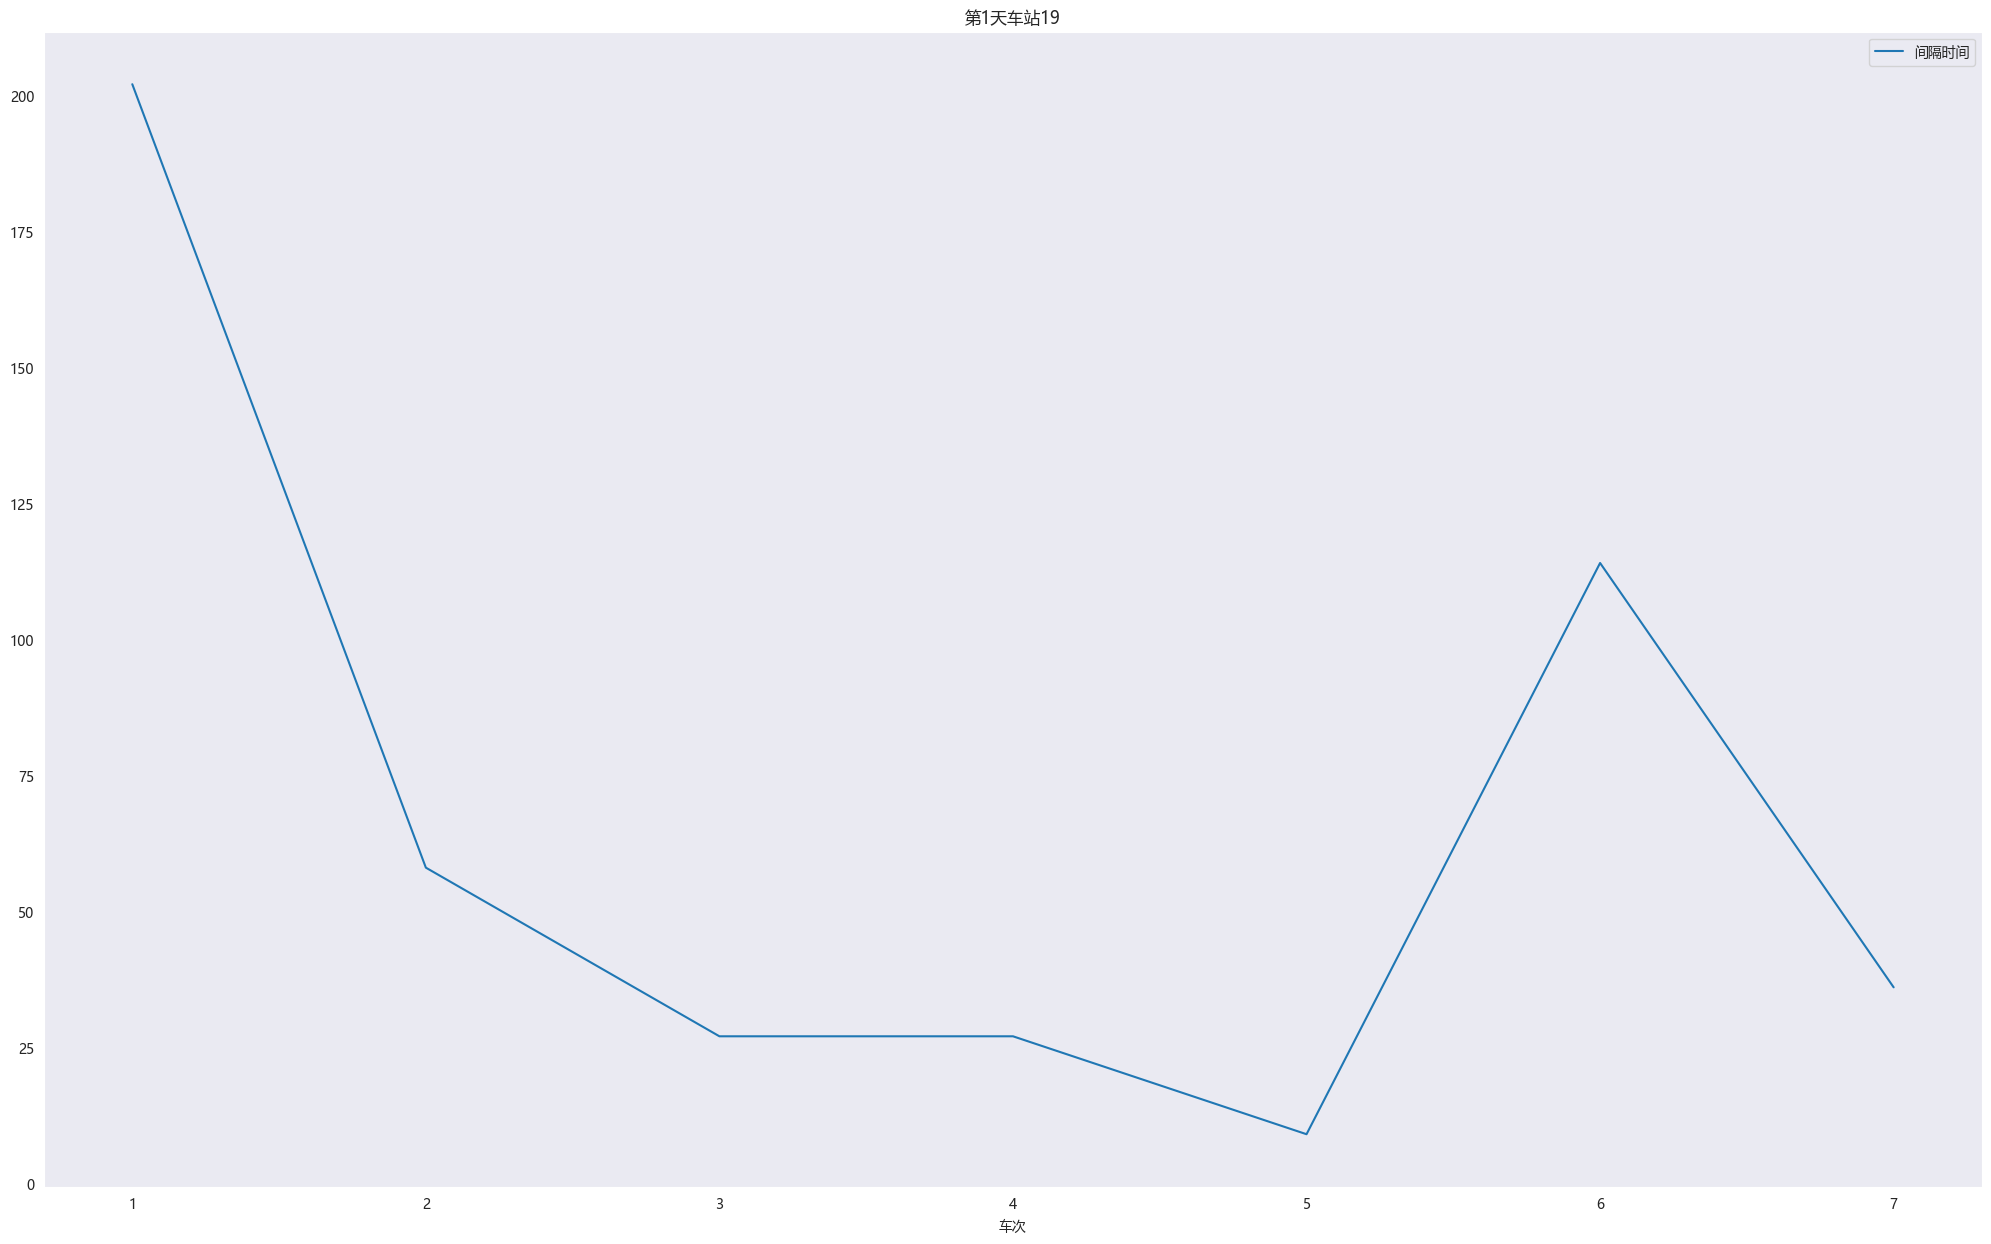

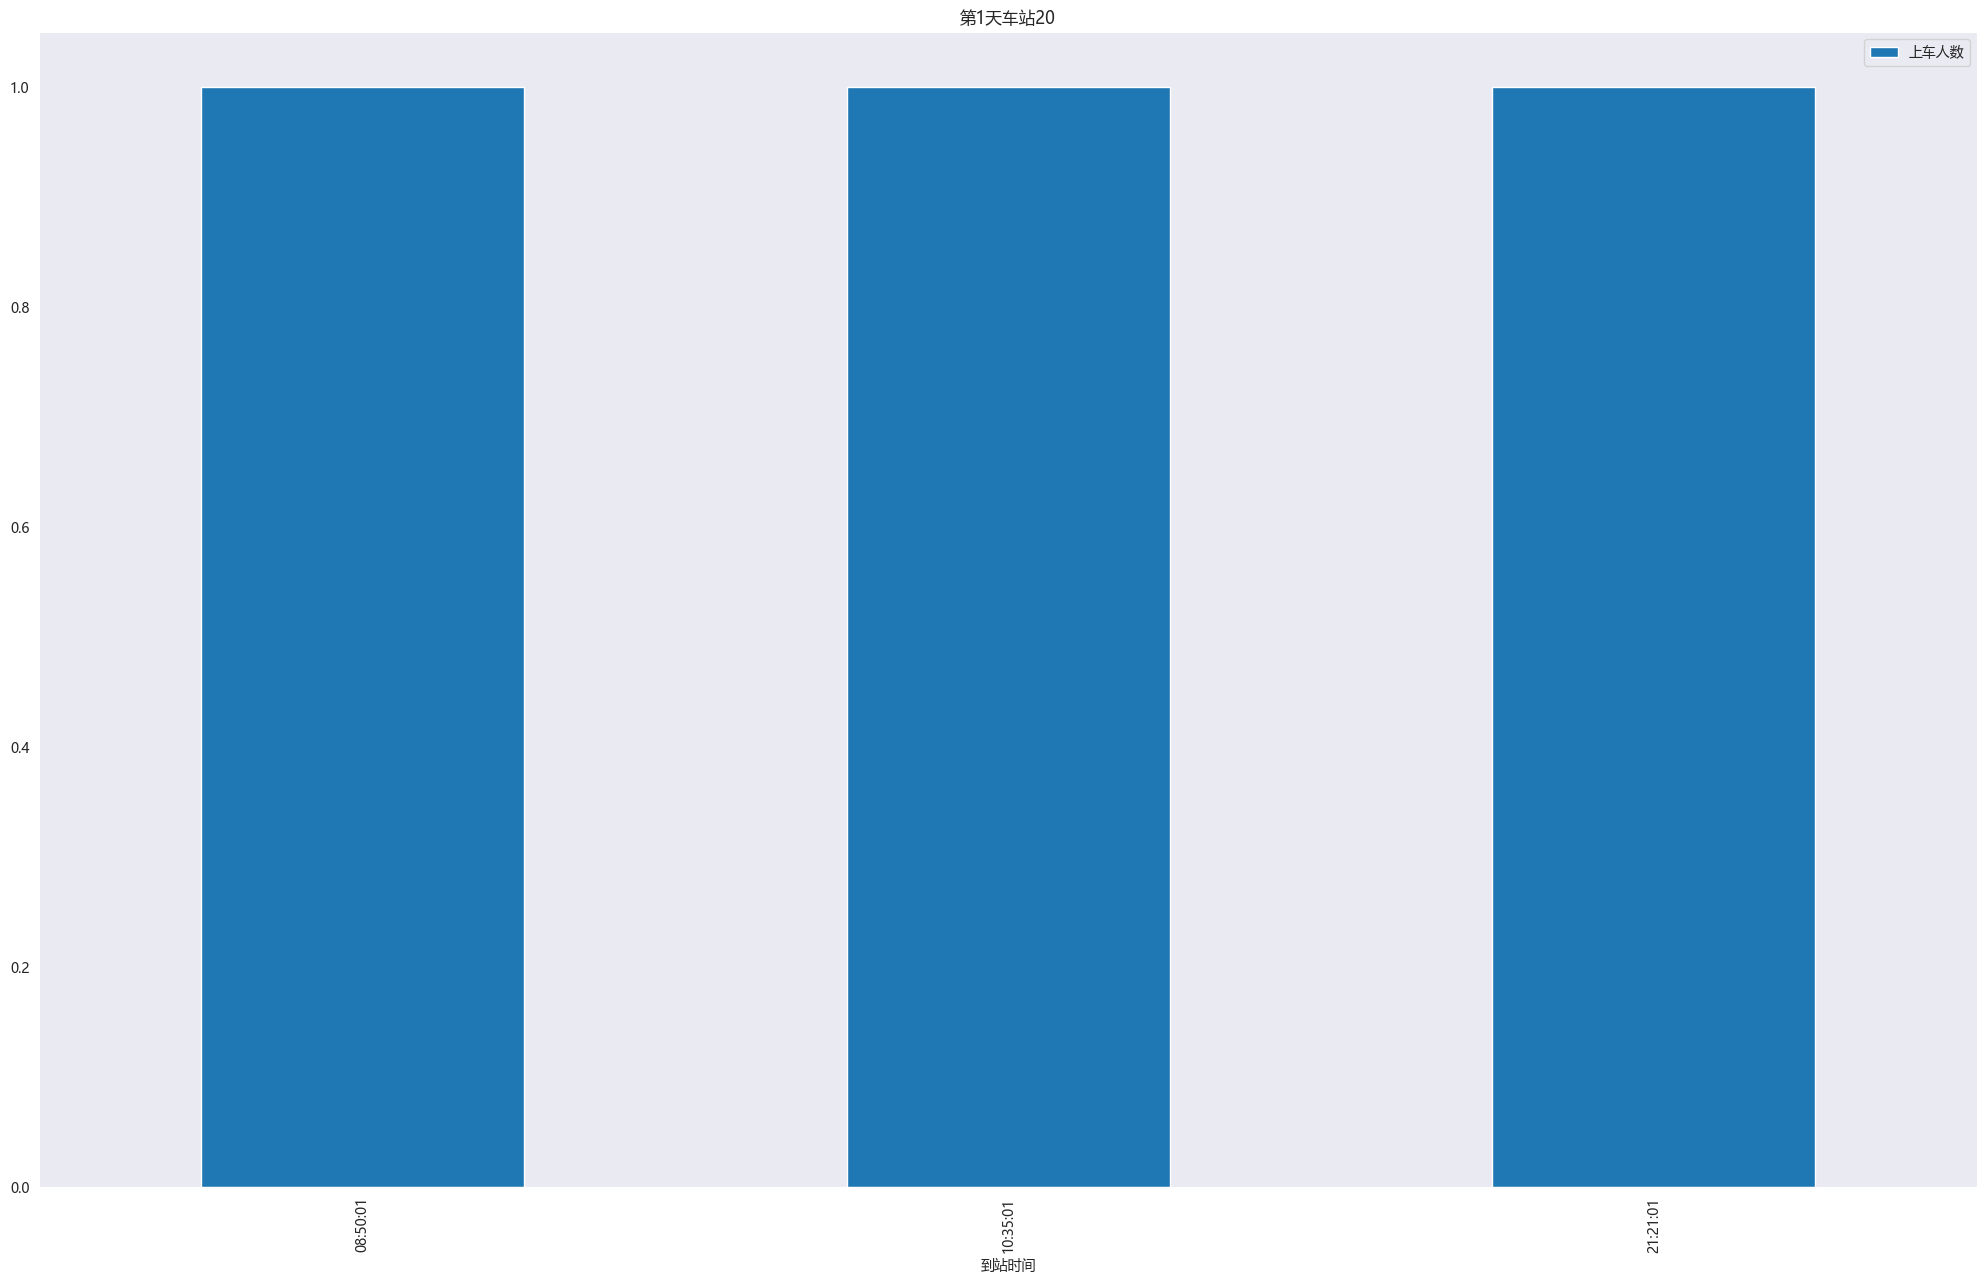

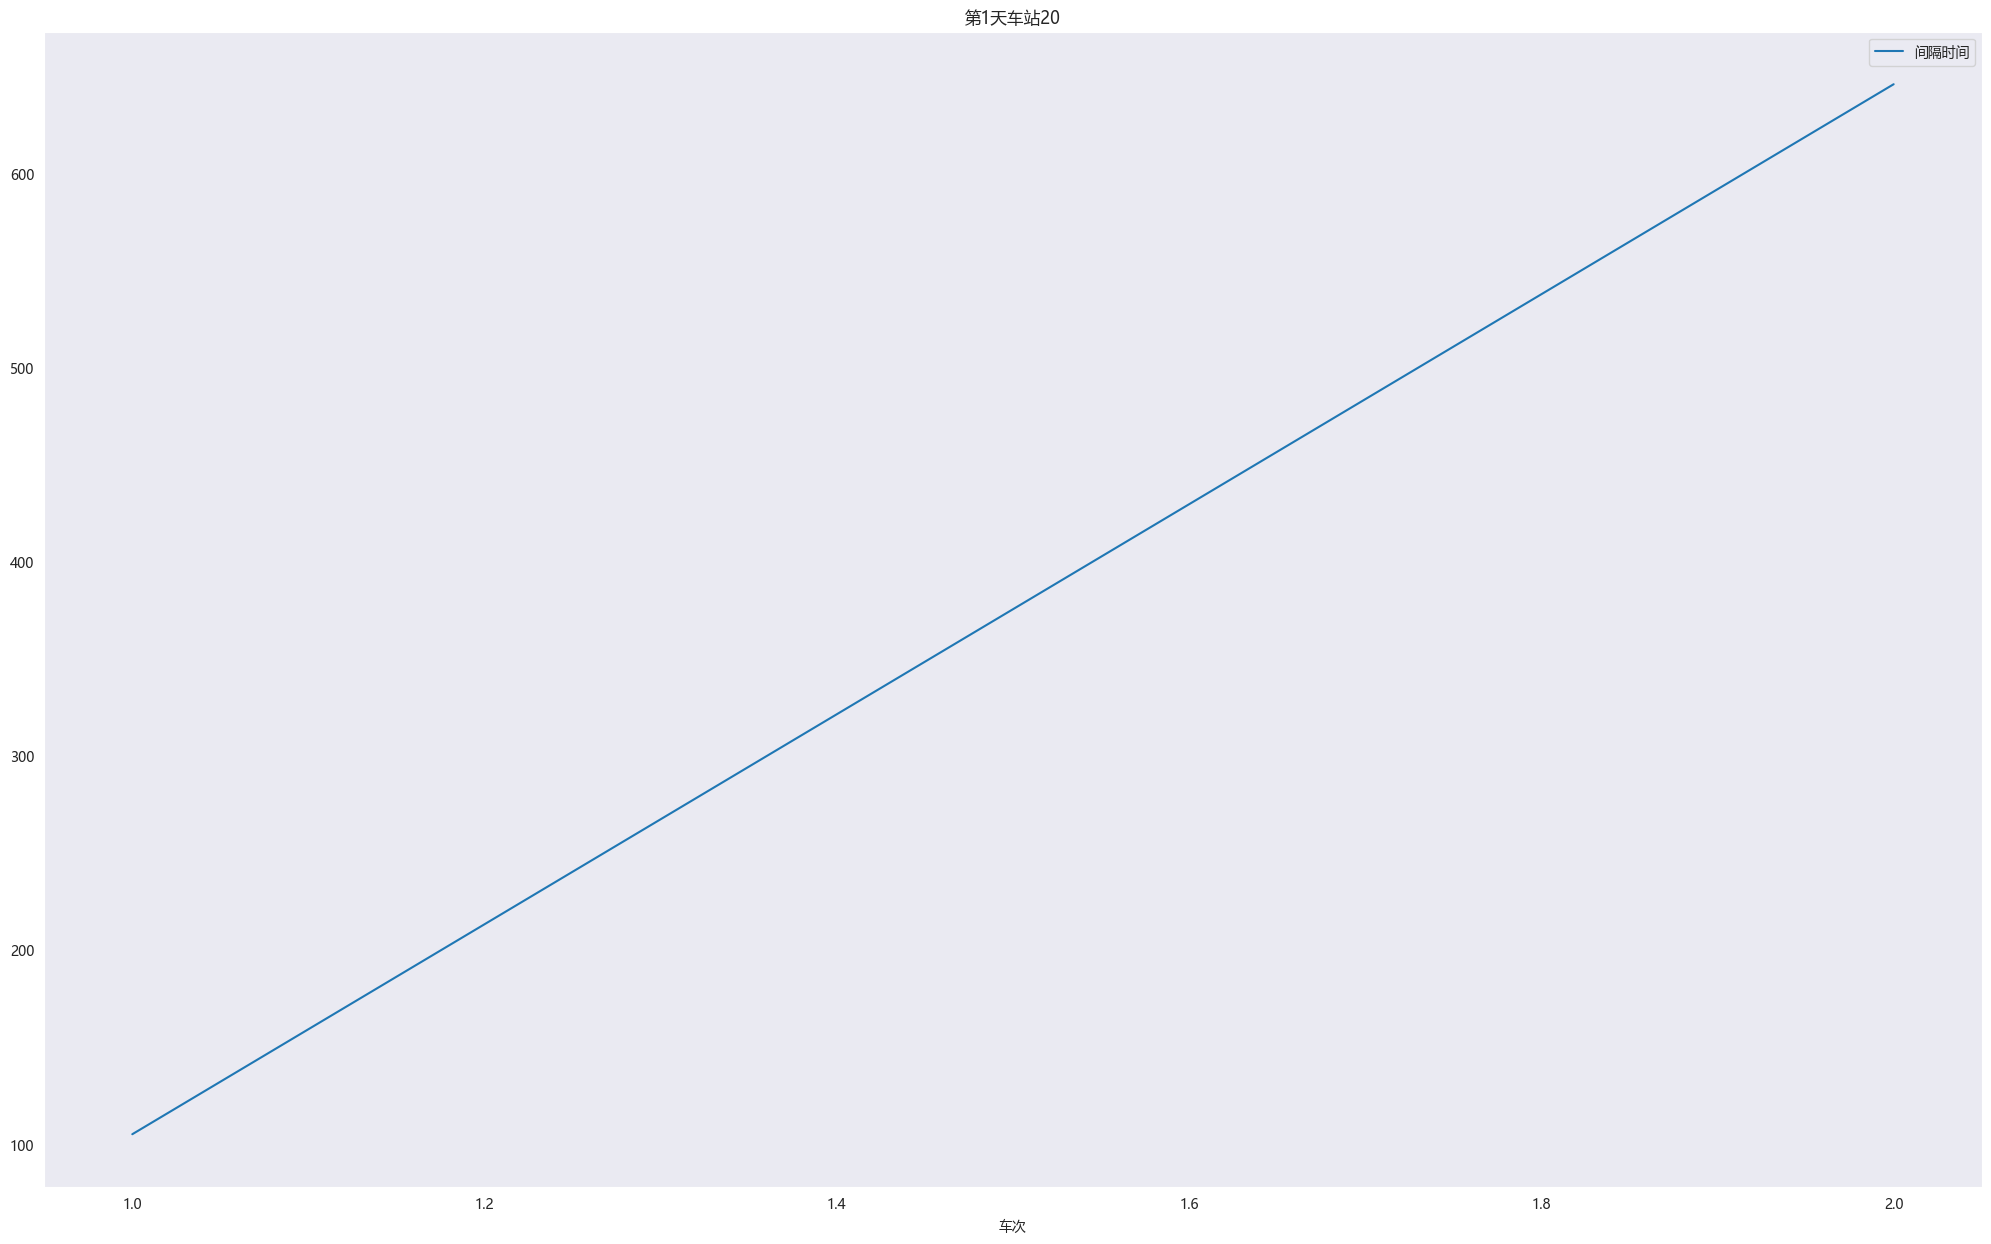

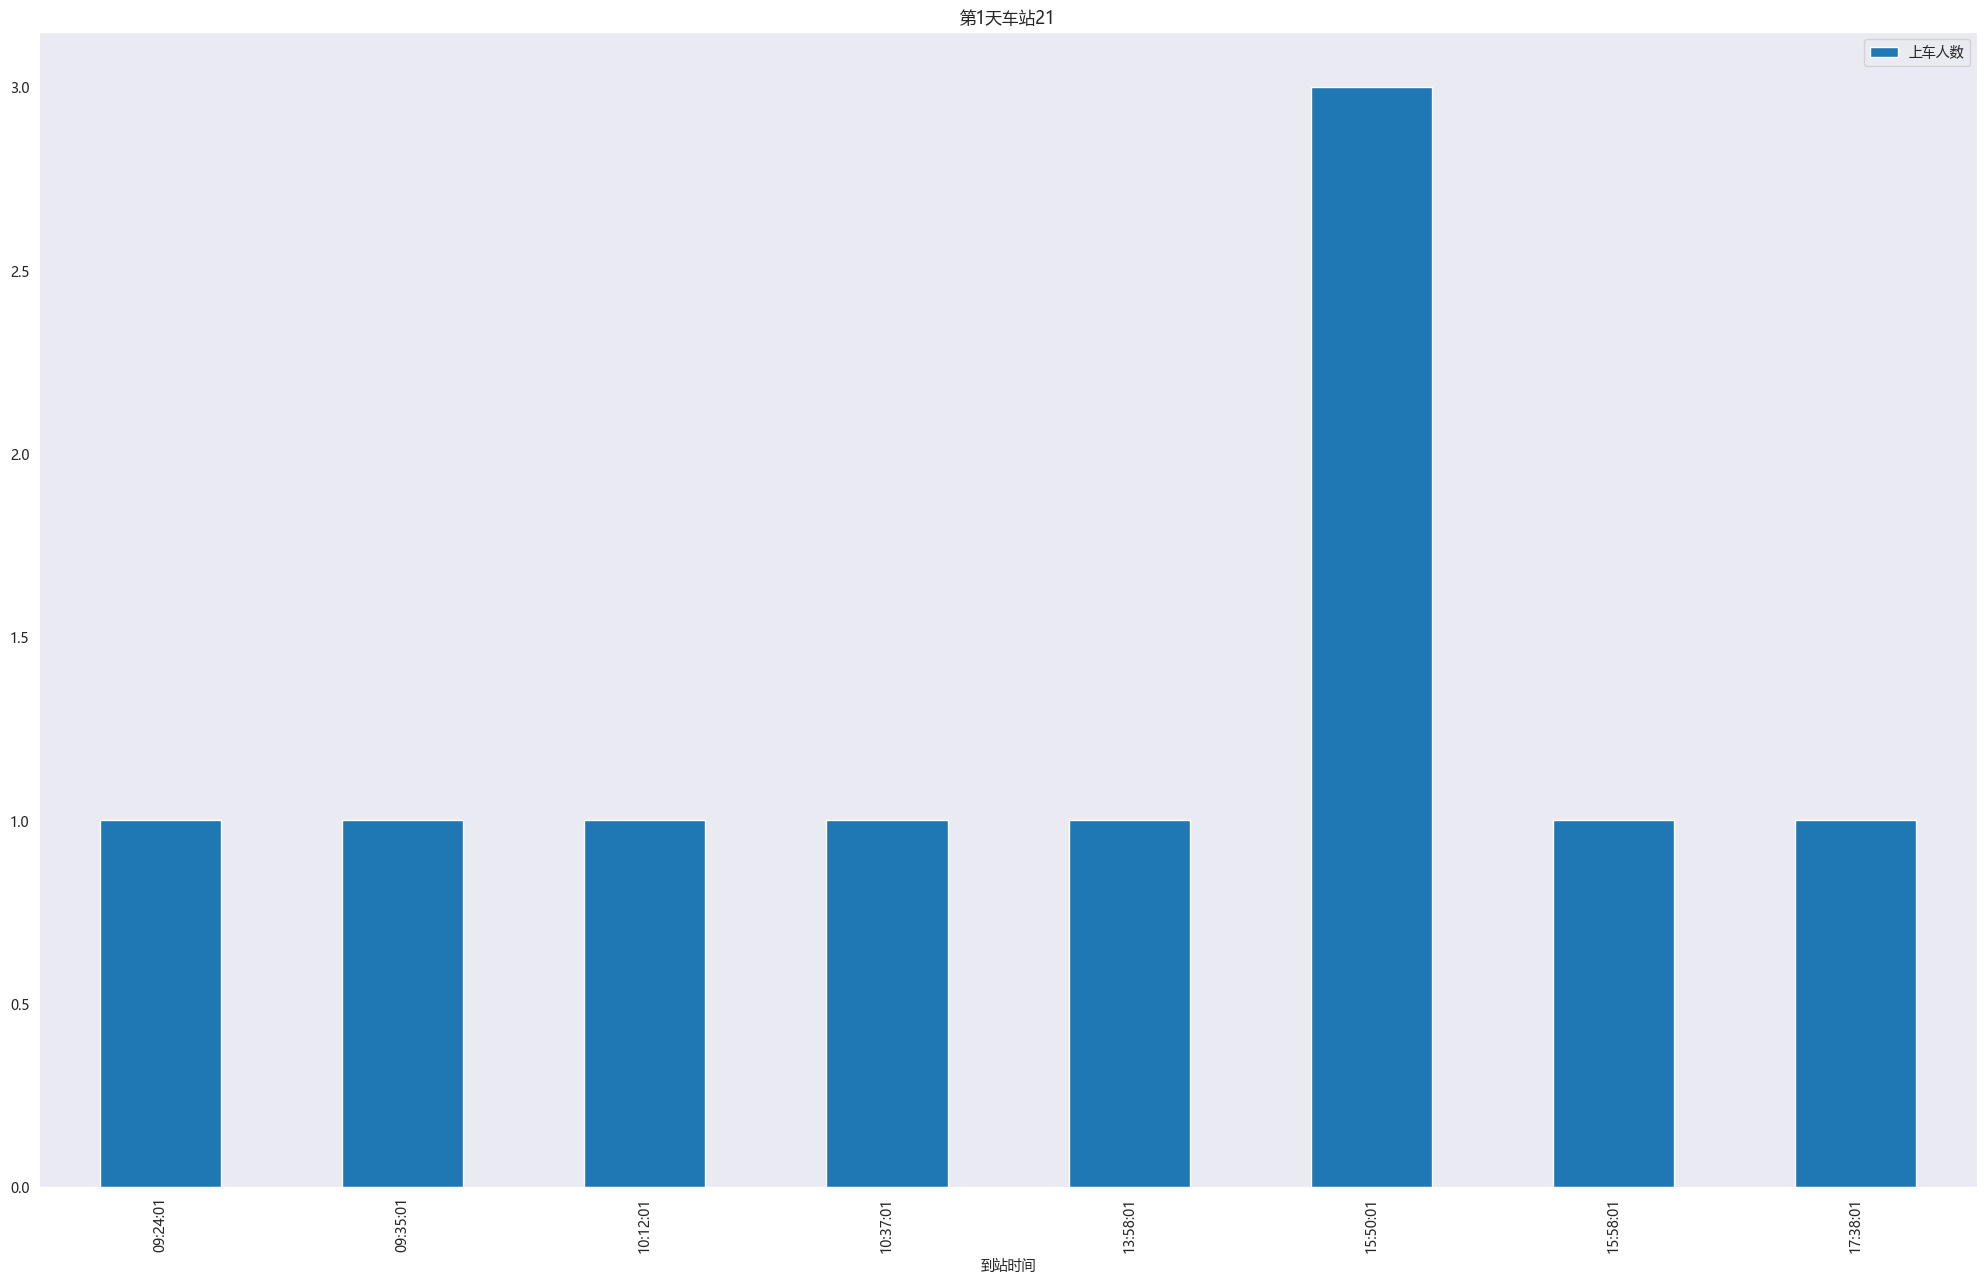

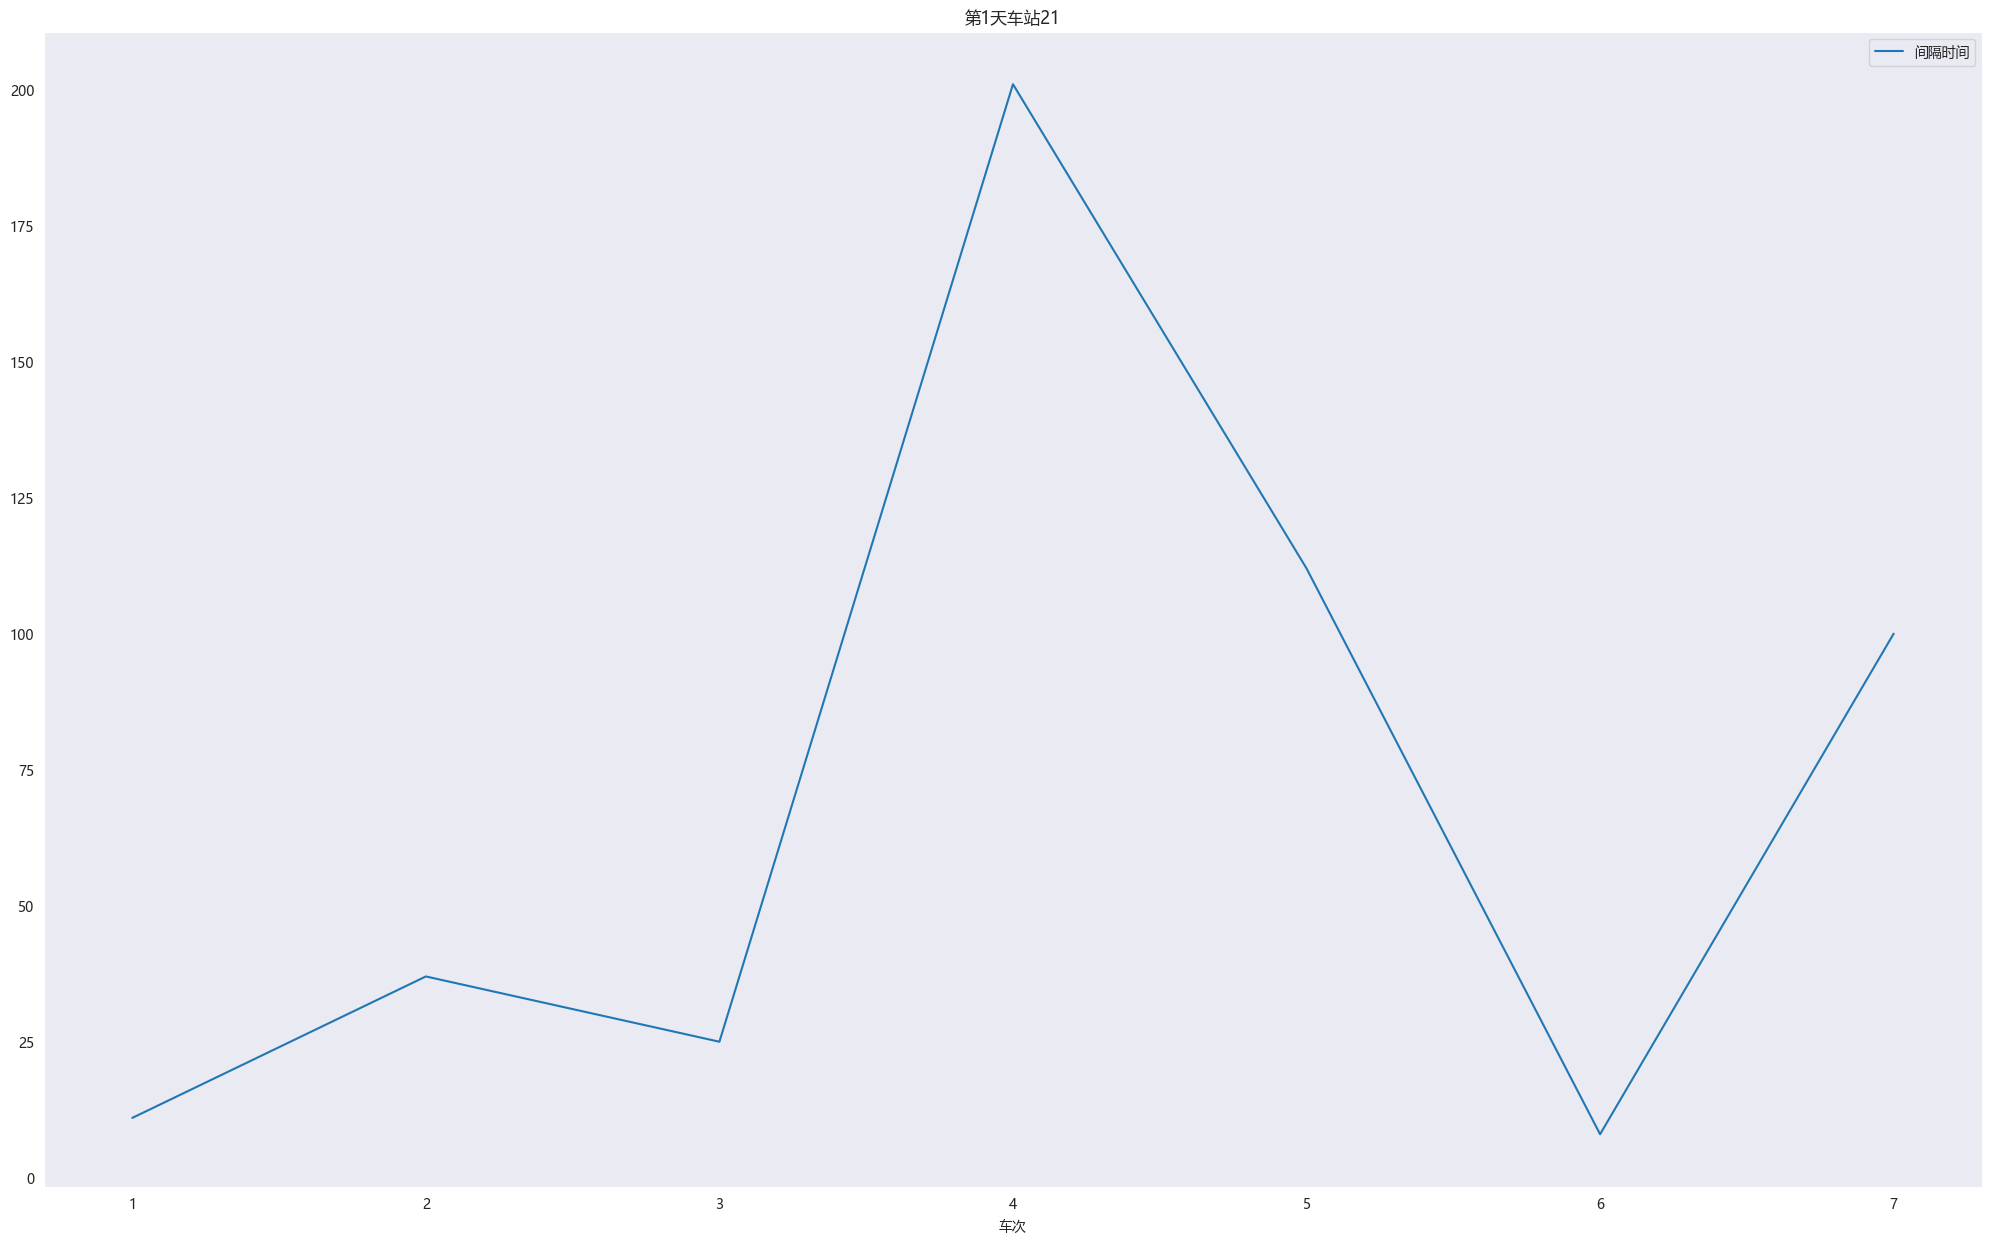

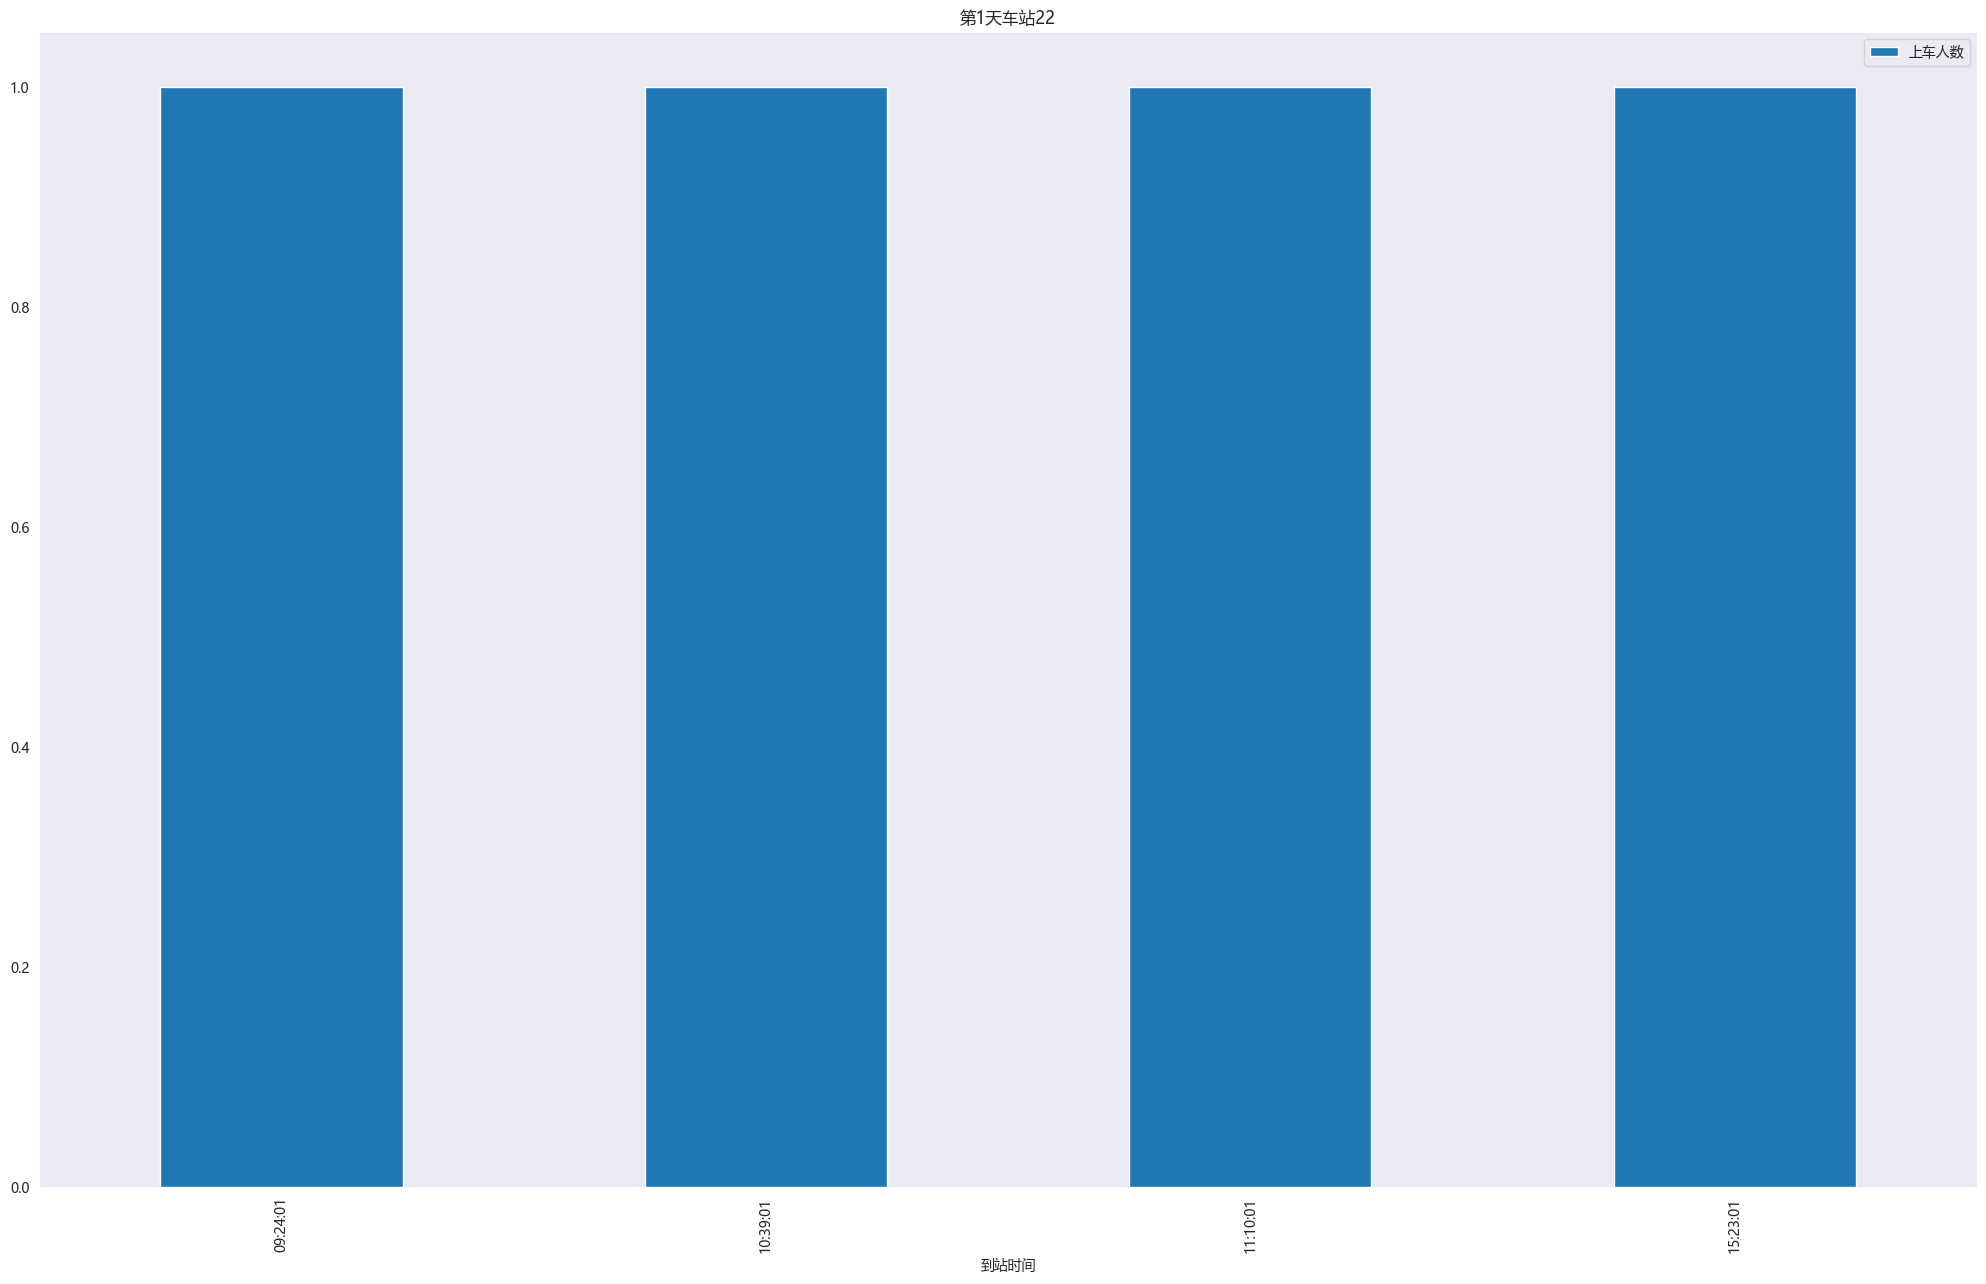

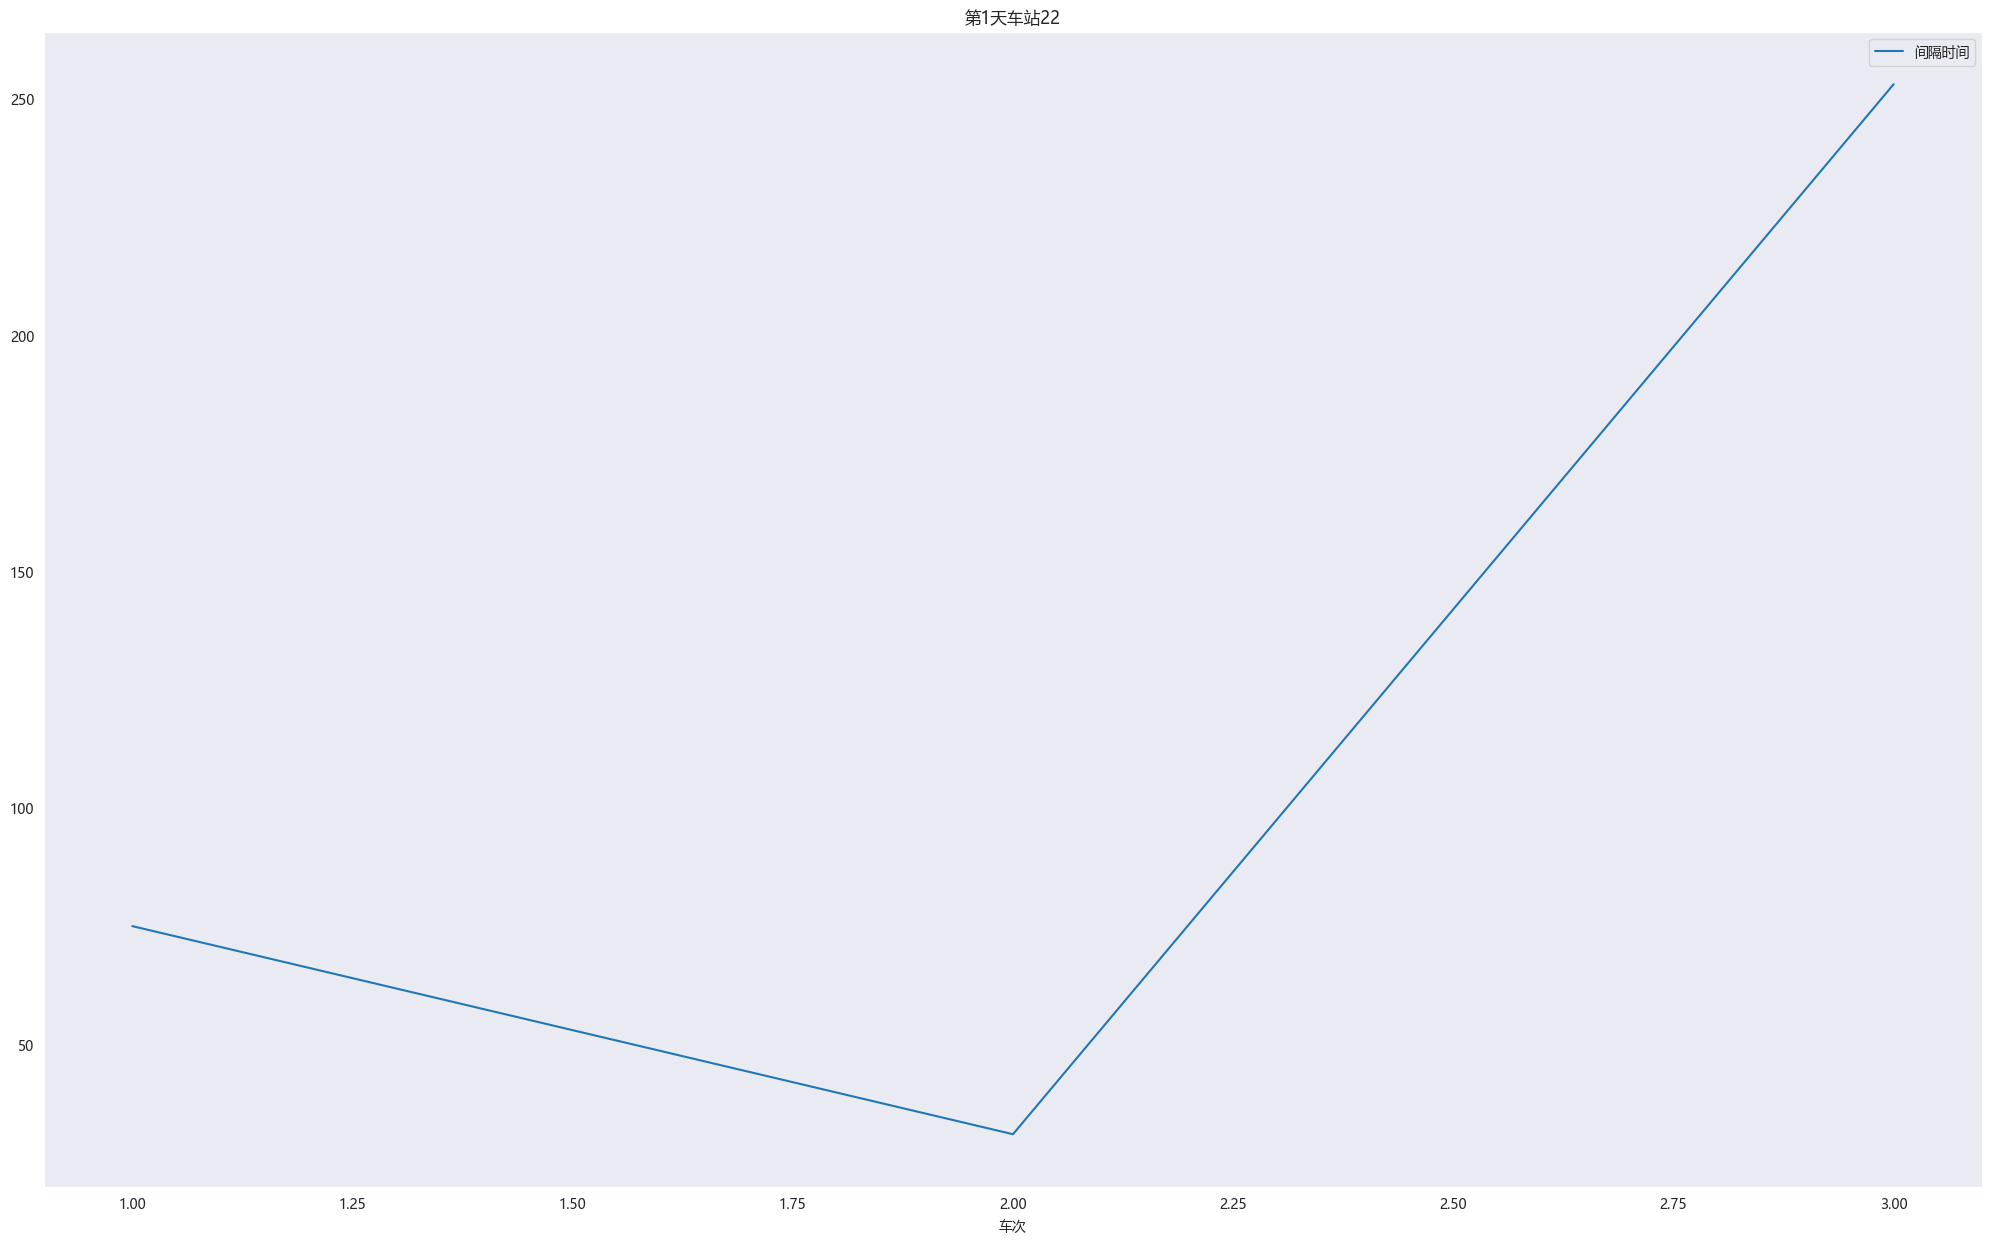

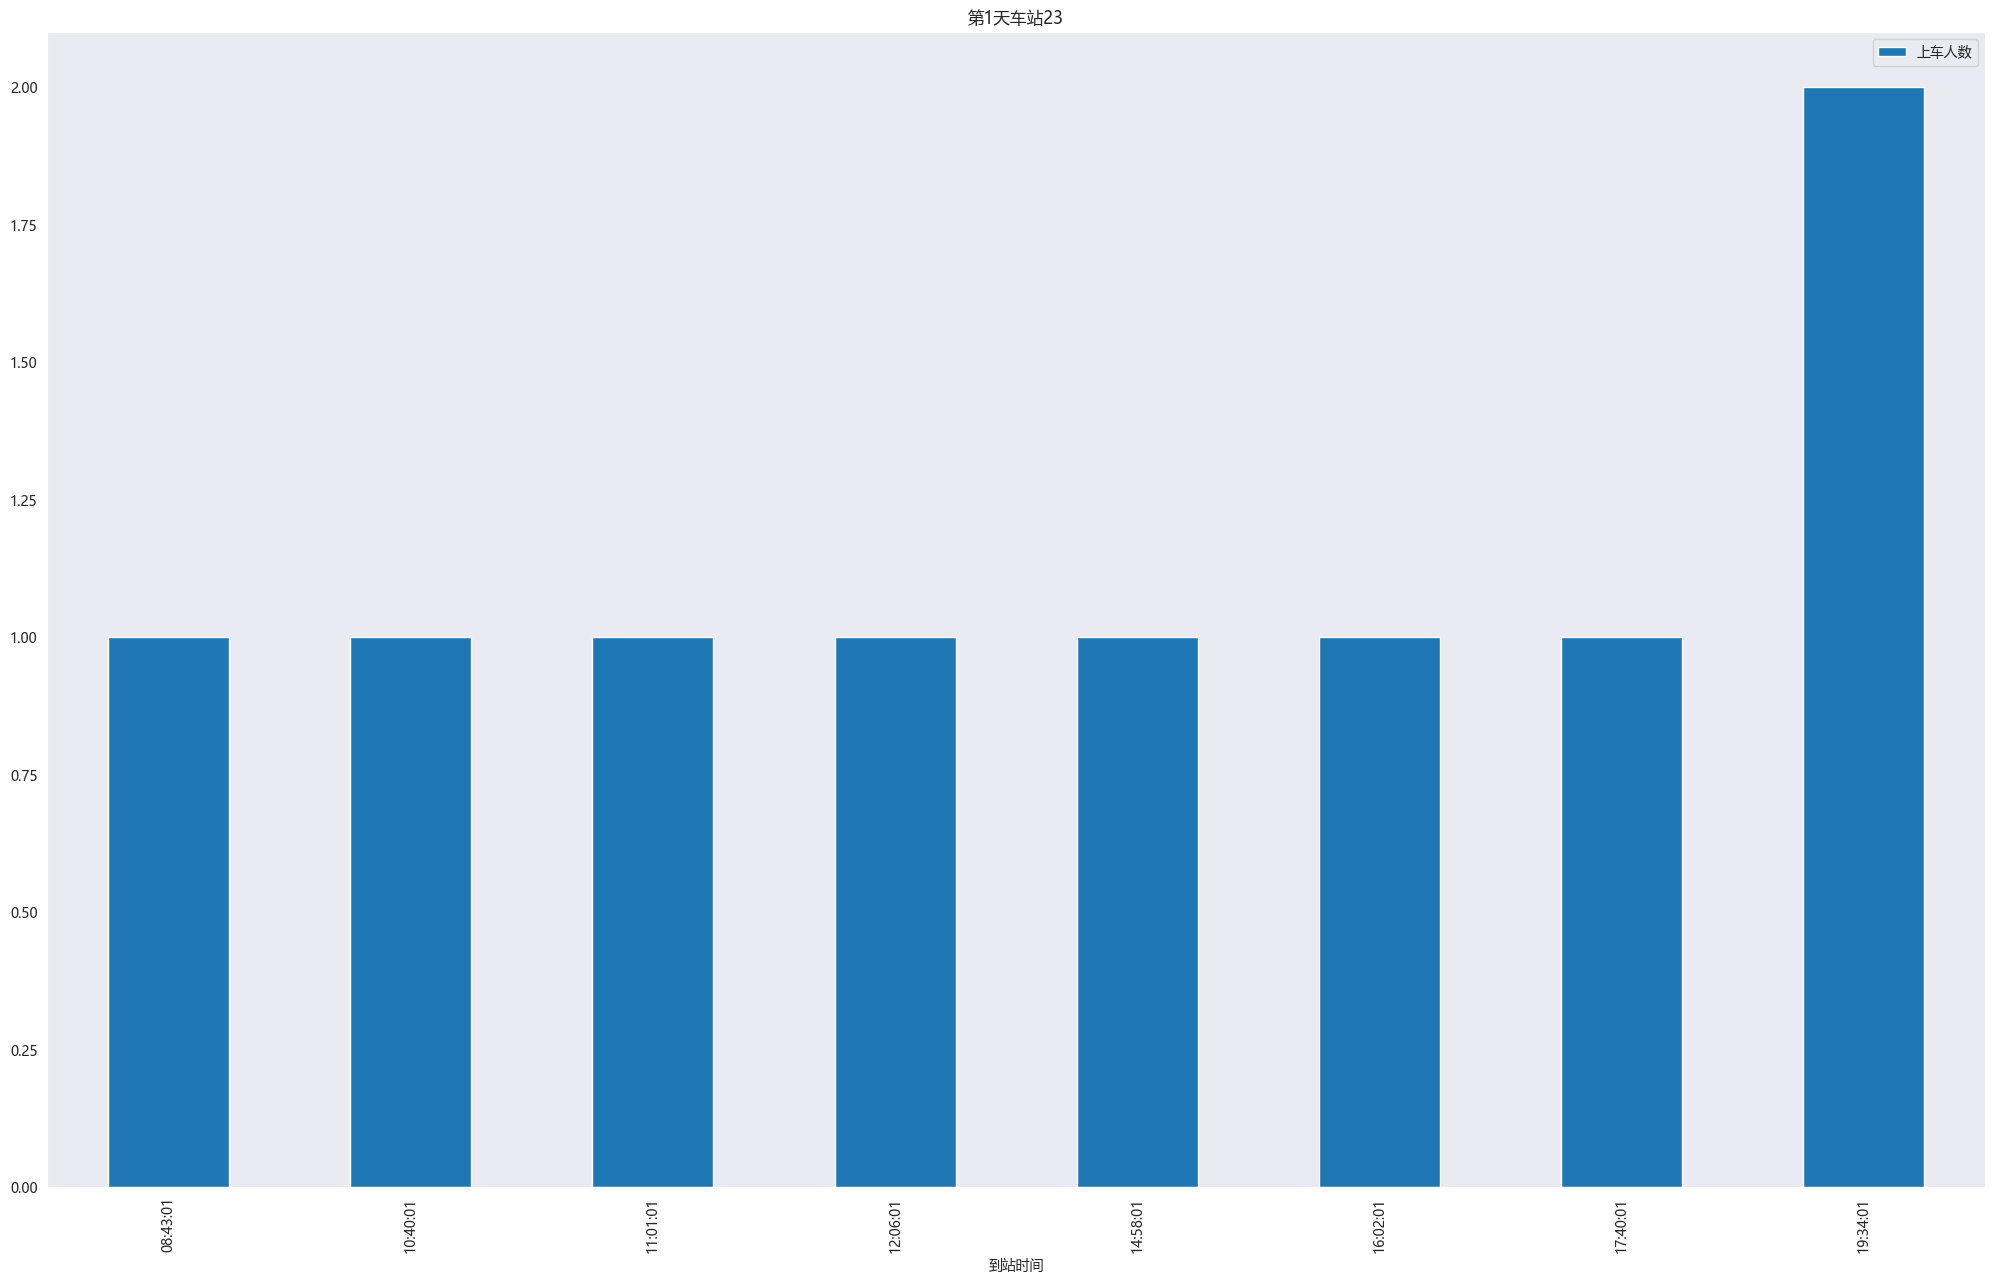

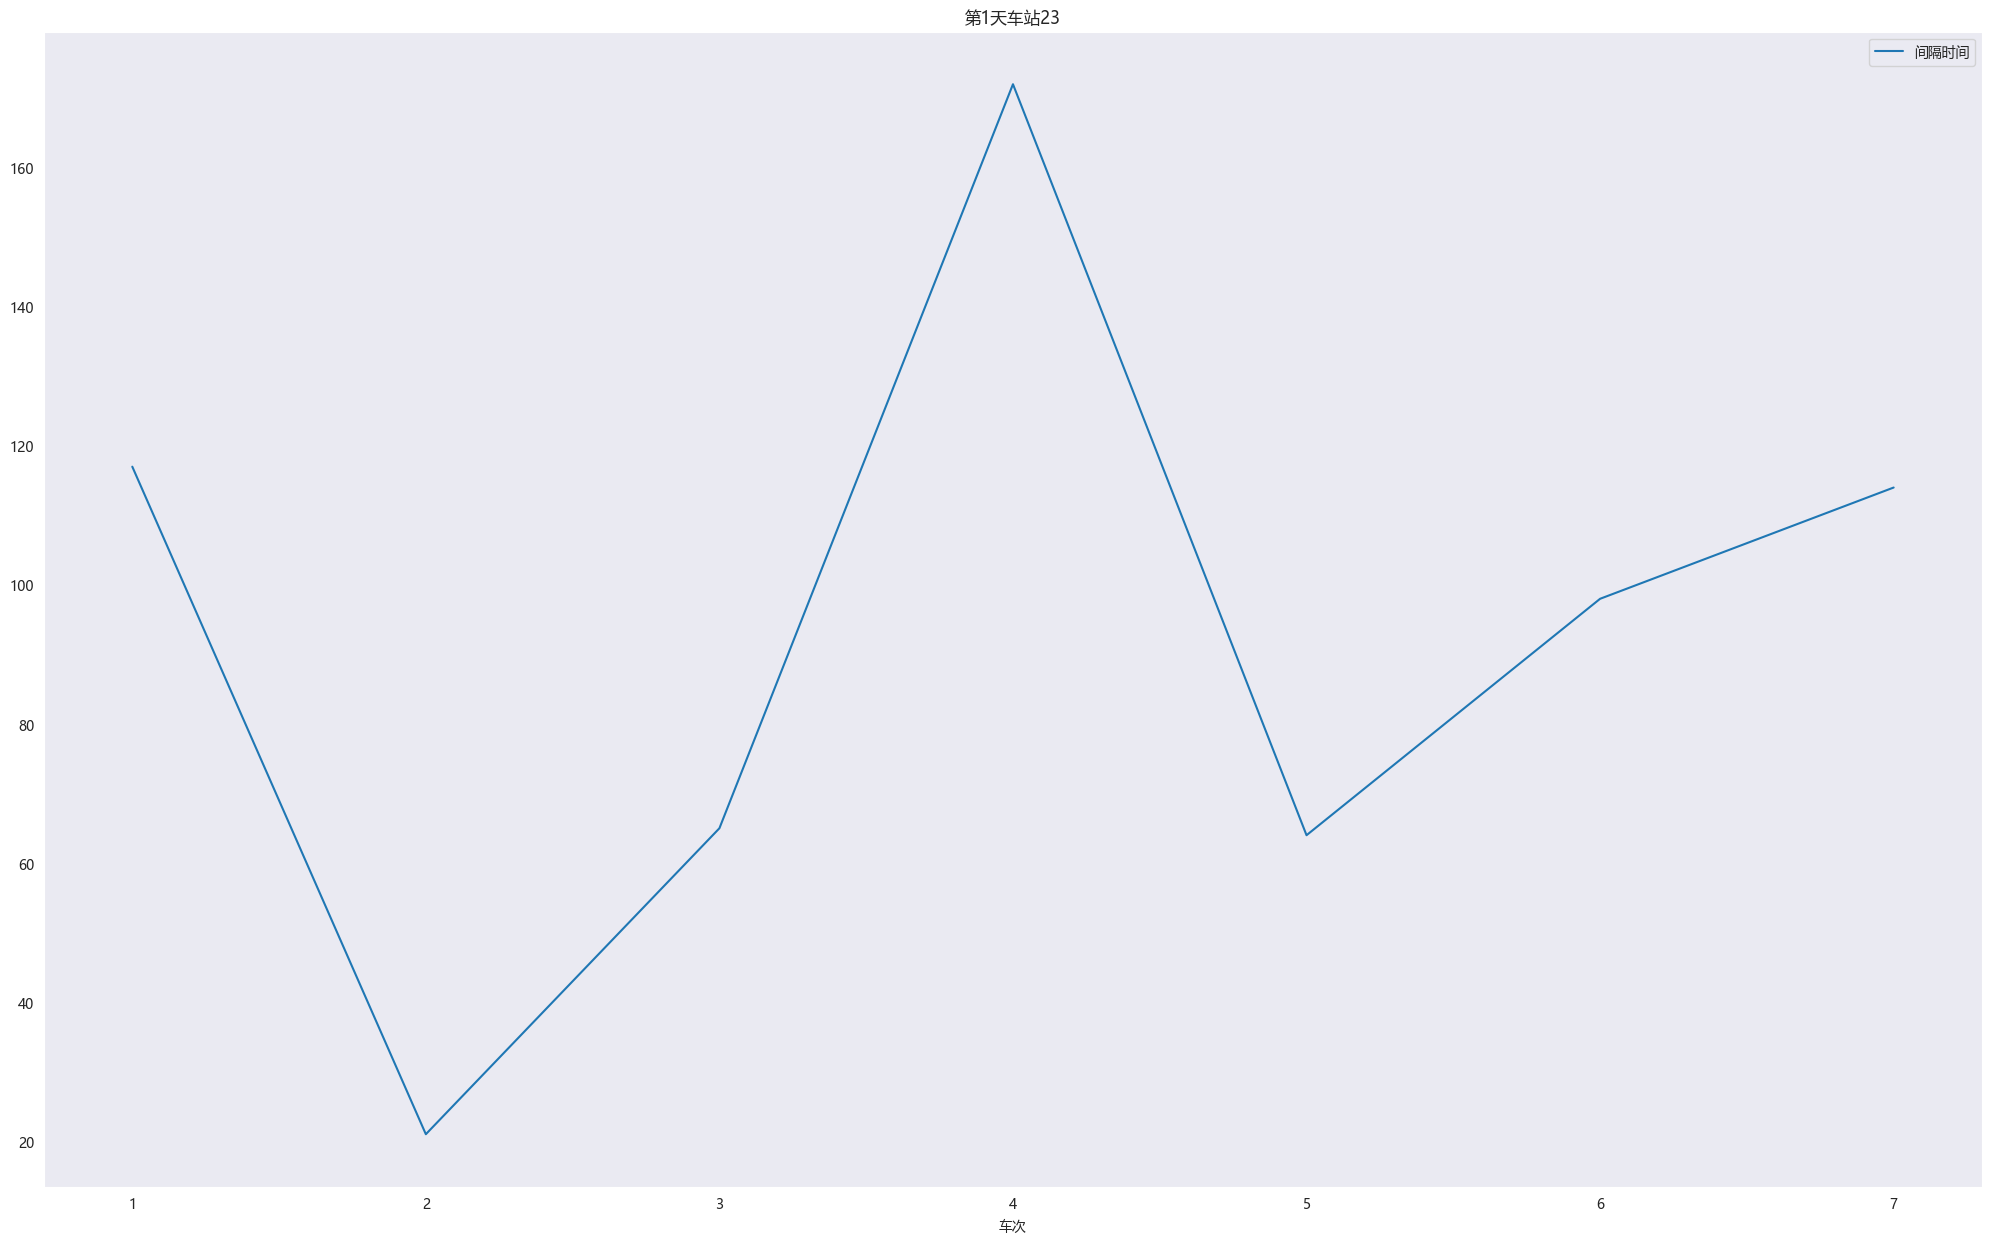

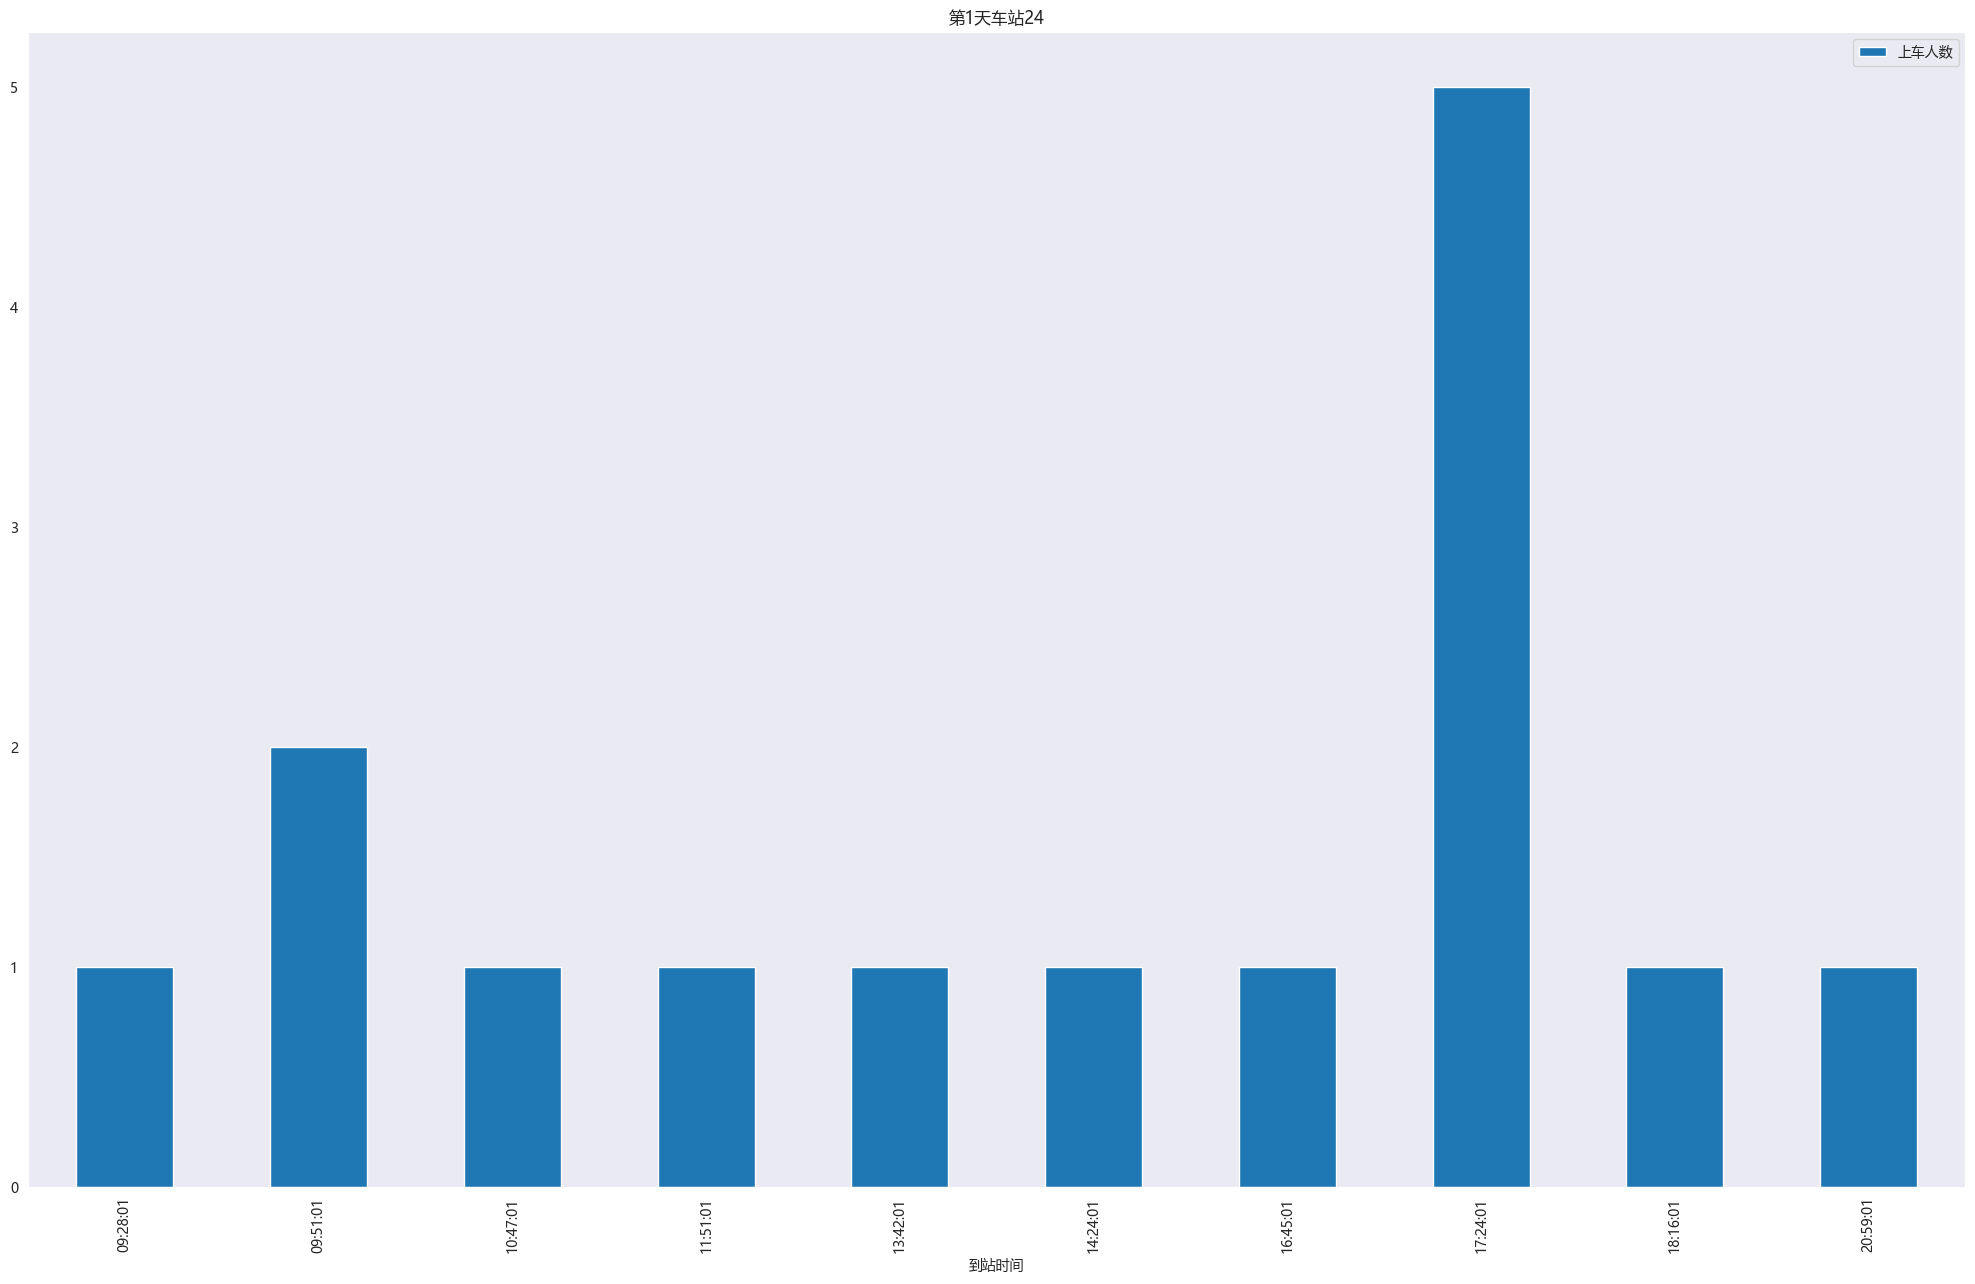

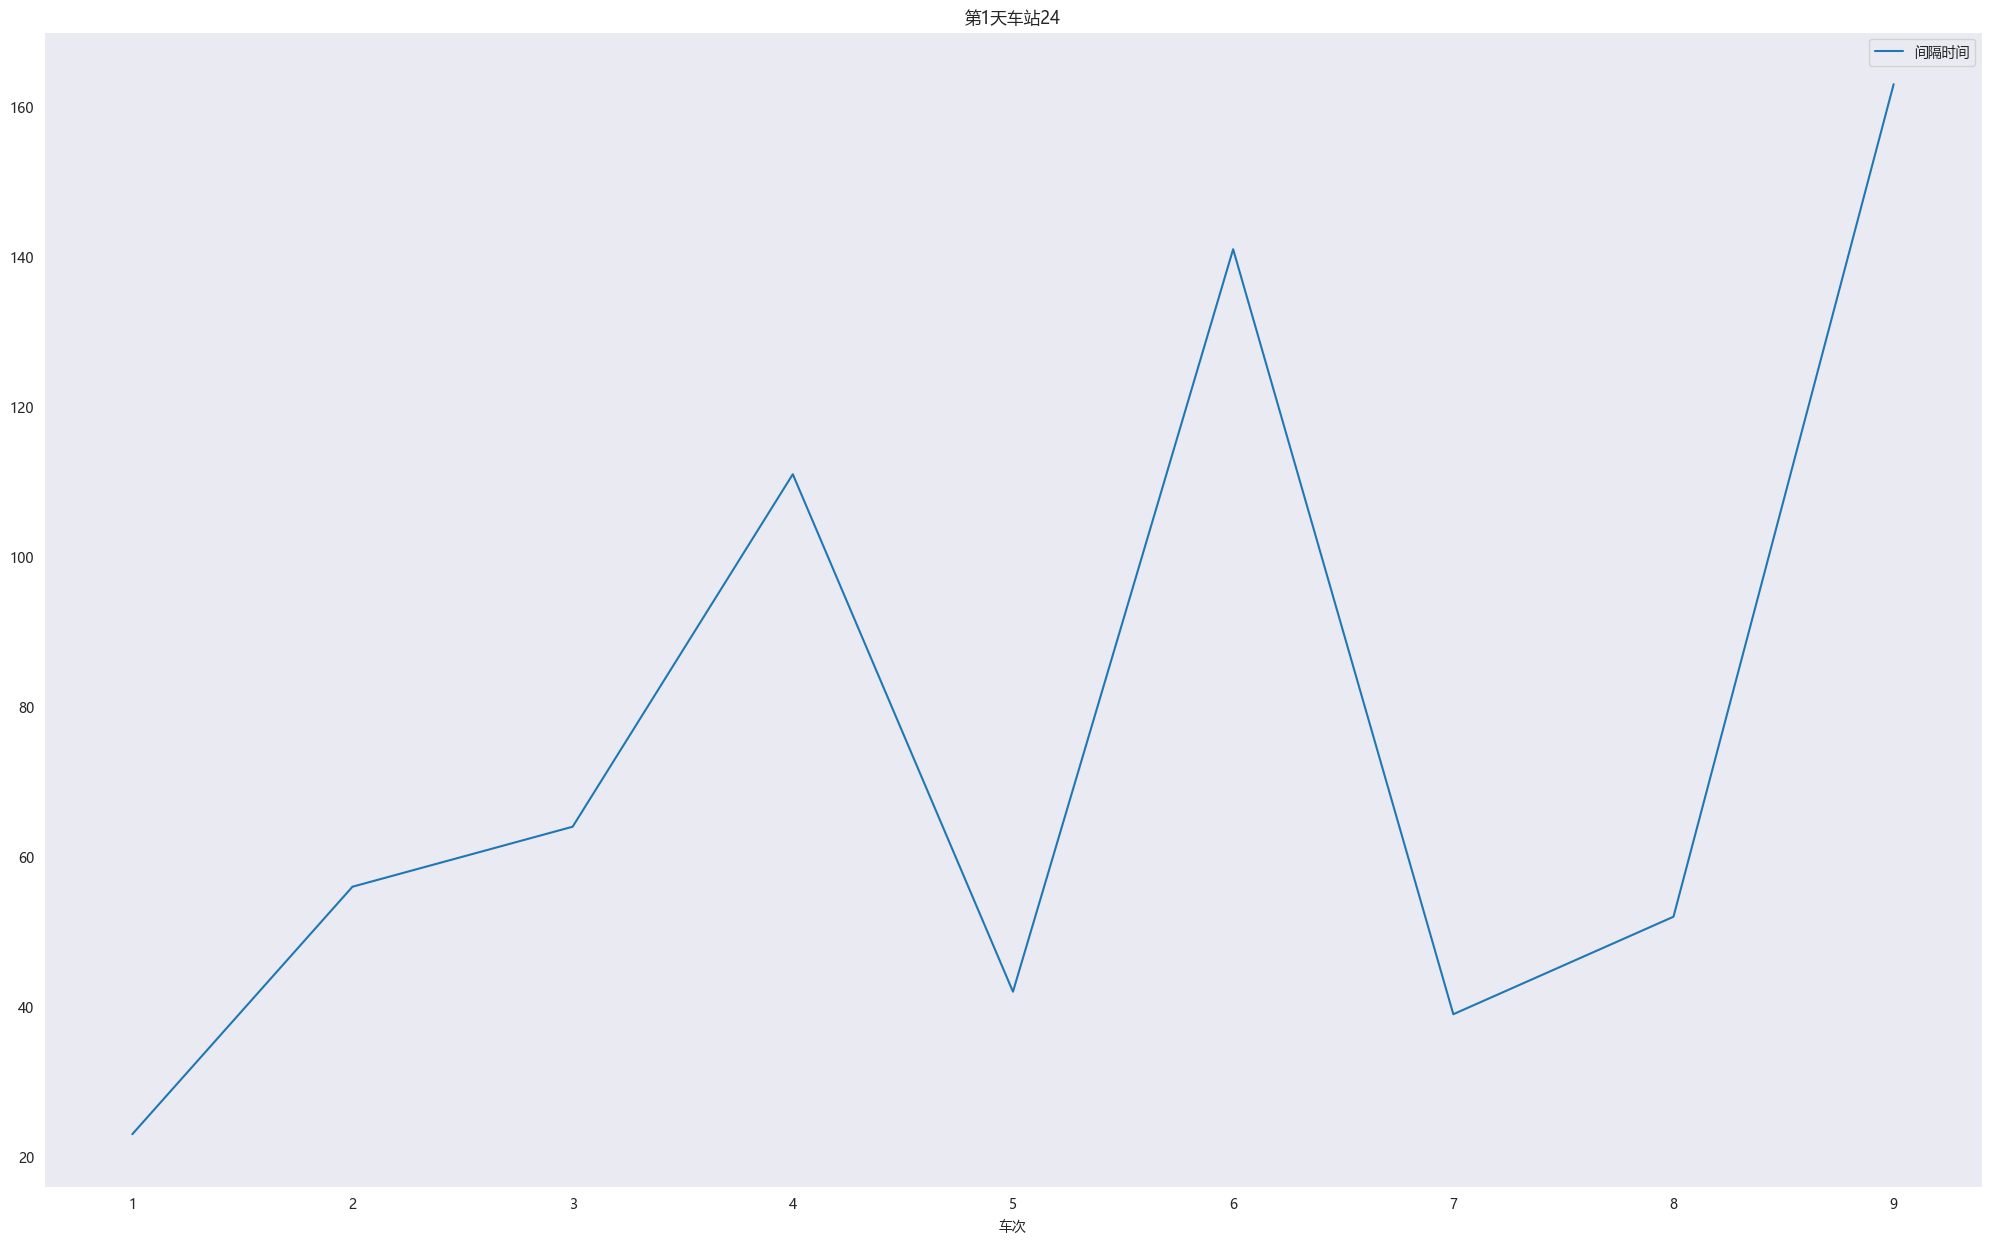

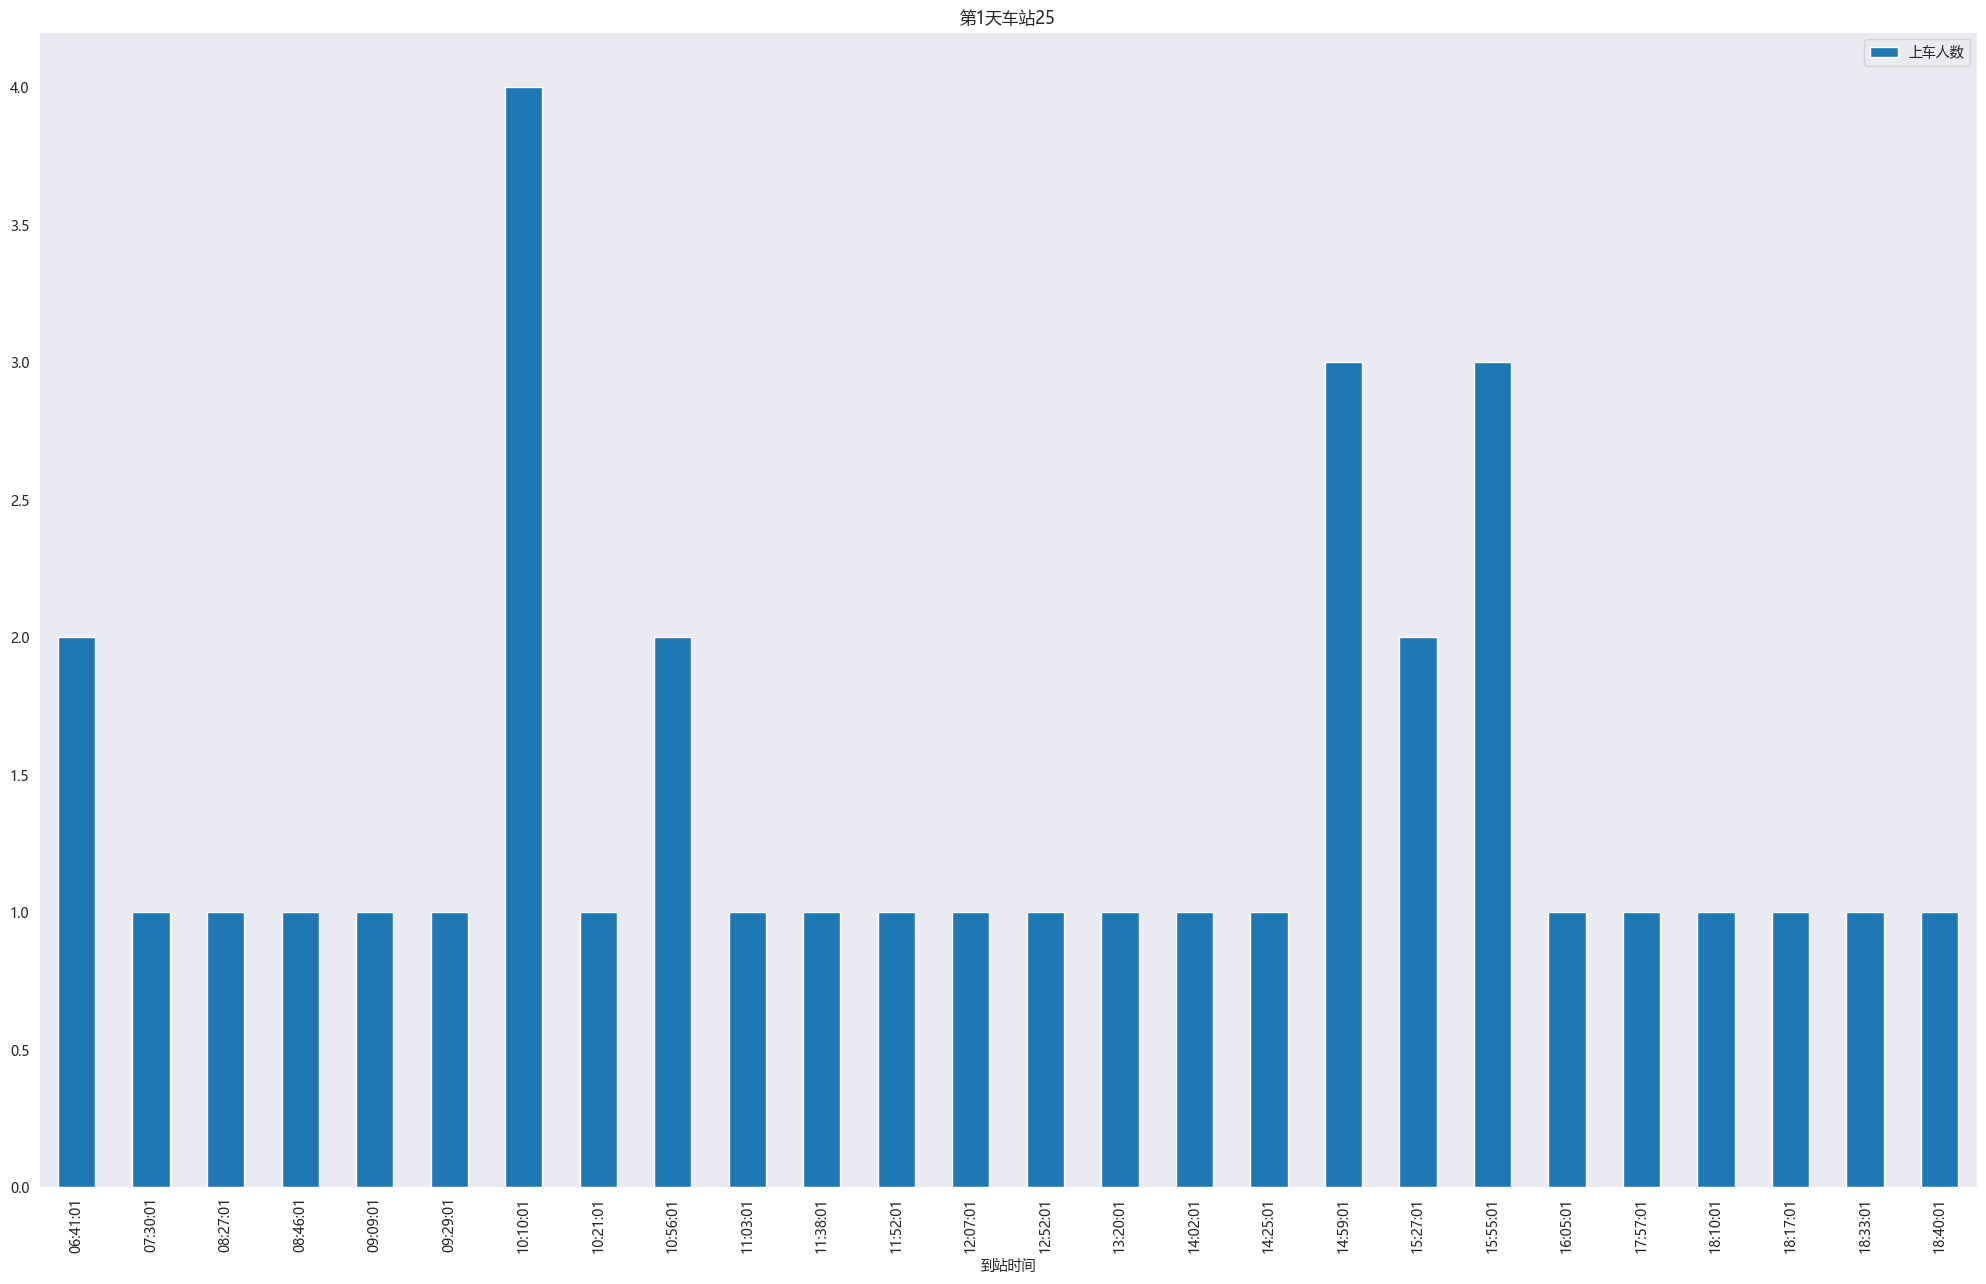

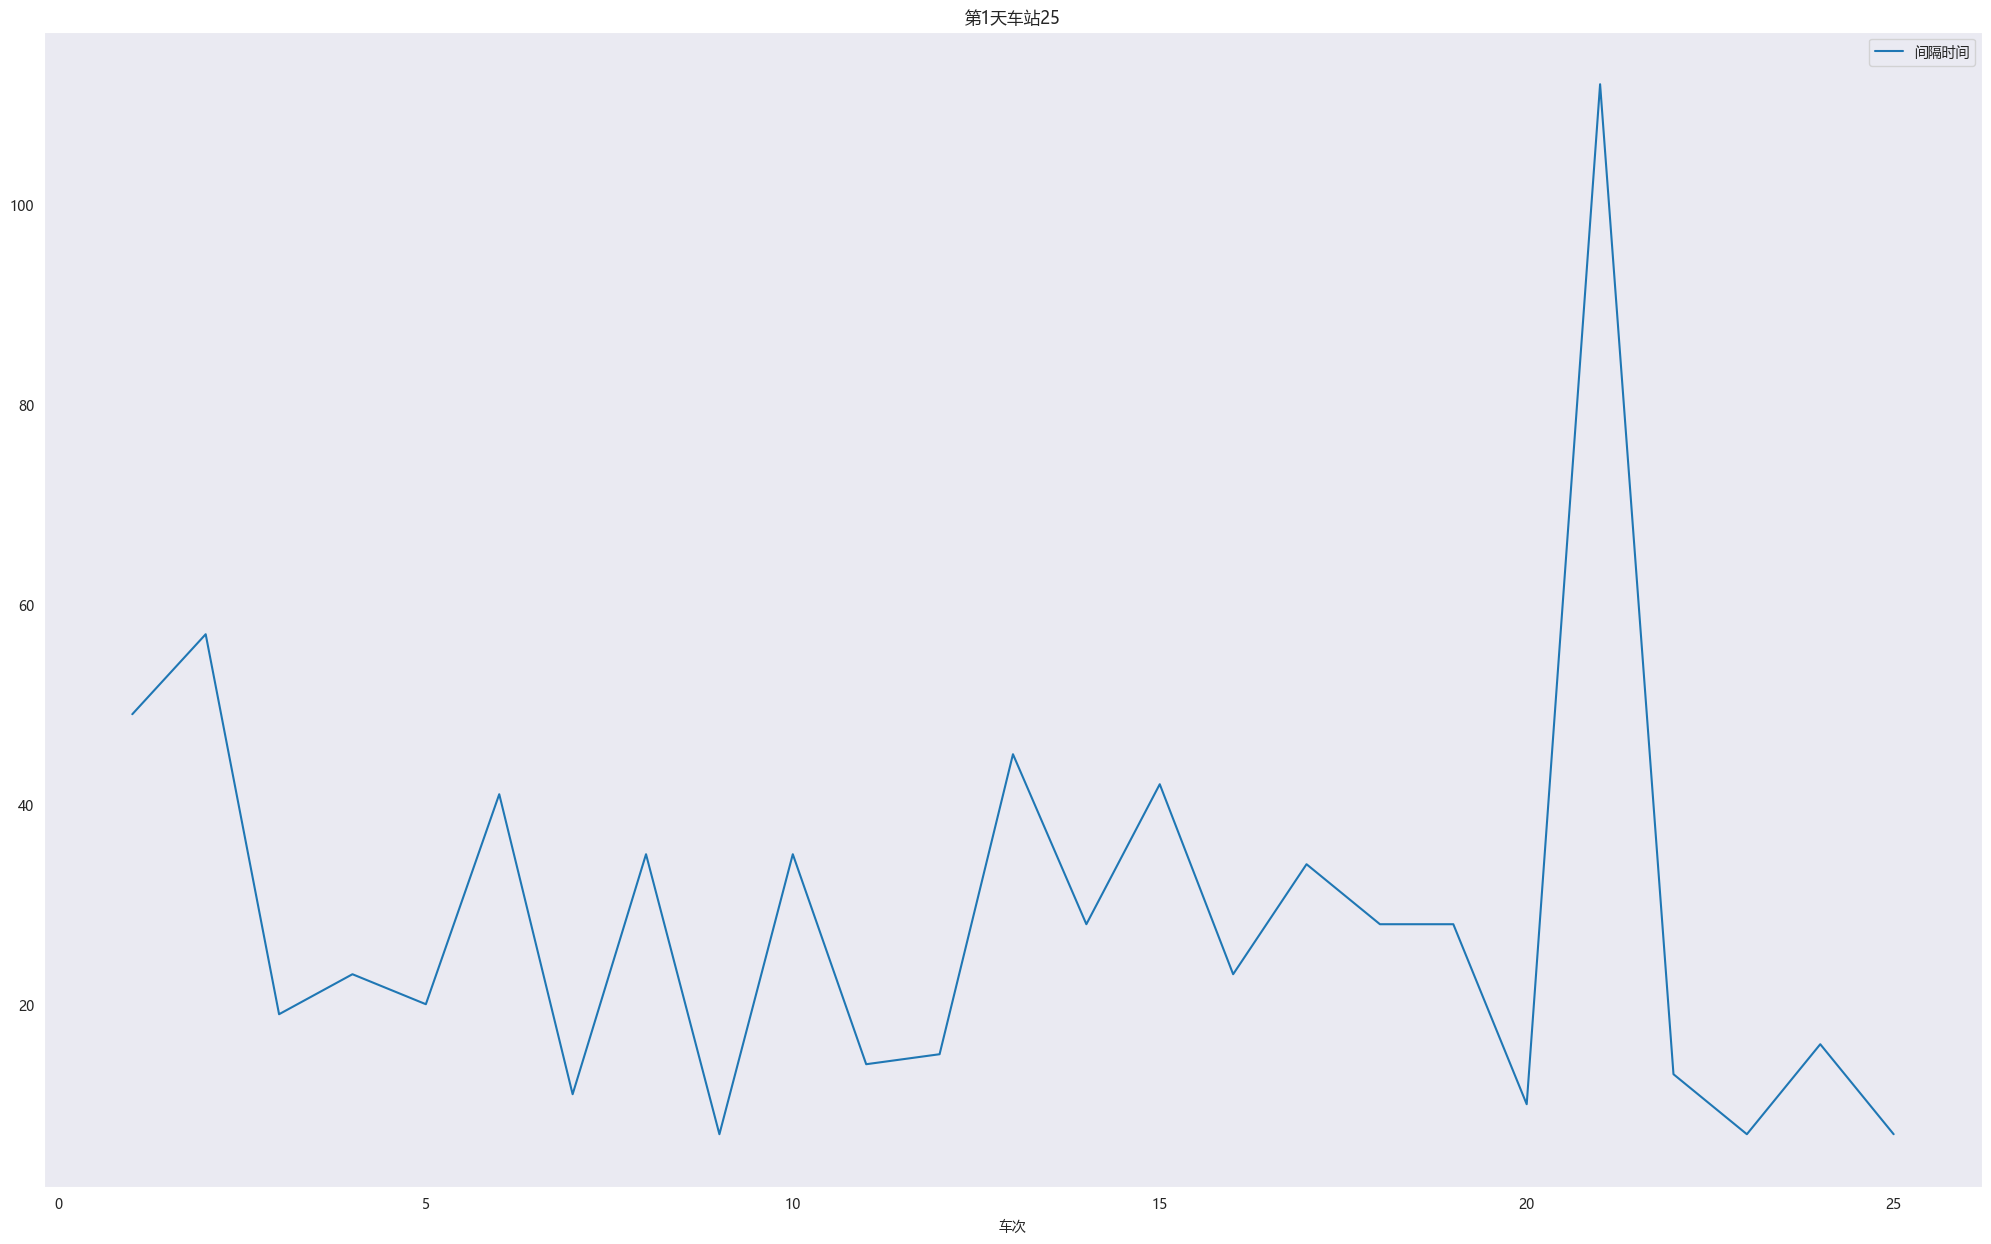

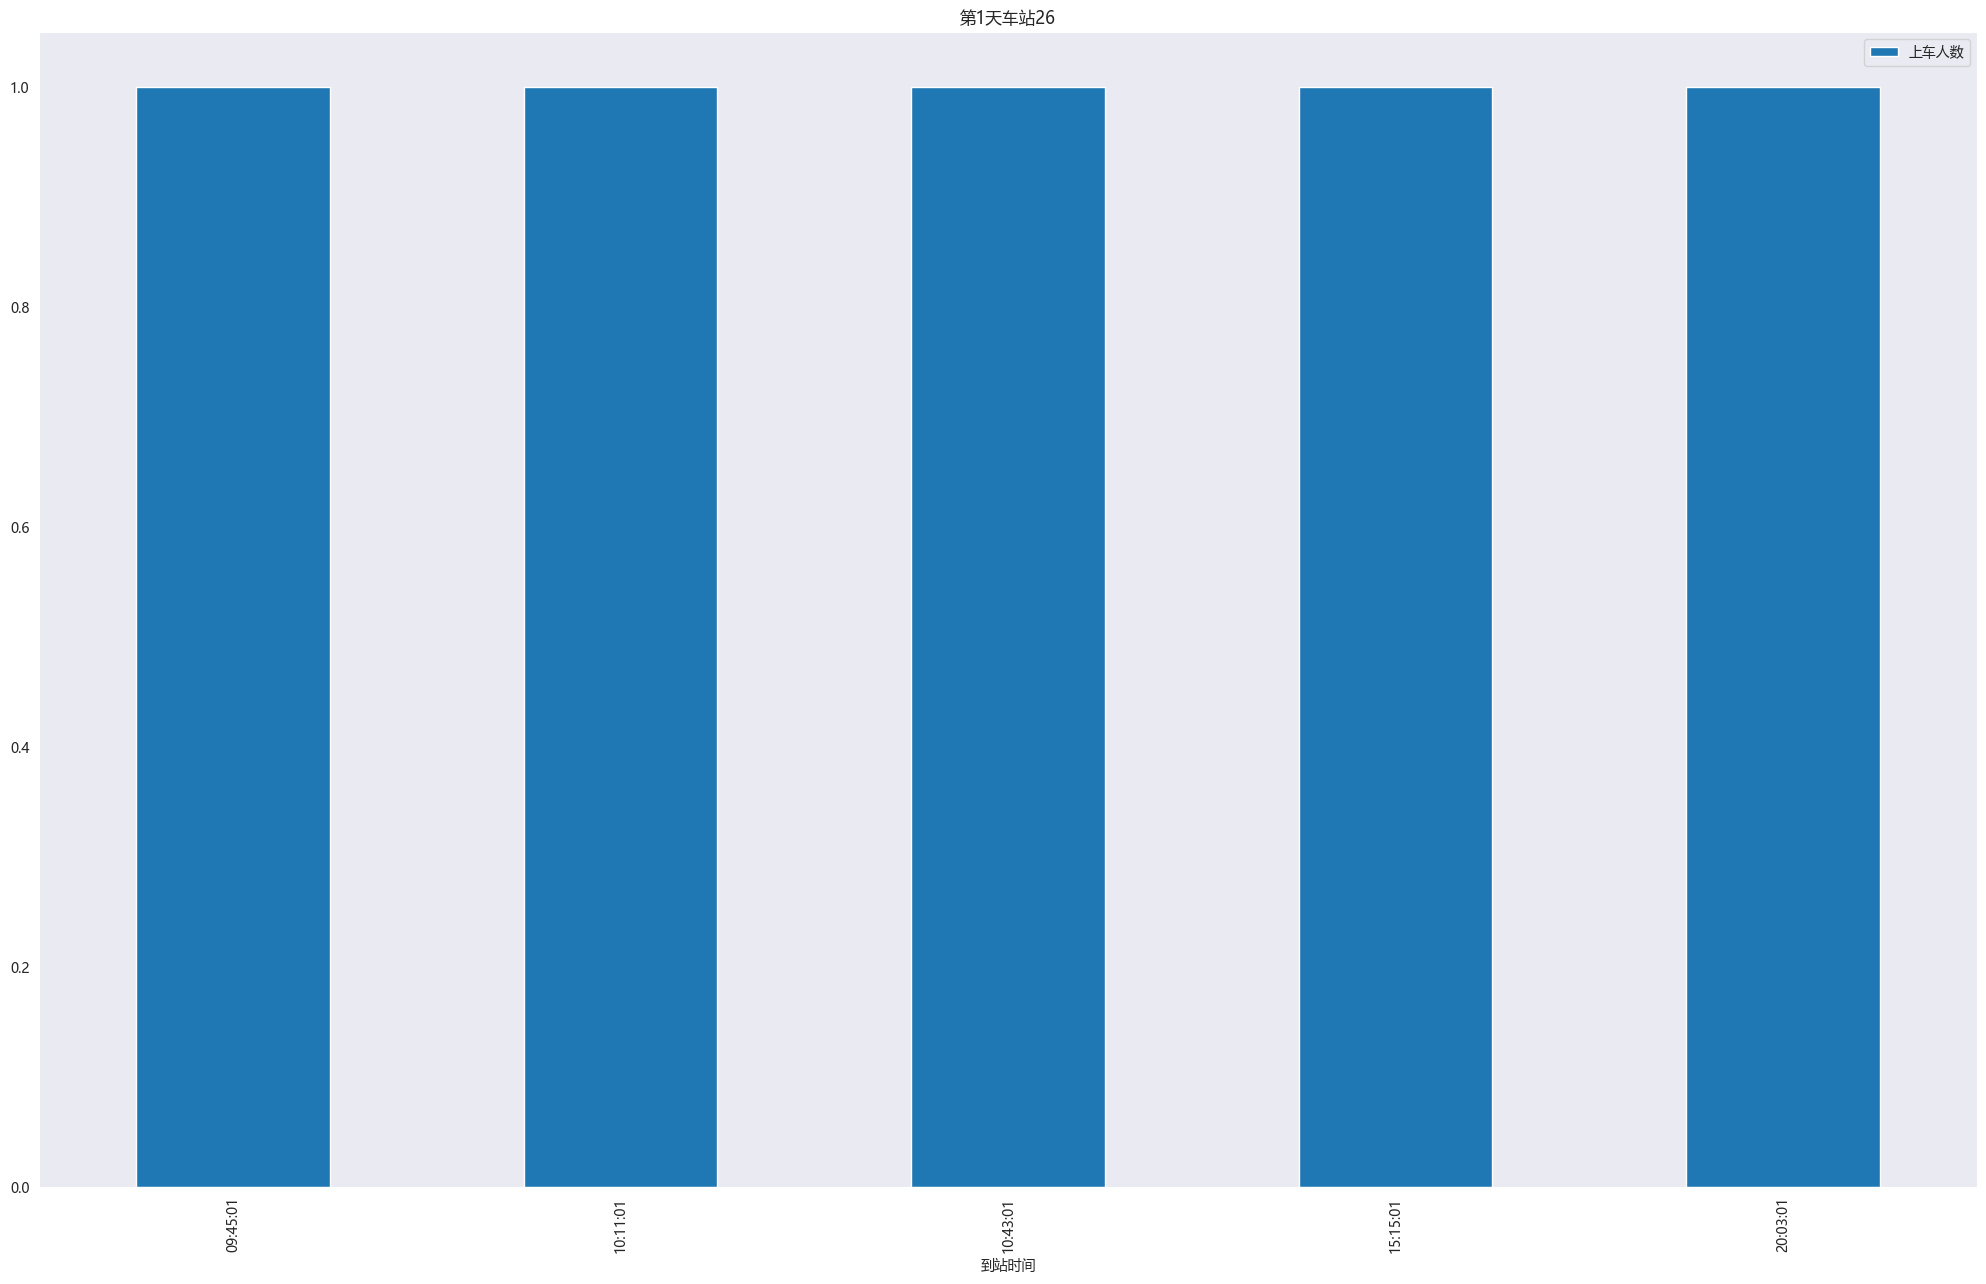

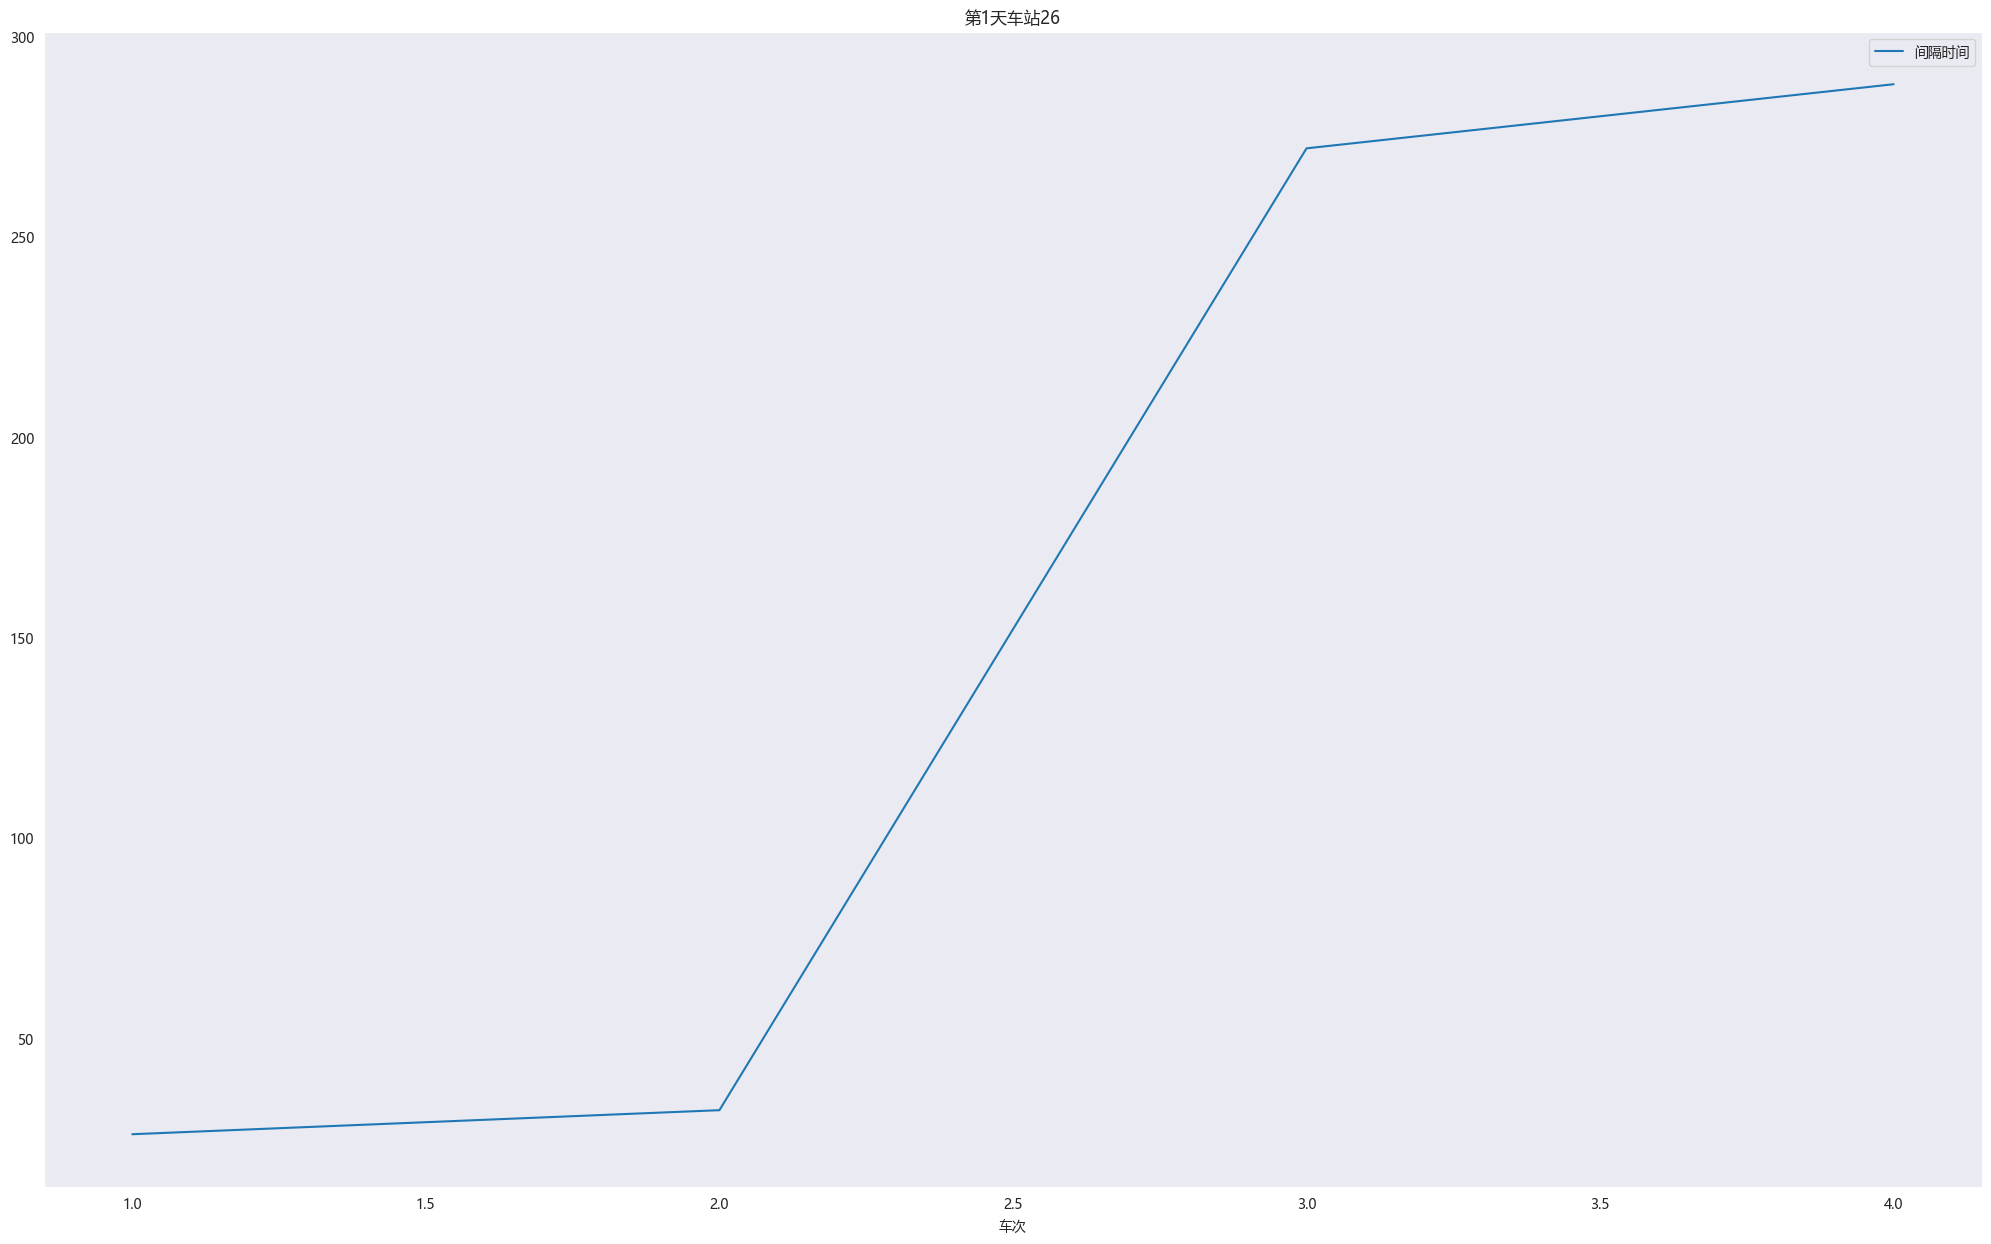

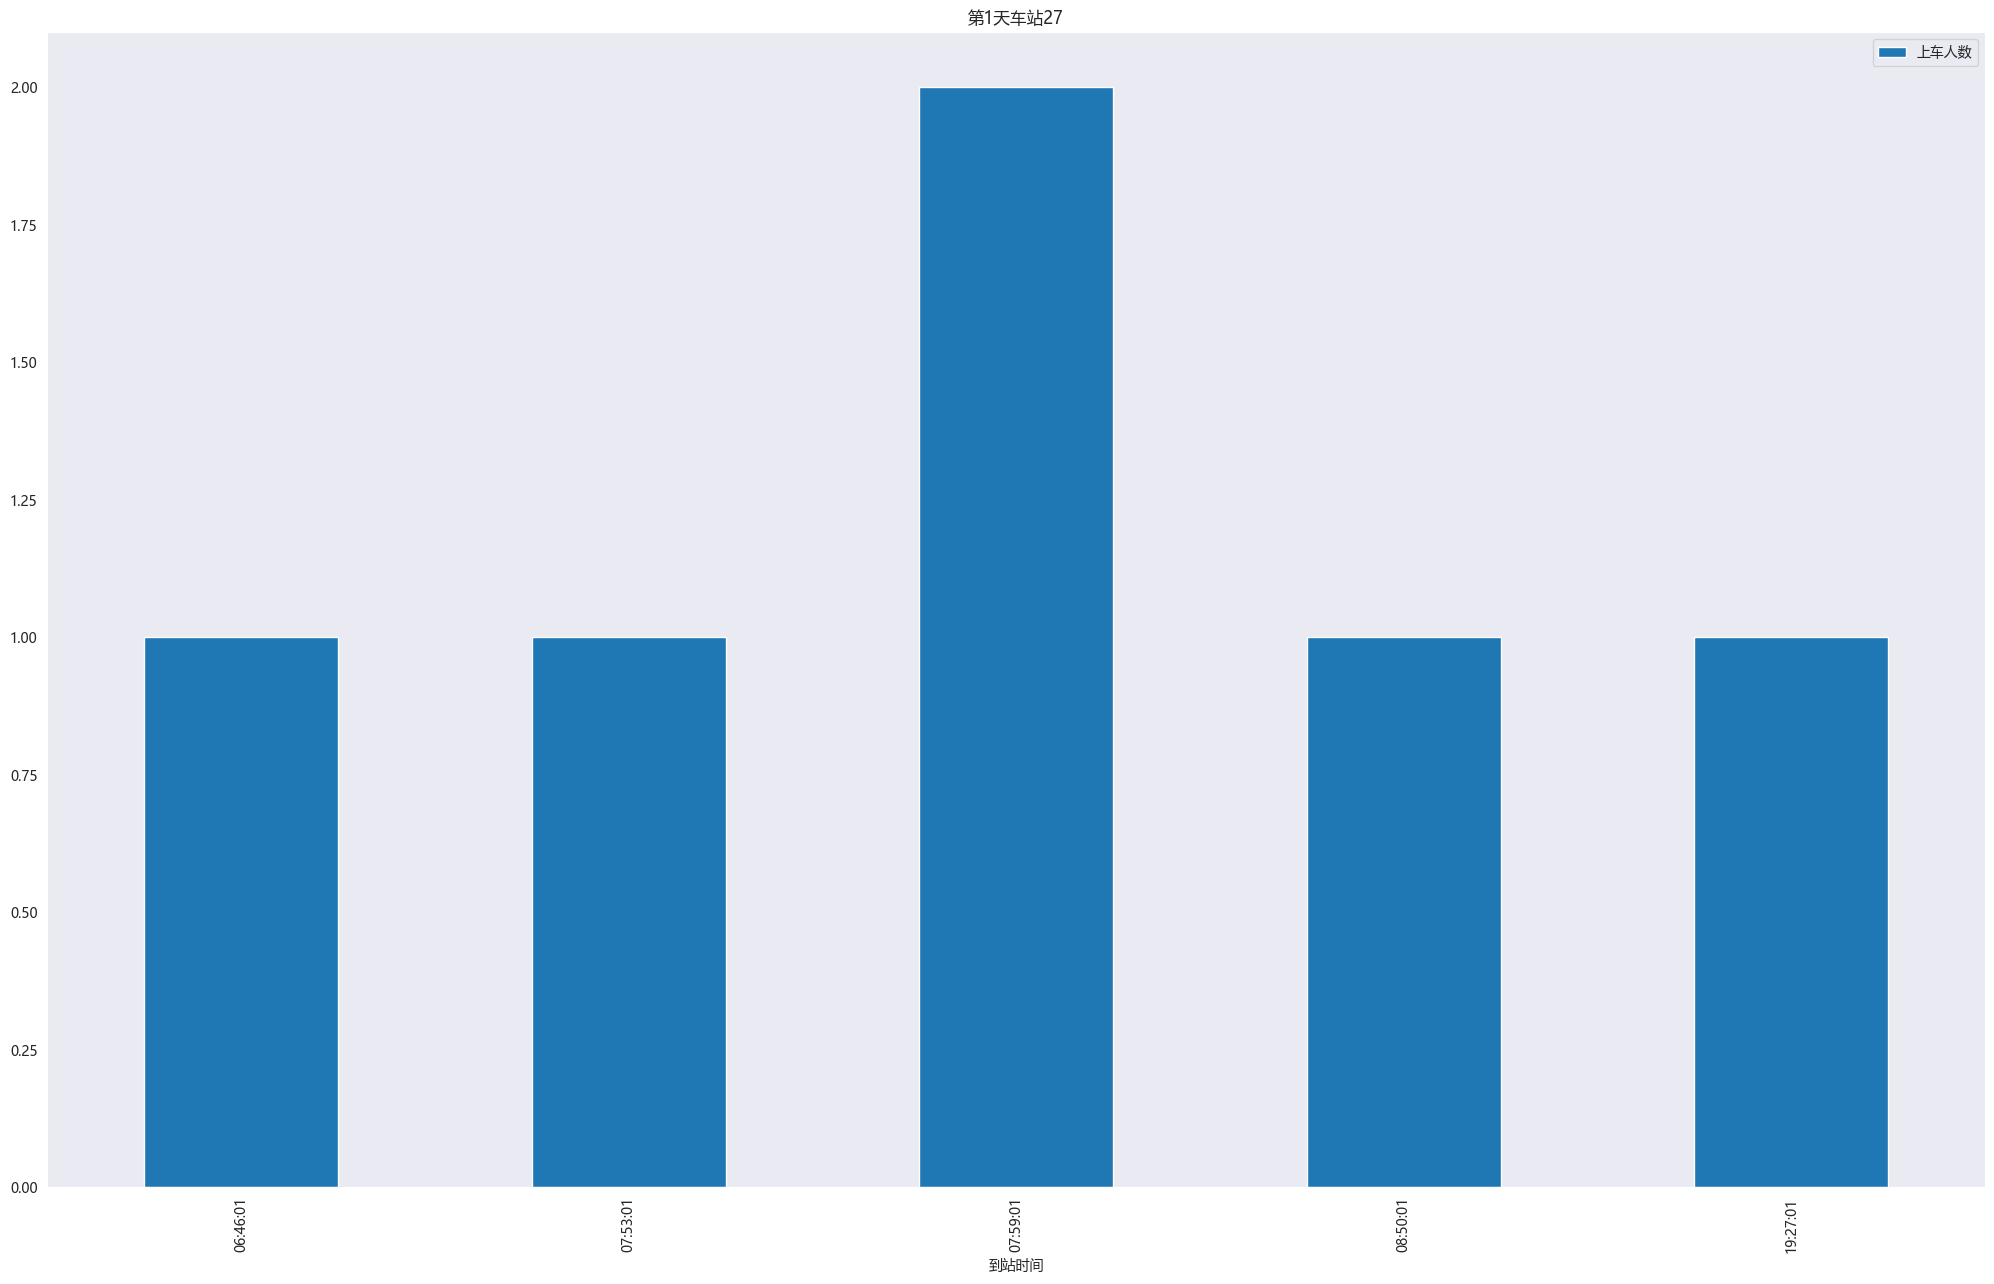

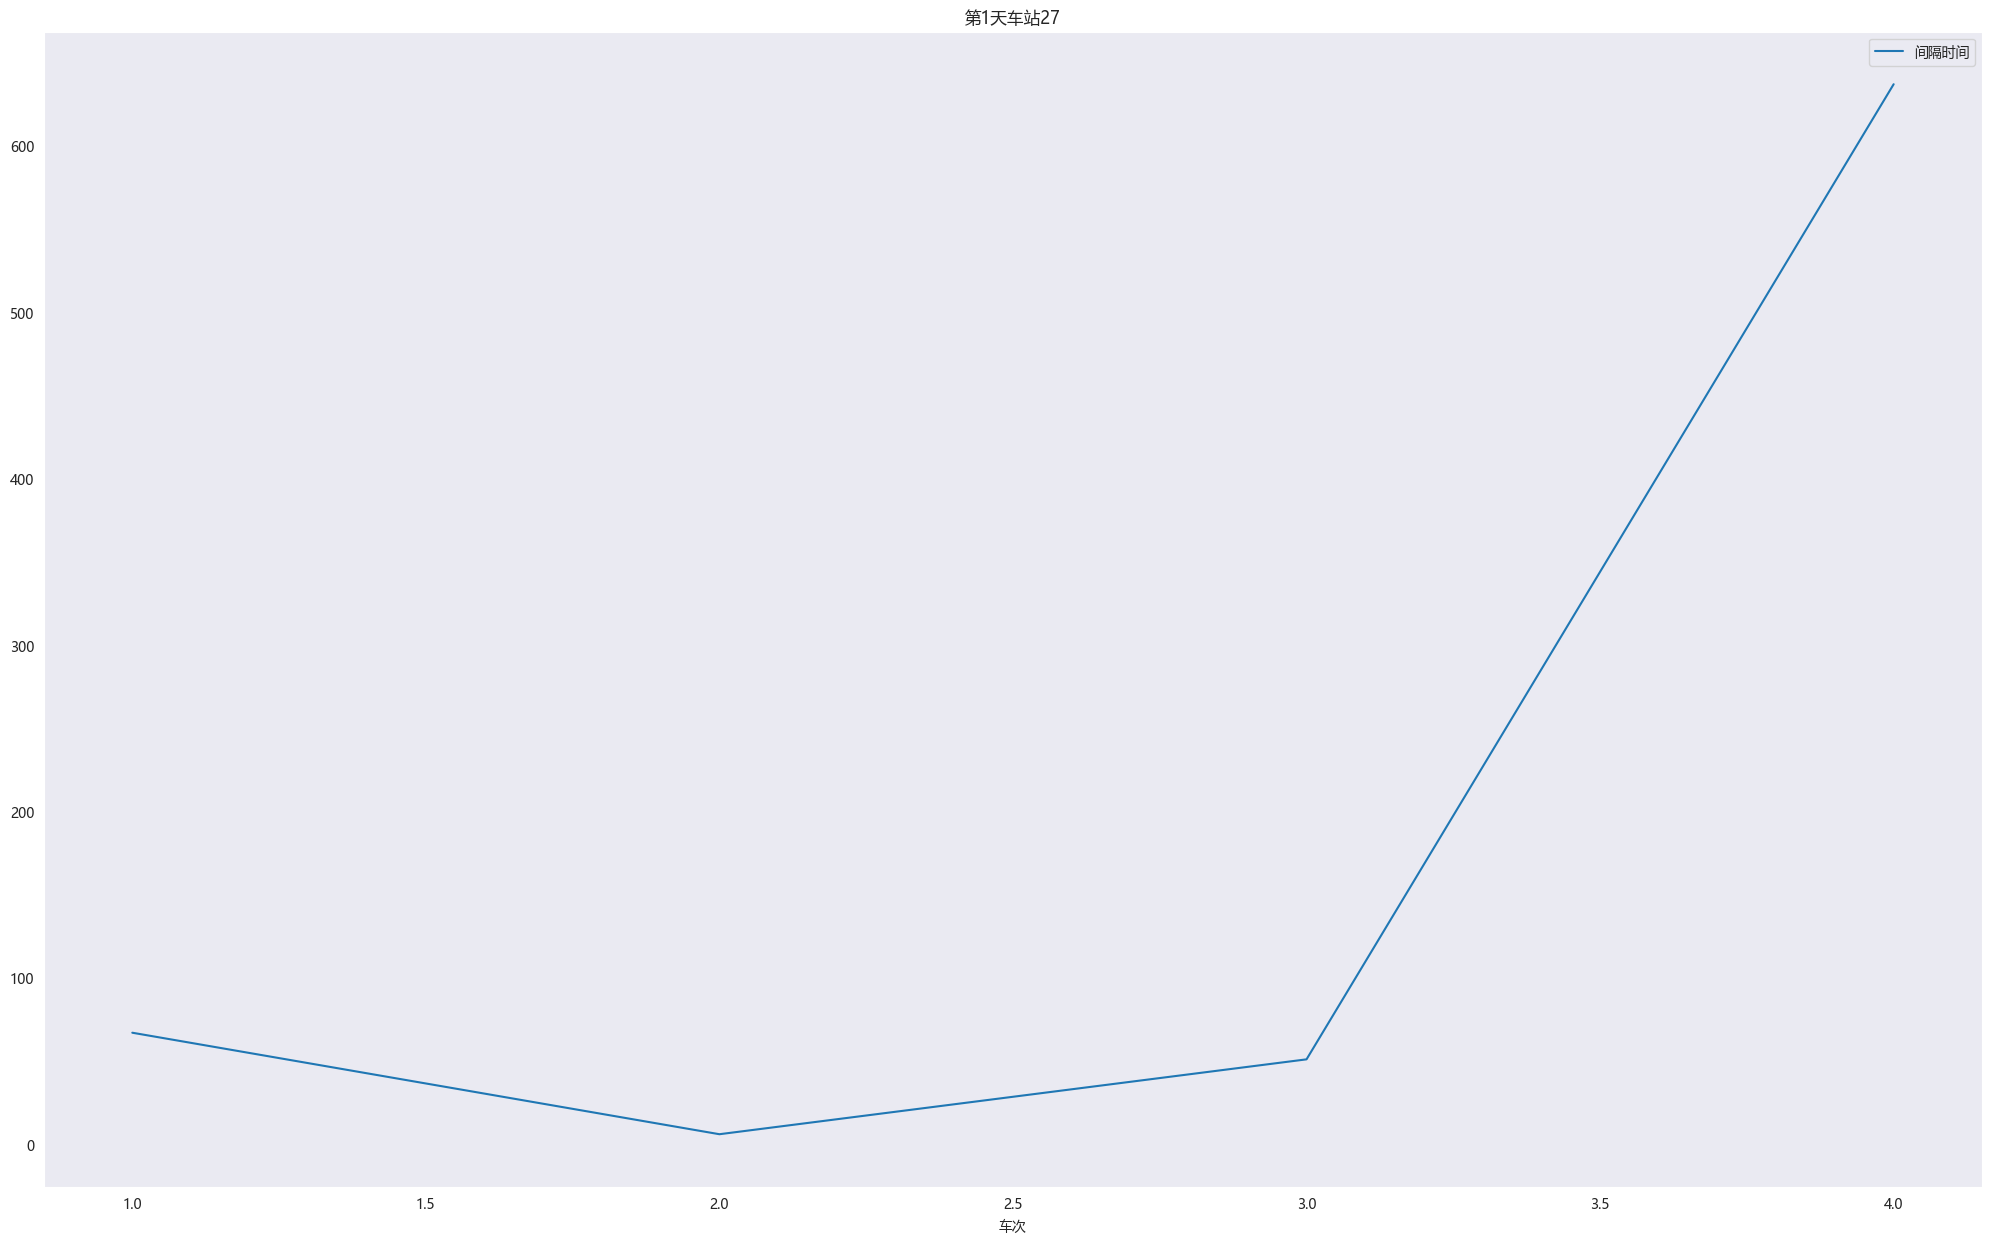

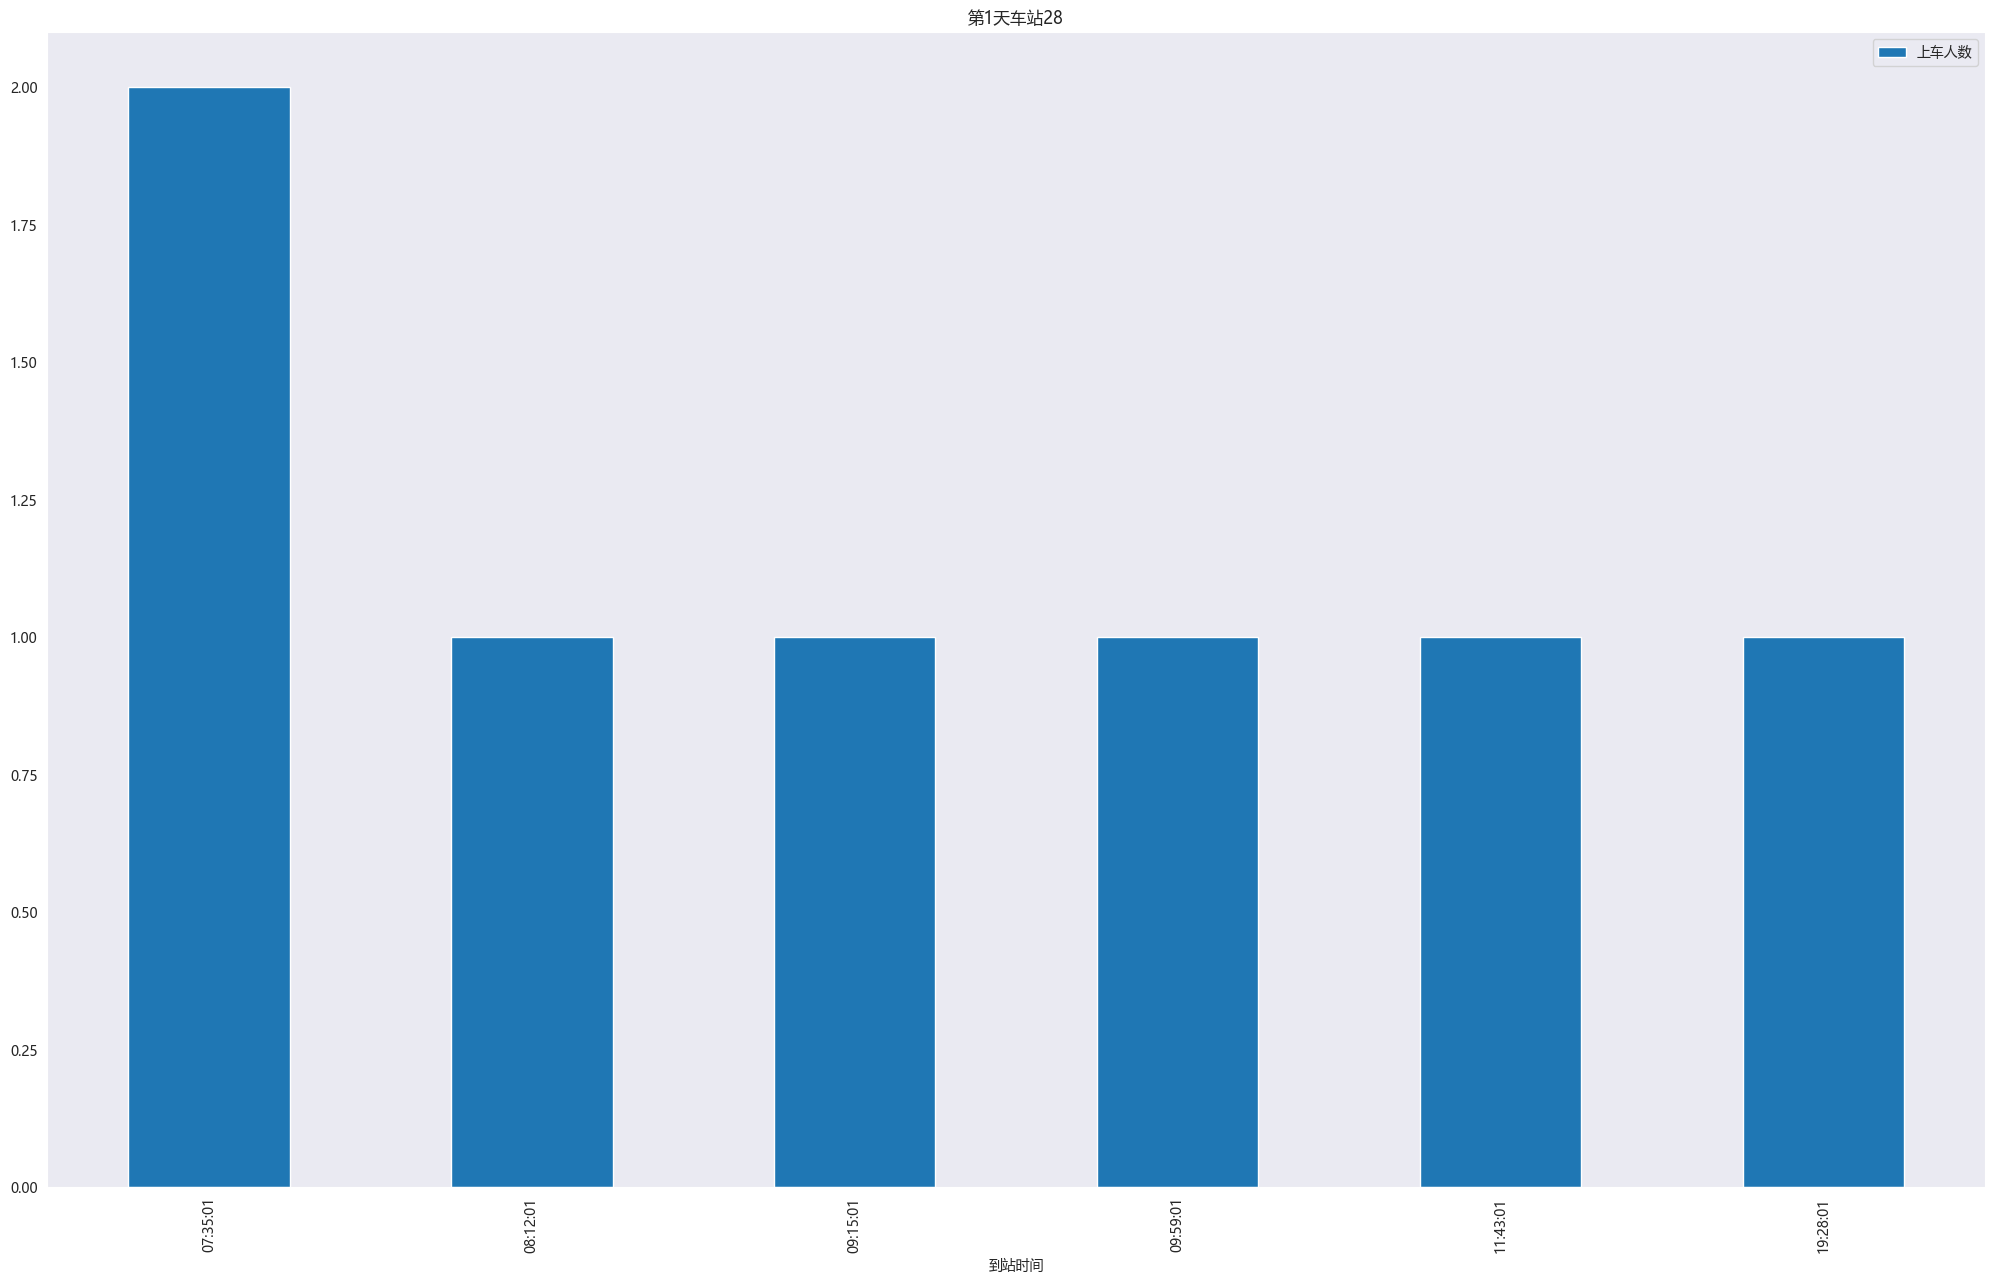

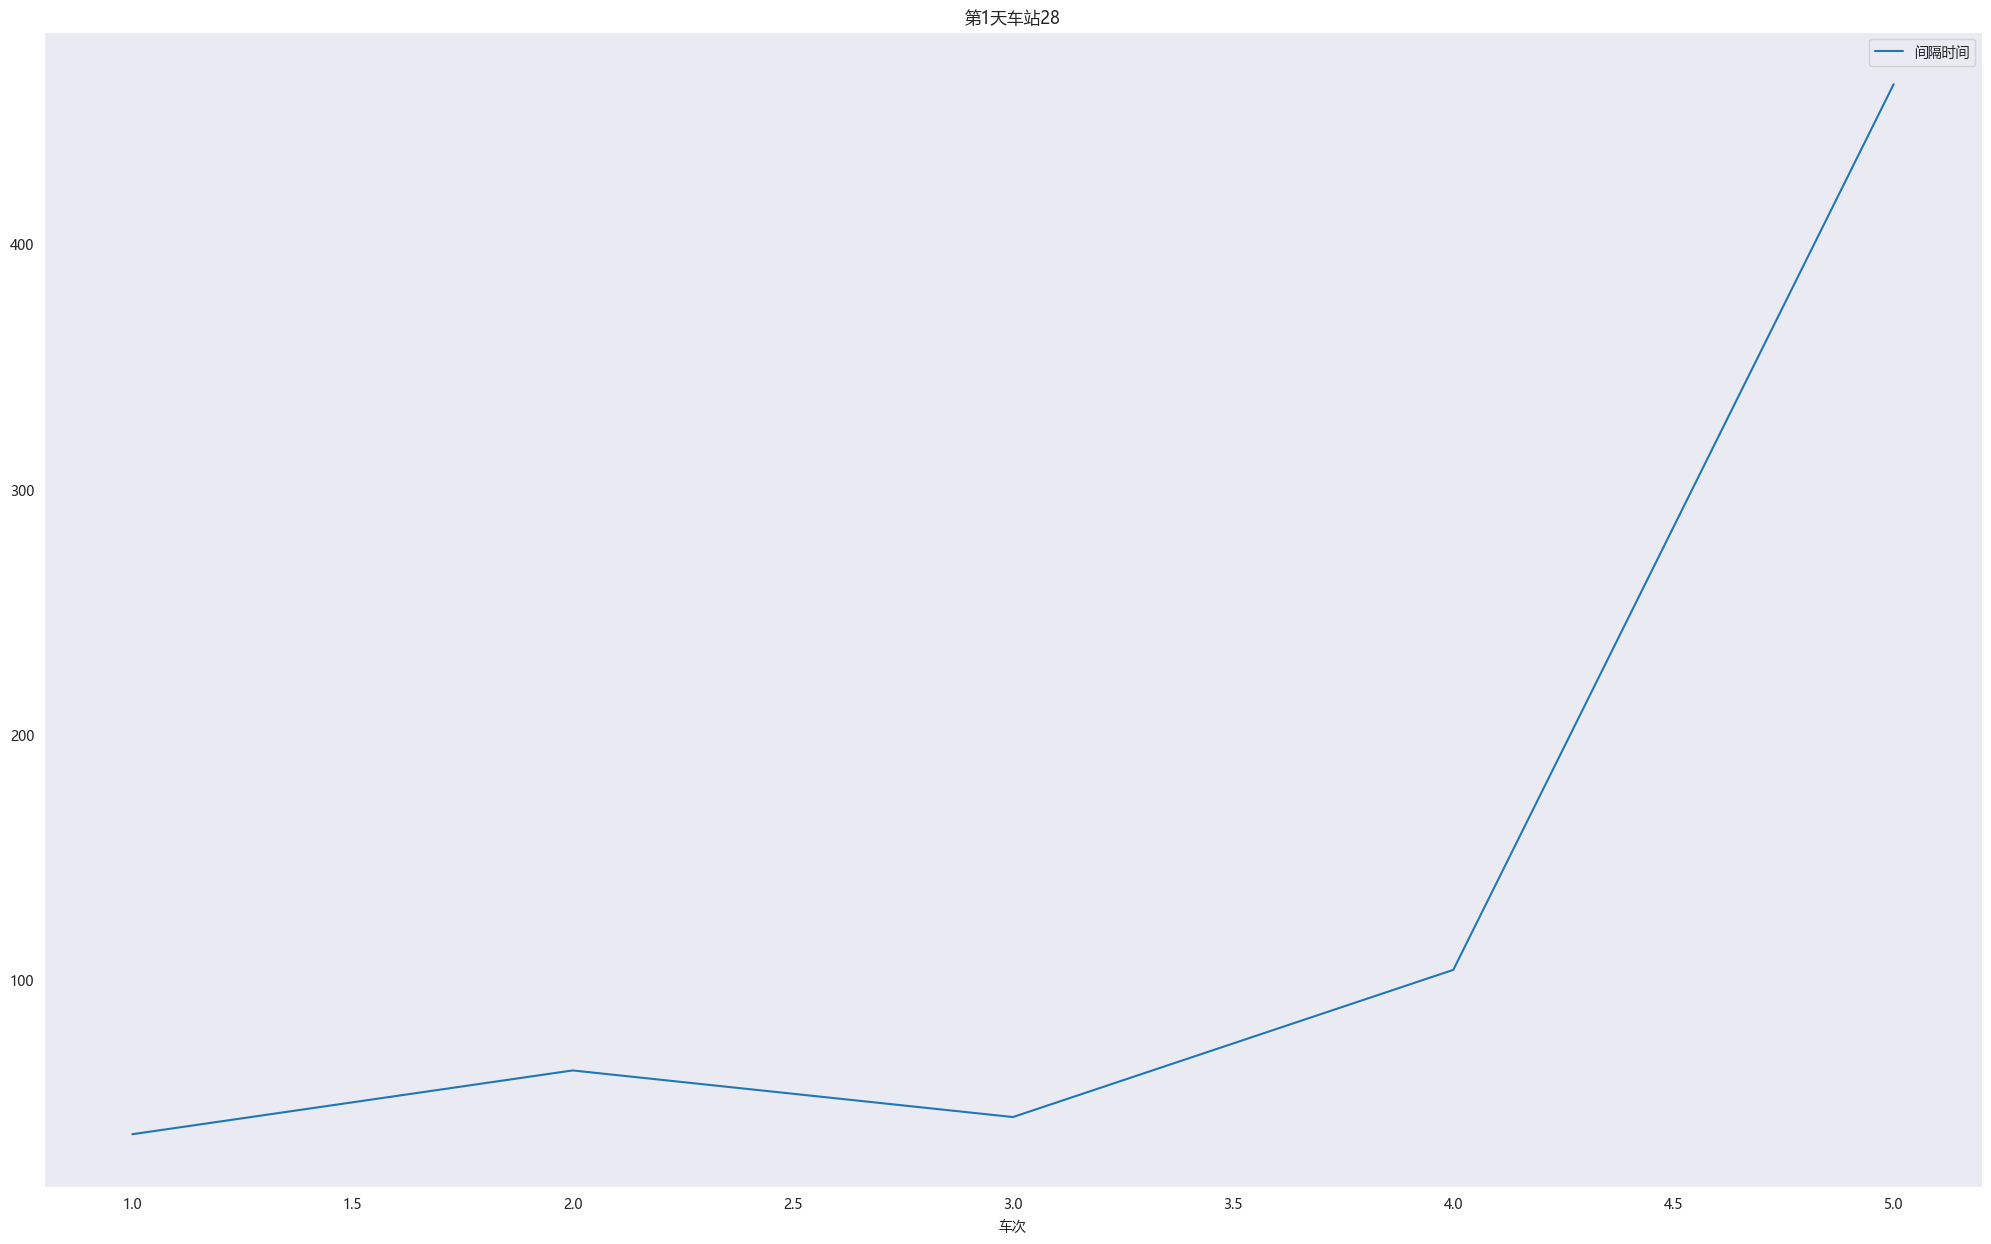

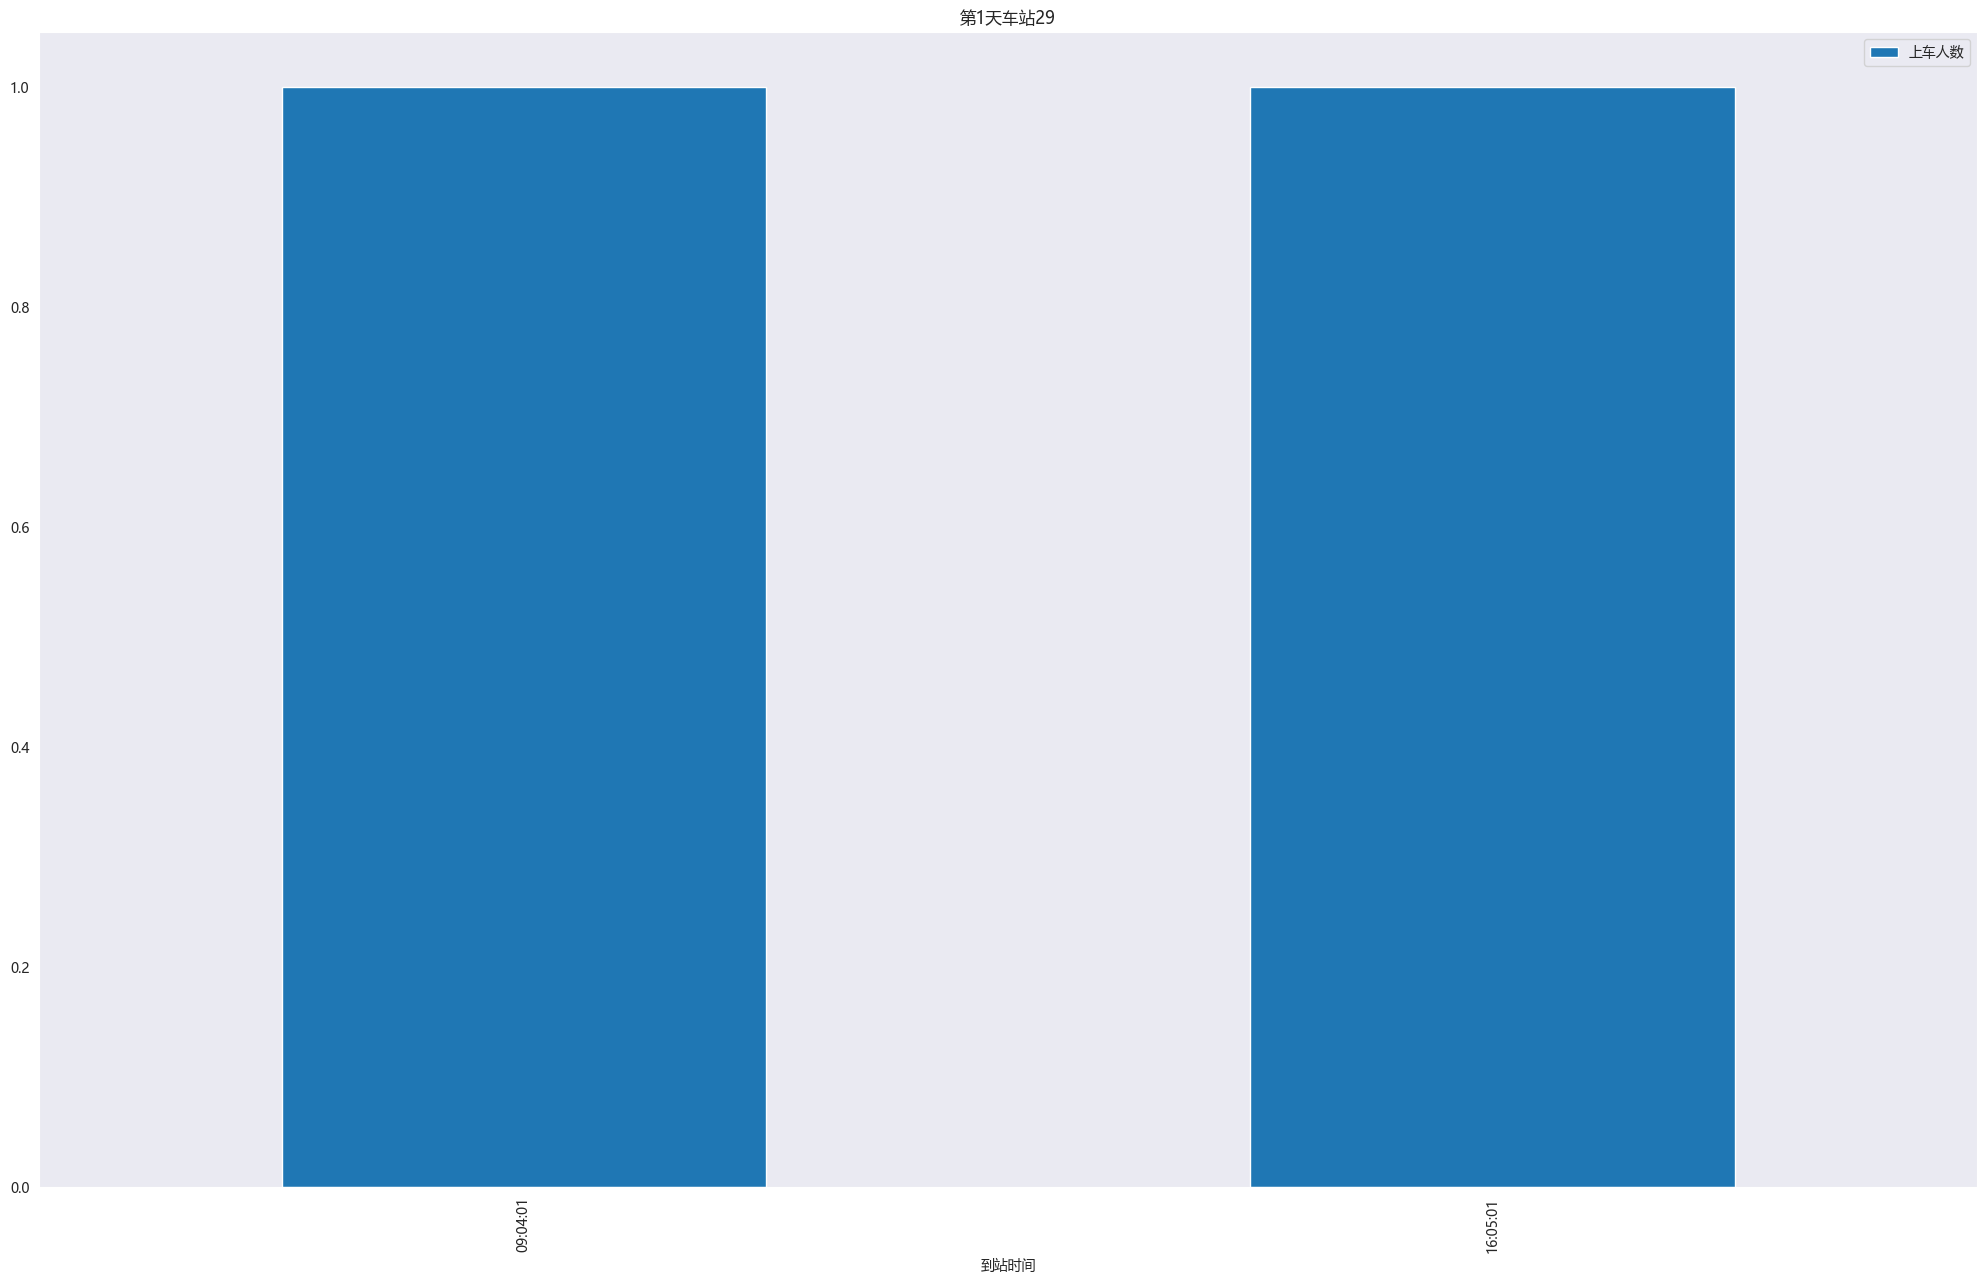

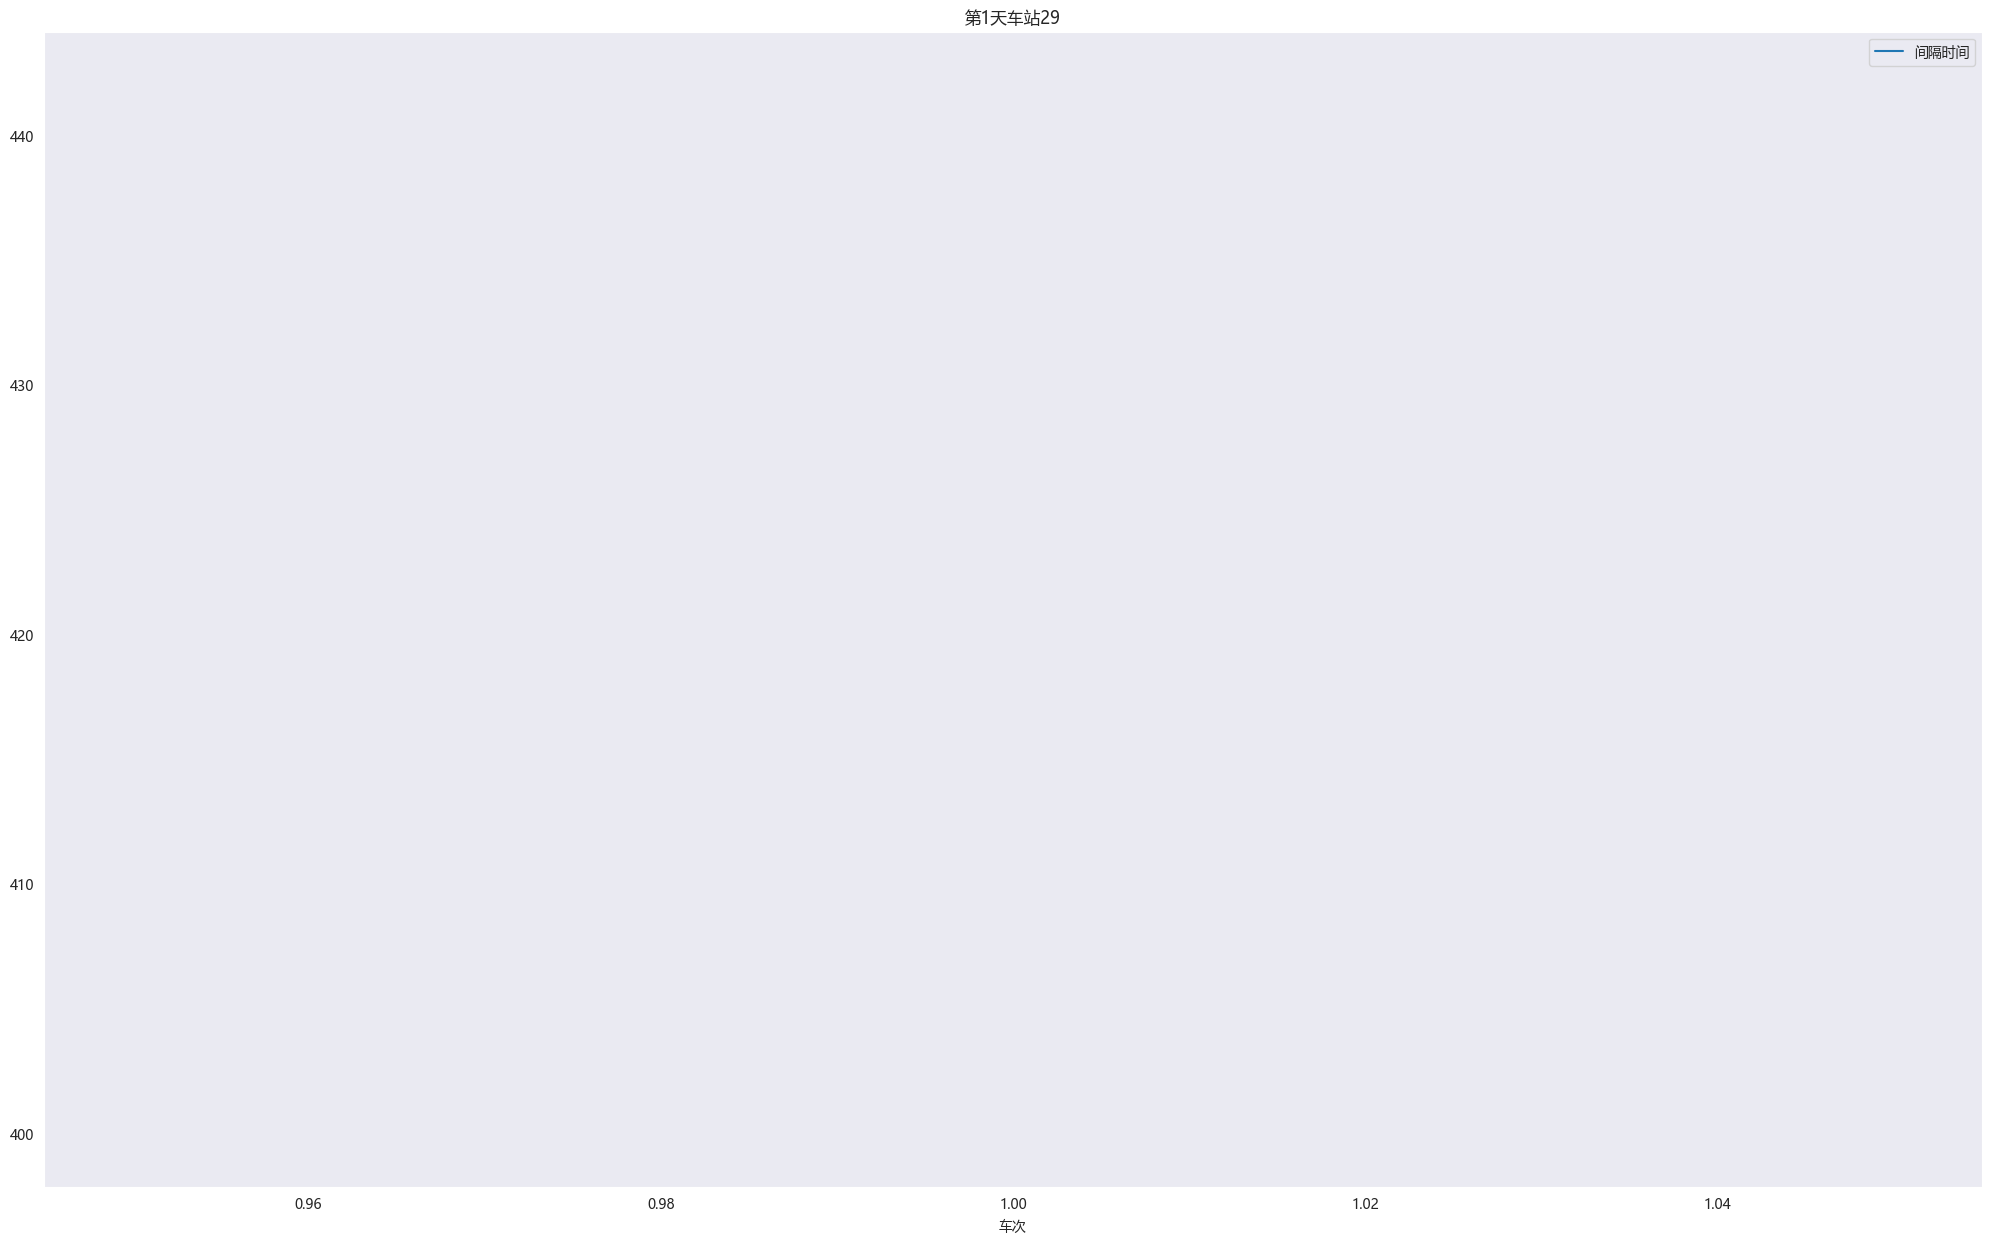

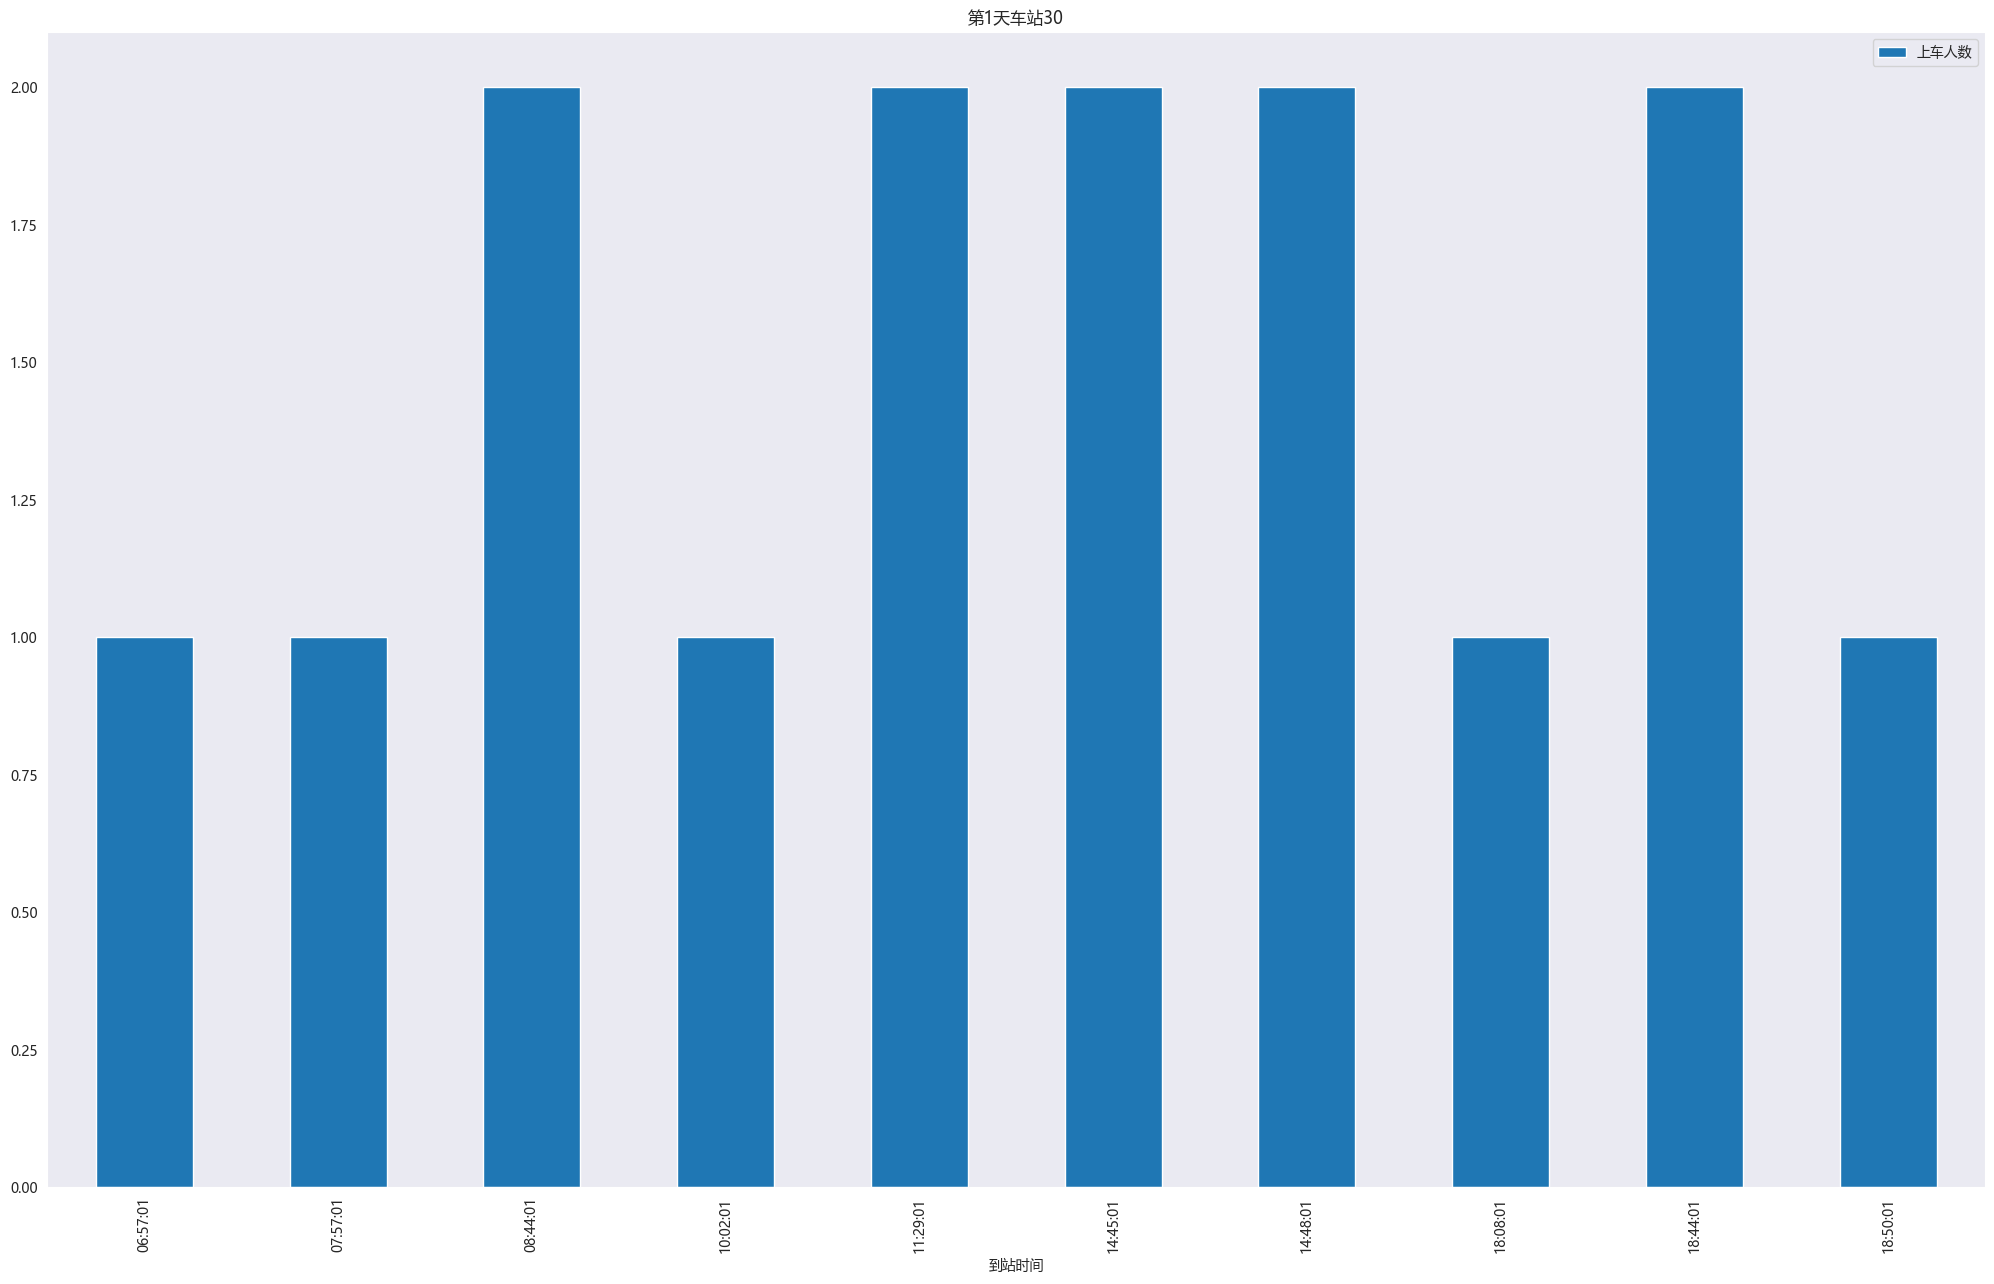

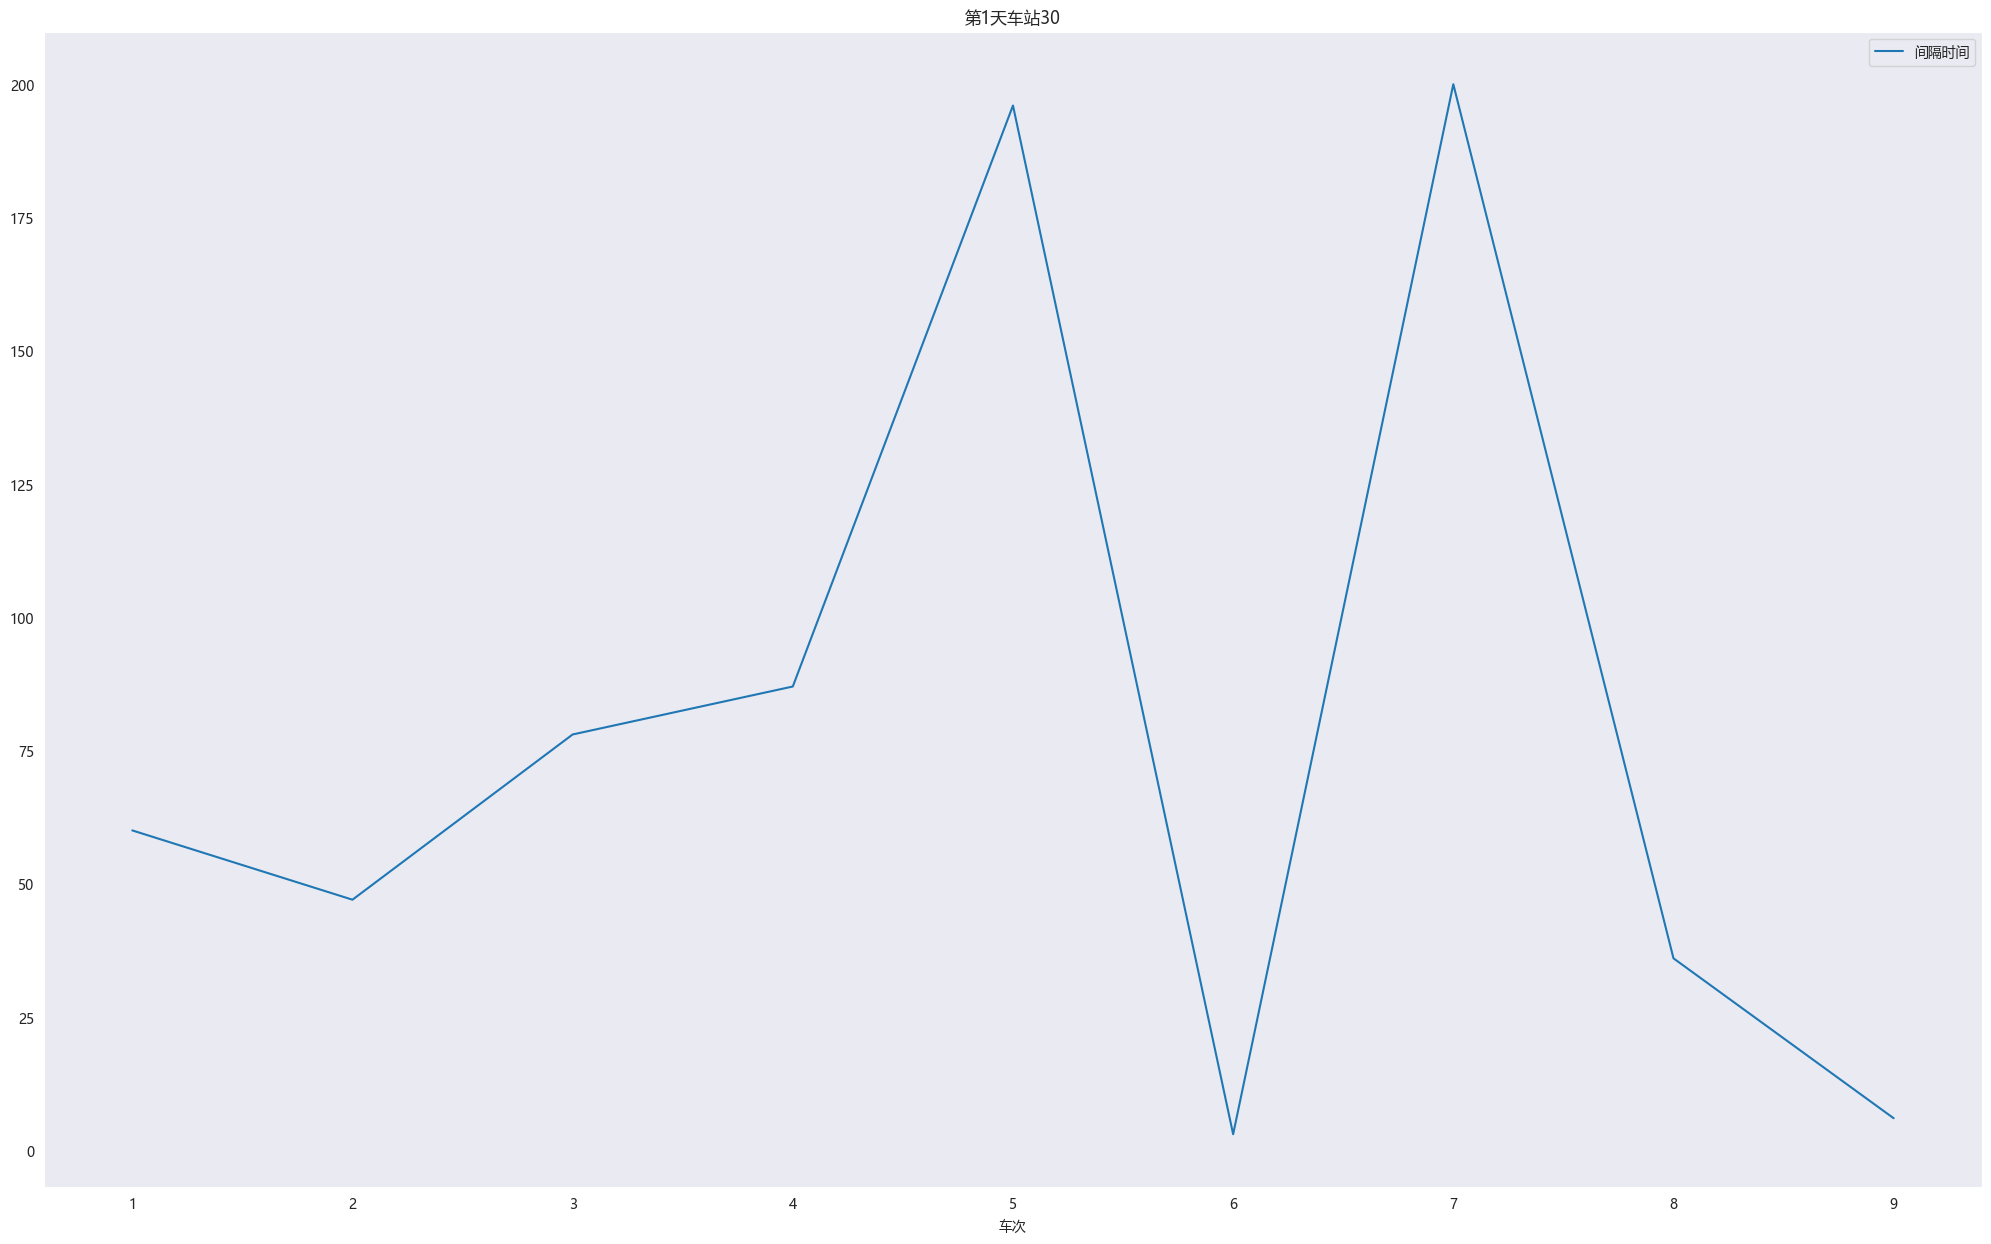

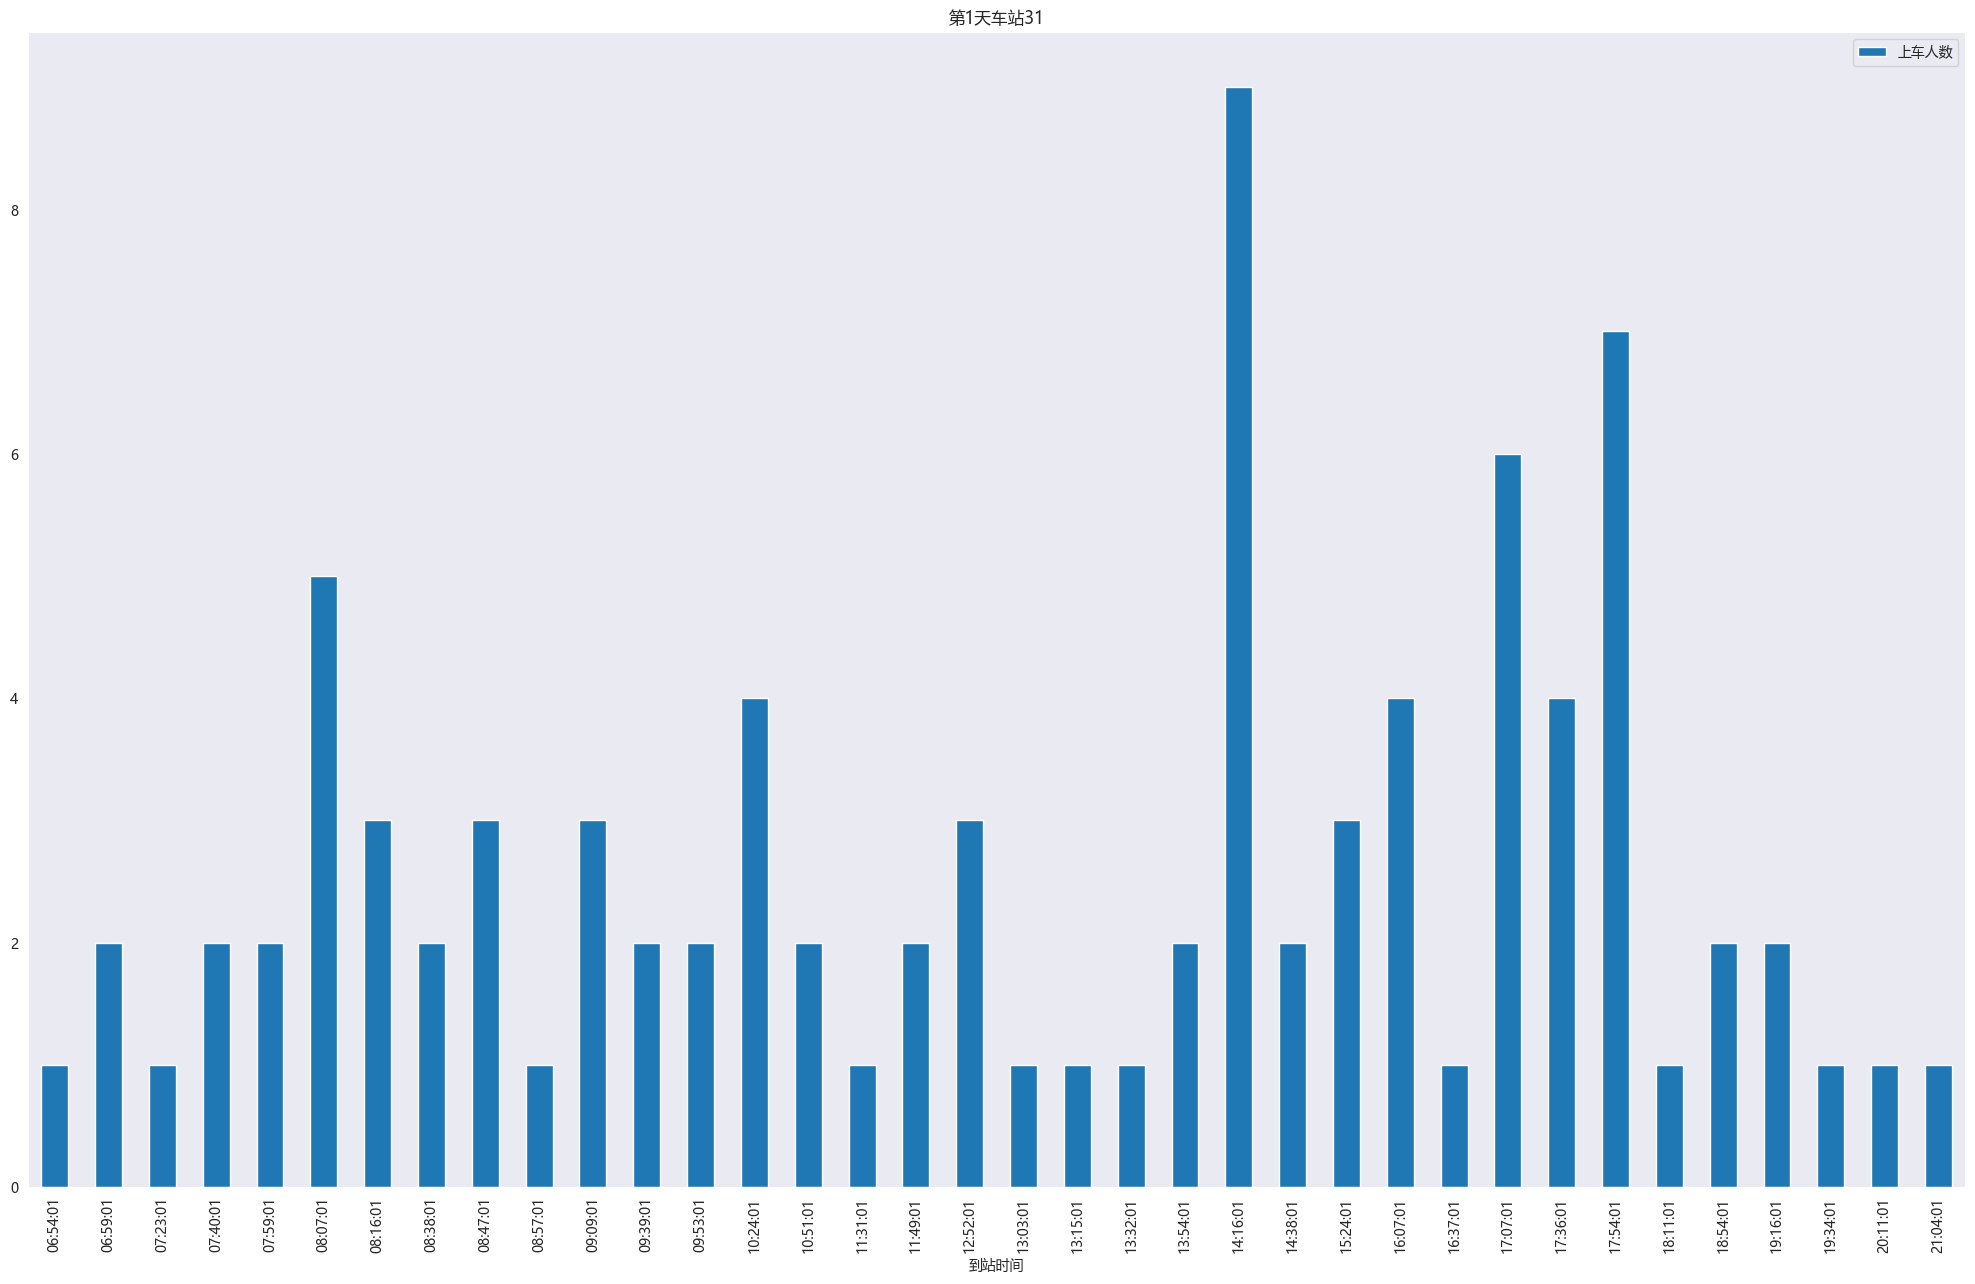

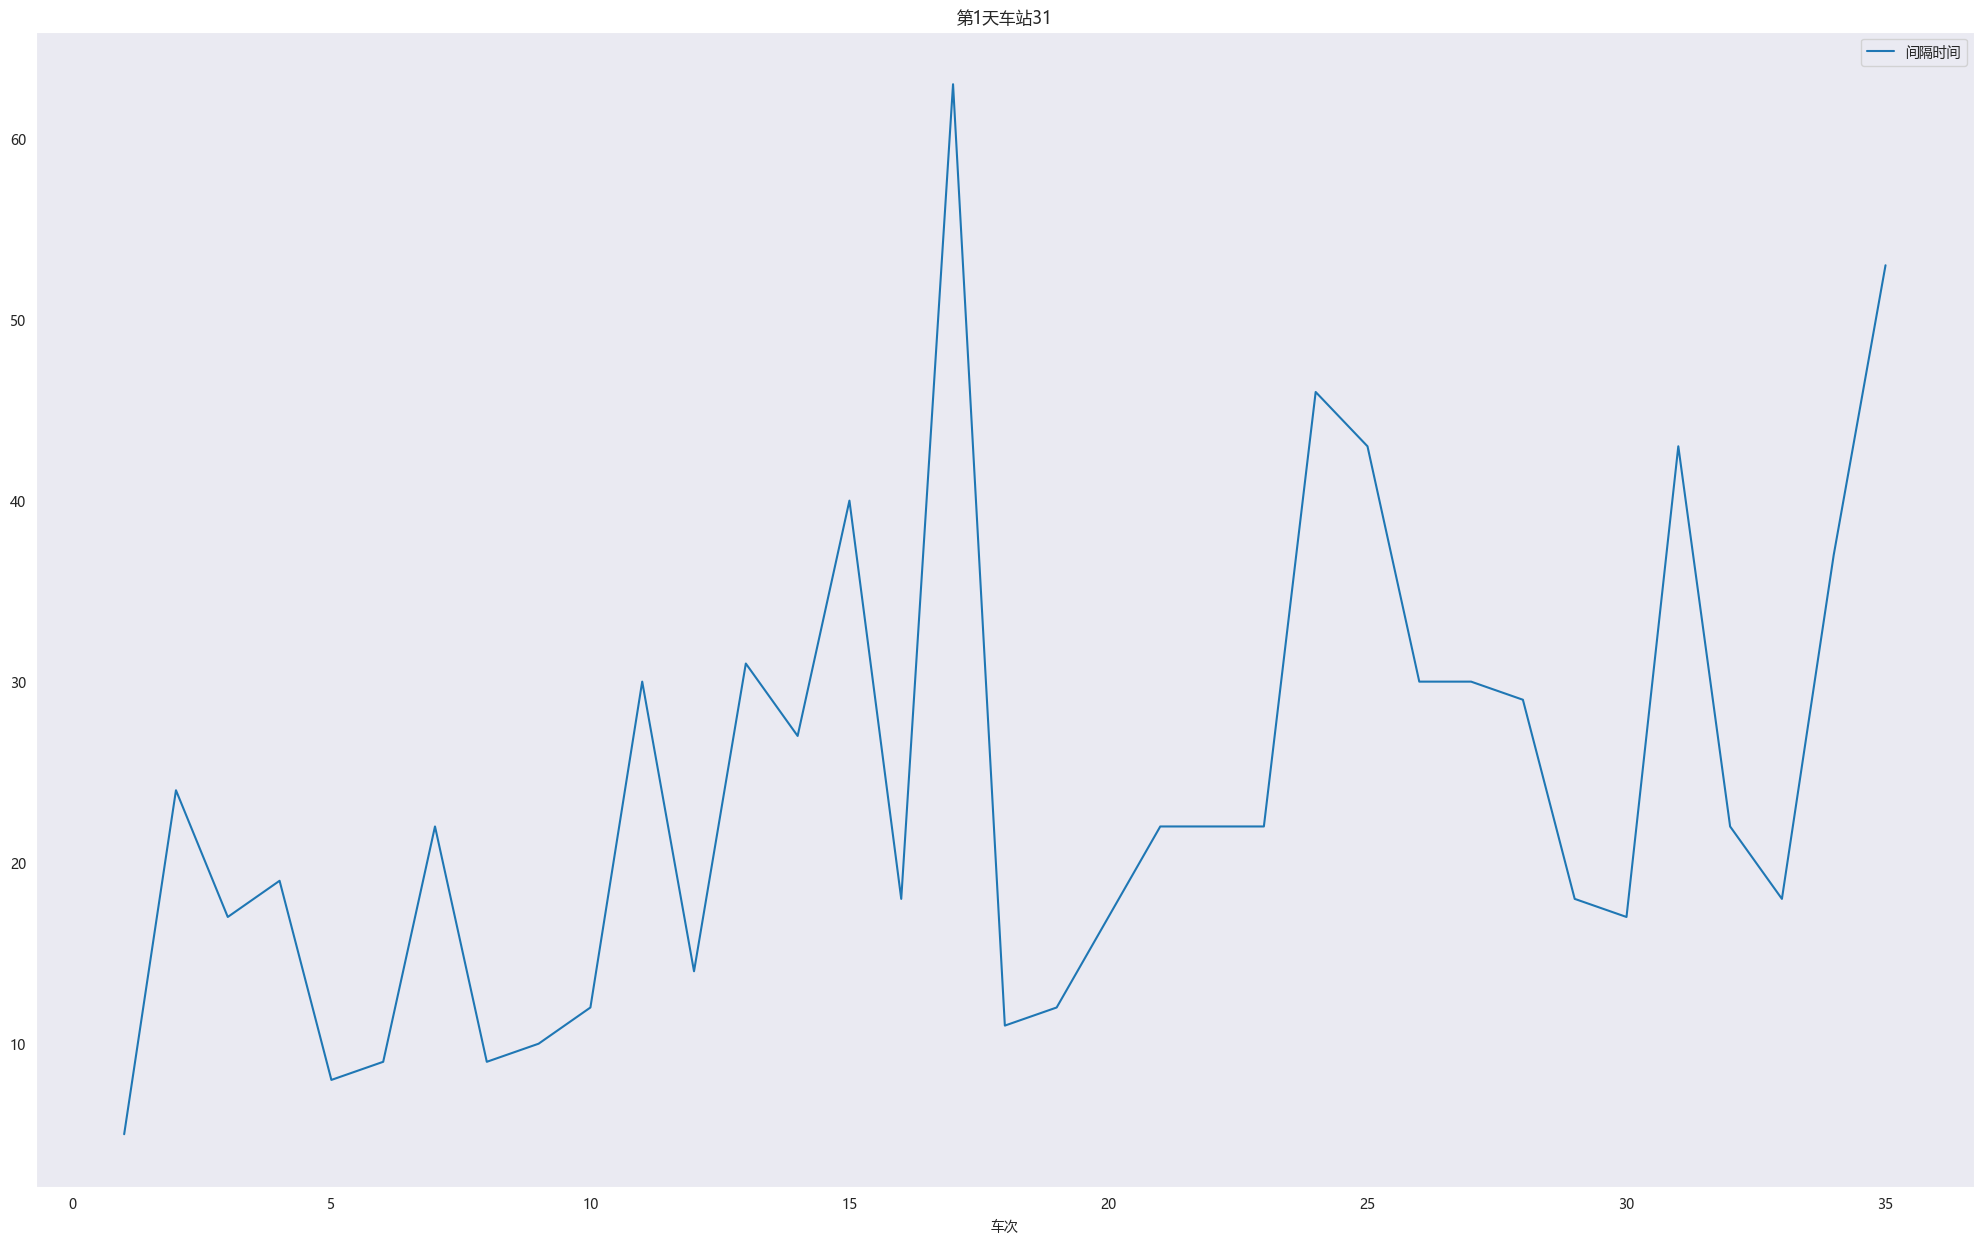

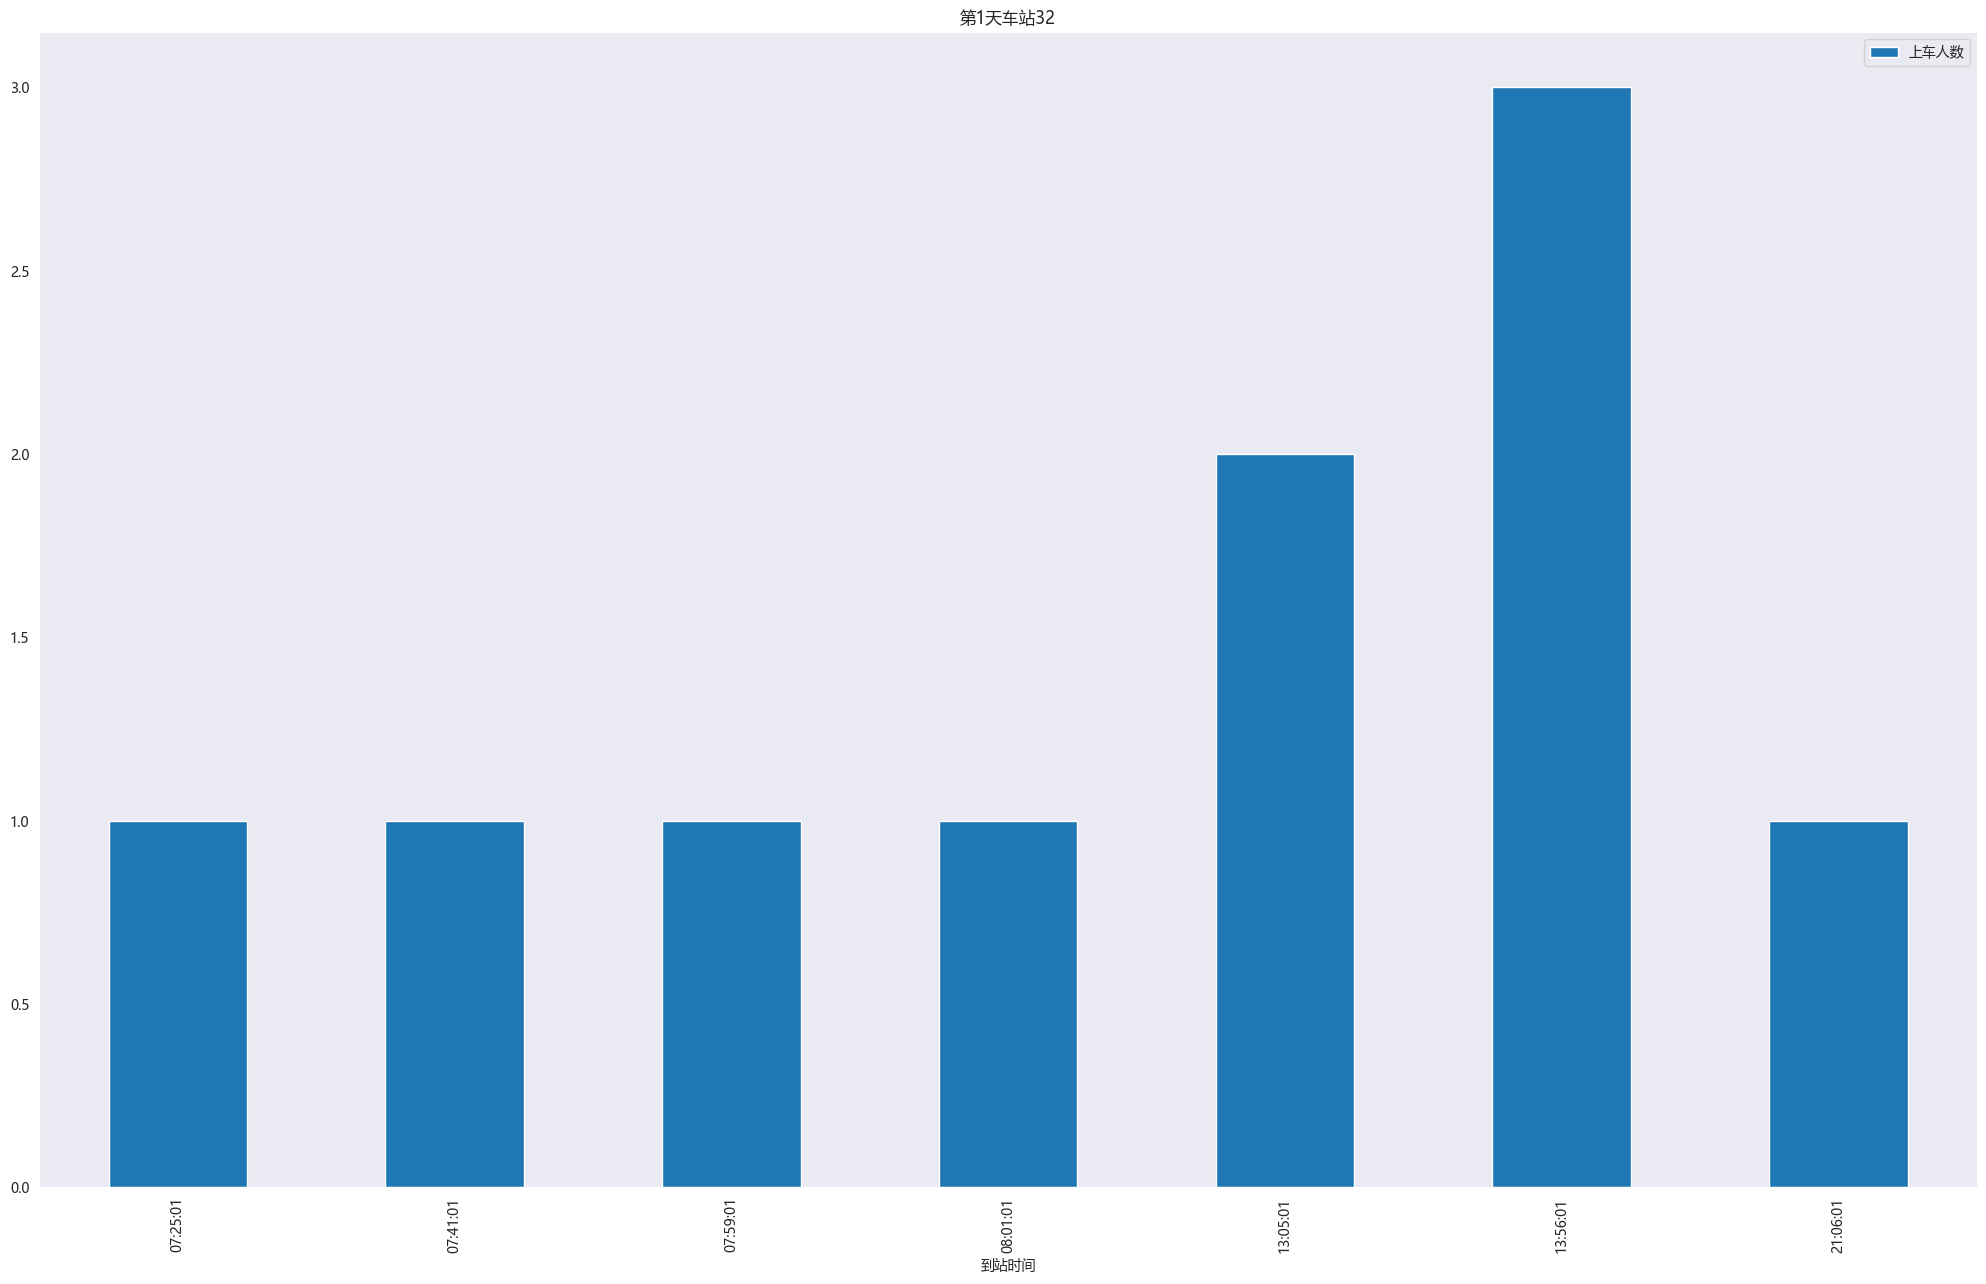

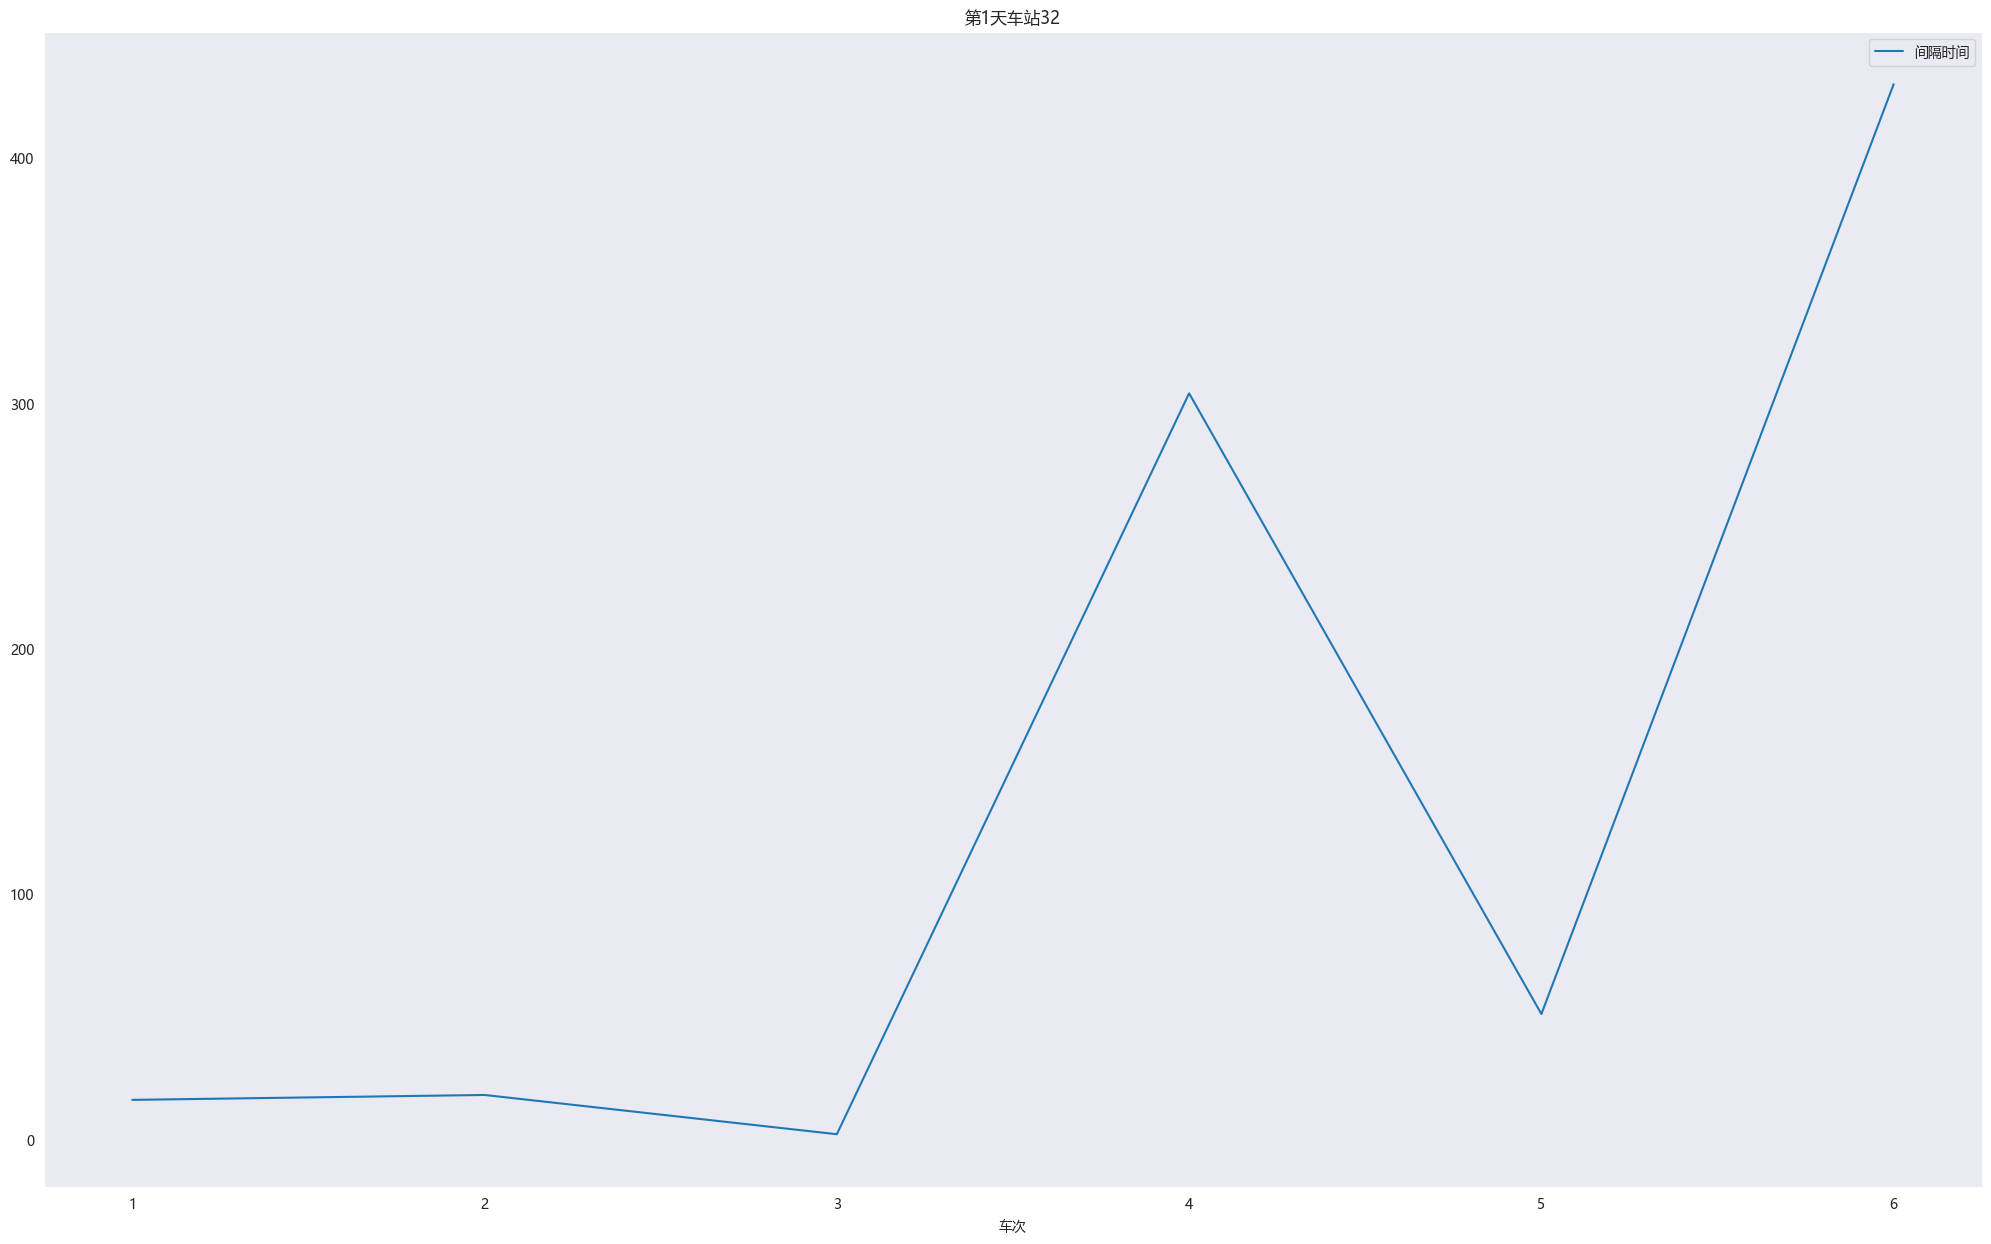

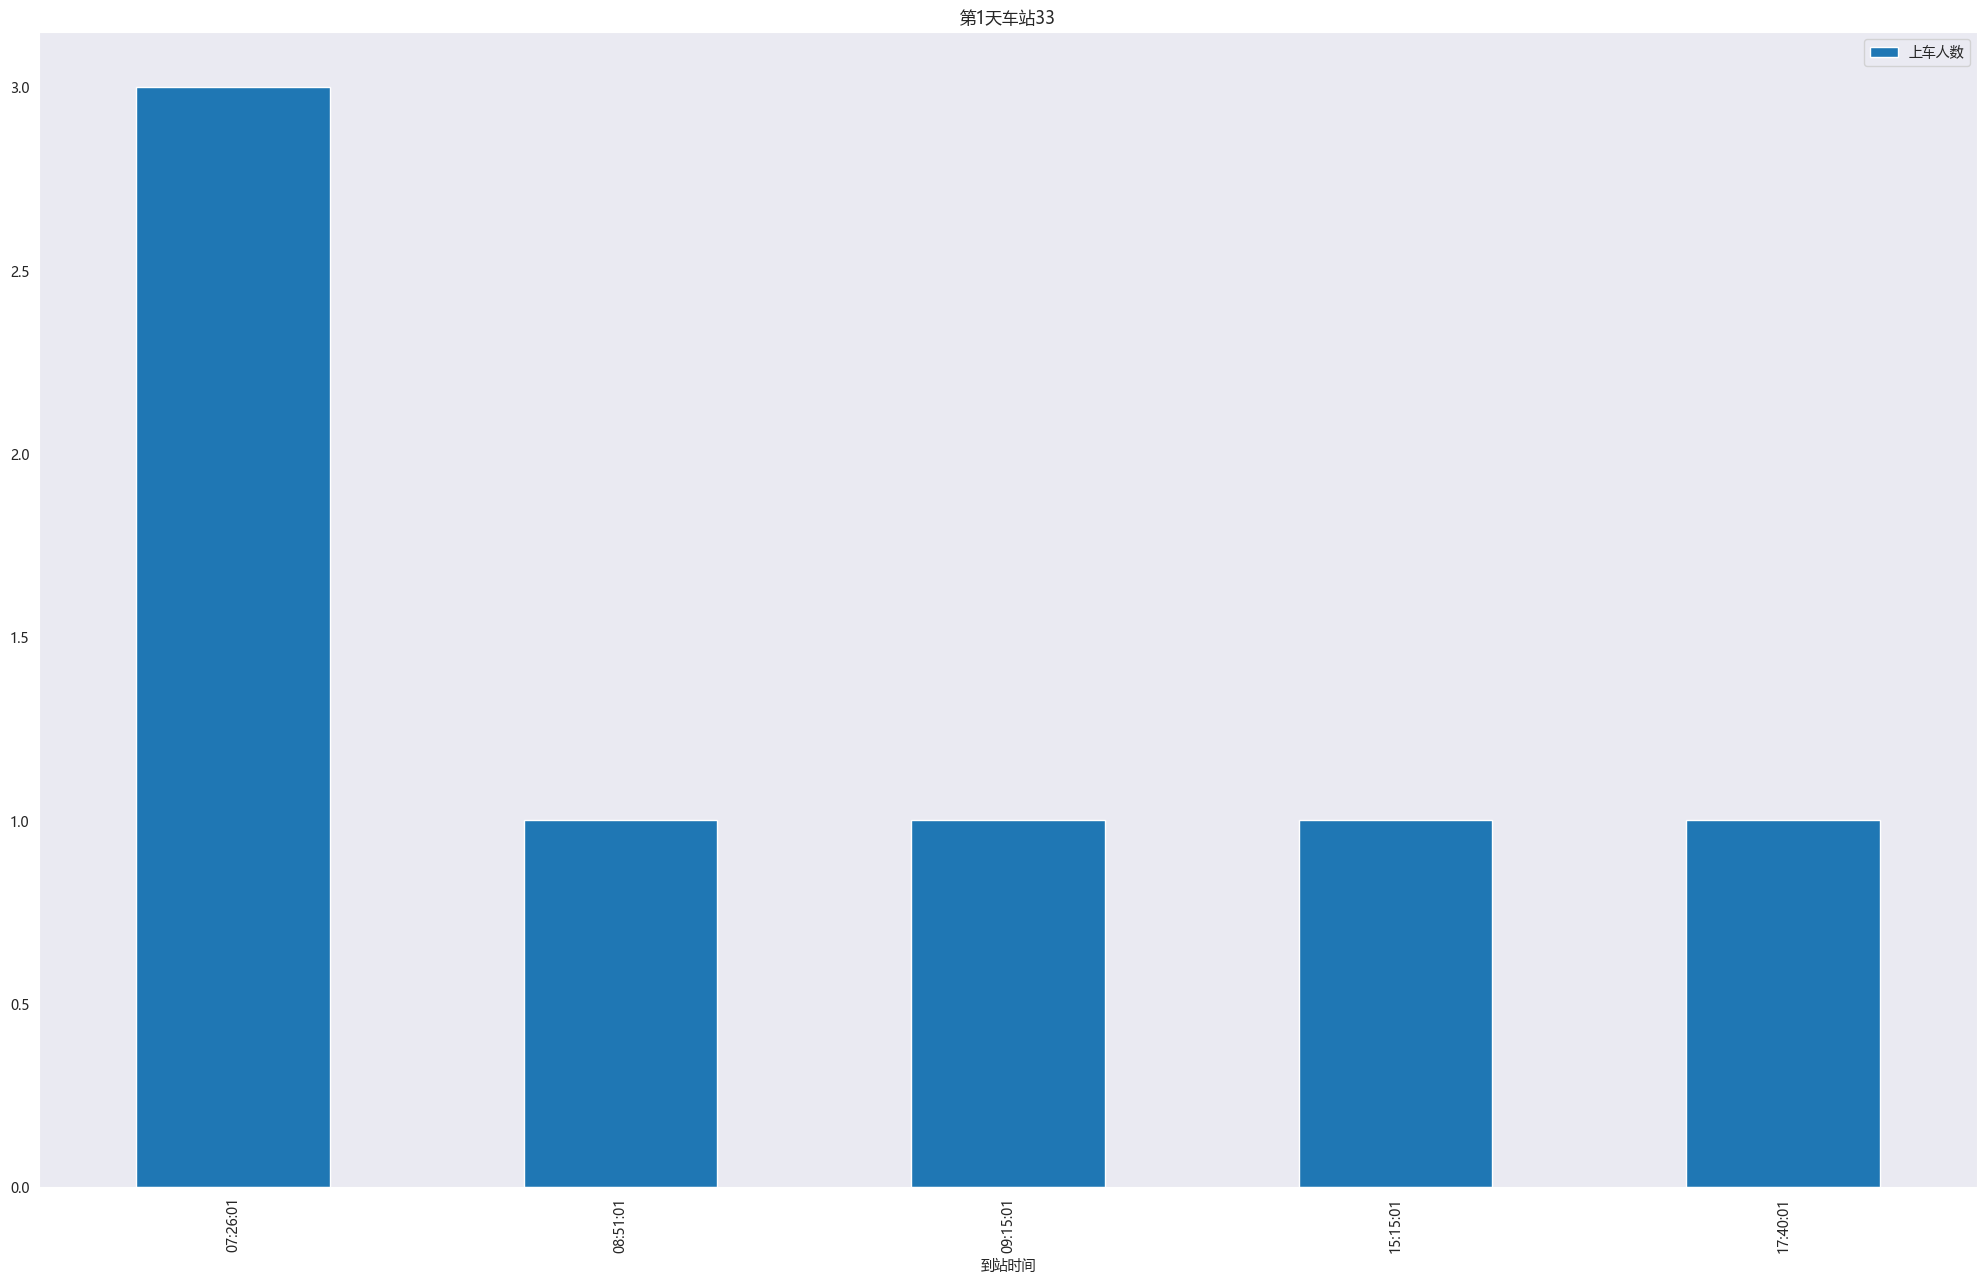

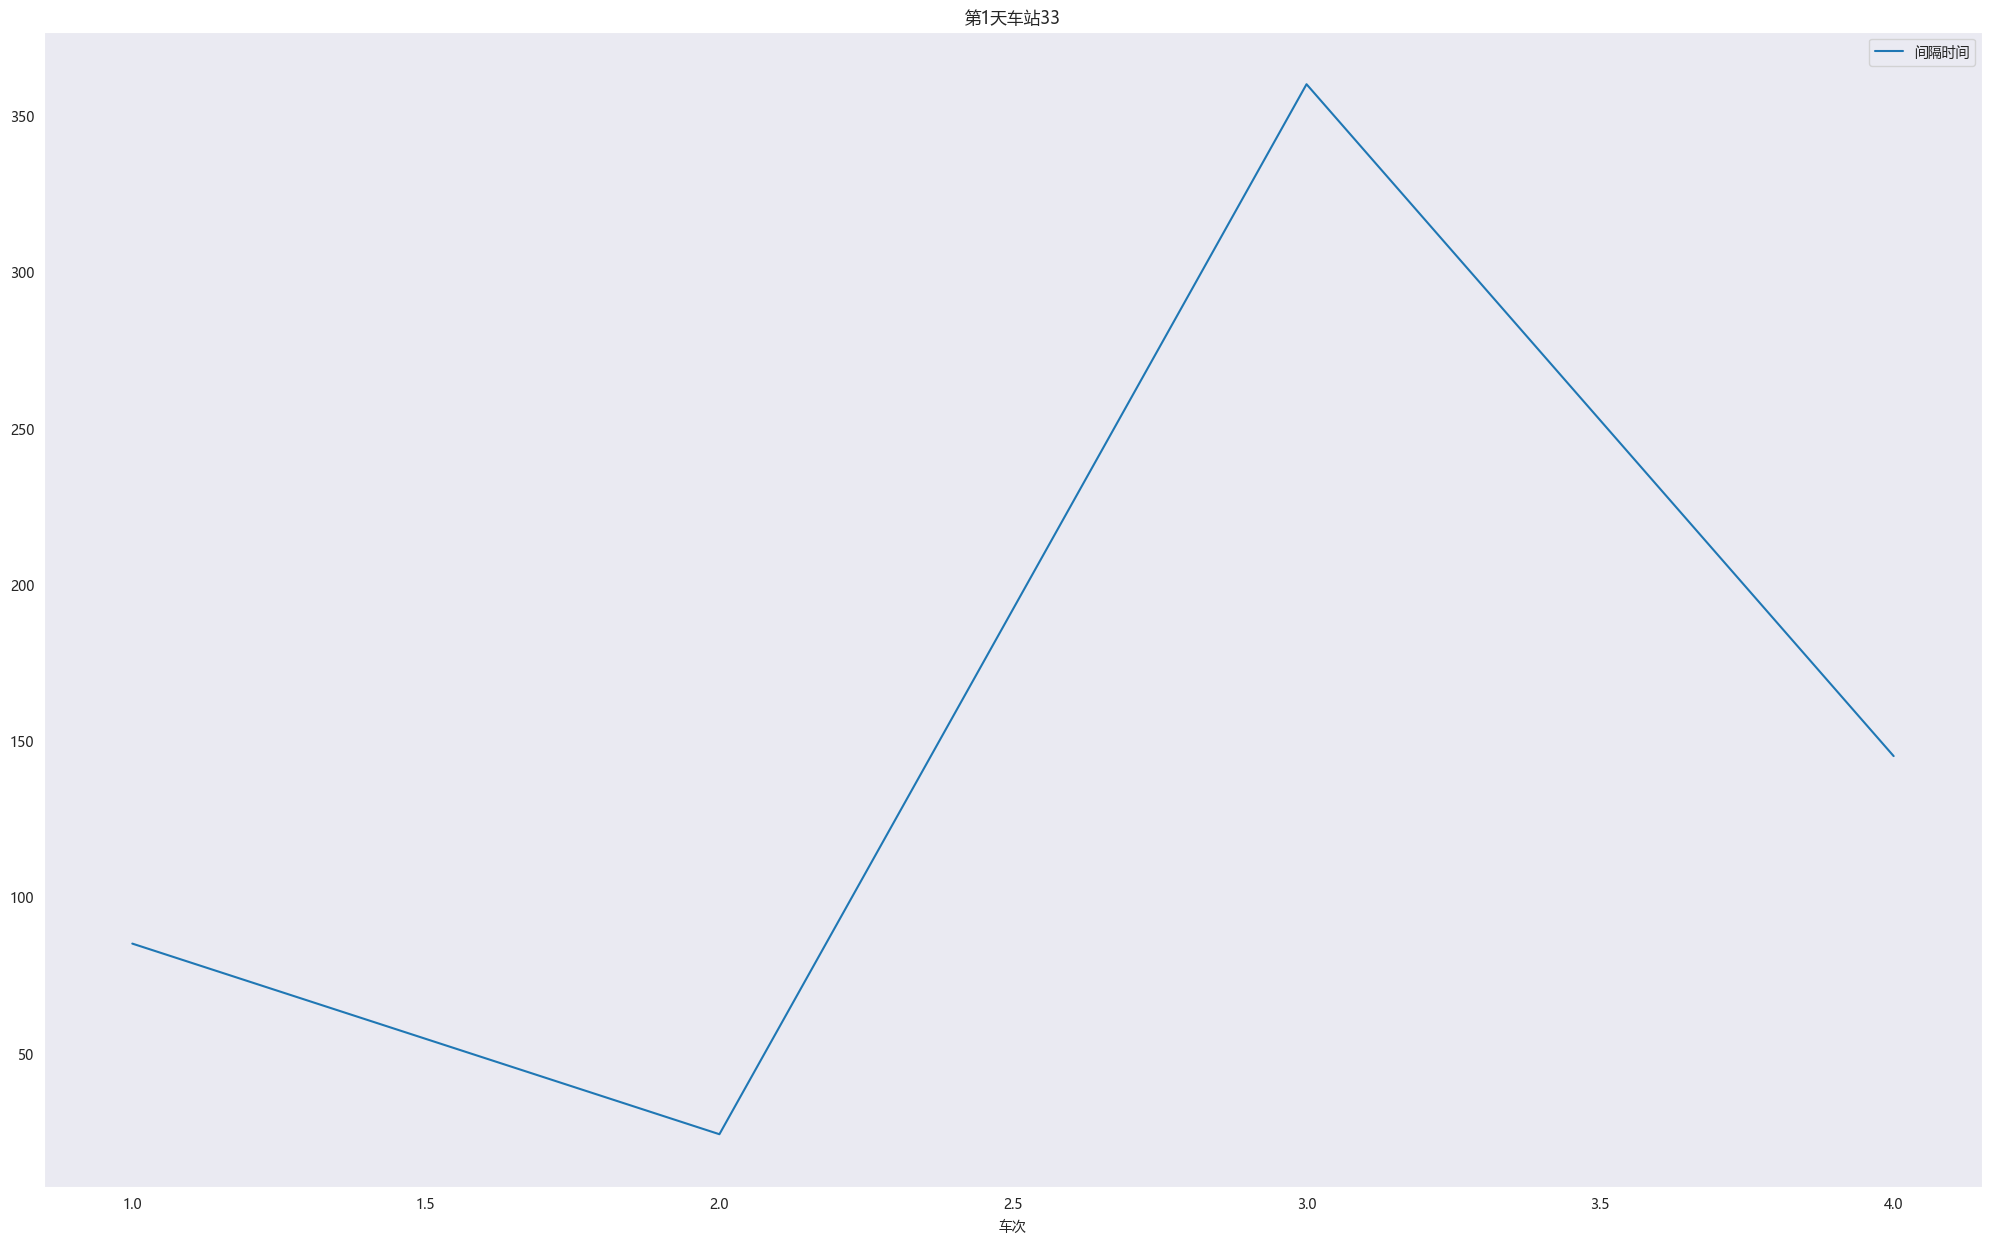

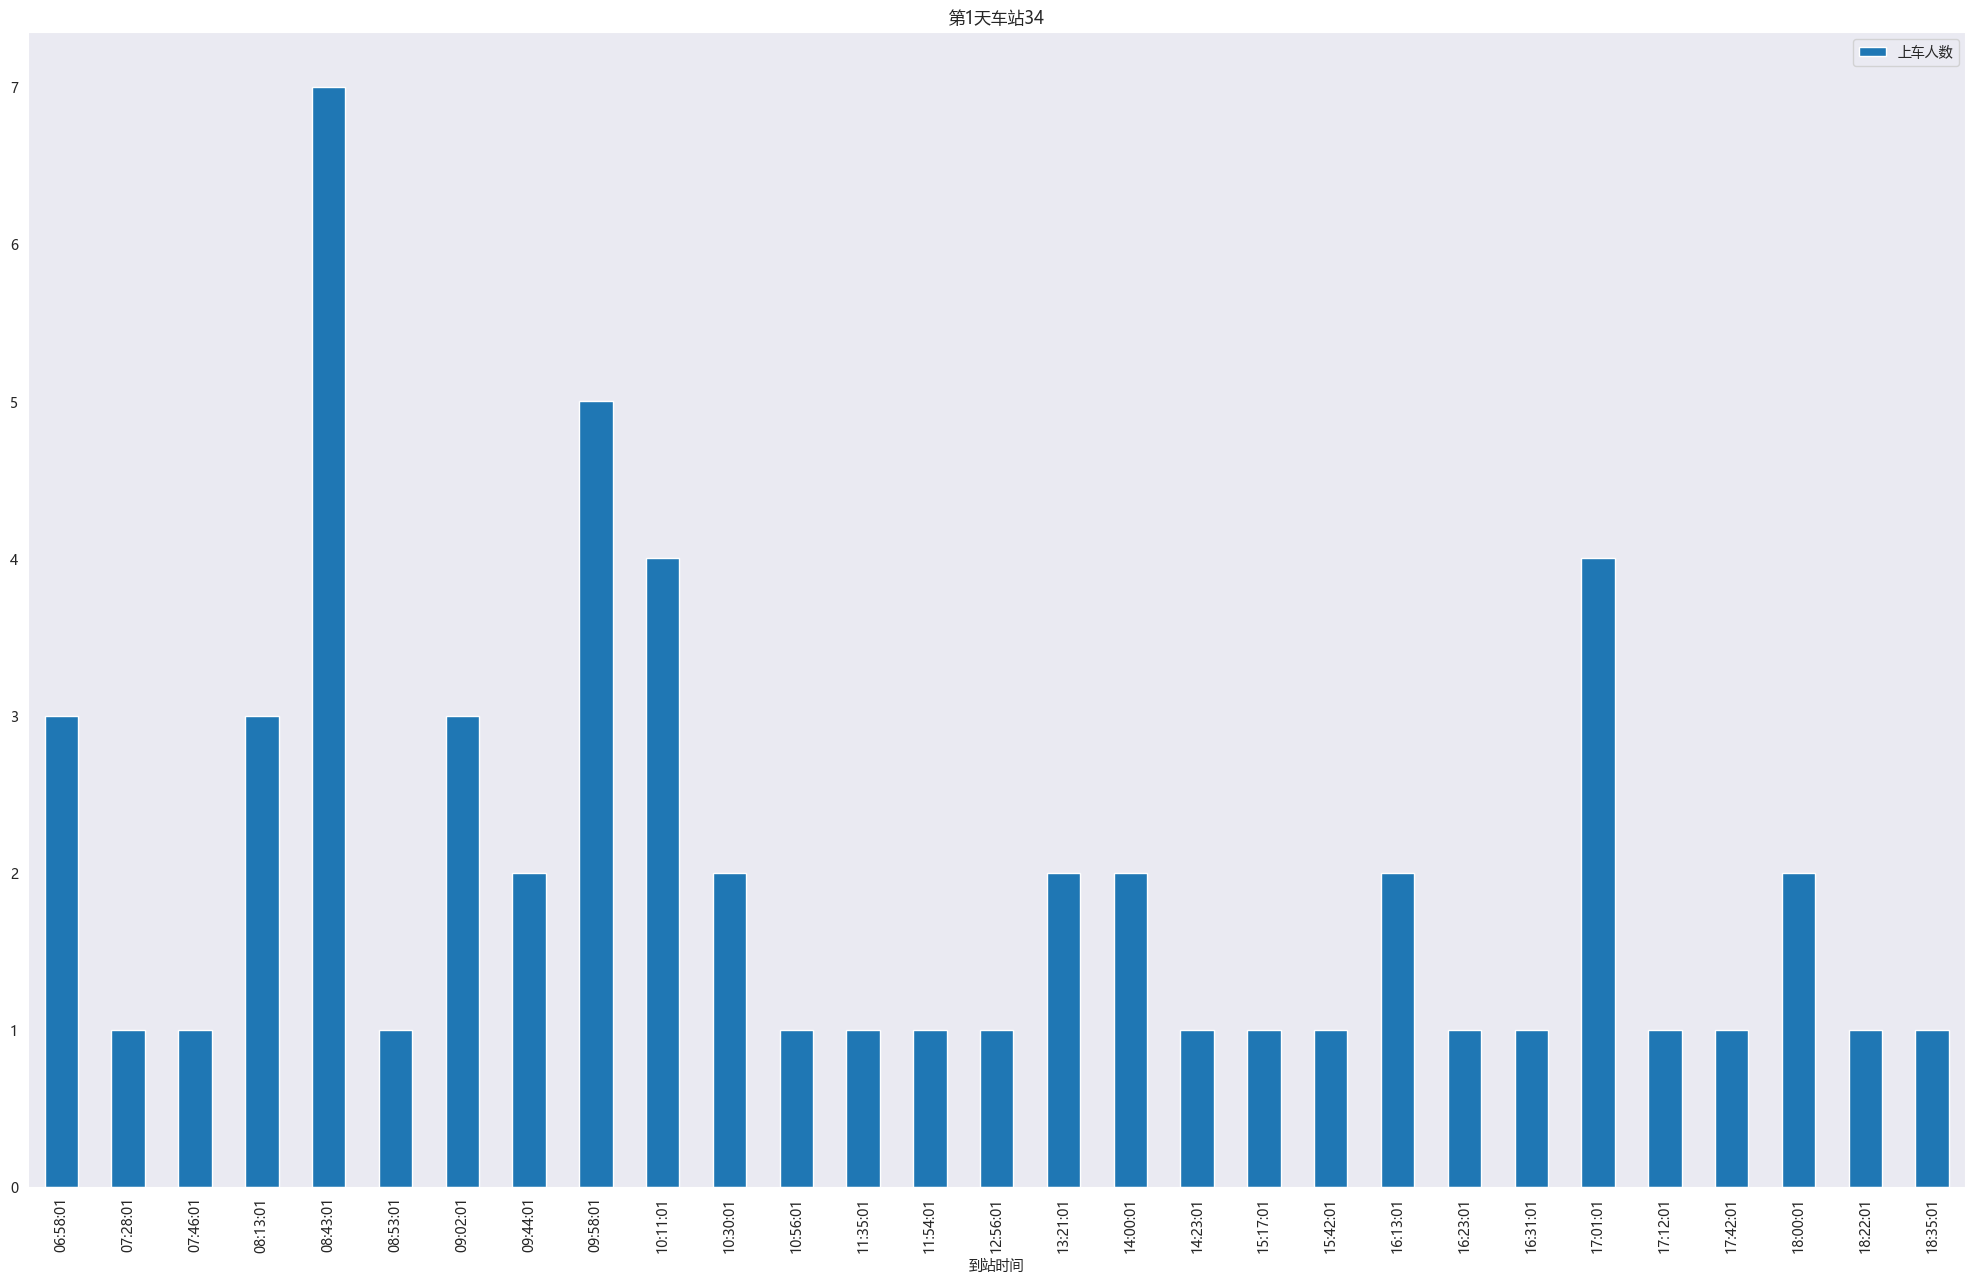

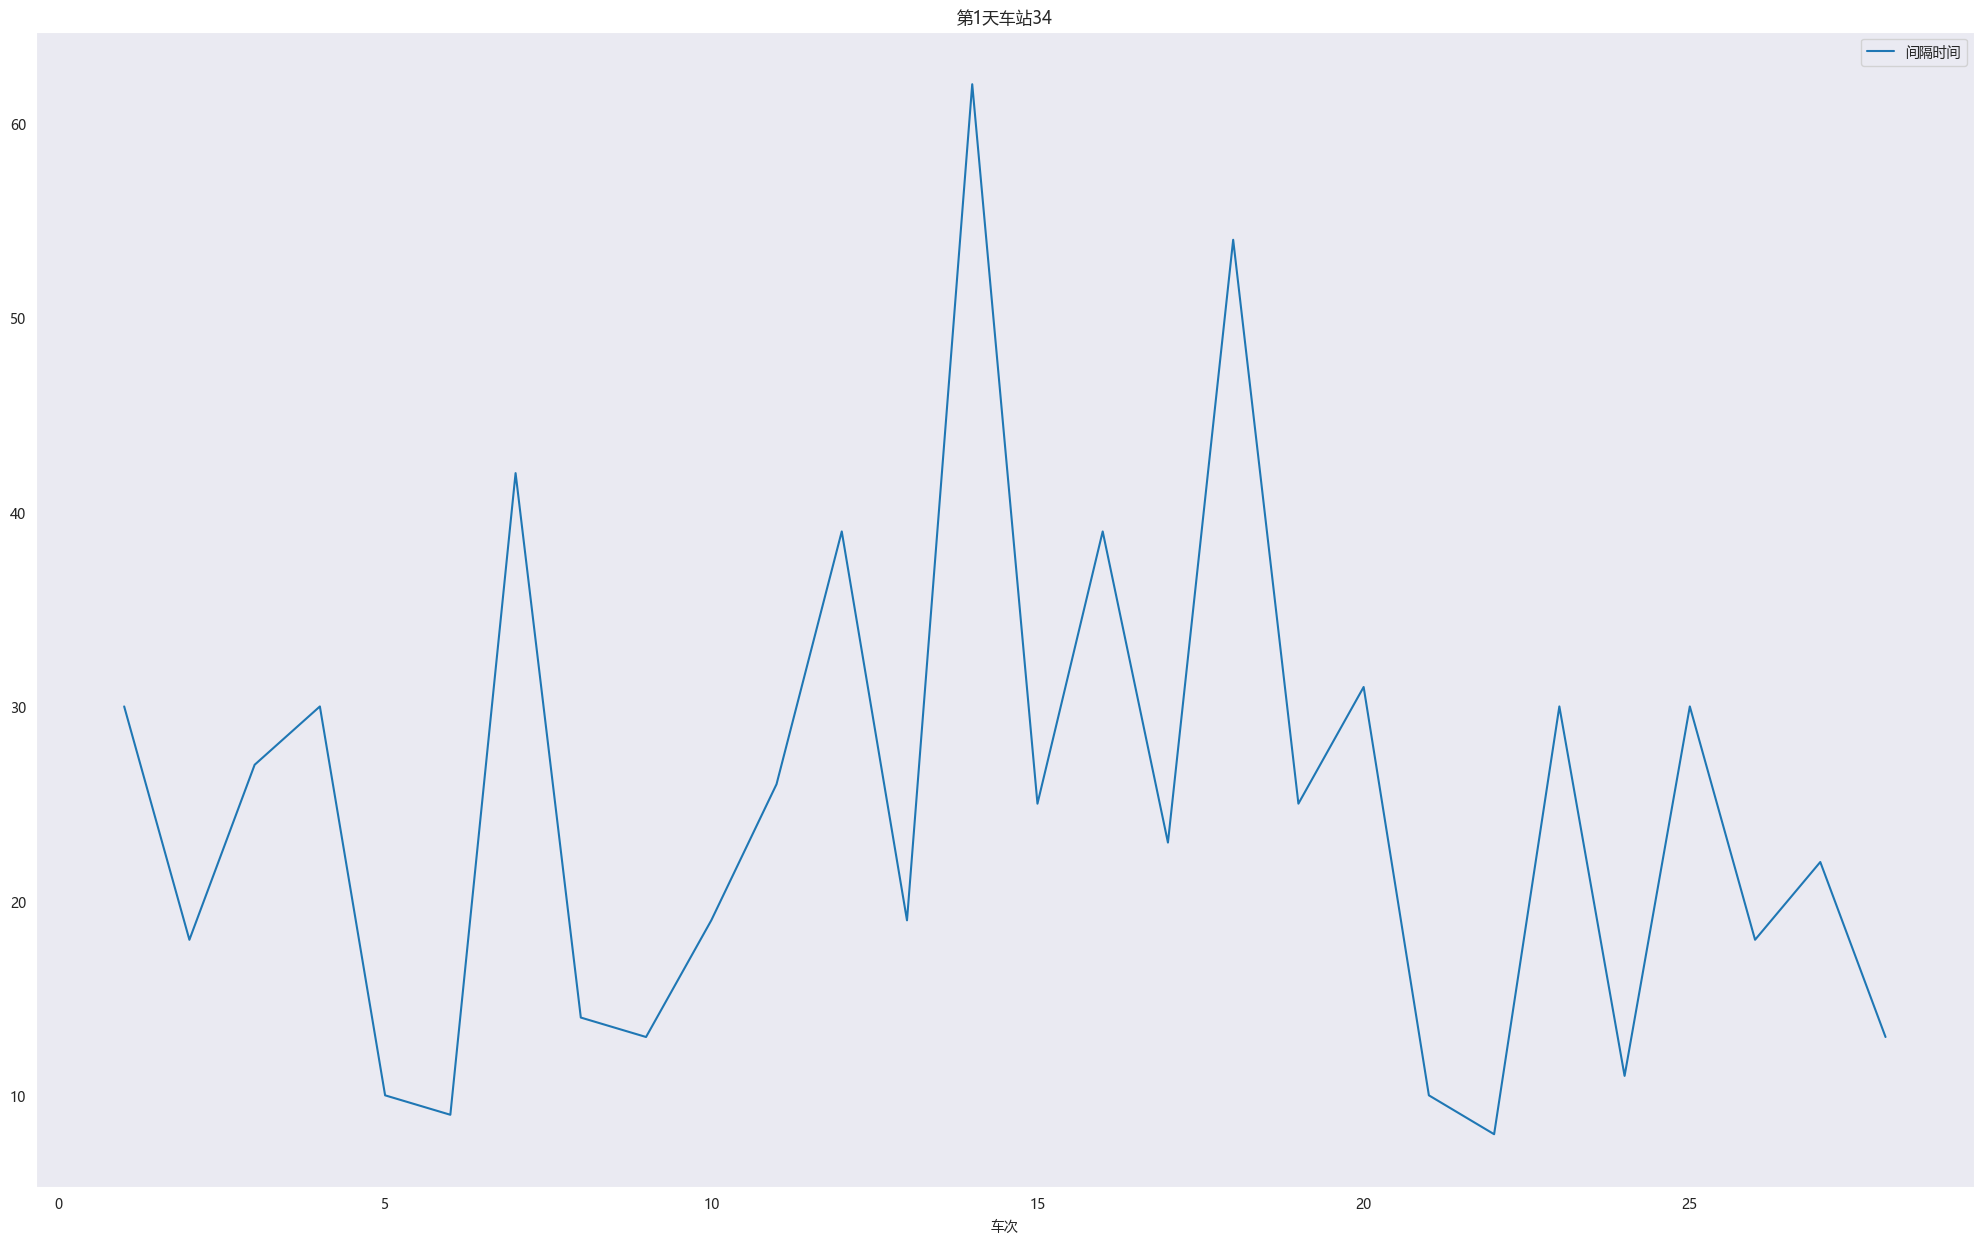

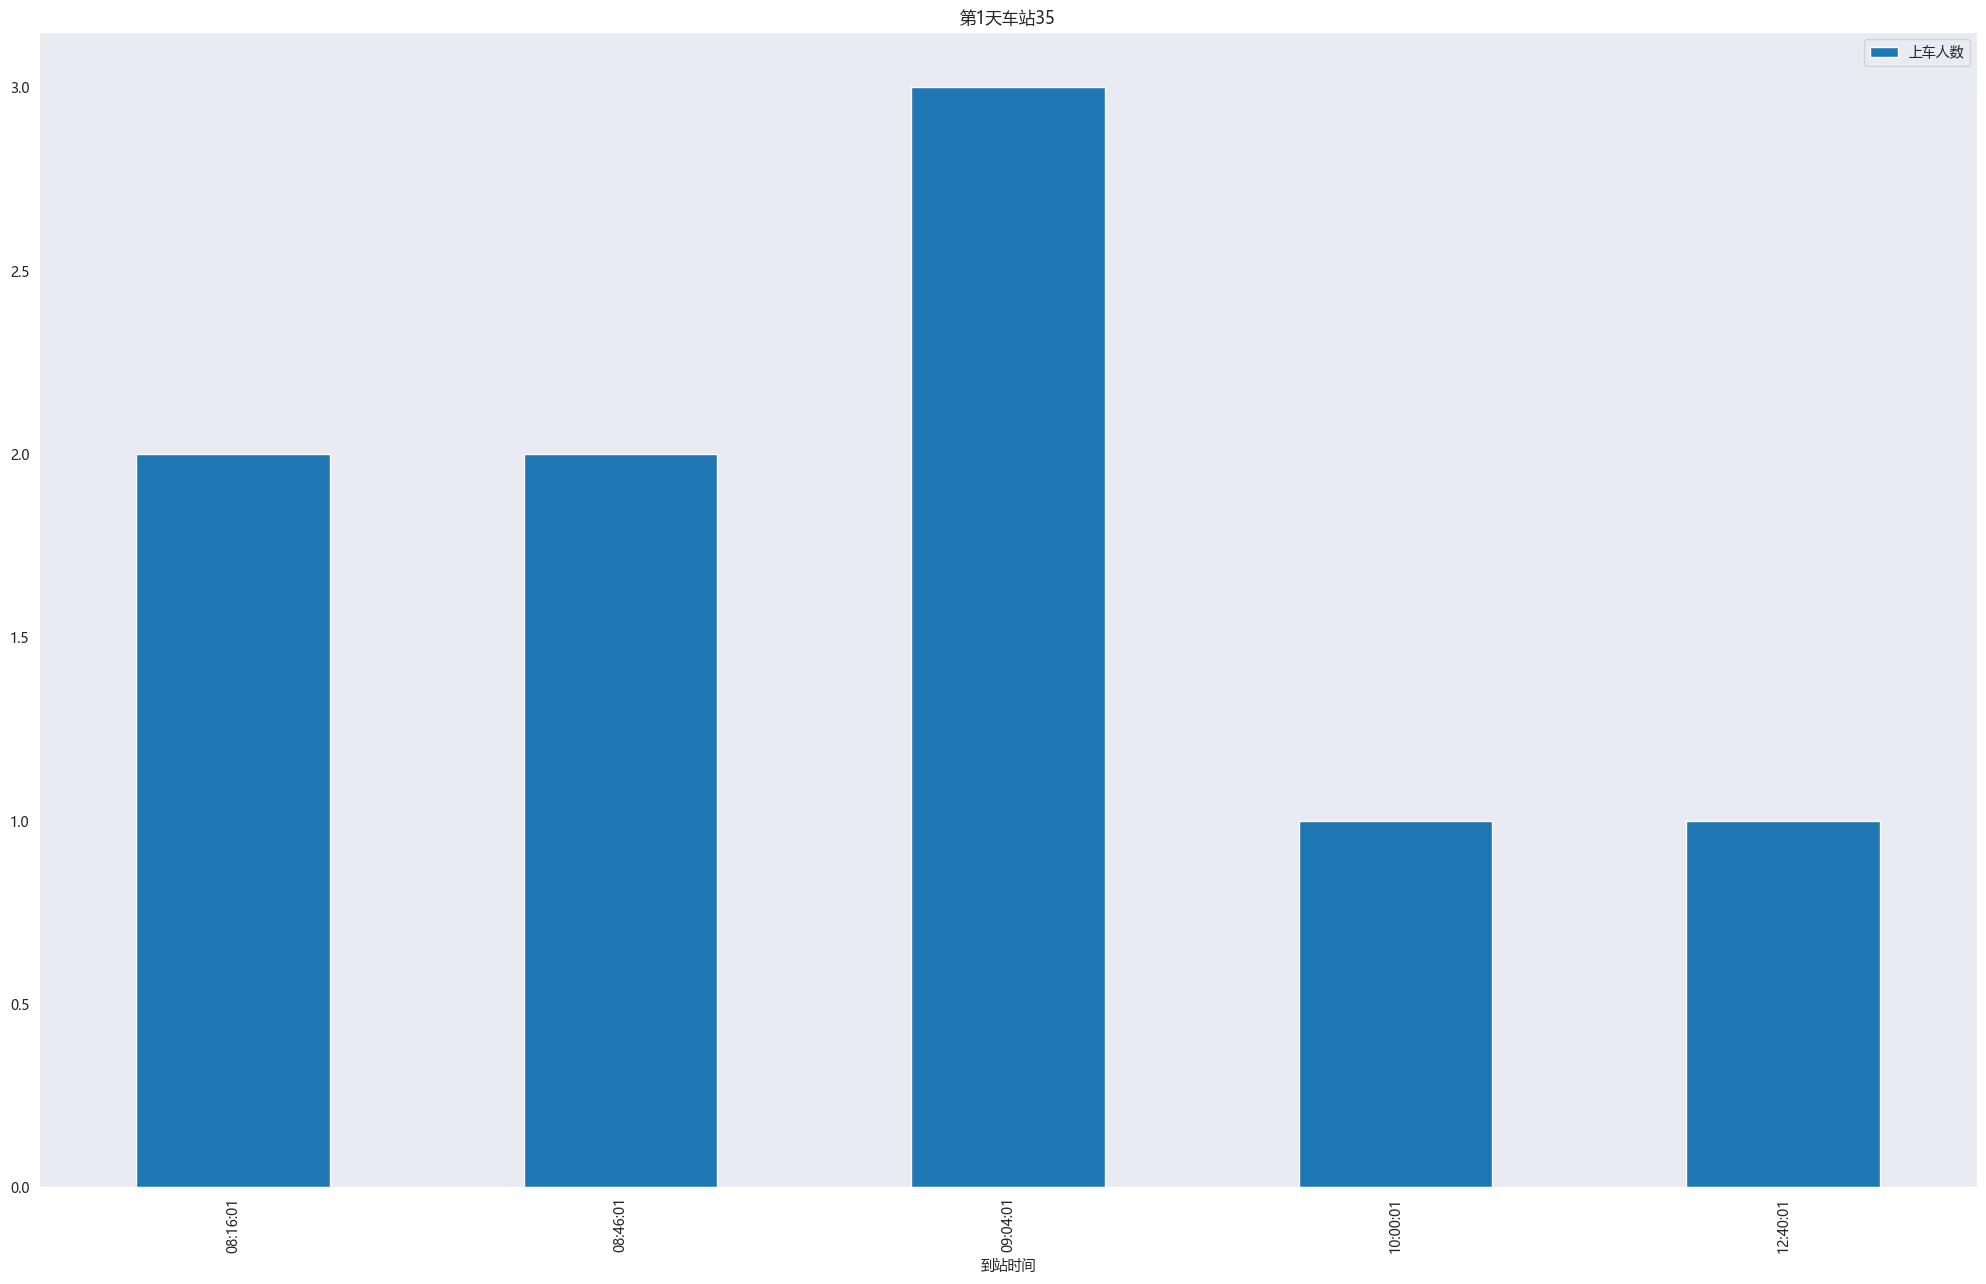

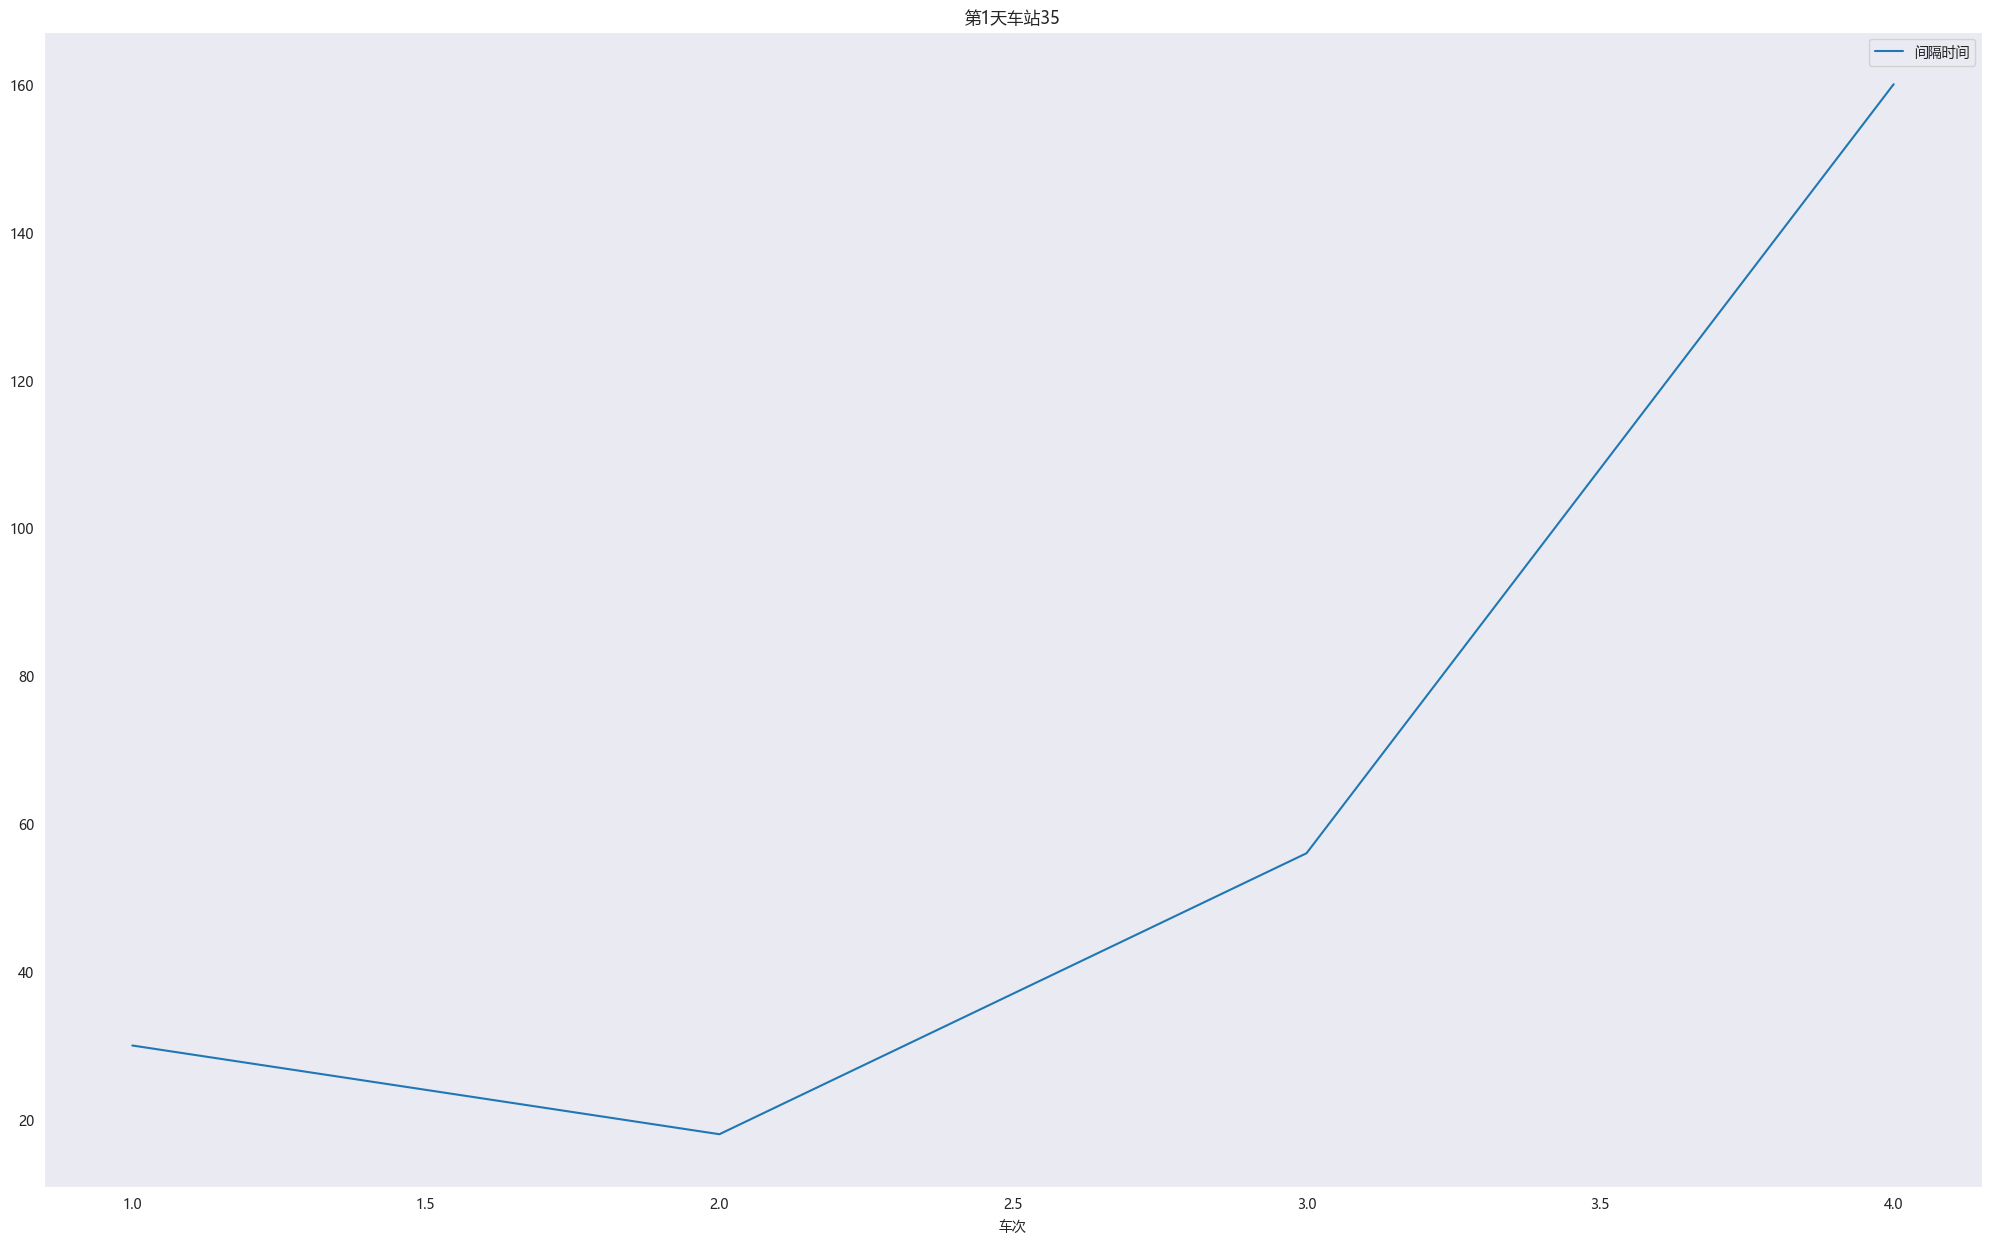

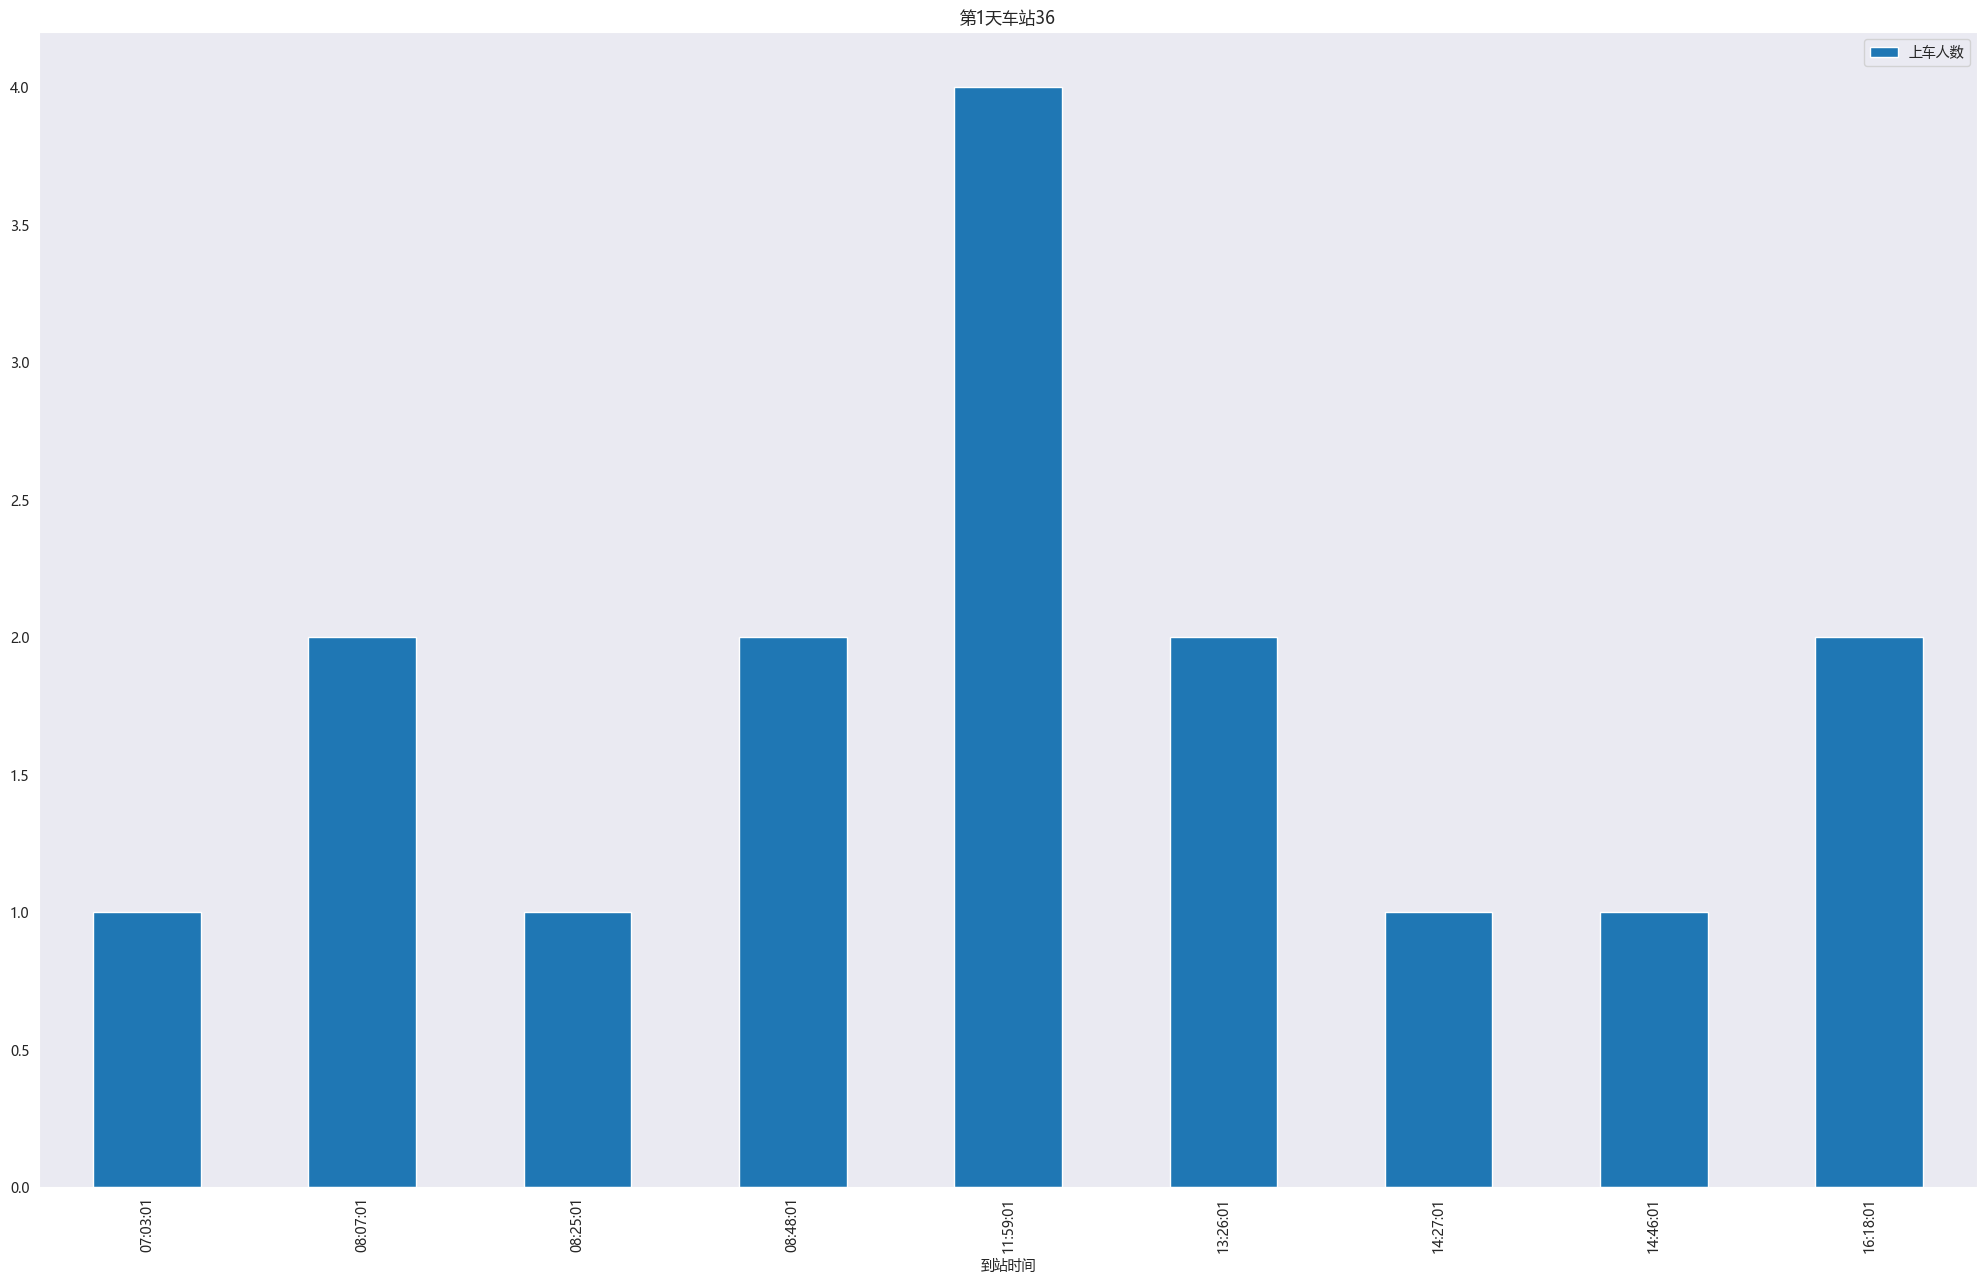

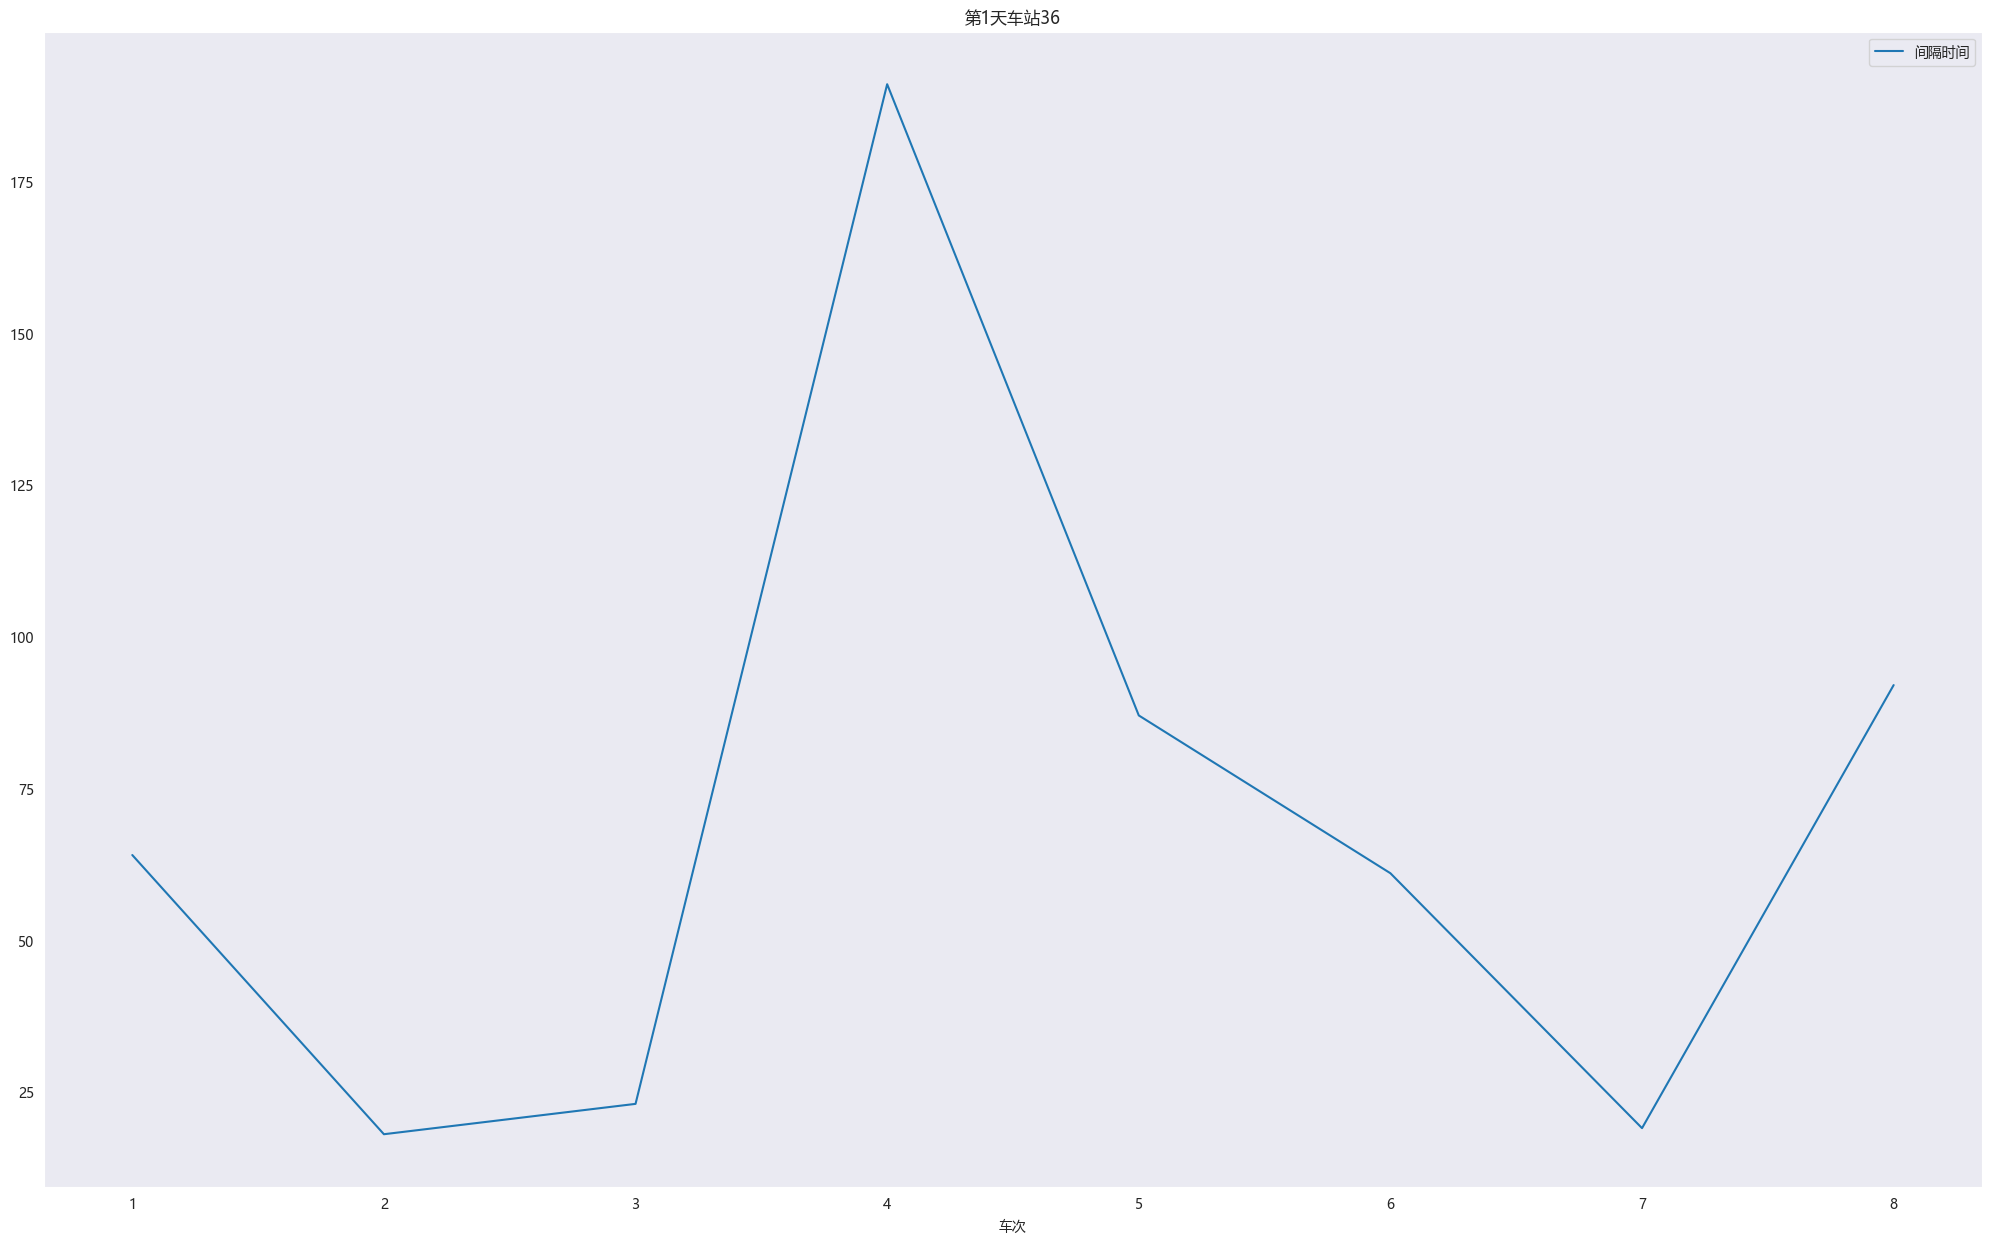

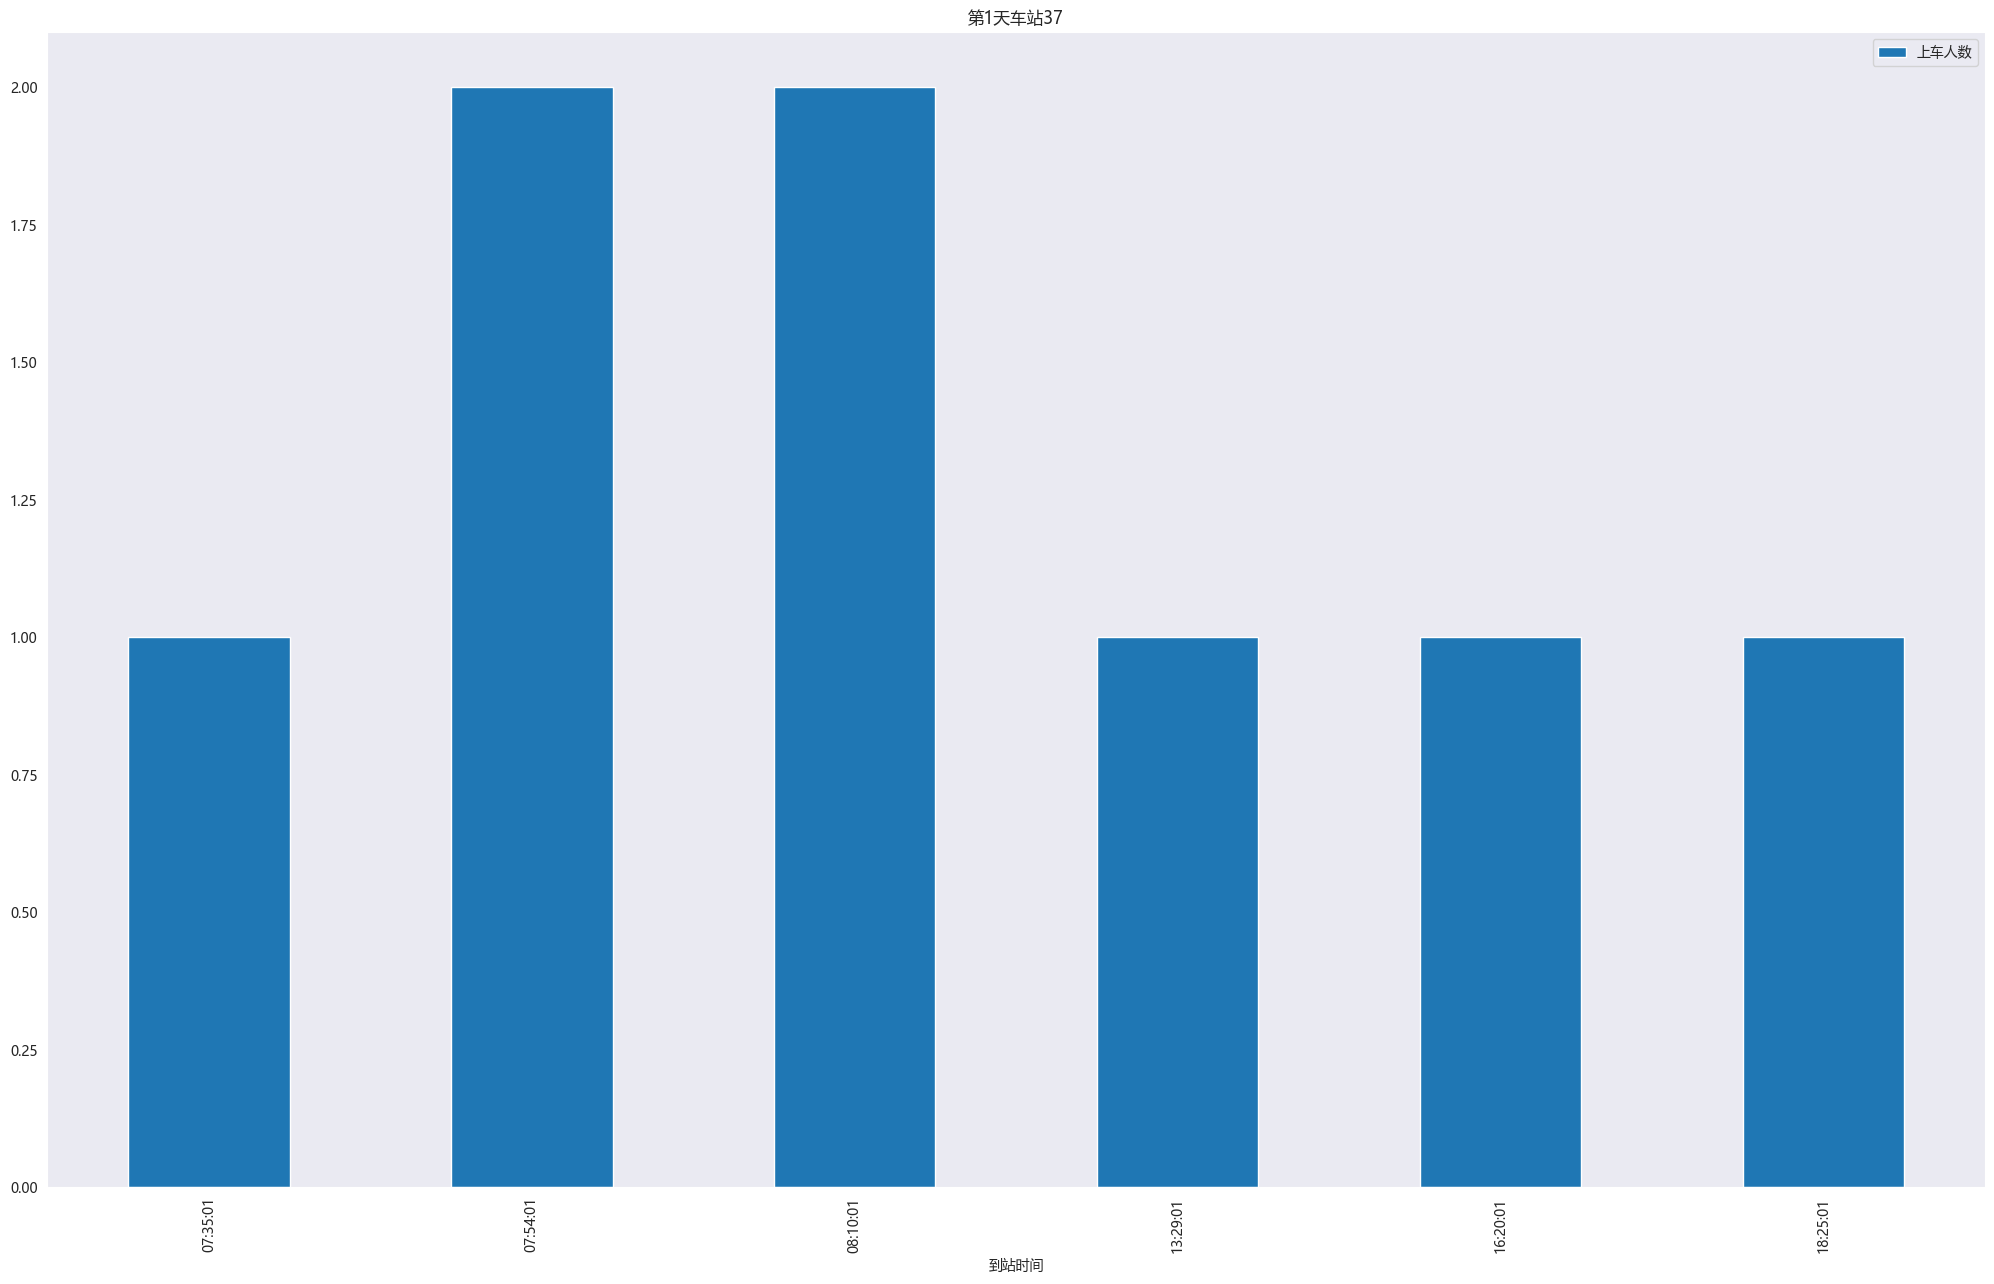

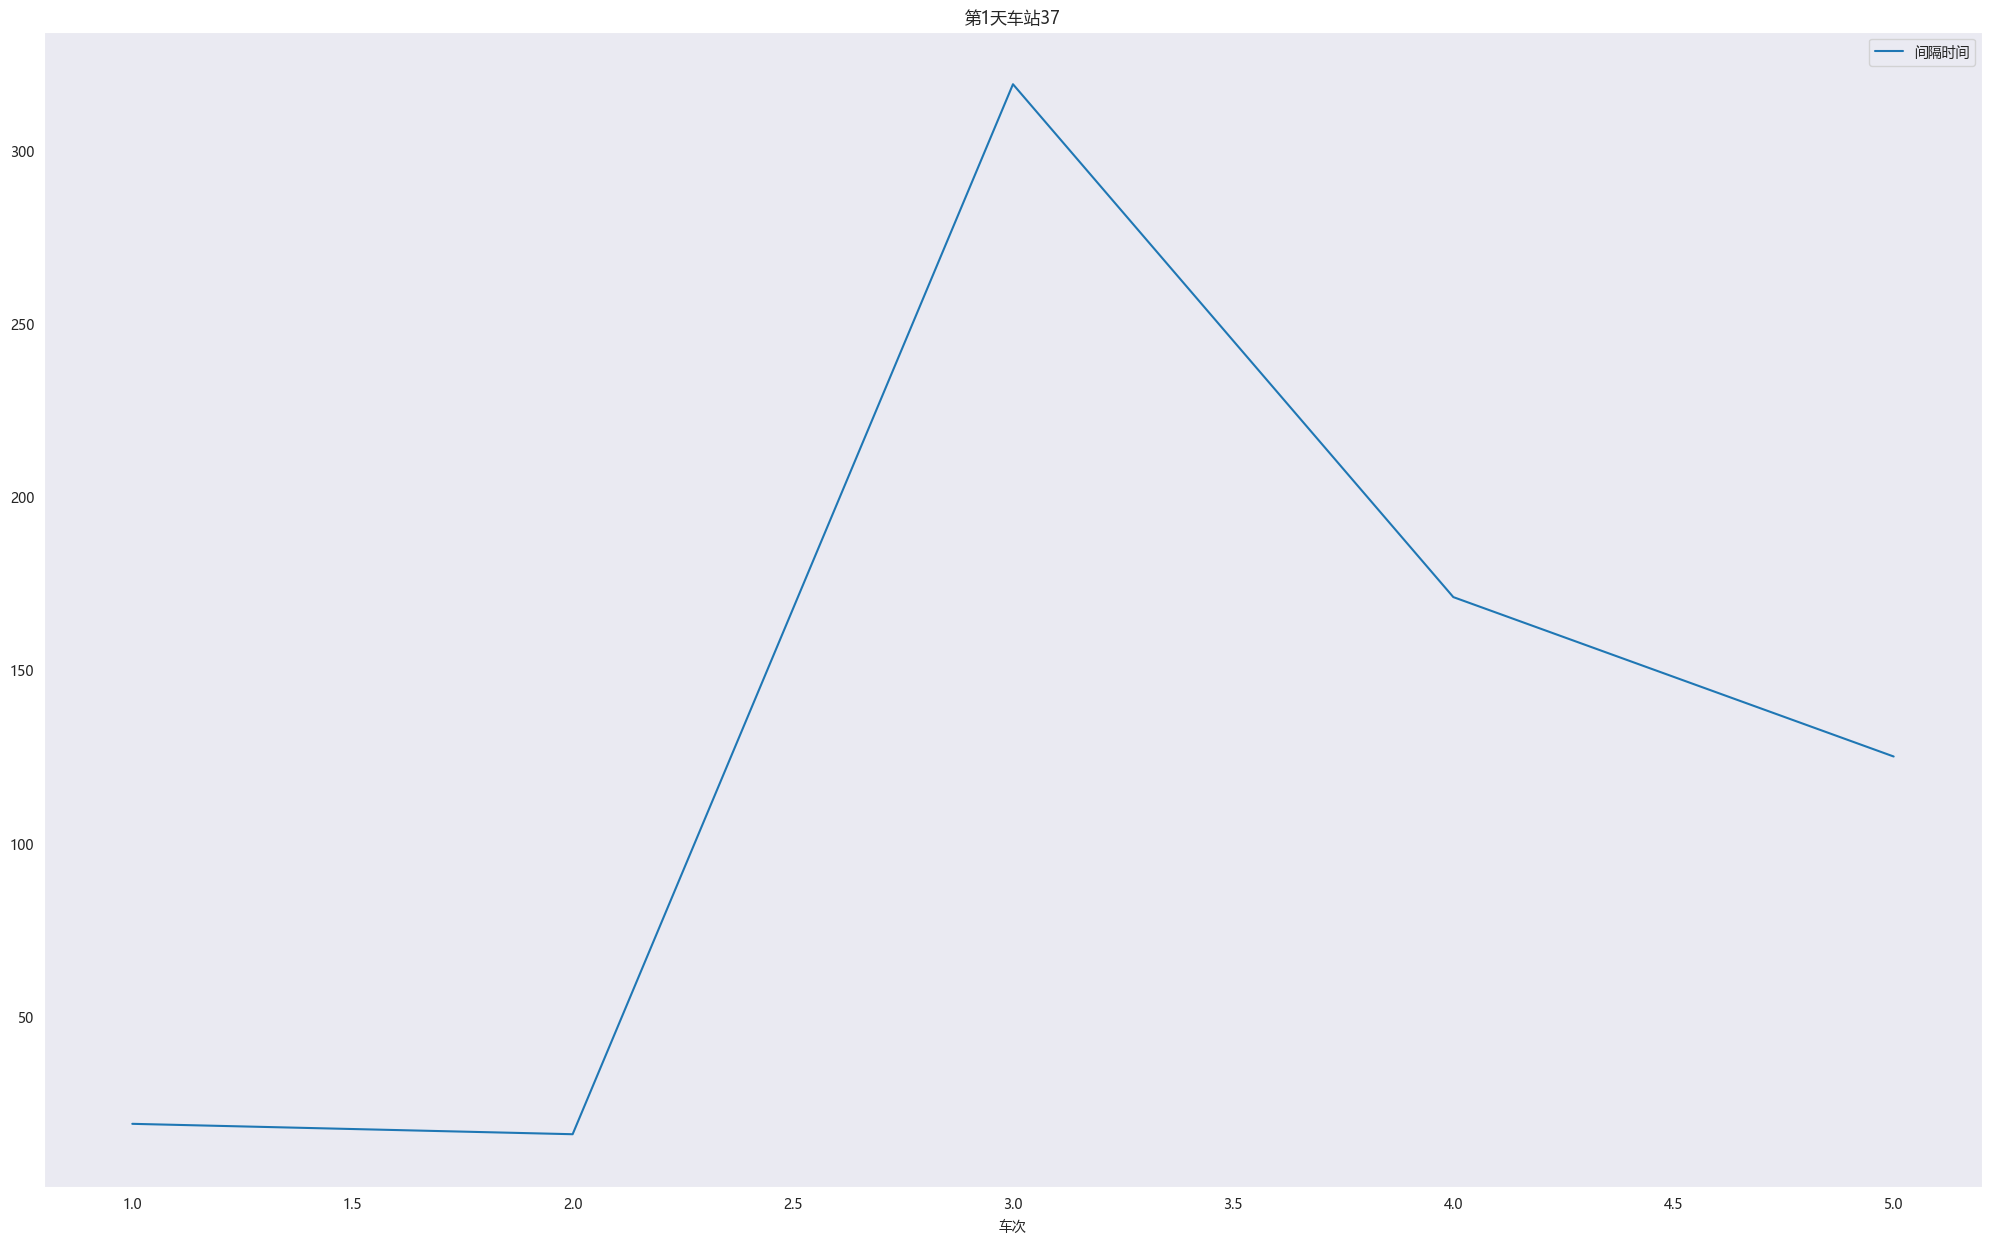

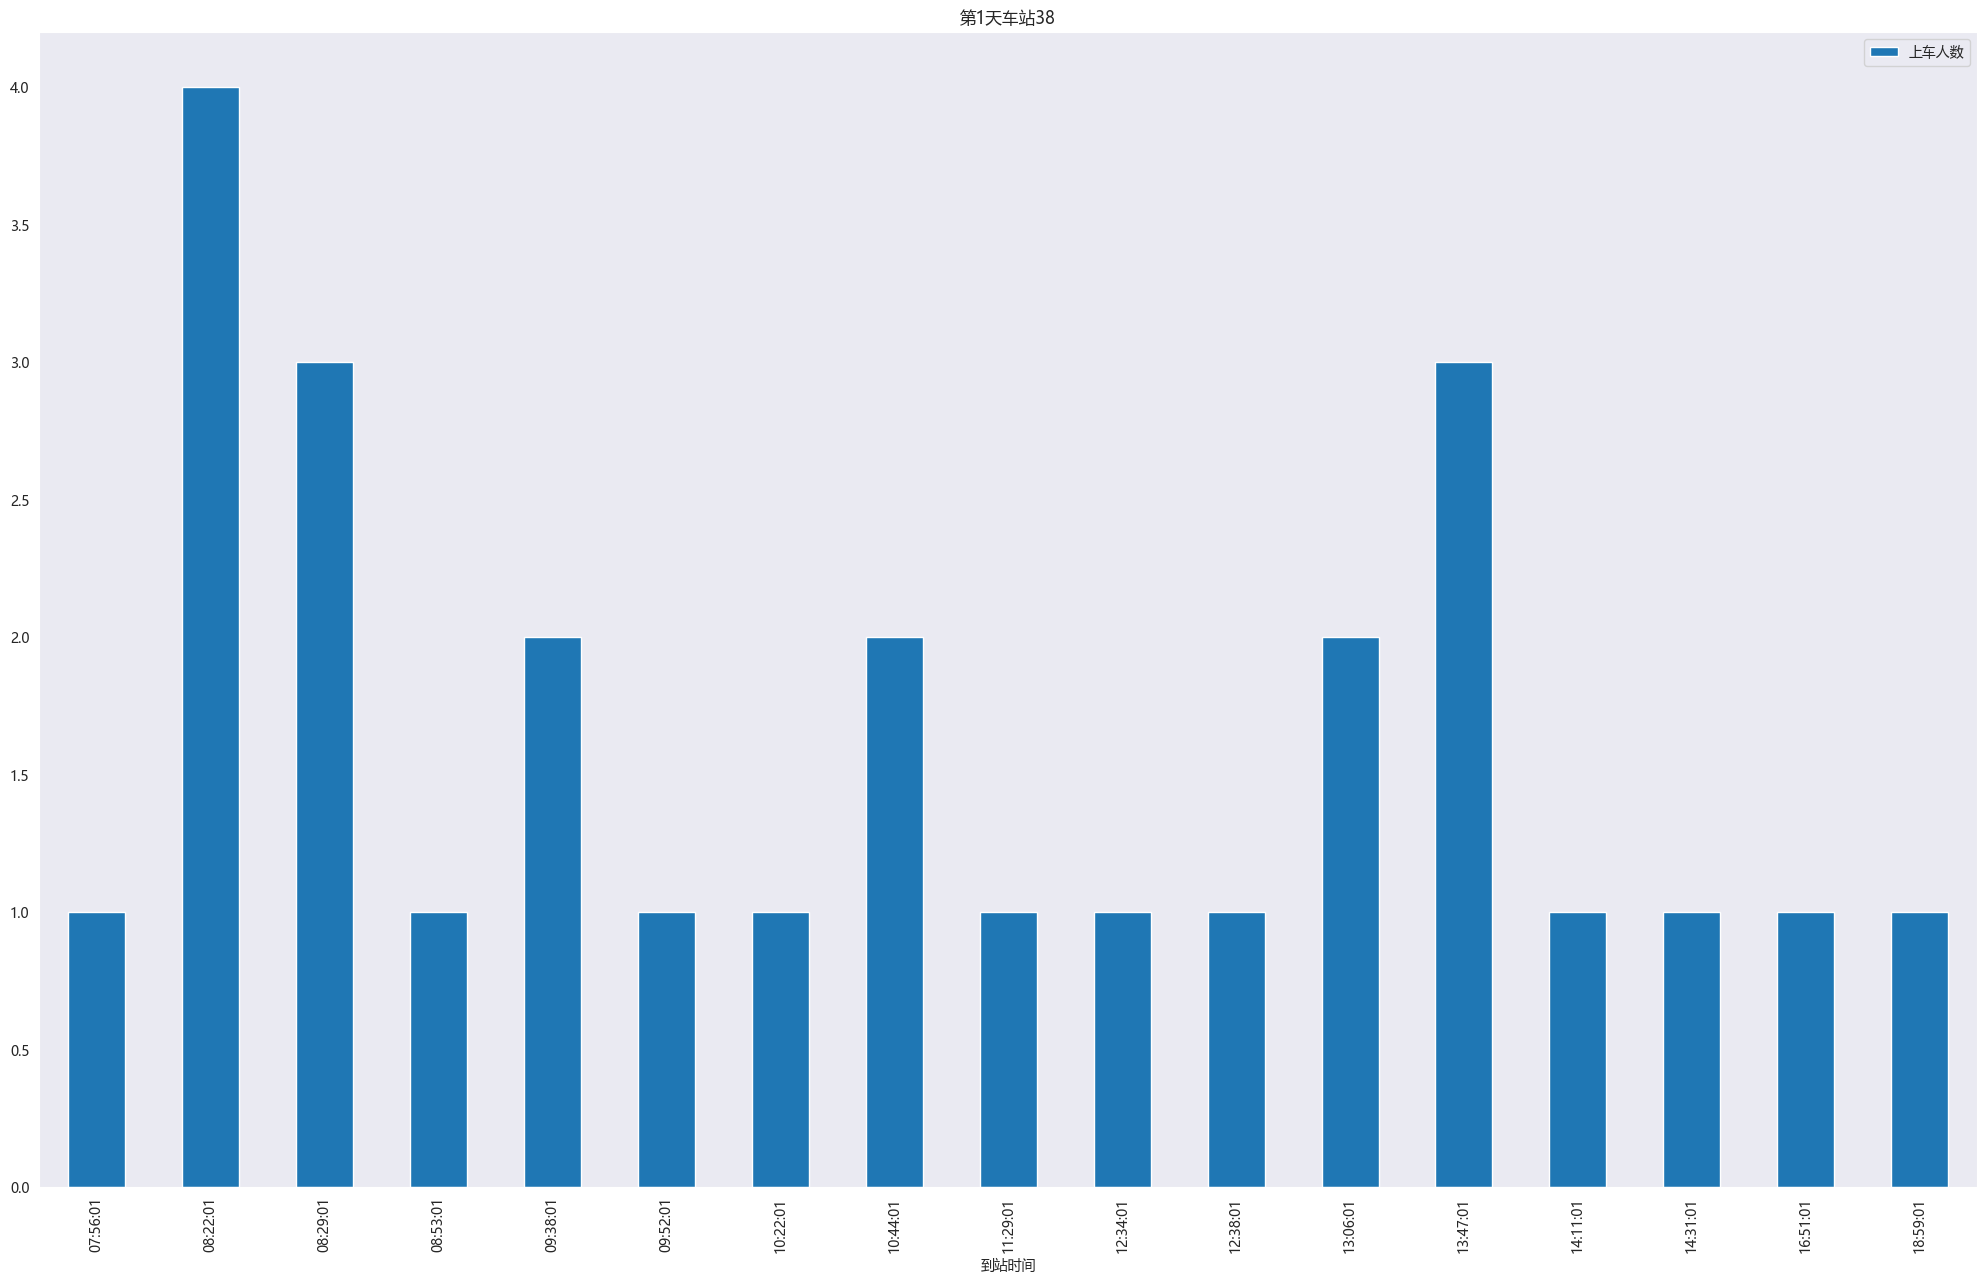

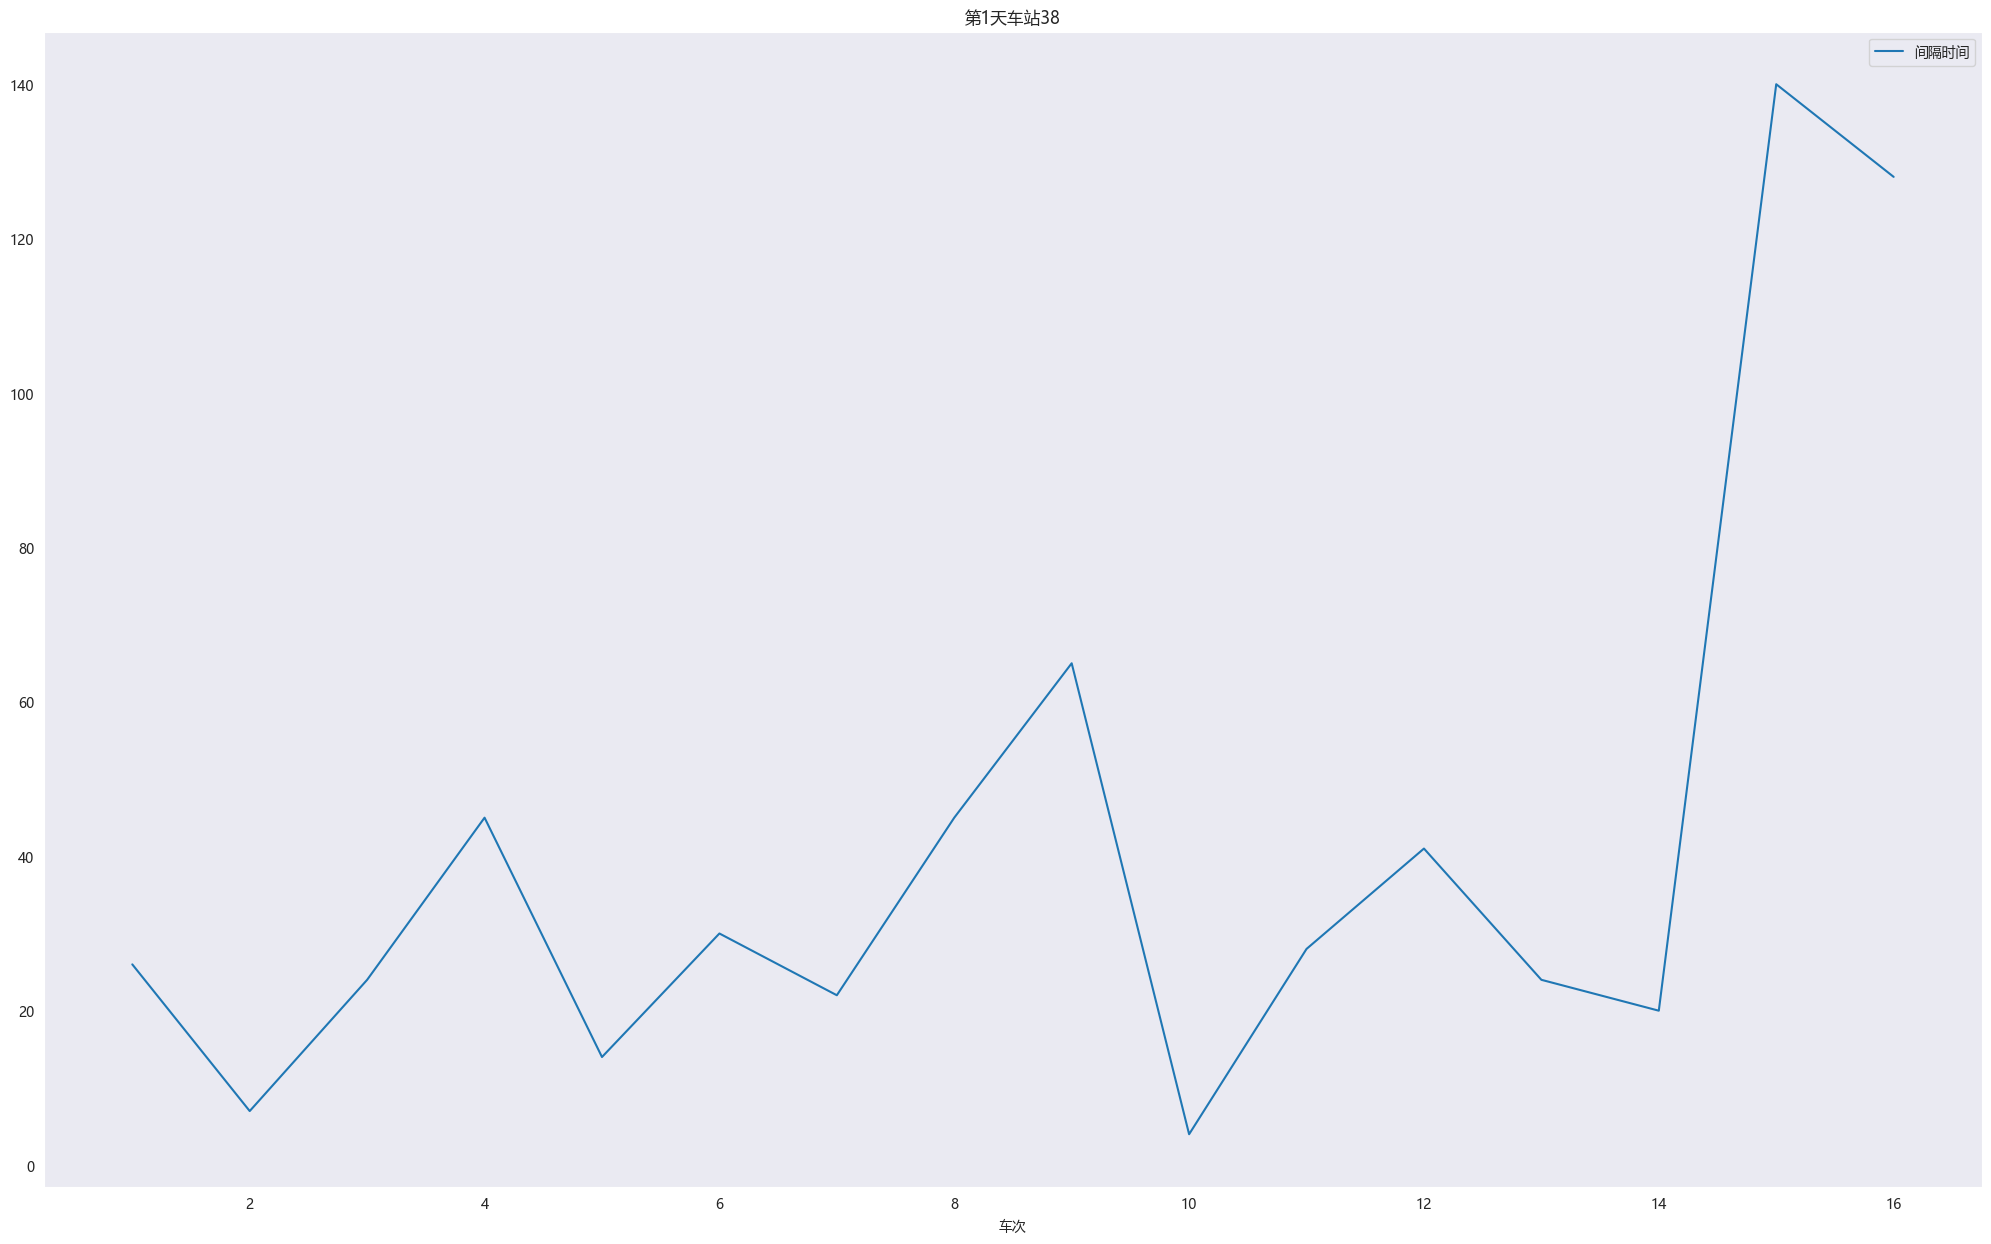

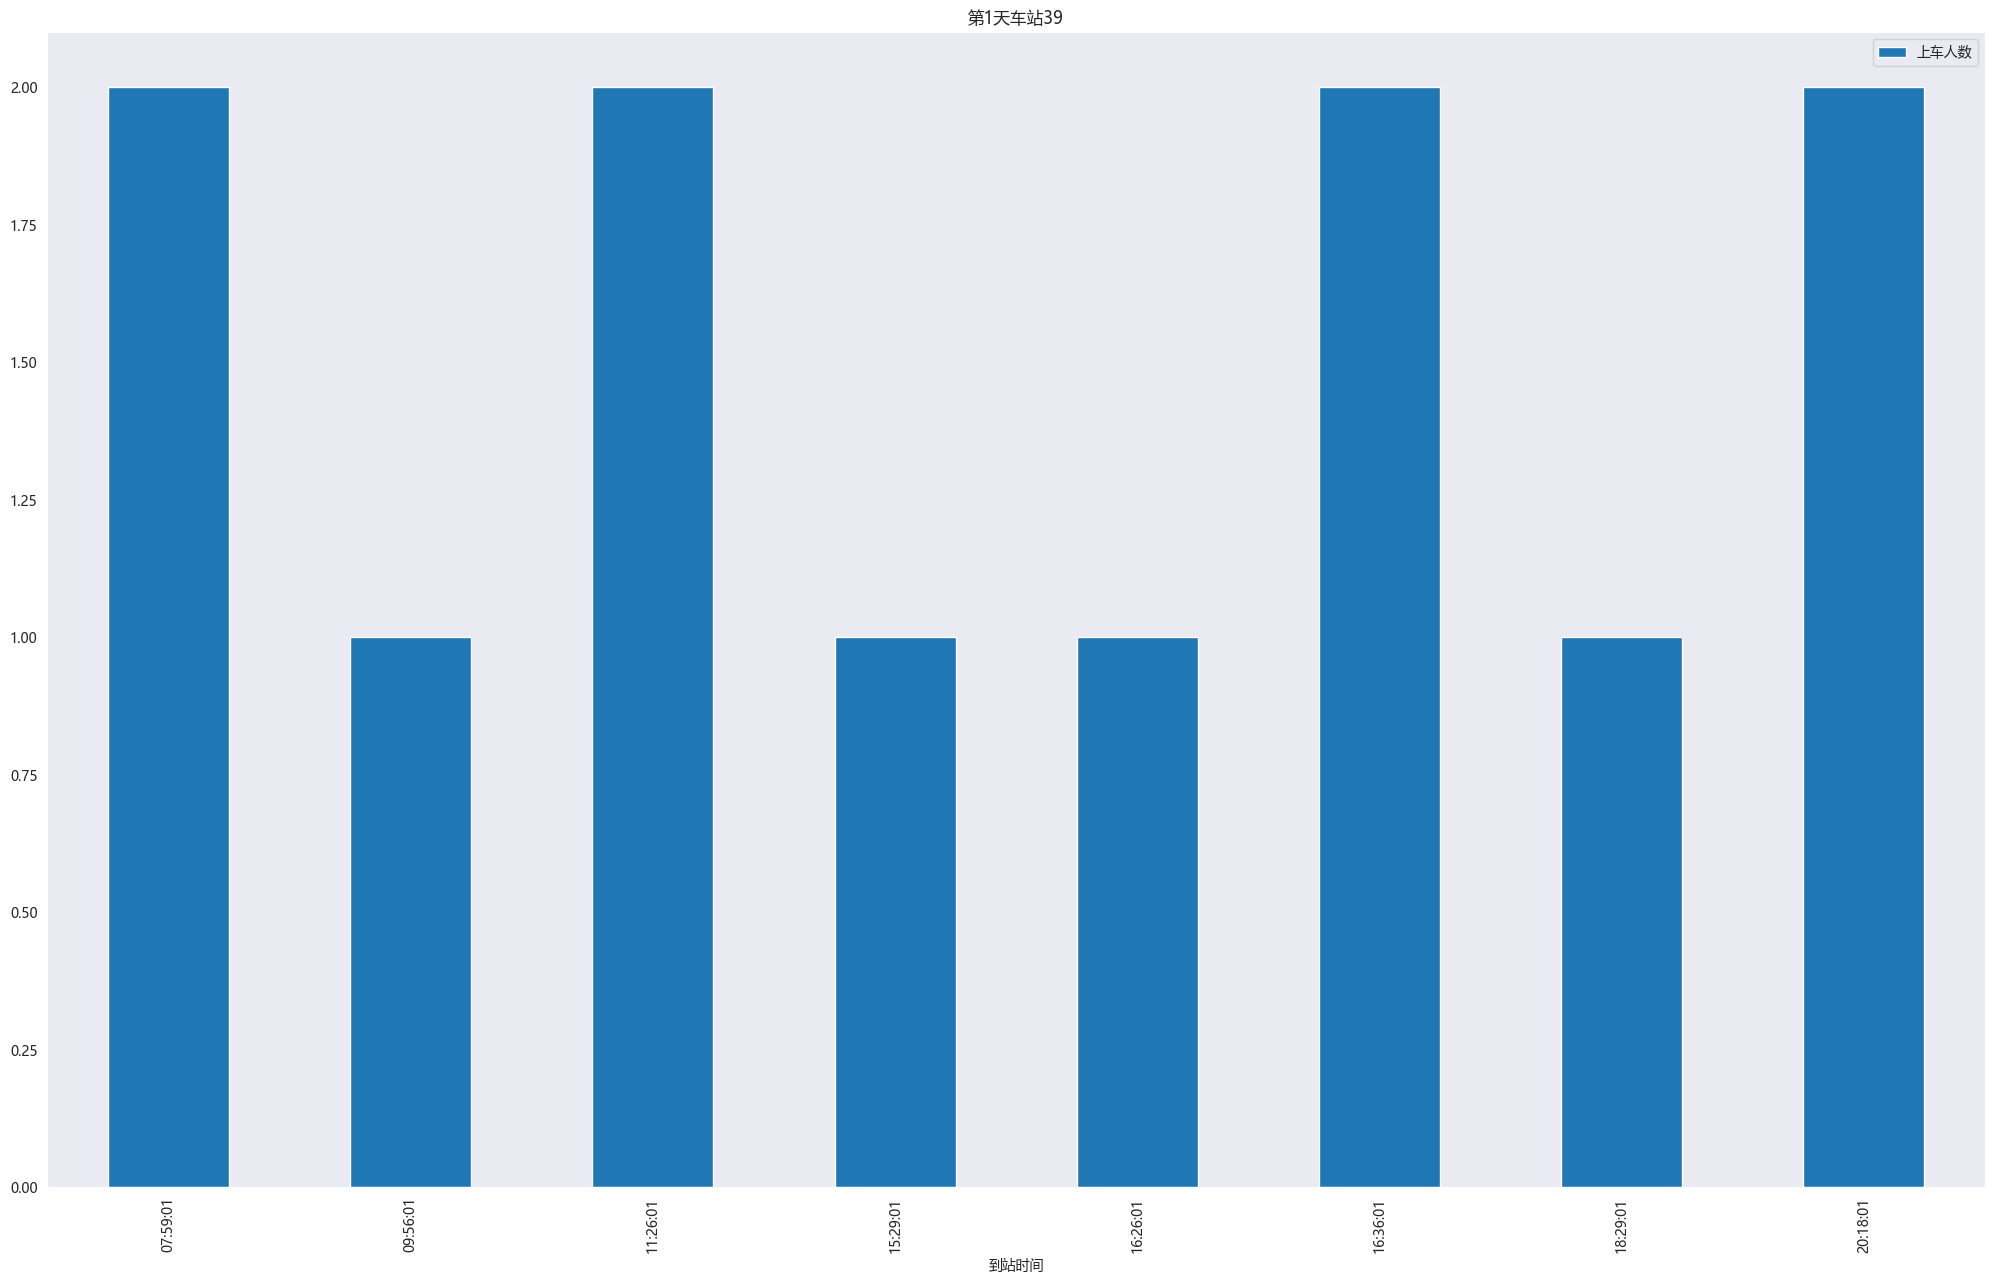

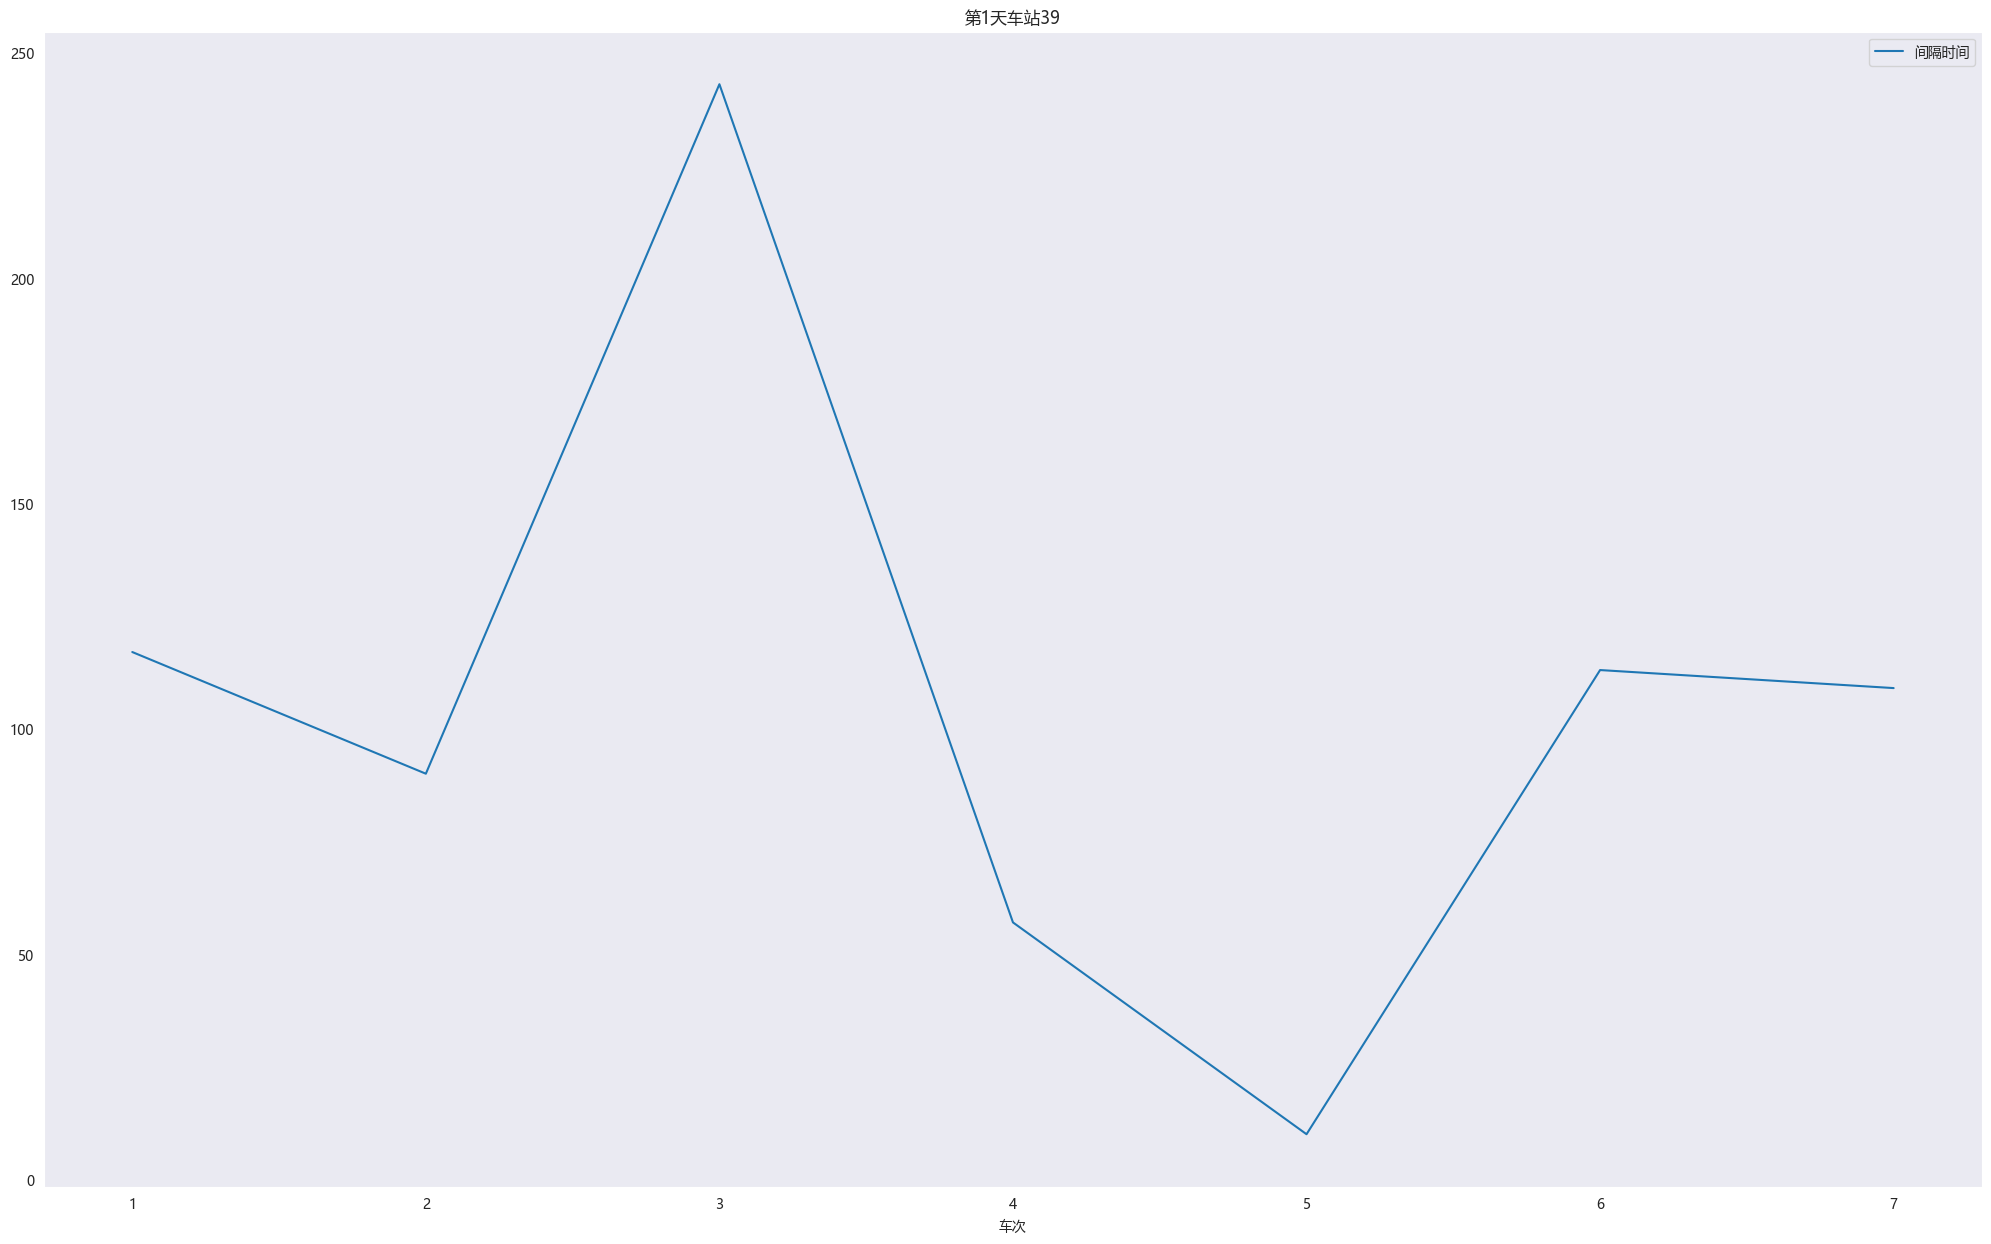

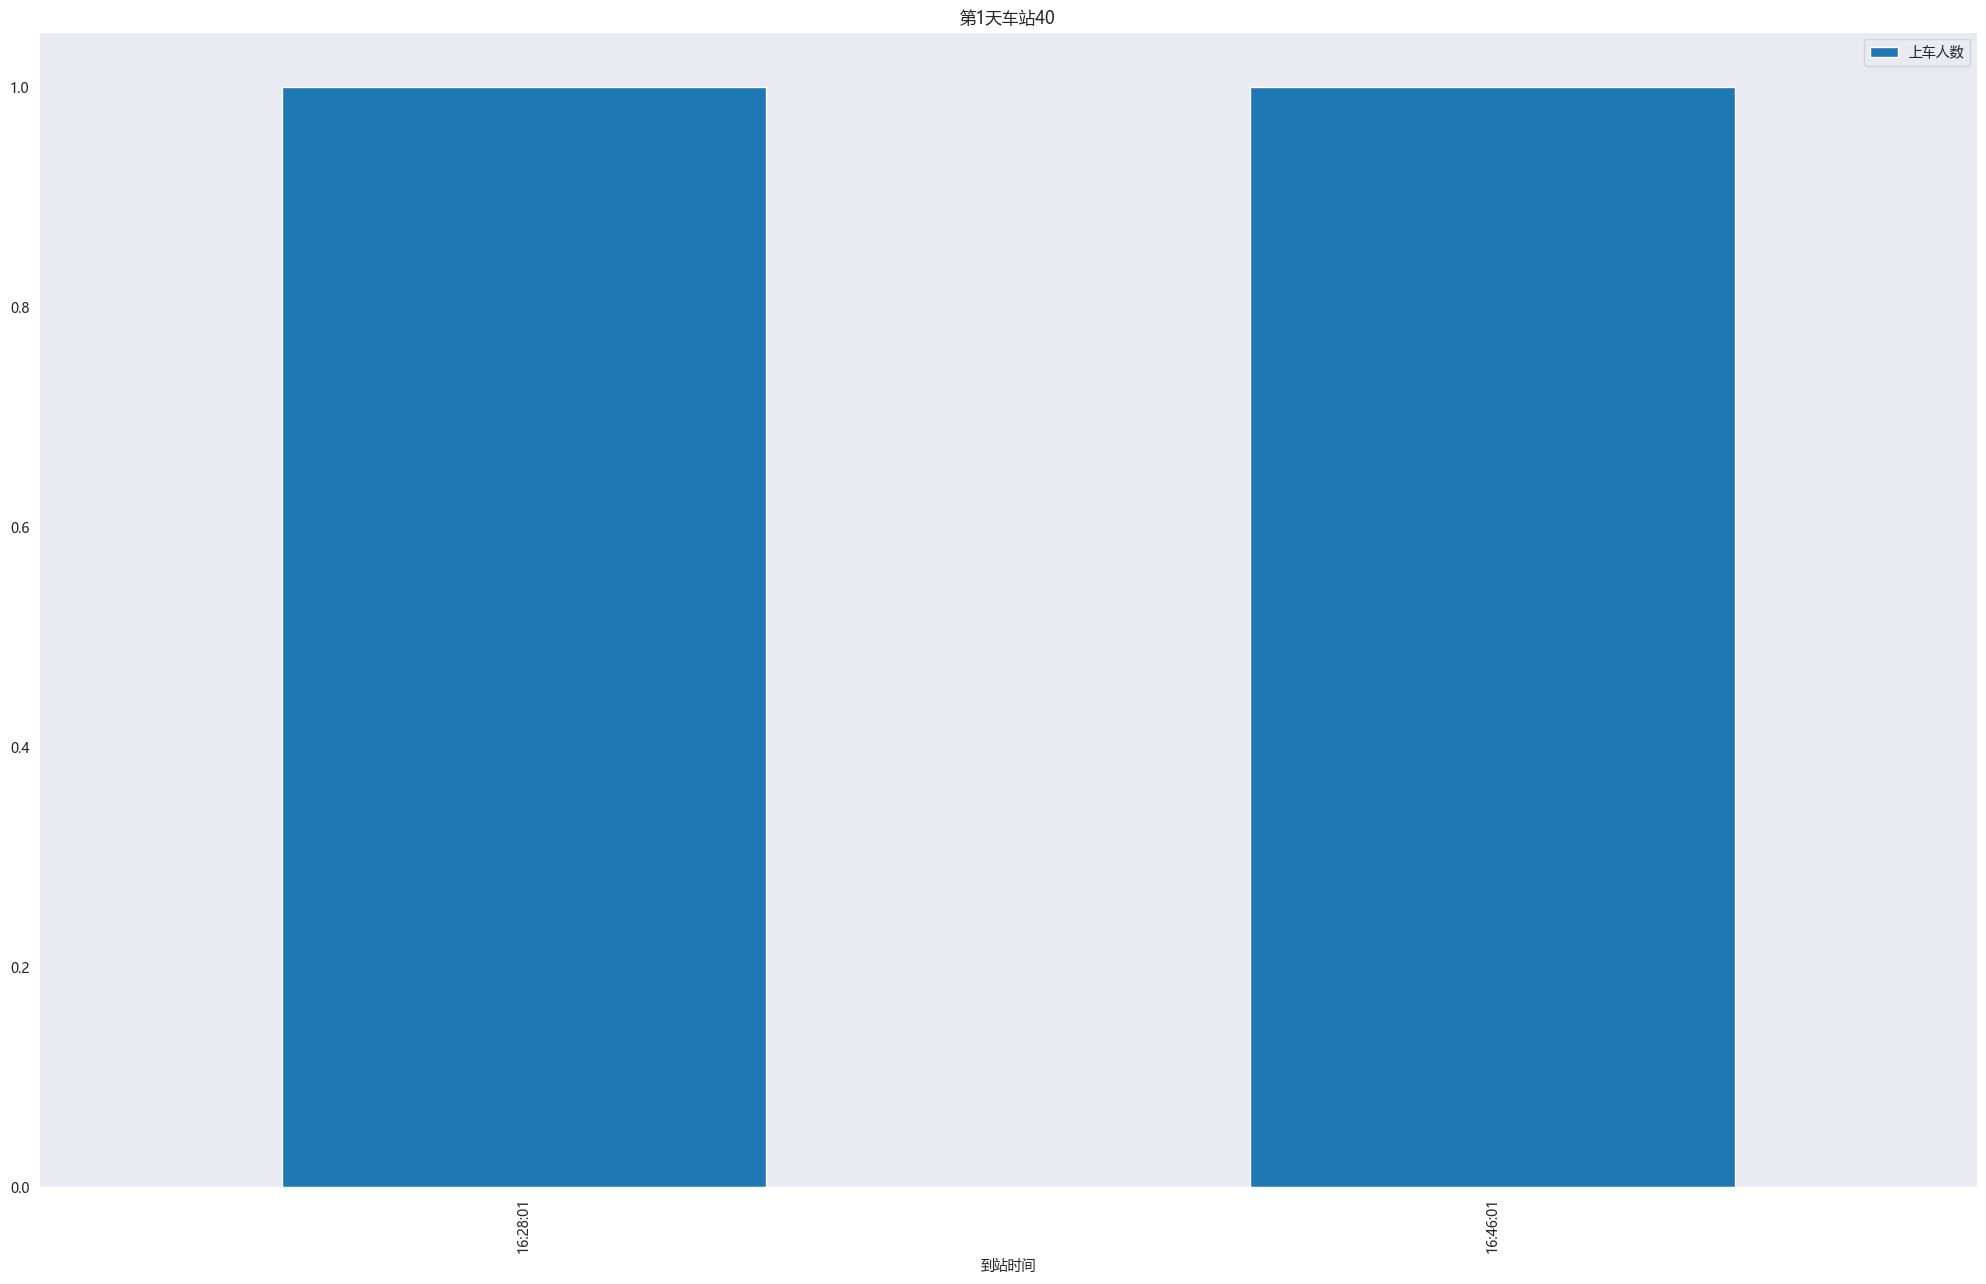

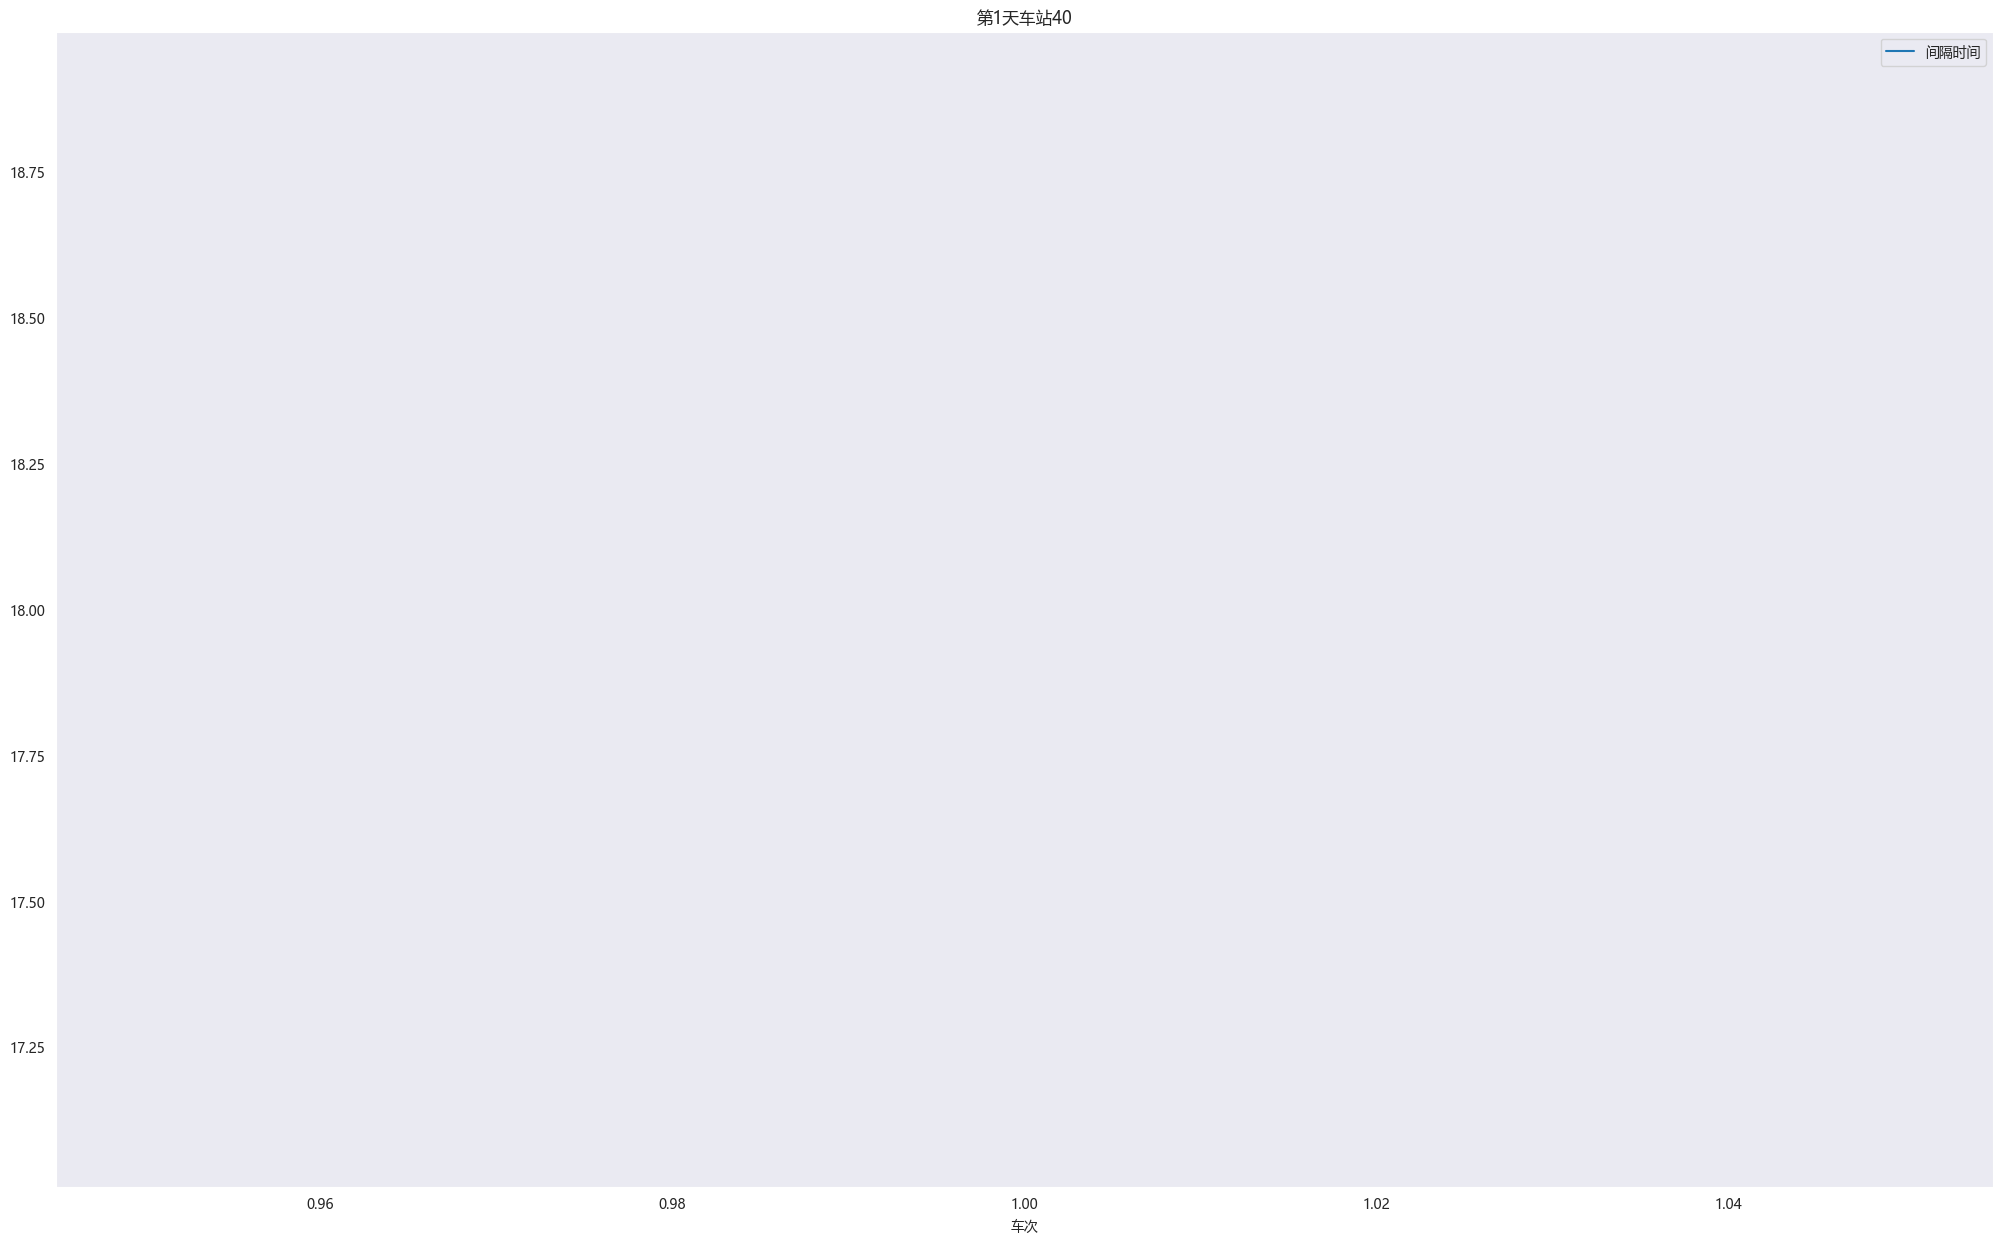

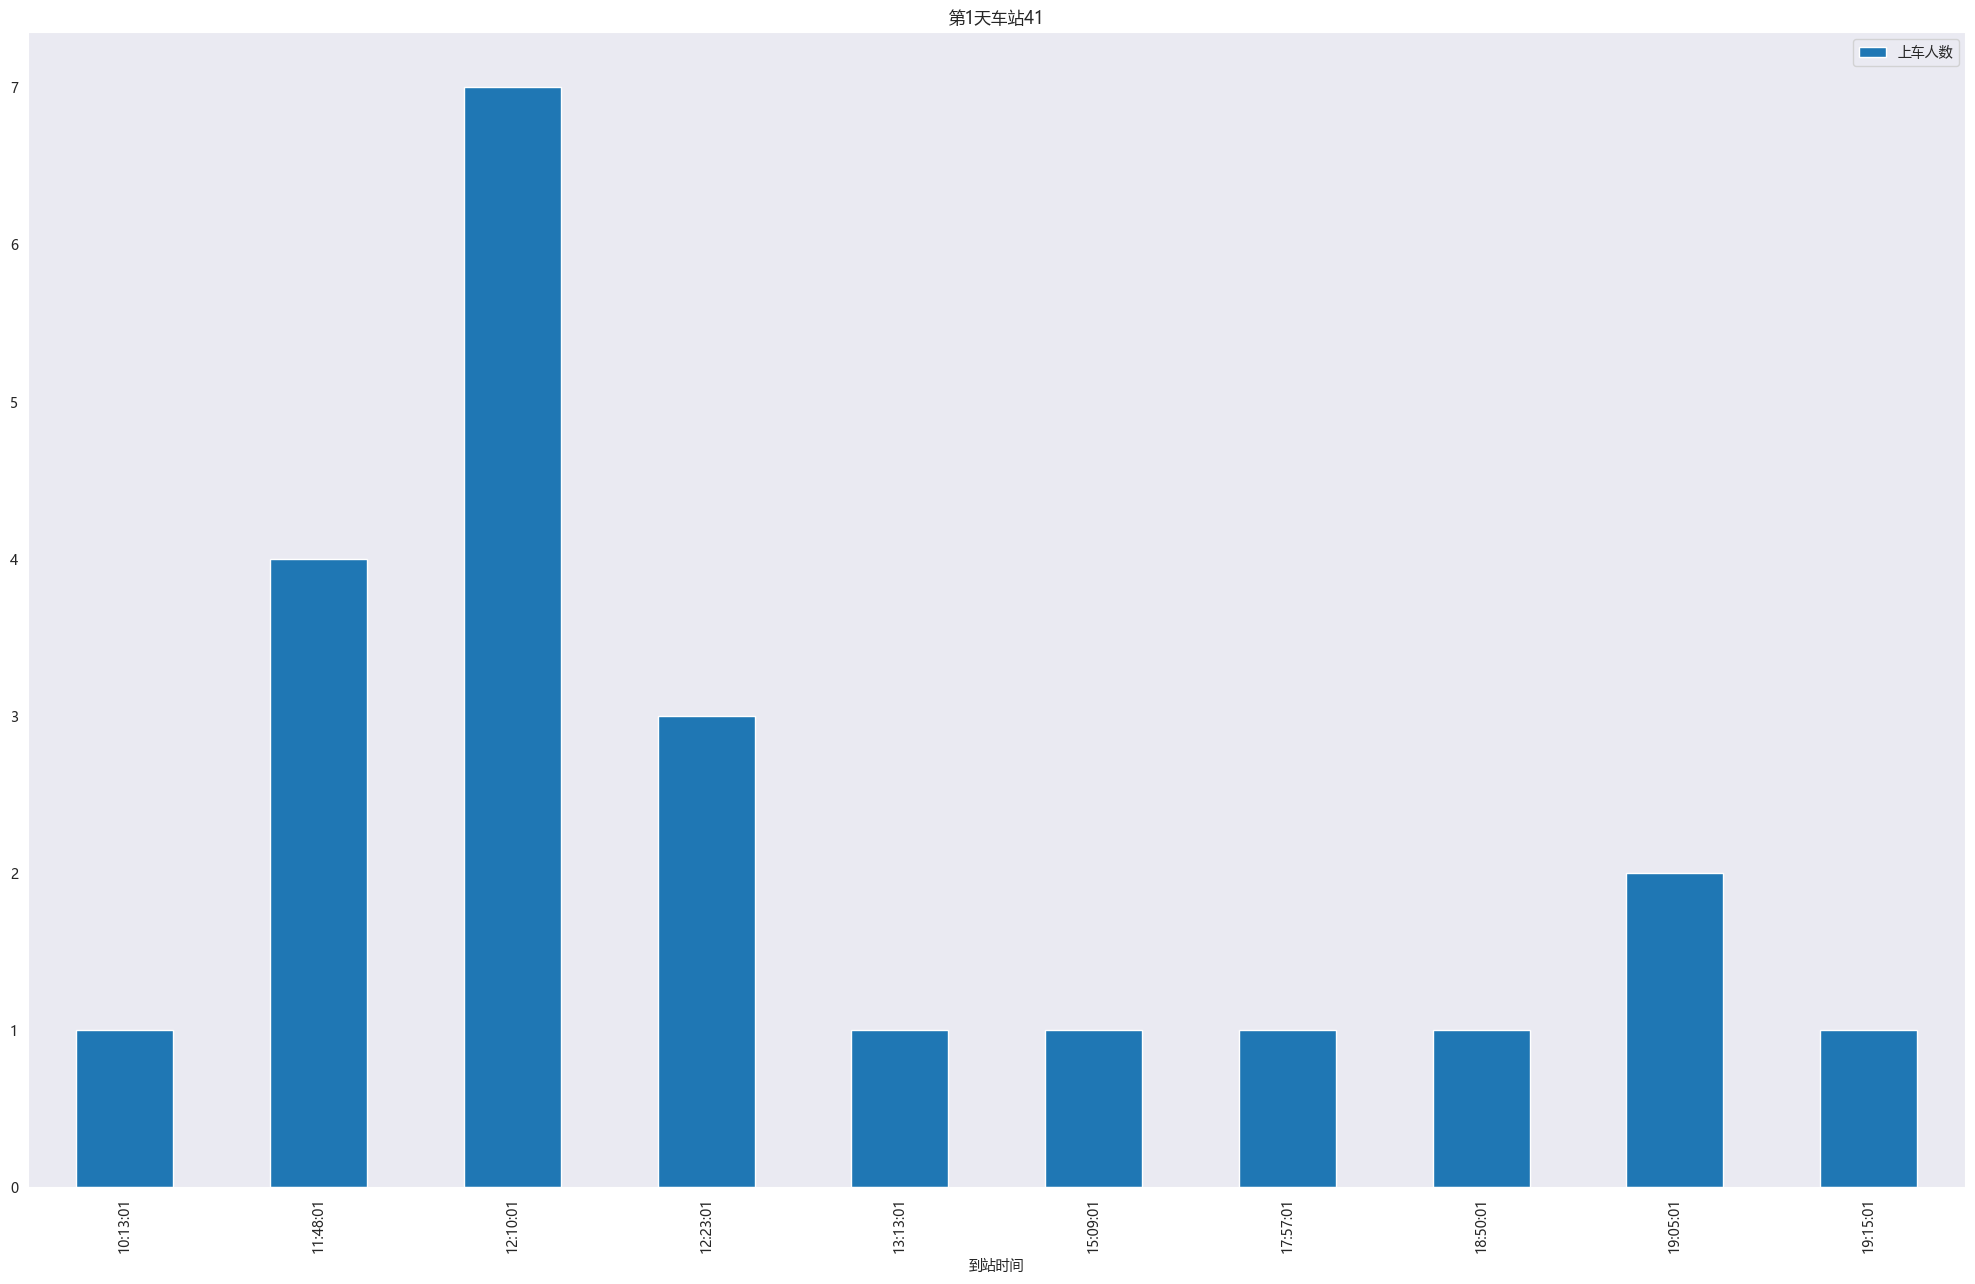

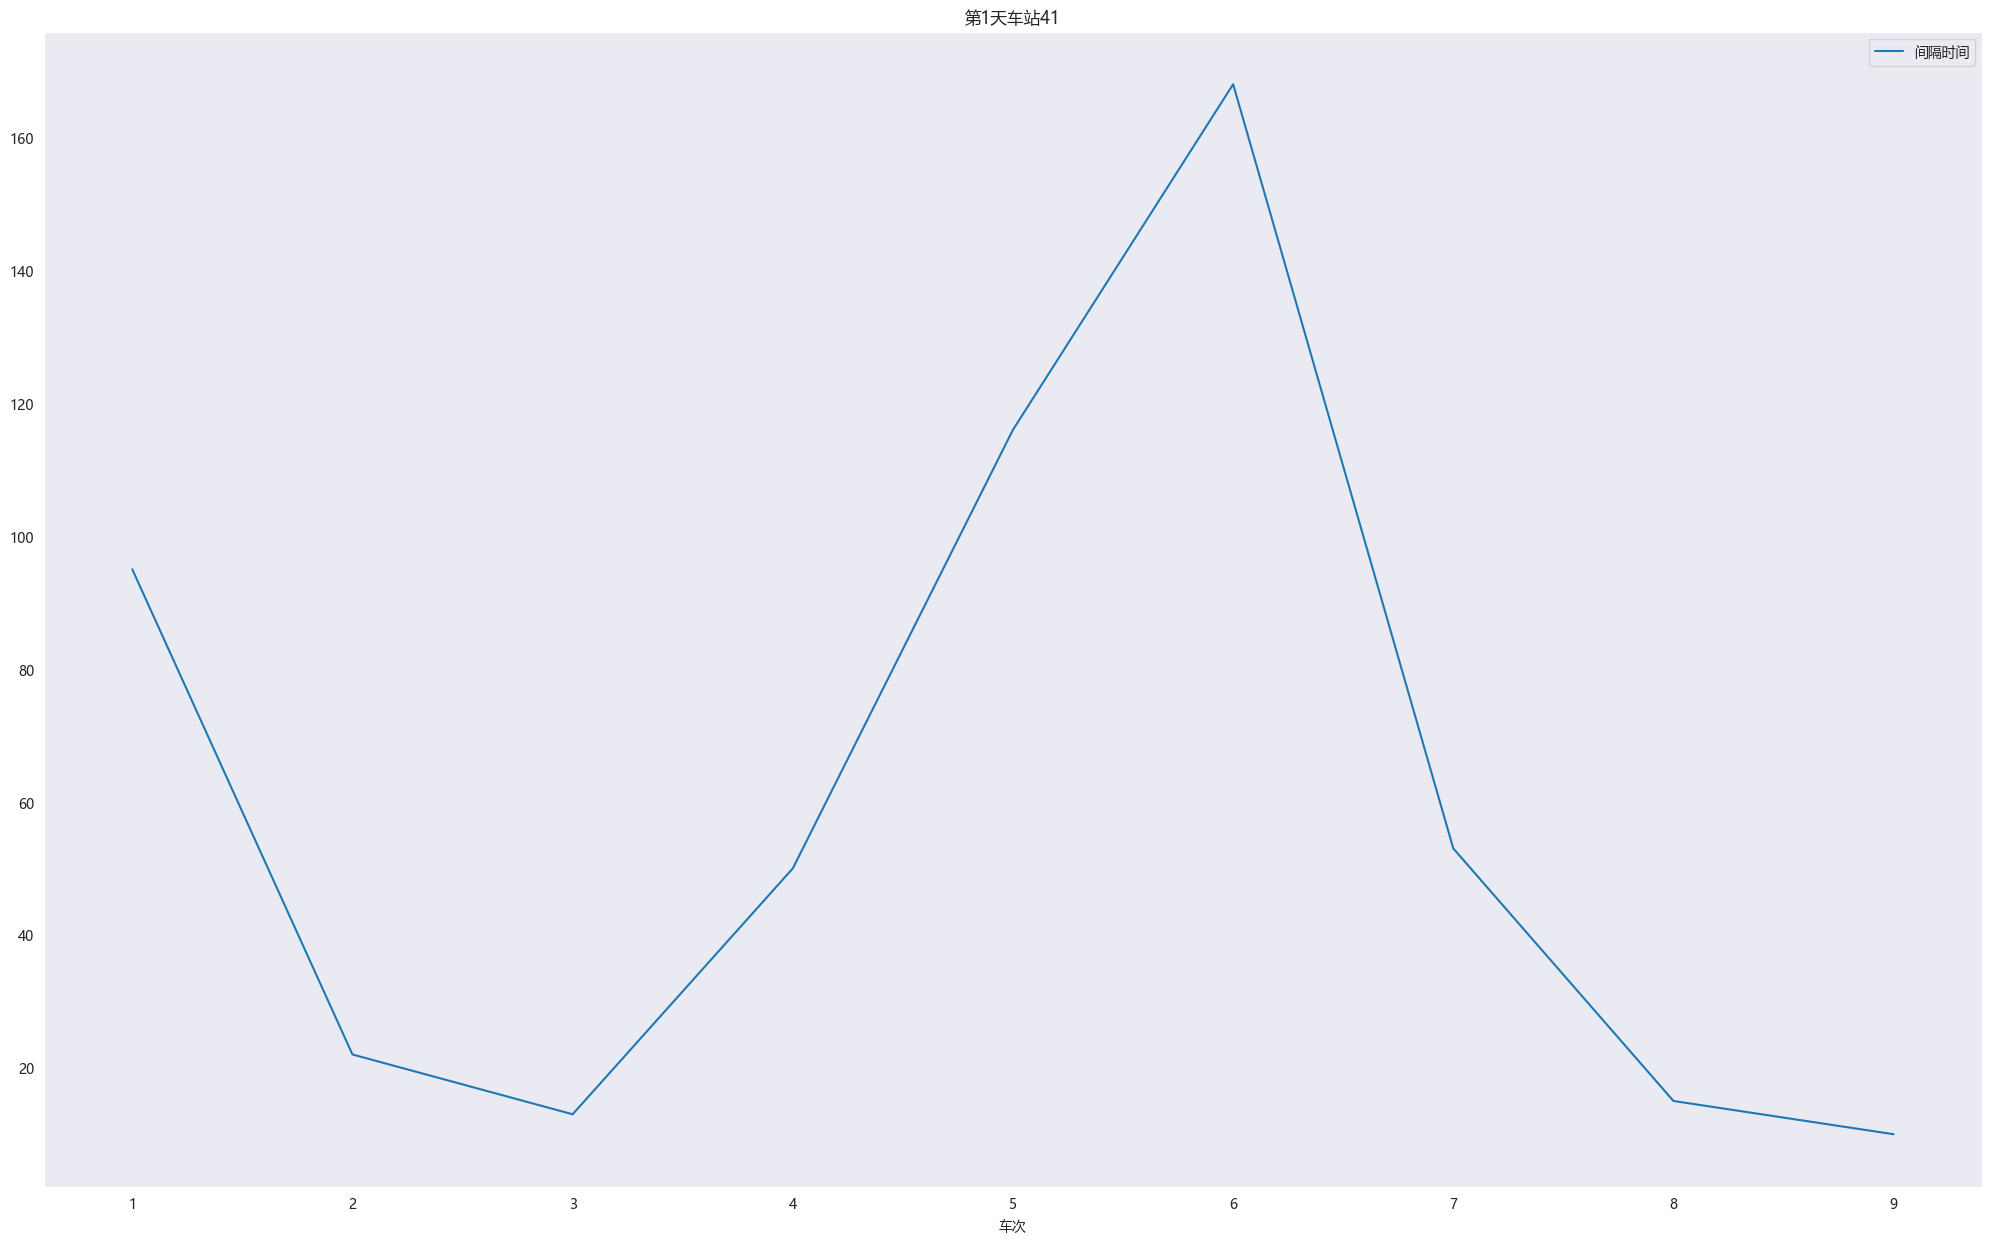

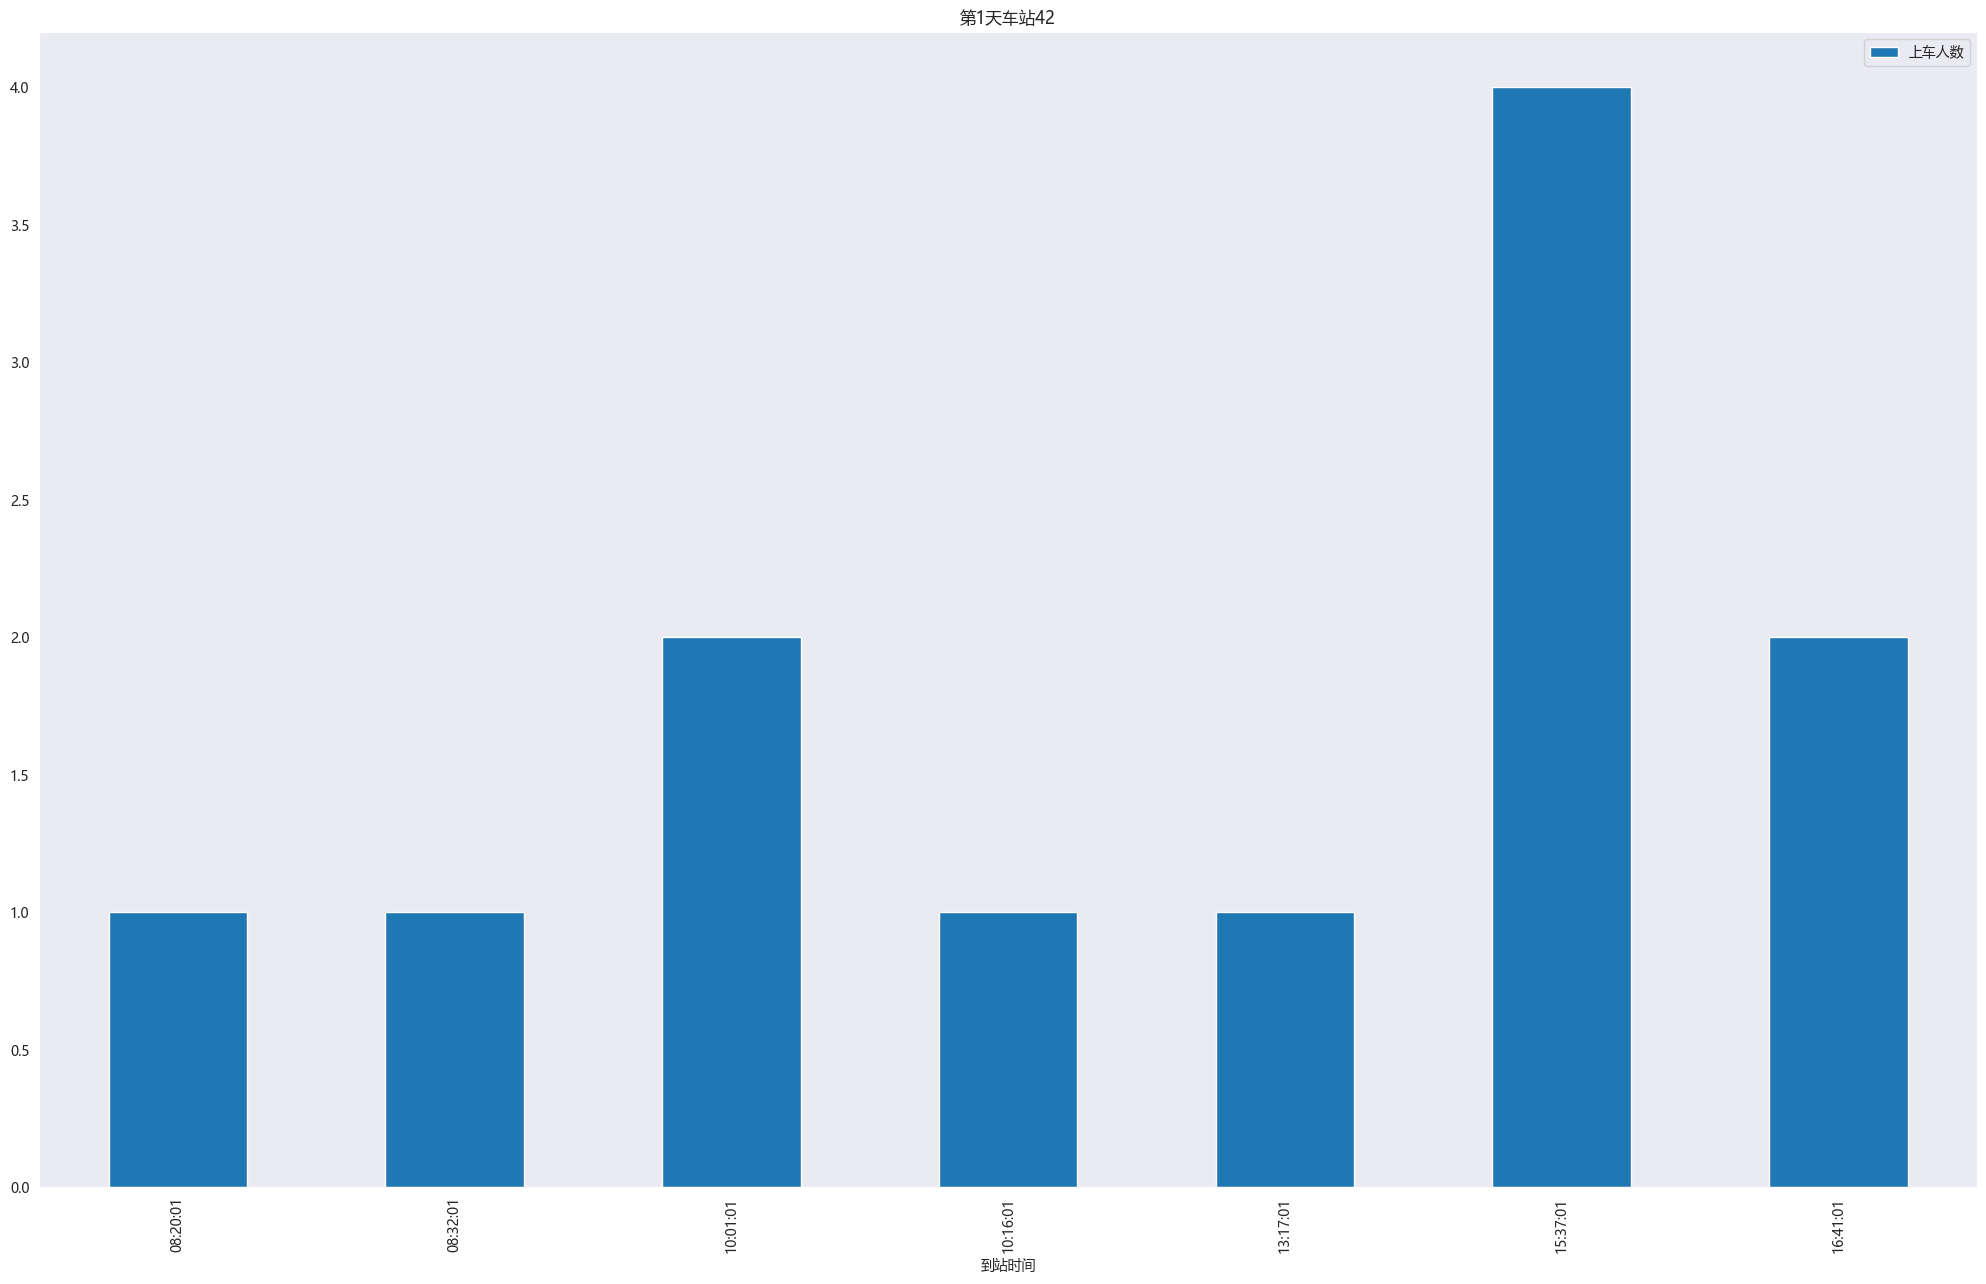

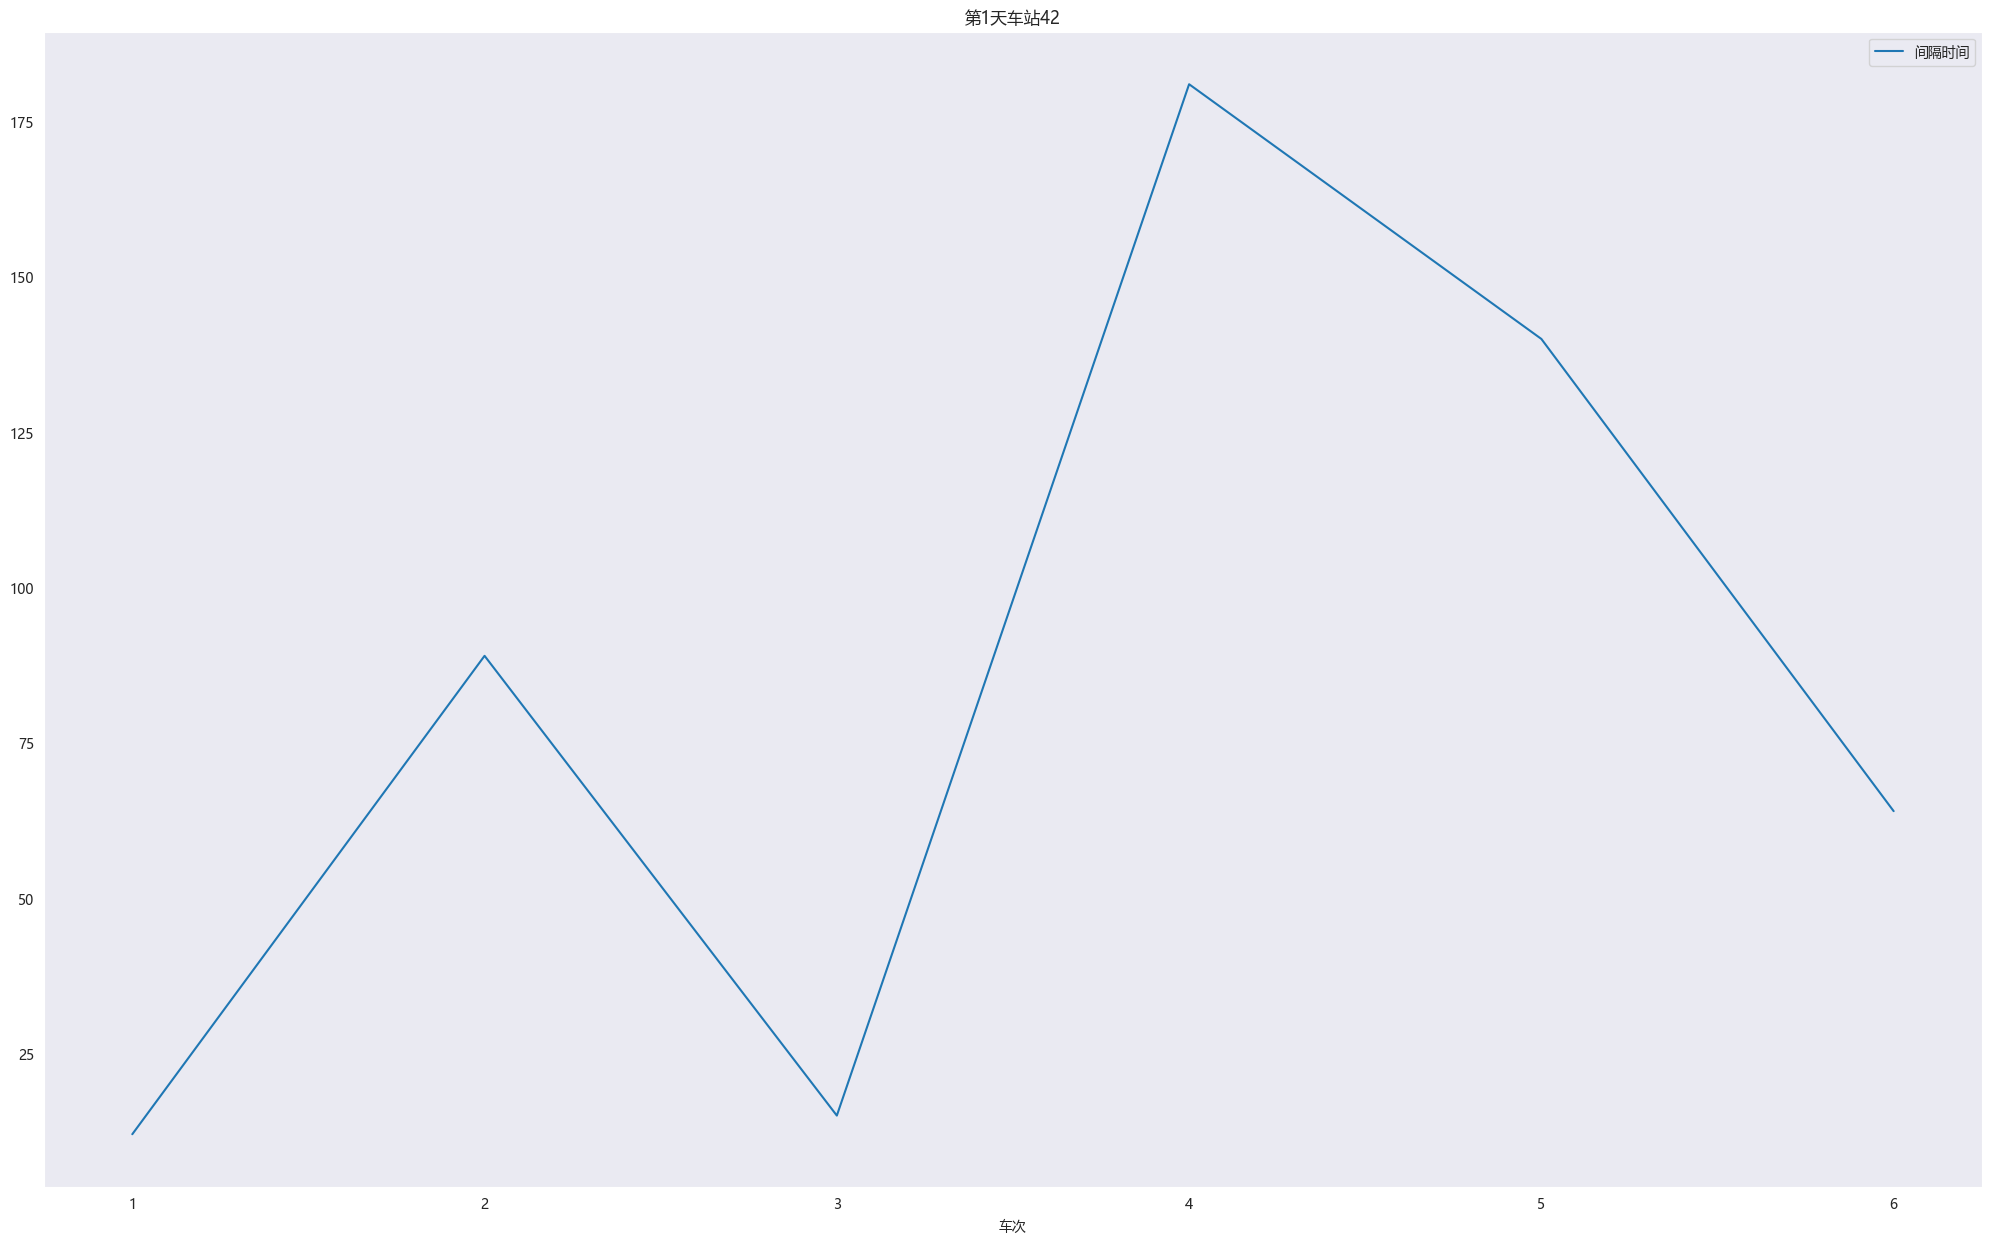

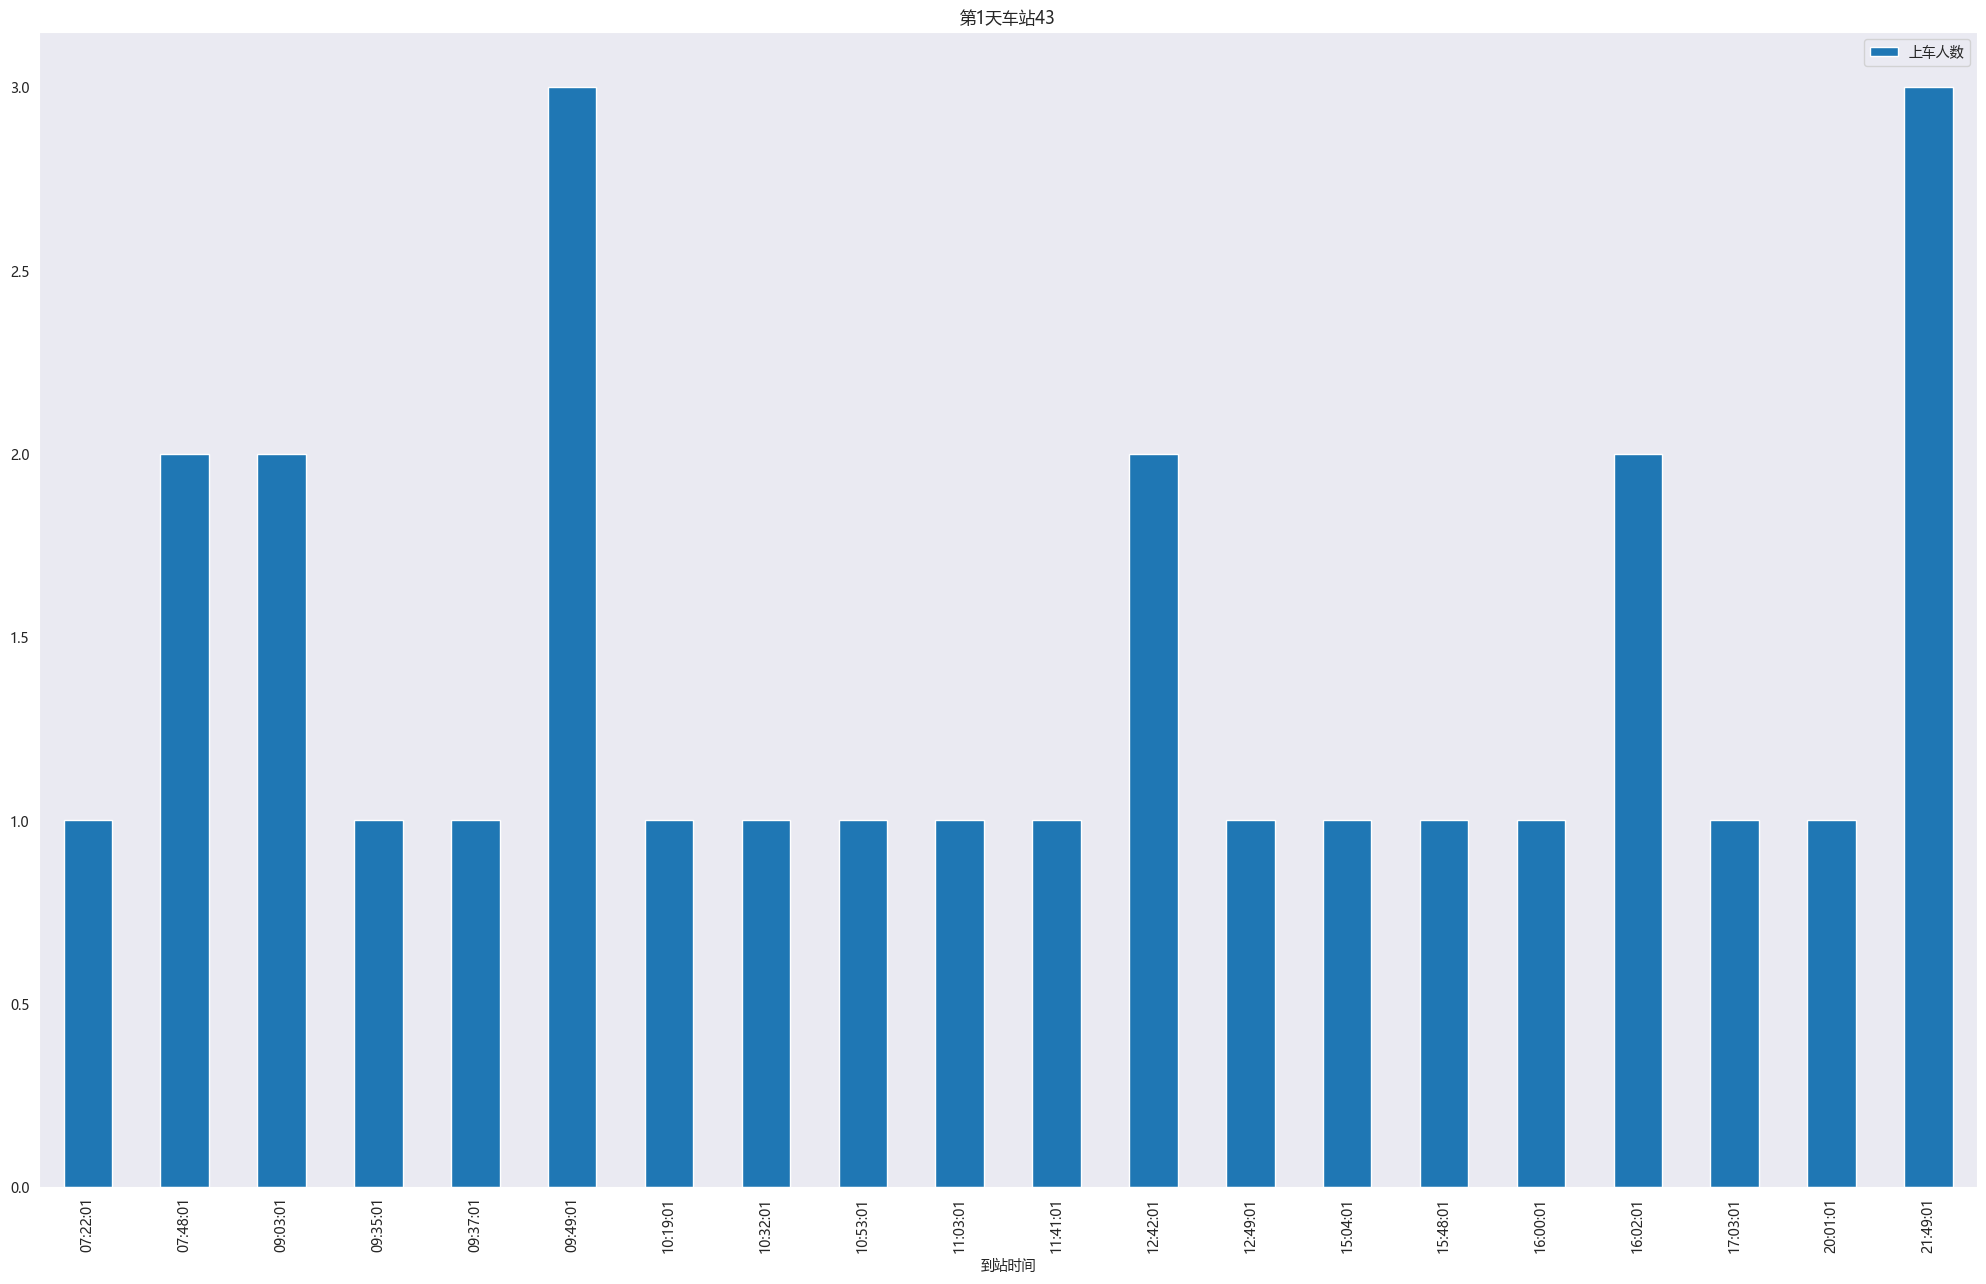

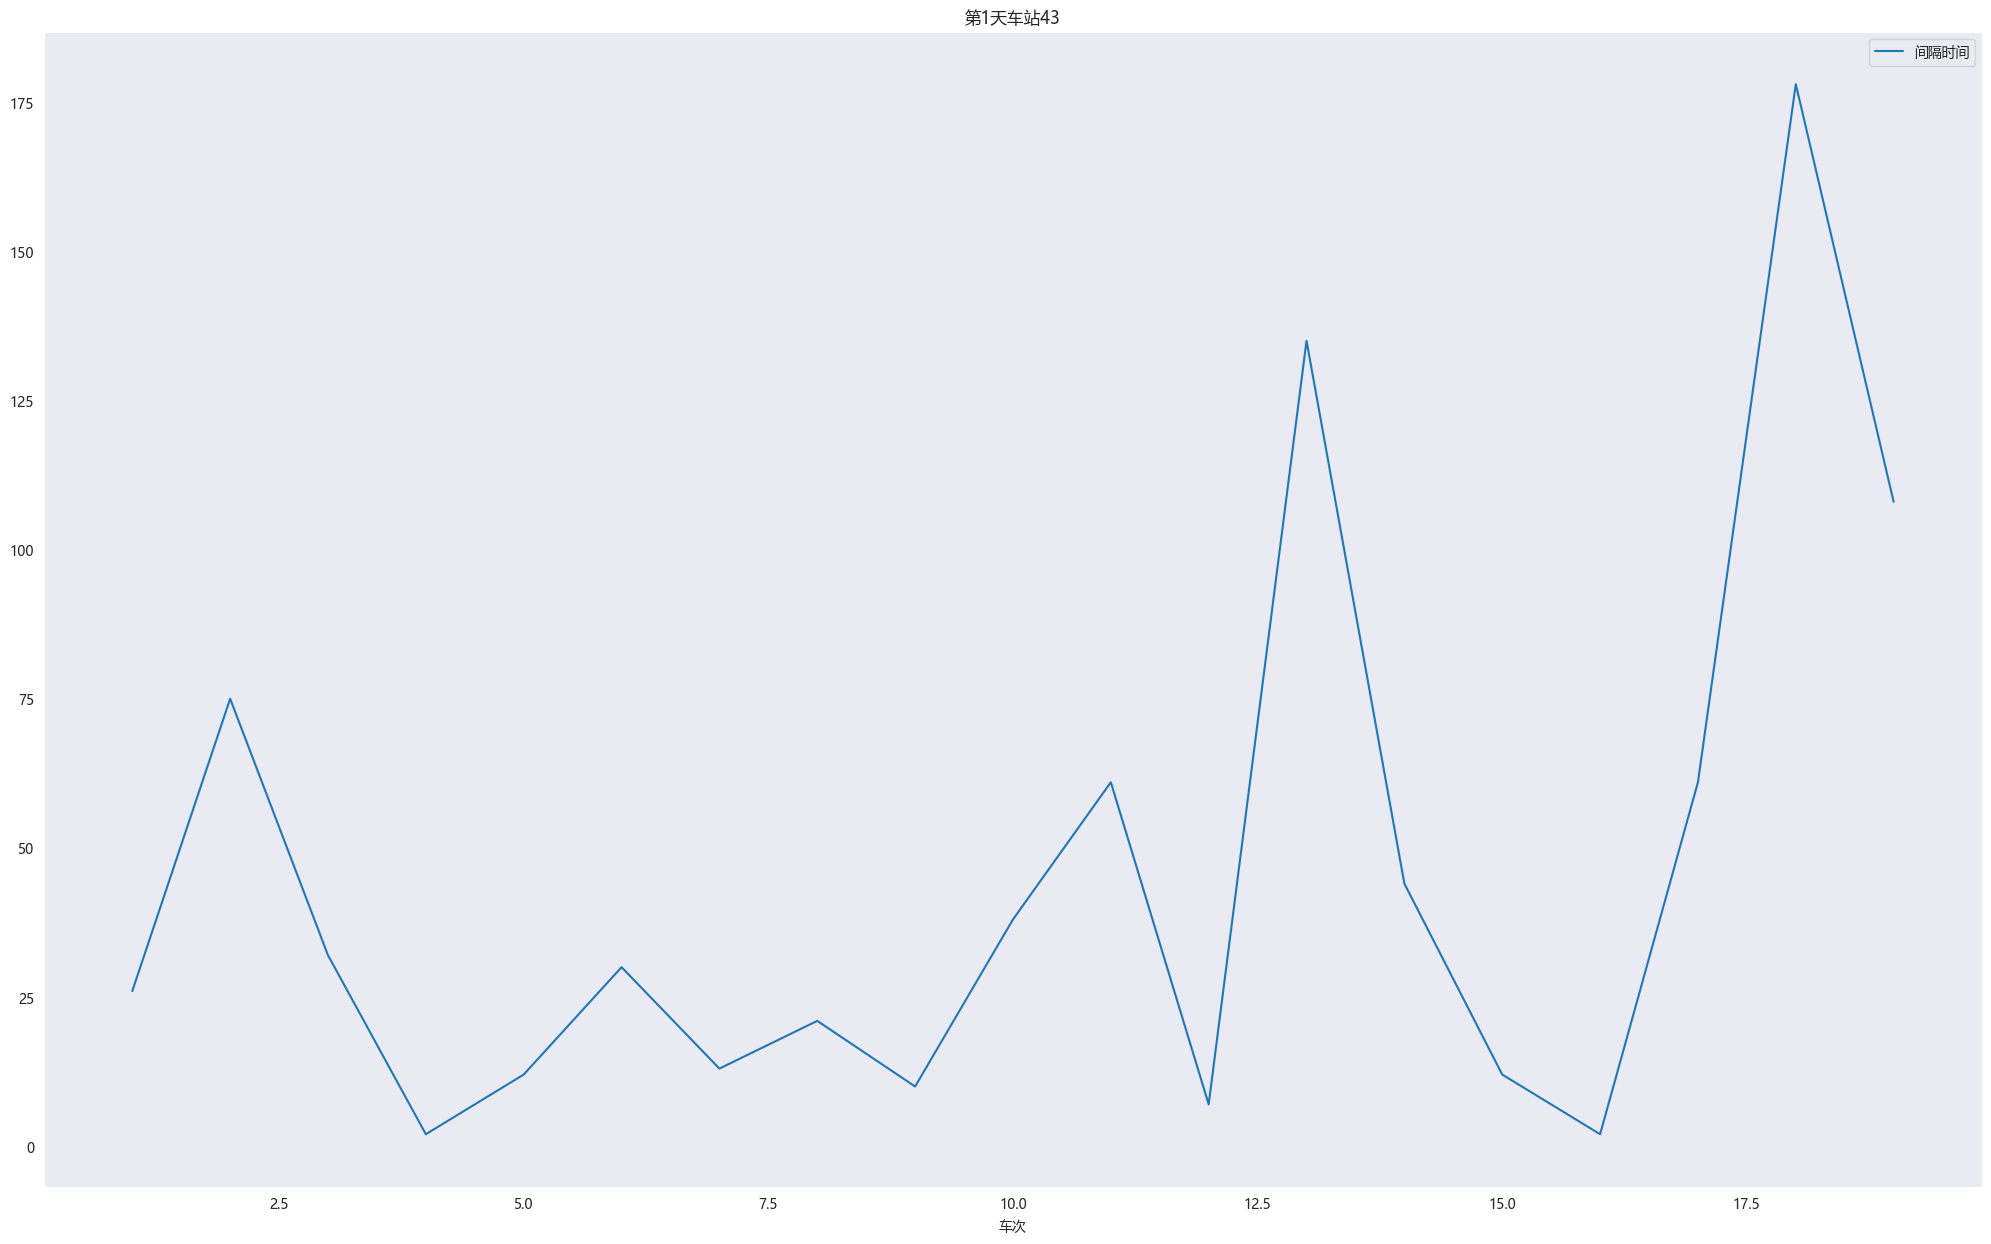

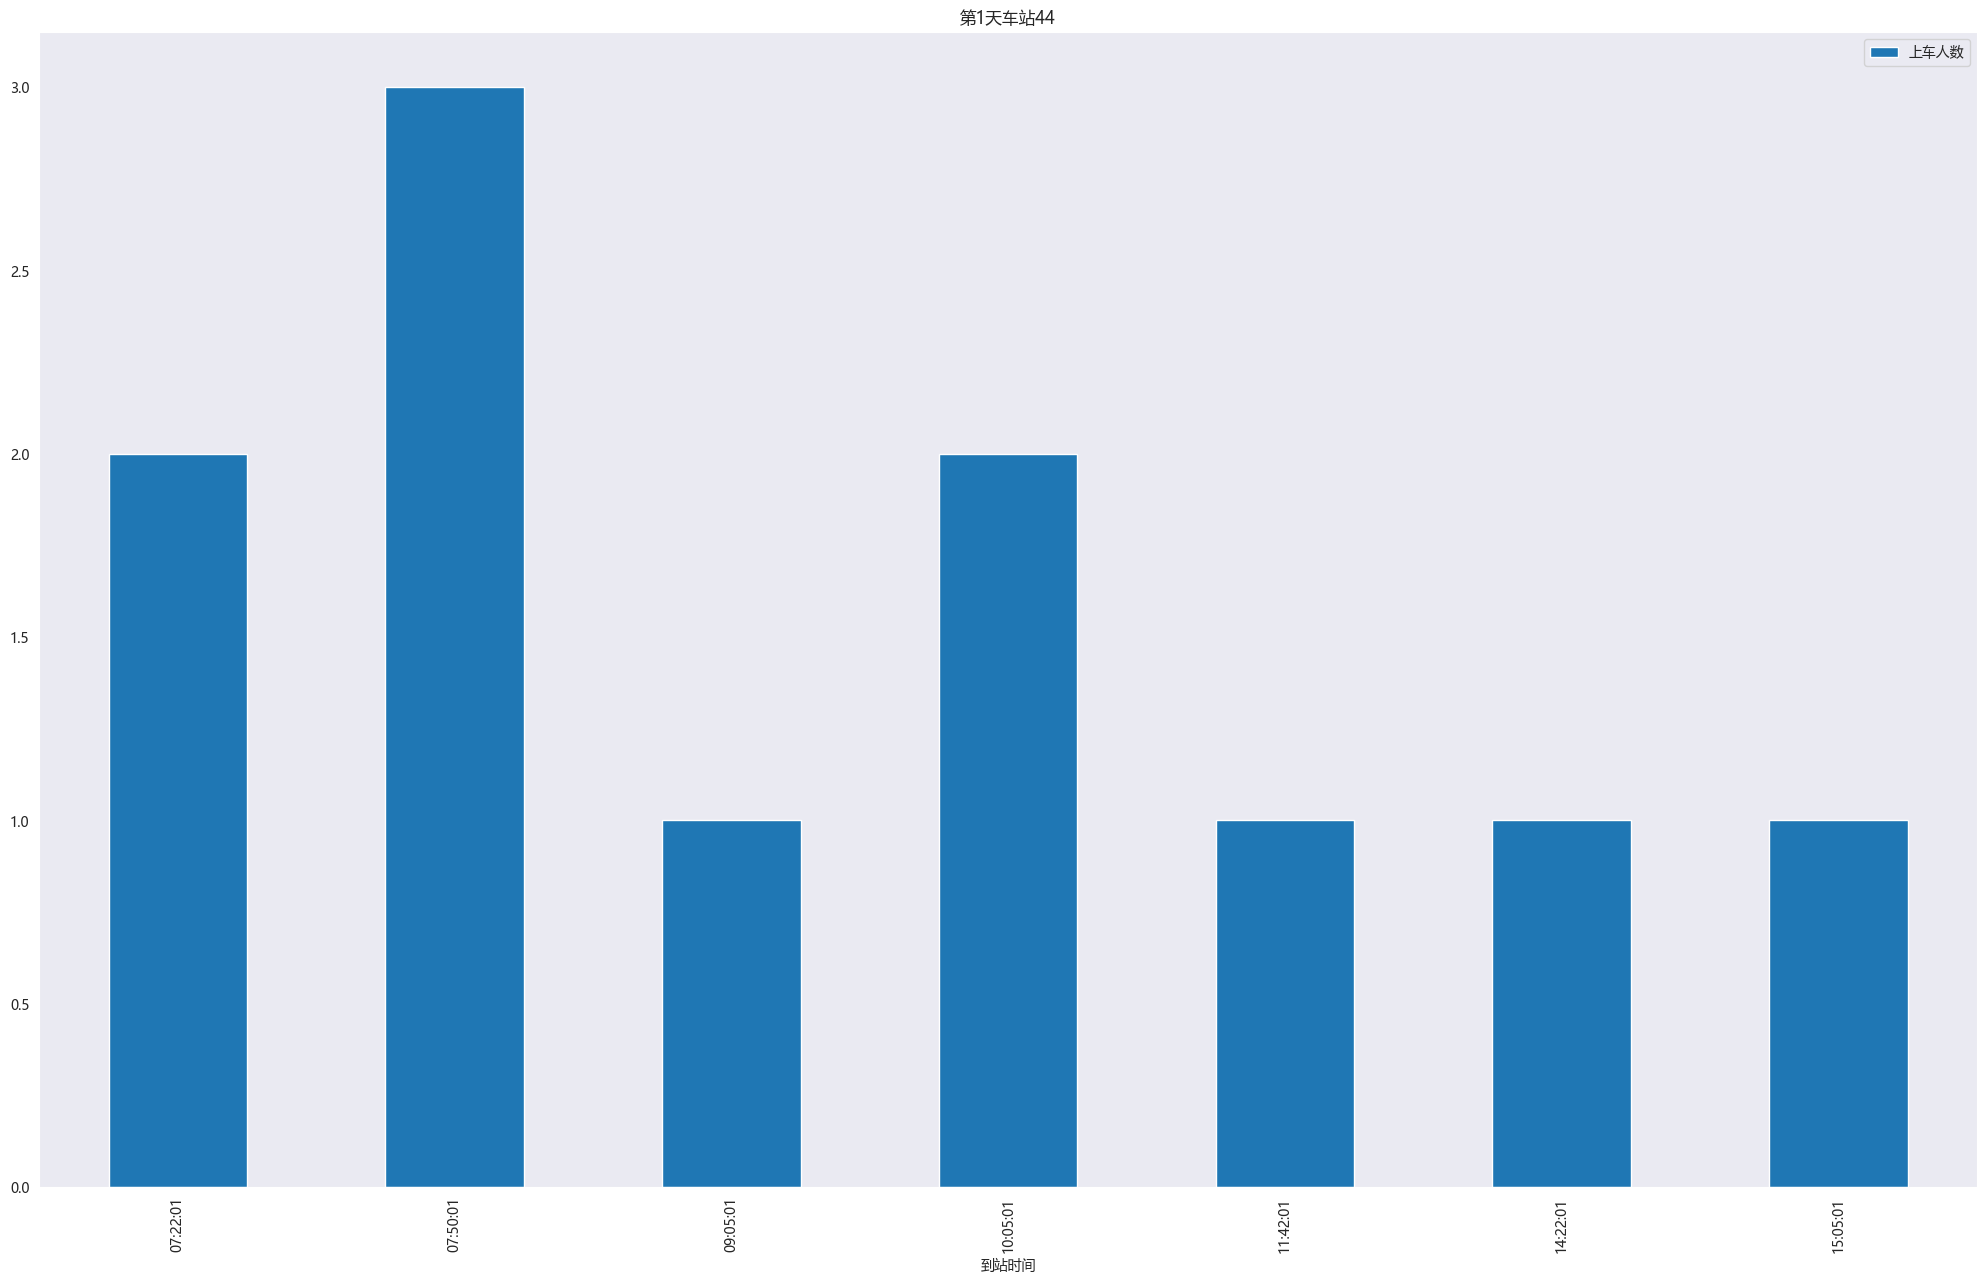

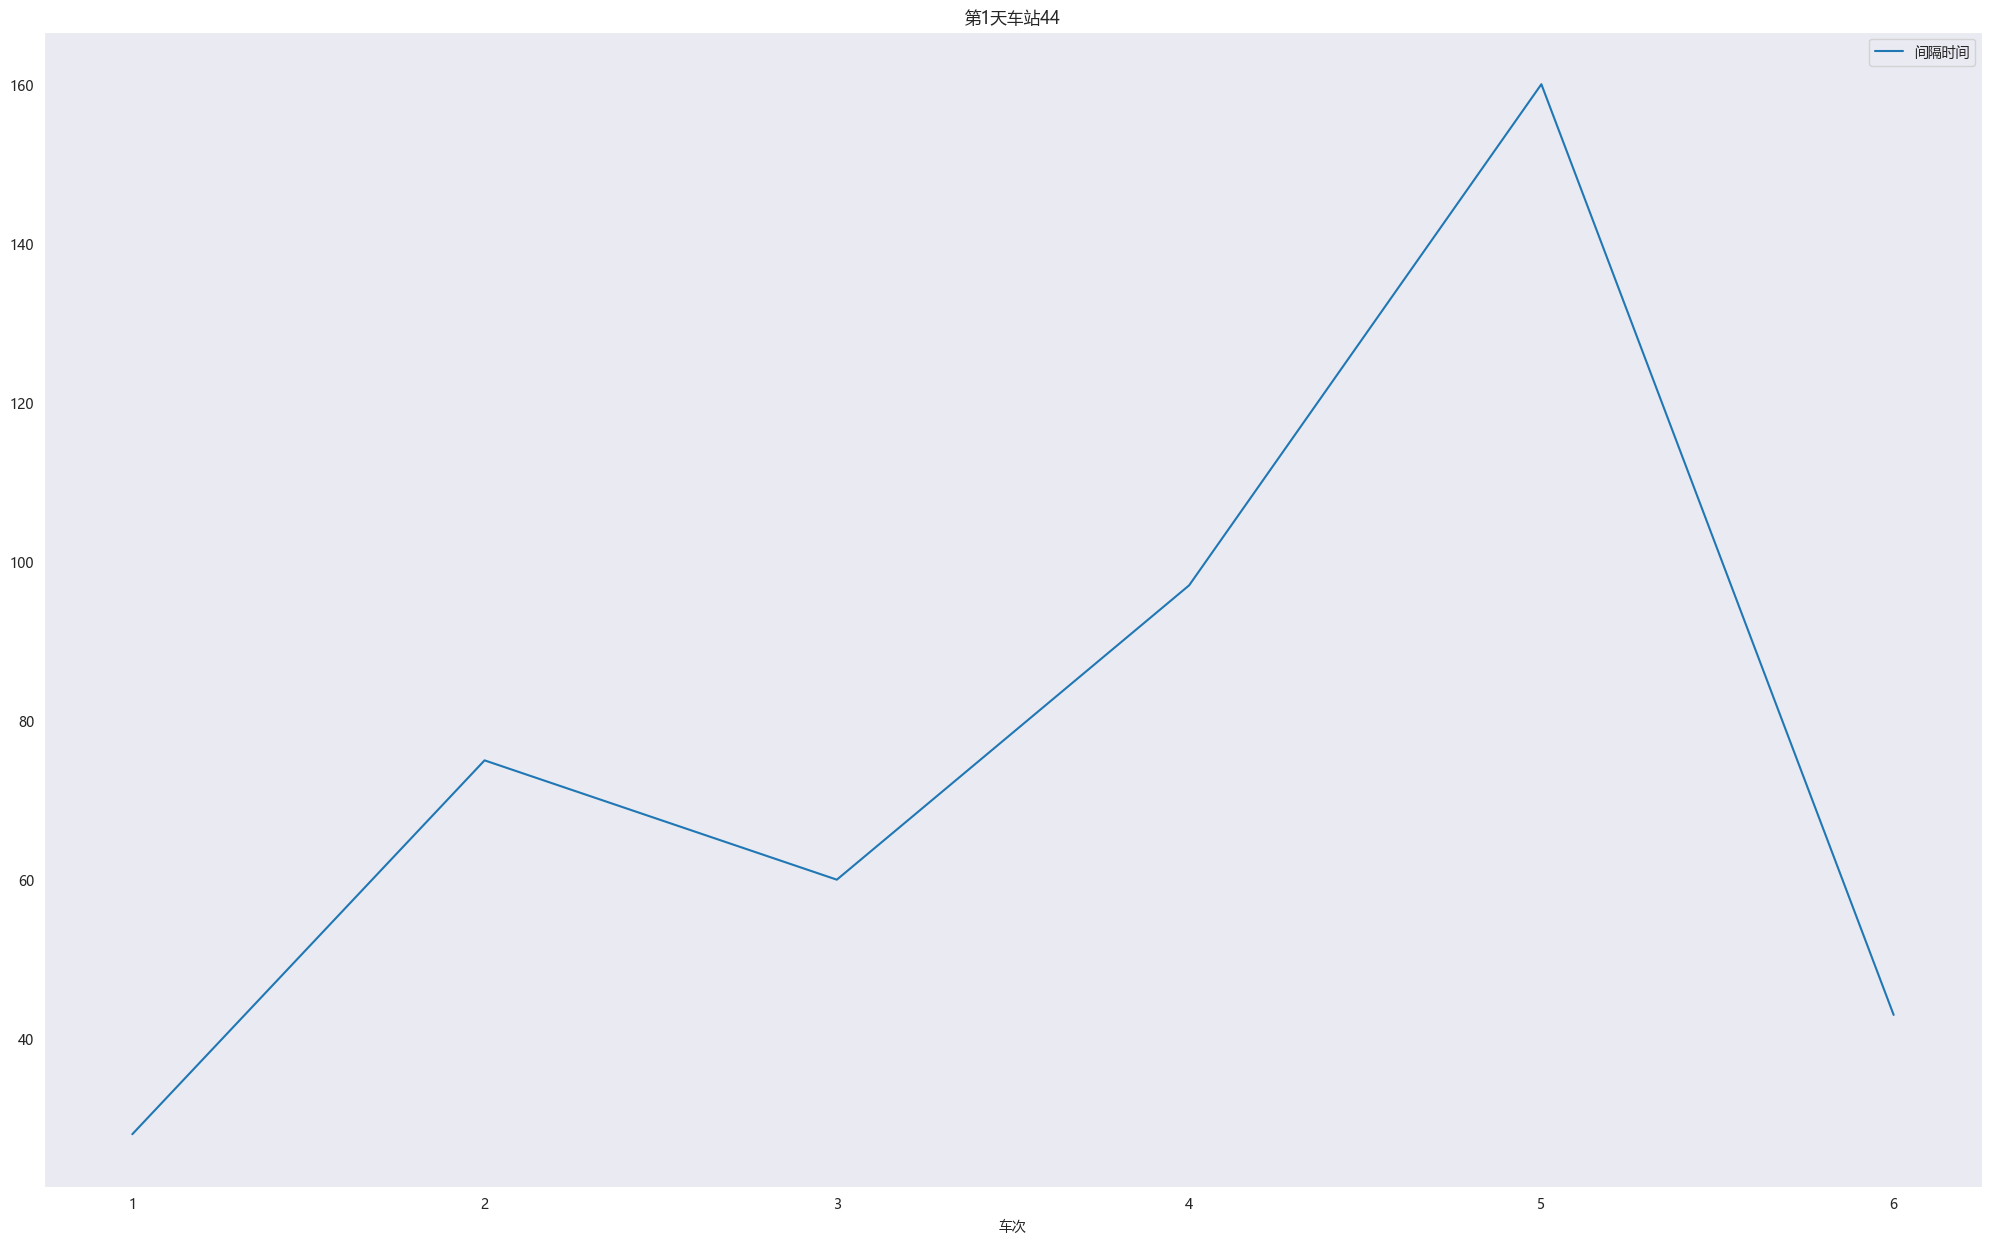

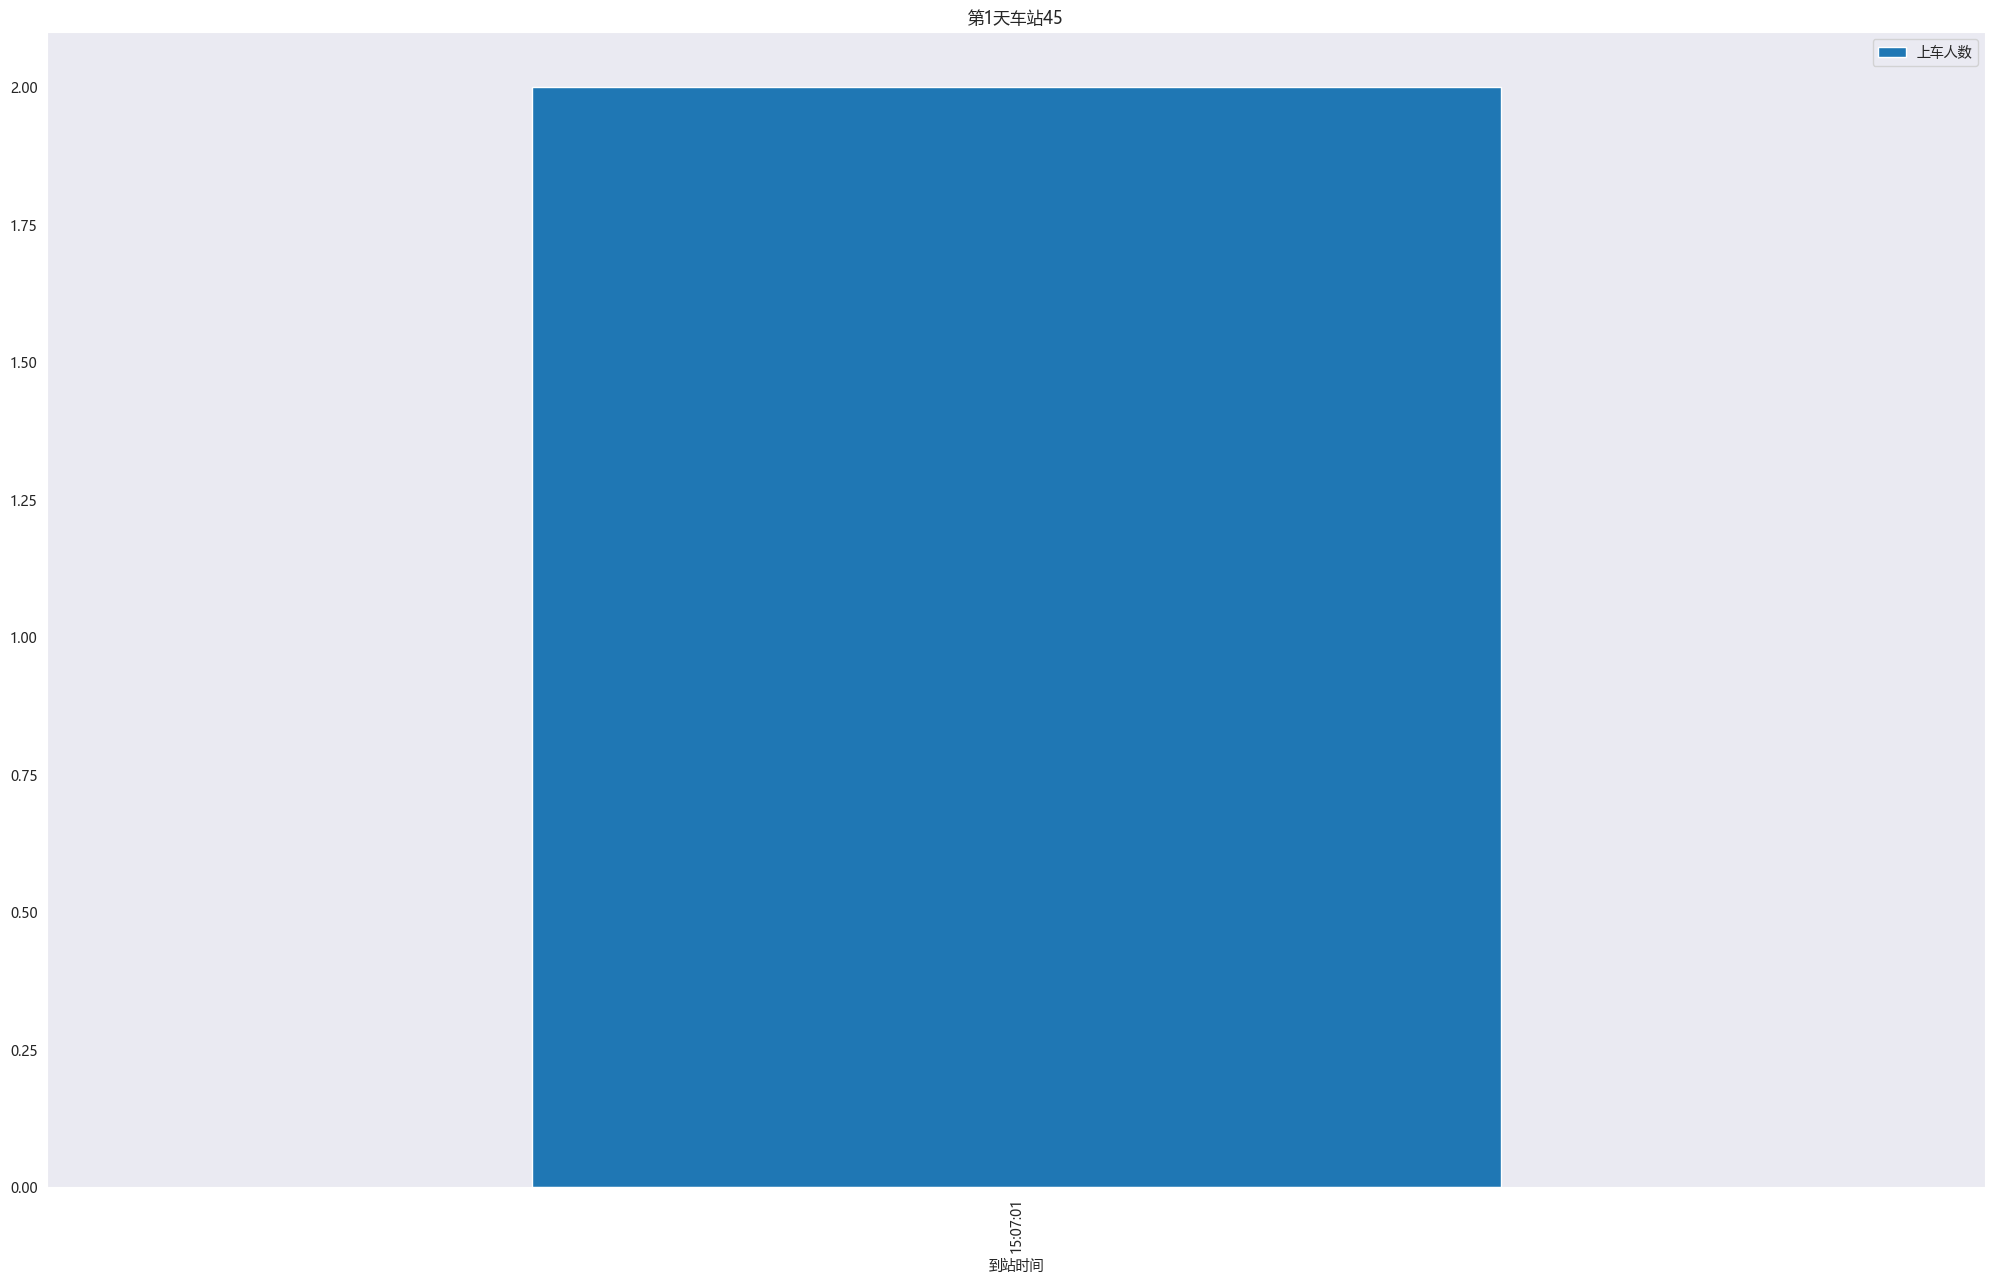

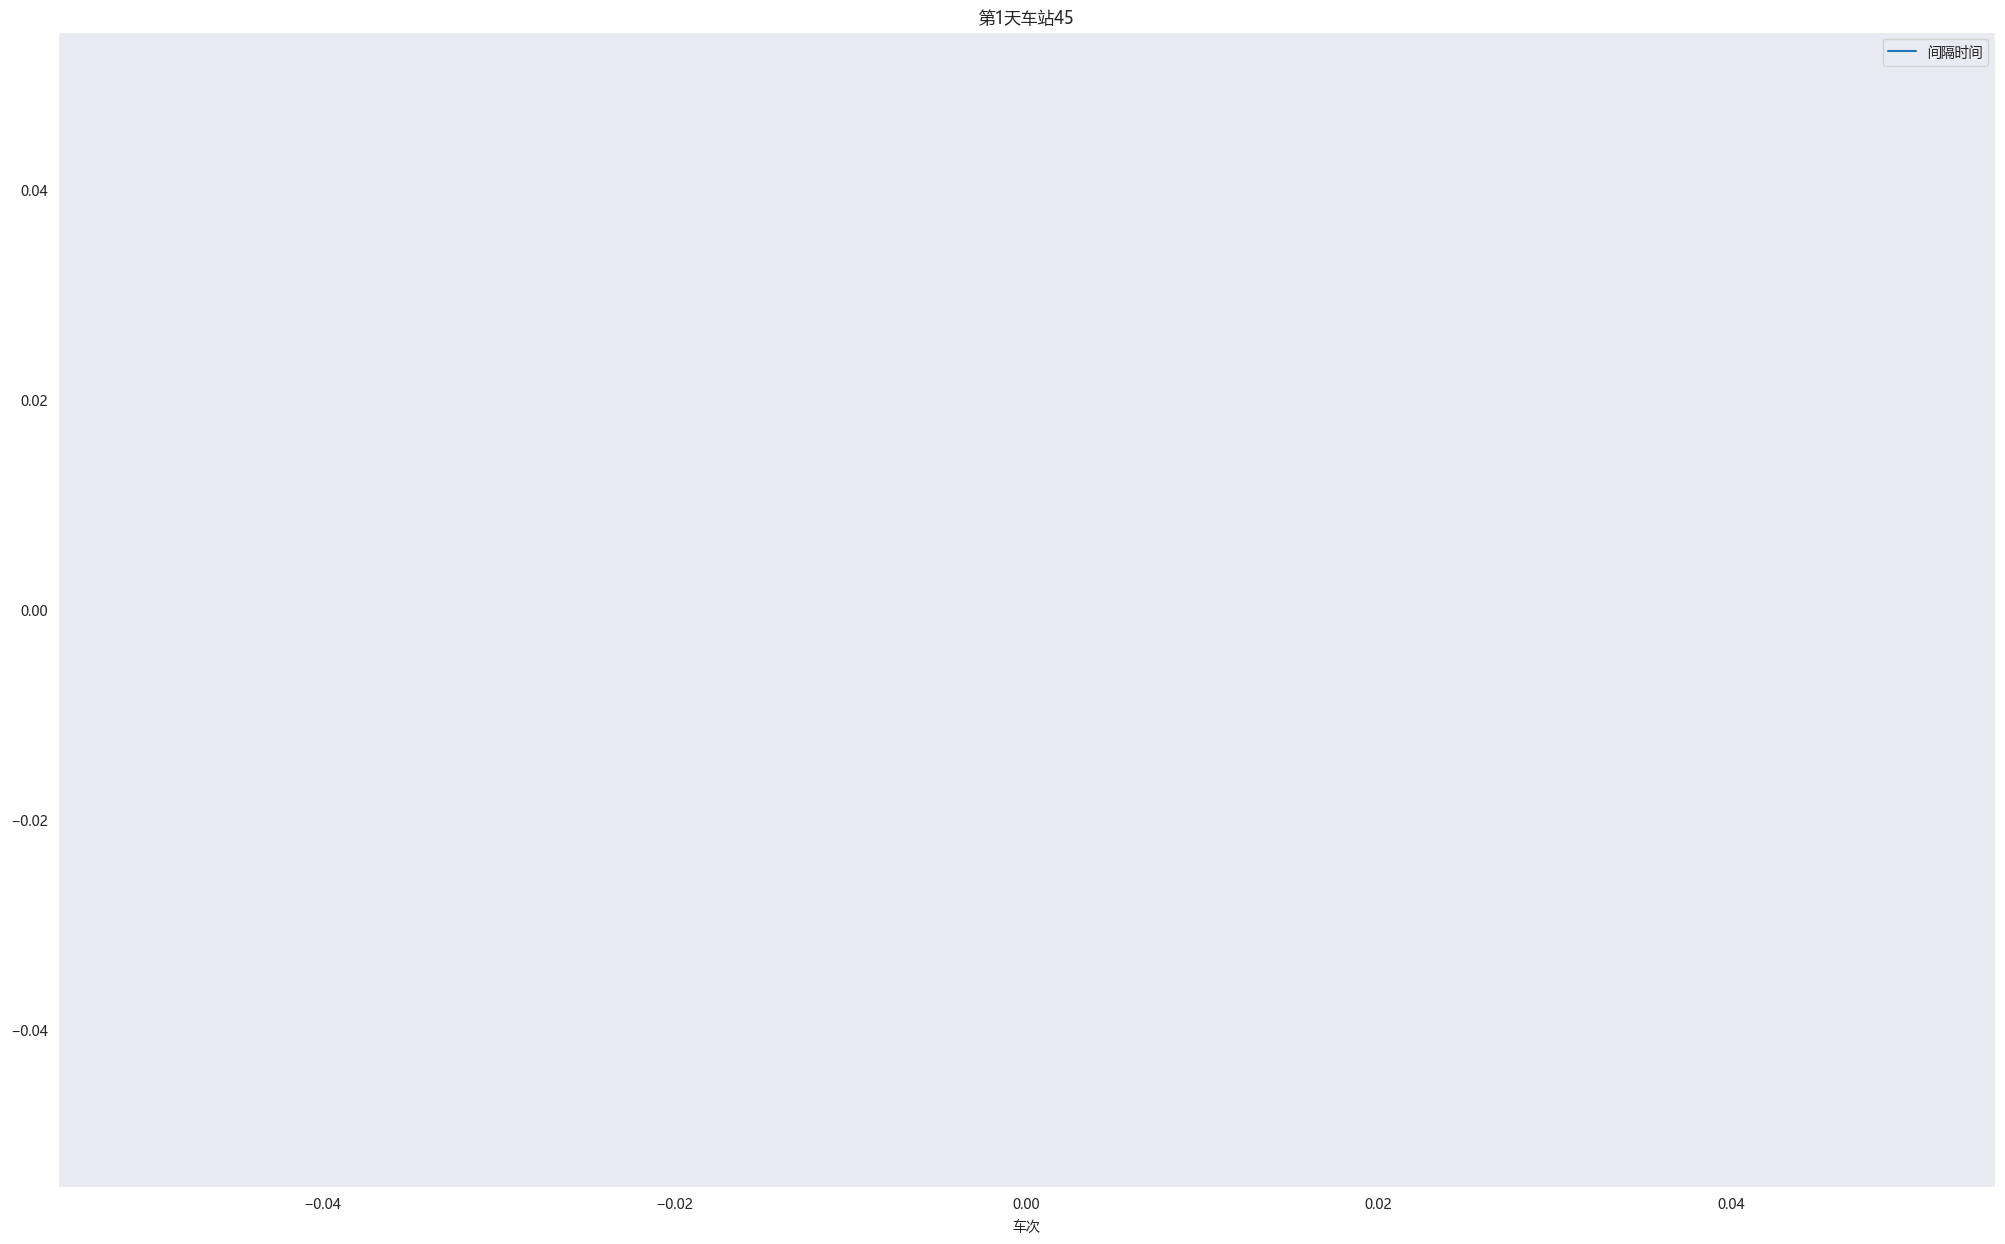

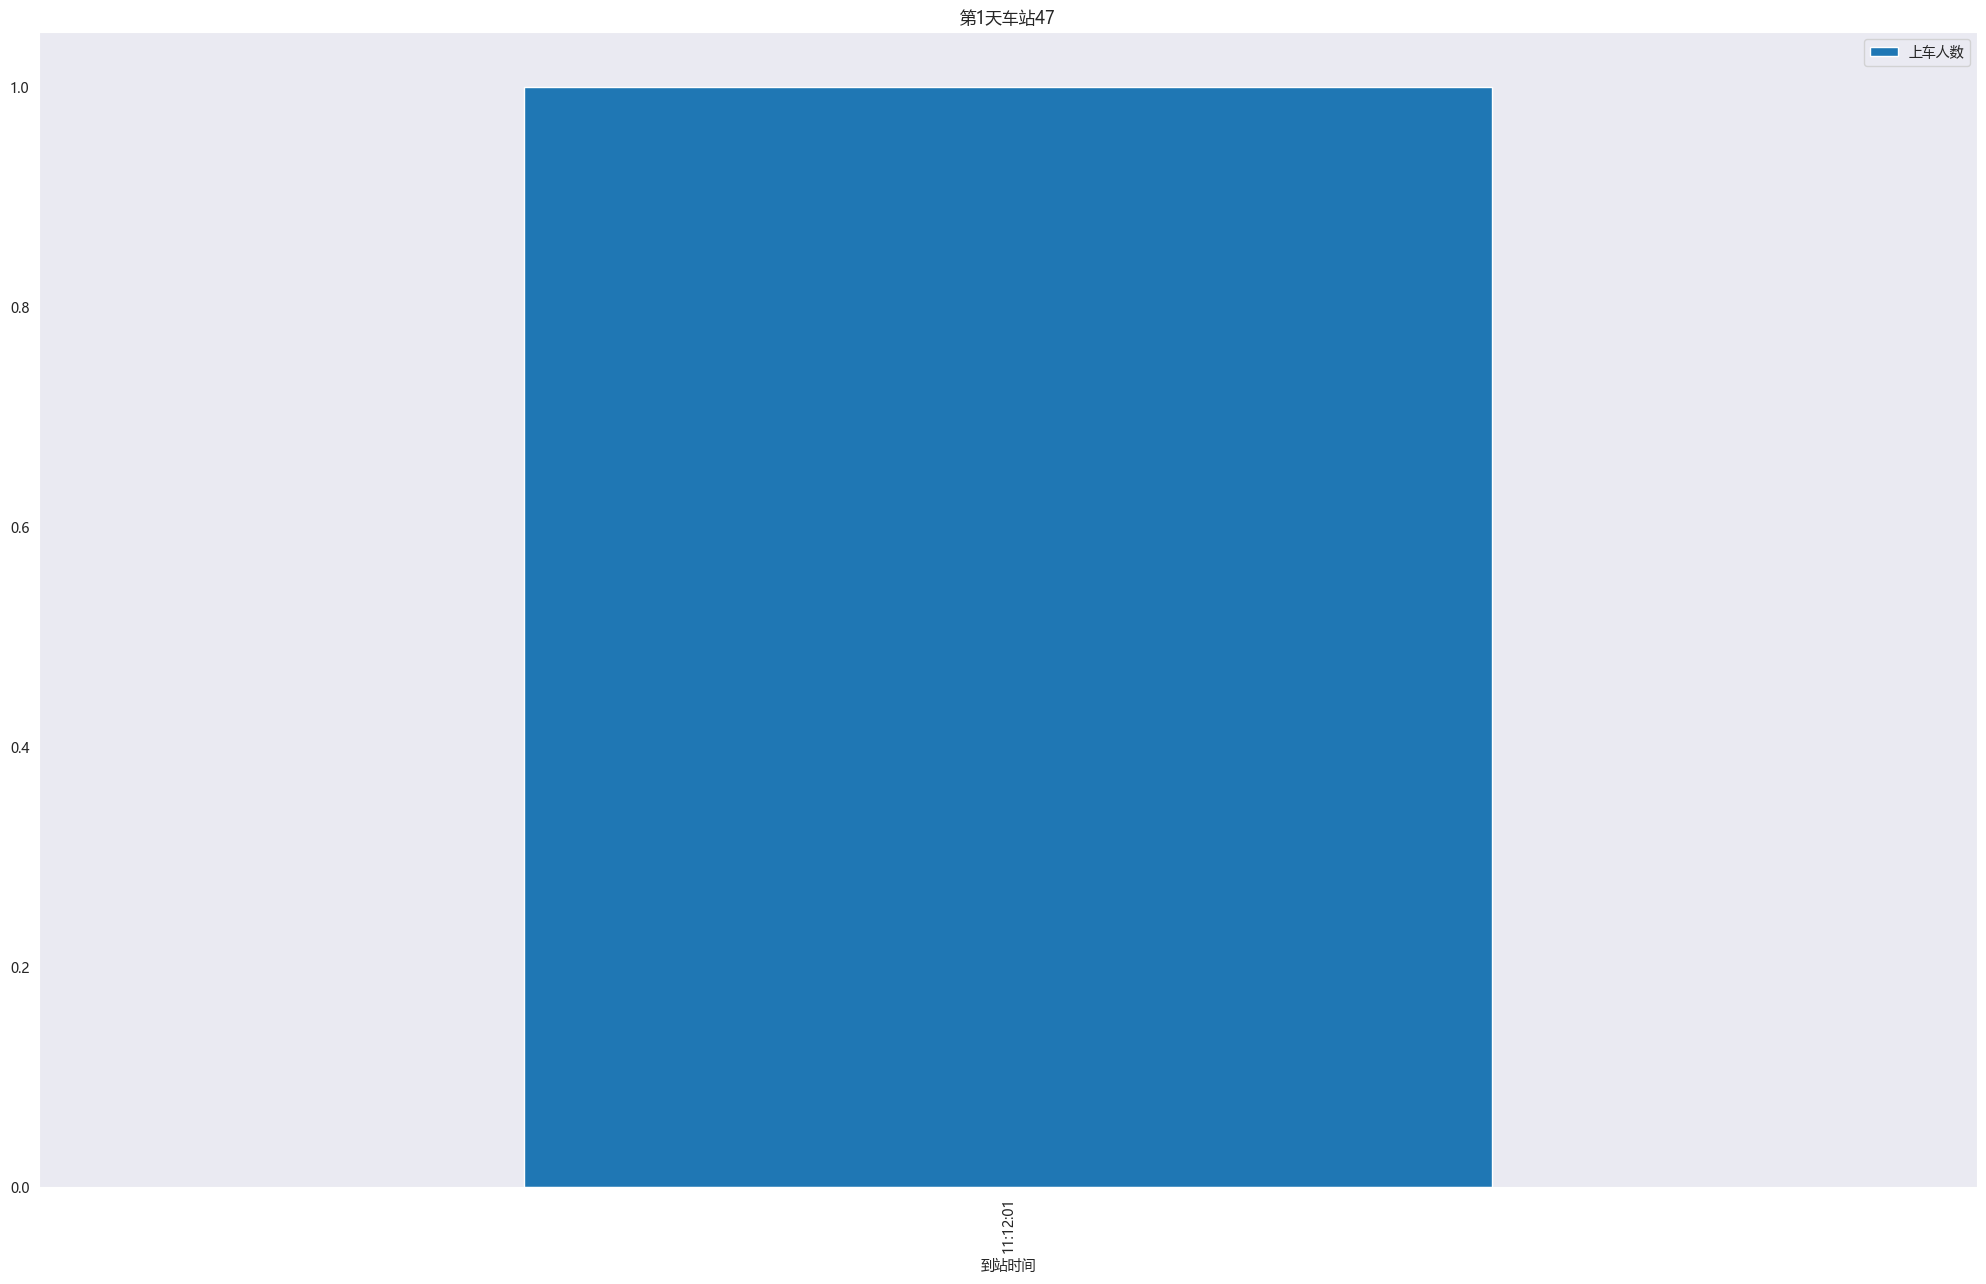

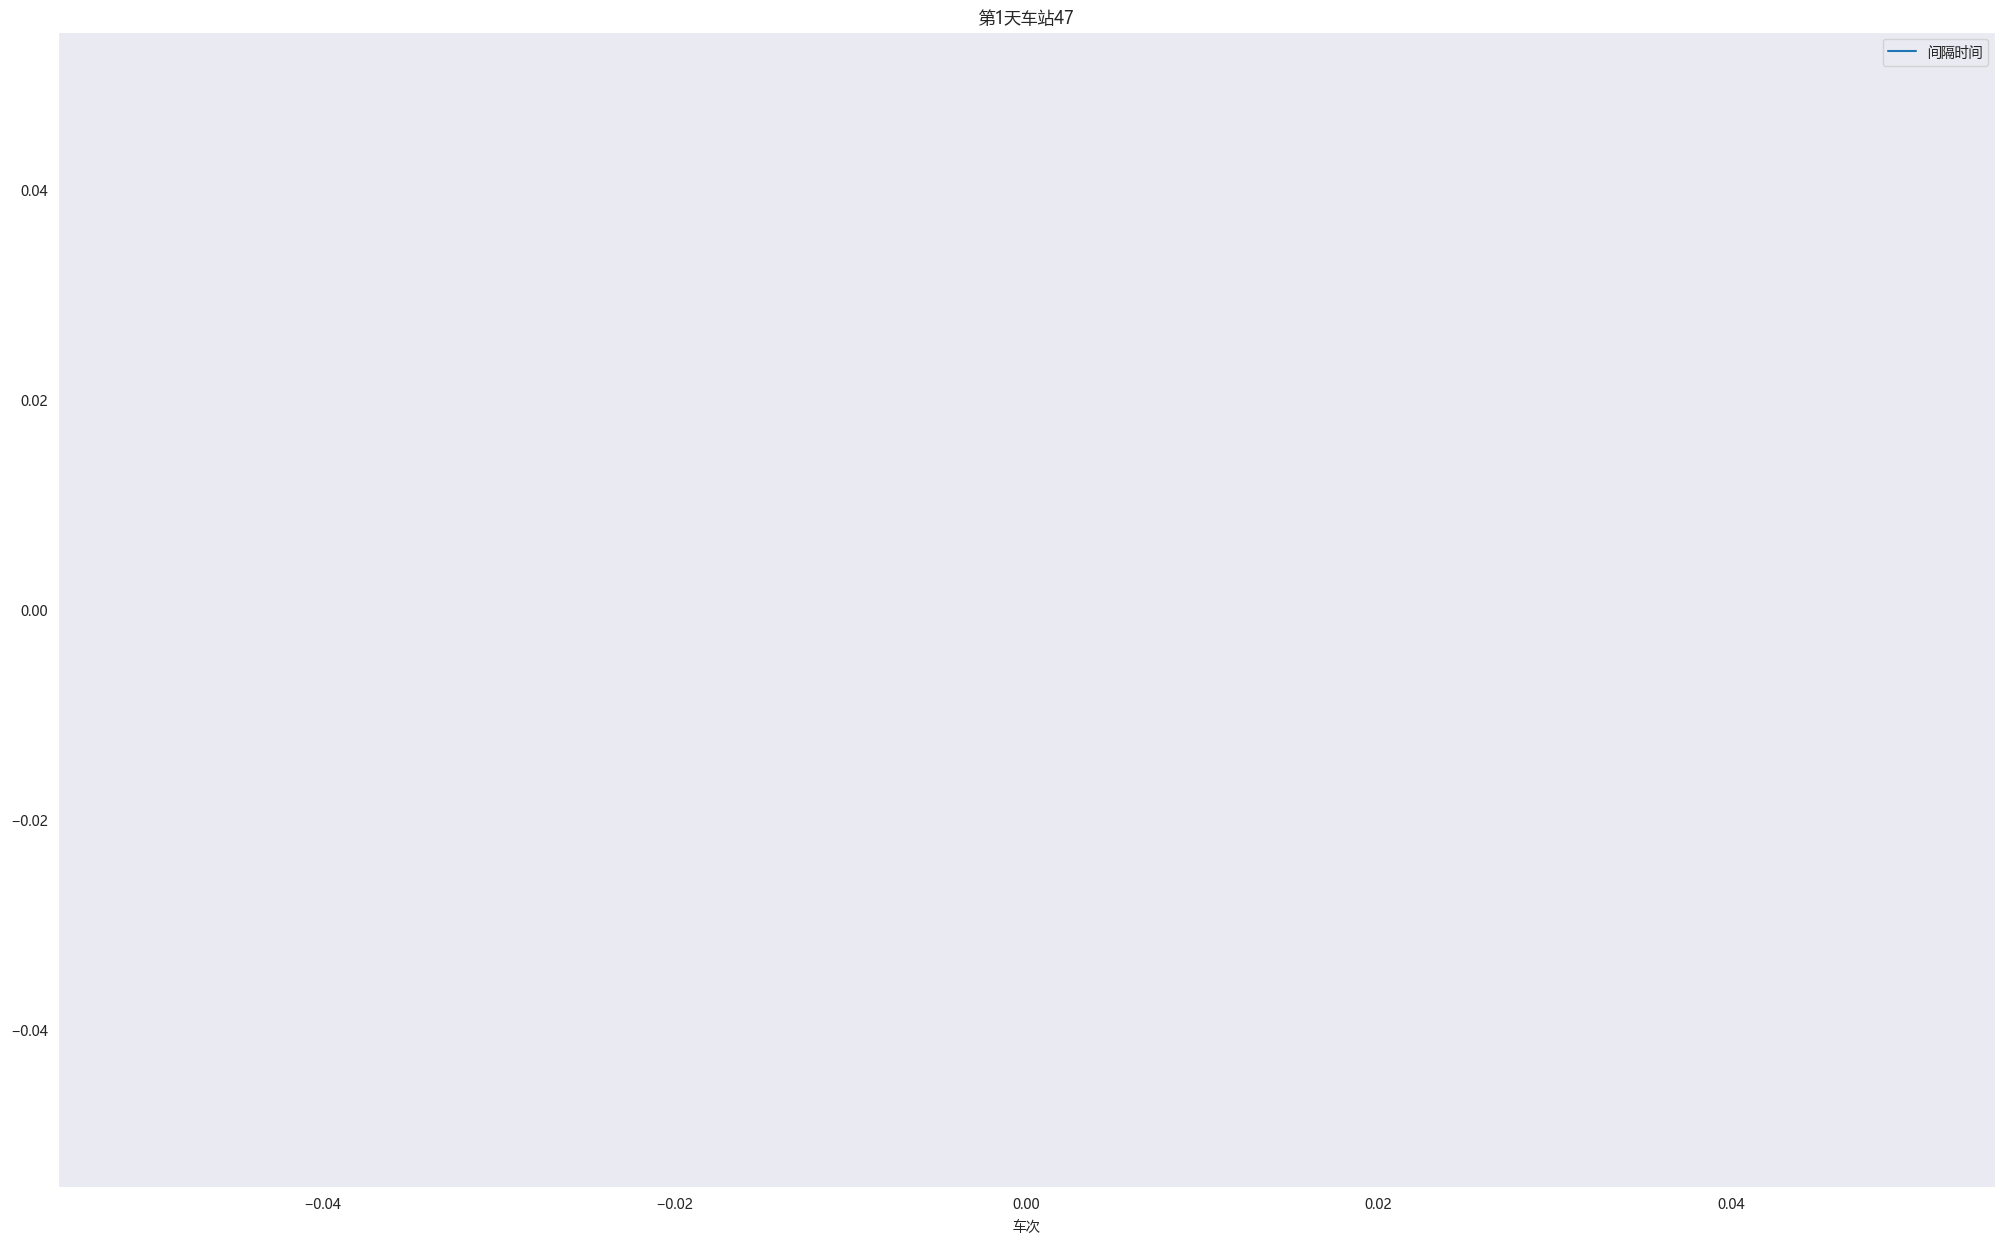

In [5]:
day_1_barpic = [] #到站时间-上车人数
day_1_linepic = [] #车次-间隔时间
for i in range(1,49):
    df = chain_data_line_1[(chain_data_line_1['上车站序']== i) & (chain_data_line_1['日期编号']==1)].sort_values(by='上车时间')
    if len(df) != 0:
        # 对上车时间列做一阶差分
        df['上车时间差分'] = df['上车时间'].diff().fillna(0)
        # 设置时间间隔阈值为1分钟
        time_threshold = pd.Timedelta(minutes=1)                    
        # 判断是否是同一班车的乘客
        df['车次'] = (df['上车时间'].diff() > time_threshold).cumsum()
        # 根据班车编号聚合数据，计算每班车上车人数
        result = df.groupby(['车次']).agg({'上车时间': 'first', '车次': 'count'}).rename(columns={'车次': '上车人数','上车时间':'到站时间'})
        result['间隔时间'] = result['到站时间'].diff().dt.total_seconds()/60
        result['到站时间'] = result['到站时间'].dt.time
        day_1_barpic.append(result.plot(x='到站时间', y='上车人数', kind='bar', figsize=(25, 15), grid=False,title=f'第1天车站{i}'))
        day_1_linepic.append(result.plot(y='间隔时间', kind='line',title=f'第1天车站{i}', figsize=(25, 15), grid=False))


In [ ]:
result.plot(x='到站时间', y='上车人数', kind='bar', figsize=(25, 15), grid=False)

In [ ]:
result.plot(y='间隔时间', kind='line')

In [ ]:
df = chain_data_line_1[(chain_data_line_1['上车站序']== 0) & (chain_data_line_1['日期编号']==1)].sort_values(by='上车时间')
